In [115]:
# ROAD MAP
# DESCONSIDERAR A PRIMEIRA COLUNA
# SEPARA A COLUNA DE PRECO DAS DEMAIS
# FAZER A MULTIPLICACAO DA MATRIX EM SEGUIDA DA INVERSA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from enum import Enum
from sklearn import datasets, linear_model
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

def addColumnThetaZero (array):
    return np.c_[np.ones(array.shape[0]), array]

def classificationCut (data):
    data = data.replace("Fair", -2)
    data = data.replace("Good", -1)
    data = data.replace("Very Good", 0)
    data = data.replace("Premium", 1)
    data = data.replace("Ideal", 2)
    return data

def classificationColor (data):
    data = data.replace('D', -3)
    data = data.replace('E', -2)
    data = data.replace('F', -1)
    data = data.replace('G', -0)
    data = data.replace('H', 1)
    data = data.replace('I', 2)
    data = data.replace('J', 3)
    return data

#como fazer com numeros pares?
def classificationClarity (data):
    data = data.replace("I1", -3)
    data = data.replace("SI2", -2)
    data = data.replace("SI1", -1)
    data = data.replace("VS2", 0)
    data = data.replace("VS1", 1)
    data = data.replace("VVS2", 2)
    data = data.replace("VVS1", 3)
    data = data.replace("IF", 4)
    return data

def classificationSet (data):
    data = classificationCut(data)
    data = classificationColor(data)
    data = classificationClarity(data)
    return data

def costFunction (params, thetas, target):
    m = params.shape[0]
    agaDeTheta = np.matmul (params, thetas)
    preSomatorio = agaDeTheta - target
    return (sumSquares(preSomatorio, m))

def createArrayTheta (numberParams, multi):
    array = np.c_[np.ones(numberParams)]
    array = array * multi
    return array

# Realiza as multiplicacoes de matrizes e retorna um array com os parametros
def findNormalParams (fullParams, fullTarget):
    diamondsFullParamsTranspose = fullParams.transpose()
    multiplyMatrix = np.matmul (diamondsFullParamsTranspose, fullParams)
    inverseMatrix = np.linalg.inv(multiplyMatrix)
    multiplyInverseTranspose = np.matmul(inverseMatrix, diamondsFullParamsTranspose)
    paramsValues = np.matmul(multiplyInverseTranspose, fullTarget)
    return paramsValues

# Transforma os parametros em valores entre -0.5 e 0.5
def fitParams (array):
    scaler = MinMaxScaler(feature_range=(-0.5,0.5))
    scaler.fit(array)
    return scaler.transform(trainParams)

def formatArray (dataFrame, lastColumn) :
    array = dataFrame.values
    target = array[:,lastColumn]
    params = np.delete(array, lastColumn, axis = 1)
    return params, target

def loadDiamondsTrainingData():
    return pd.read_csv("diamonds-dataset/diamonds-train.csv")

def loadDiamondsTestData():
    return pd.read_csv("diamonds-dataset/diamonds-test.csv")

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

def sumSquares(array, m):
    square = array * array
    return (sum(square)/(2*m))


# We get our data and ajust it to have only numeric value

In [116]:
diamondsTrain = loadDiamondsTrainingData()
diamondsTrain = classificationSet(diamondsTrain)

# First, we get some insight about our data:




In [117]:
diamondsTrain.describe()

carat           cut         color       clarity             x  \
count  45849.000000  45849.000000  45849.000000  45849.000000  45849.000000   
mean       0.797698      0.904556     -0.411089      0.047438      5.731171   
std        0.473863      1.117100      1.701648      1.642080      1.121454   
min        0.200000     -2.000000     -3.000000     -3.000000      0.000000   
25%        0.400000      0.000000     -2.000000     -1.000000      4.710000   
50%        0.700000      1.000000      0.000000      0.000000      5.700000   
75%        1.040000      2.000000      1.000000      1.000000      6.540000   
max        5.010000      2.000000      3.000000      4.000000     10.740000   

                  y             z         depth         table         price  
count  45849.000000  45849.000000  45849.000000  45849.000000  45849.000000  
mean       5.734044      3.537613     61.744716     57.455582   3932.515562  
std        1.140275      0.694809      1.428341      2.237592   3990.380545  
min        0.000000      0.000000     43.000000     43.000000    326.000000  
25%        4.720000      2.910000     61.000000     56.000000    950.000000  
50%        5.710000      3.520000     61.800000     57.000000   2401.000000  
75%        6.540000      4.030000     62.500000     59.000000   5322.000000  
max       58.900000      8.060000     78.200000     95.000000  18823.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6c4e32278>,
      dtype=object)

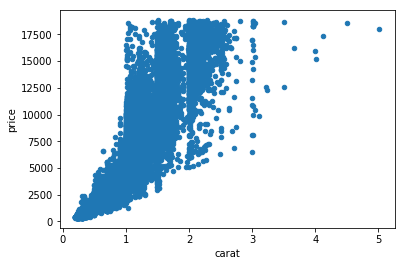

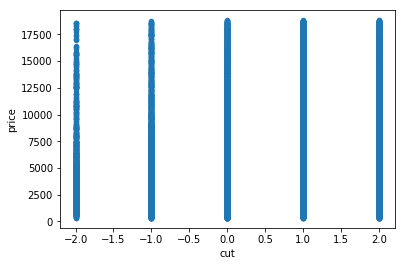

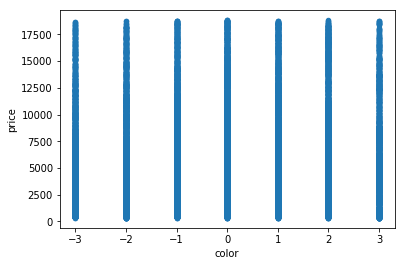

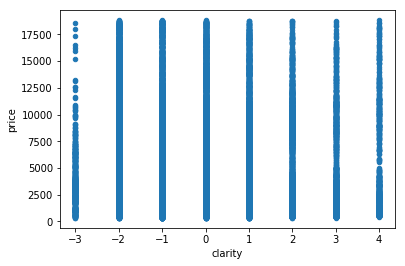

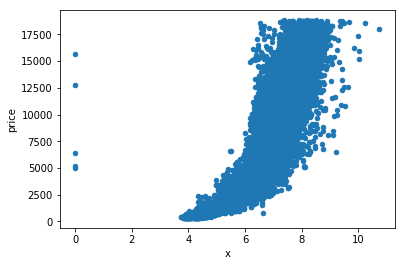

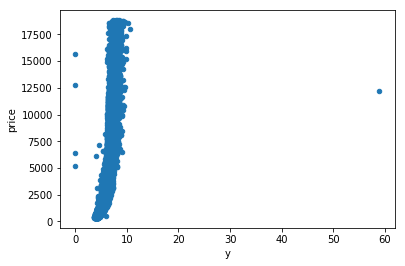

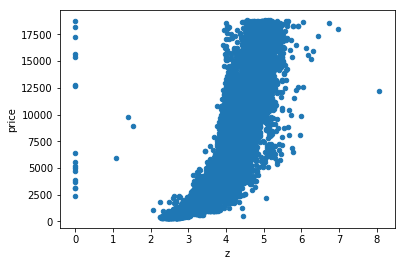

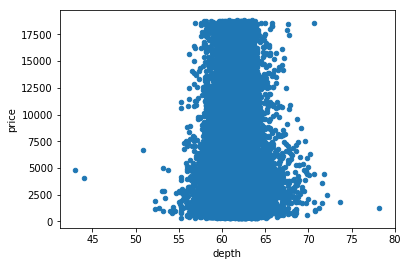

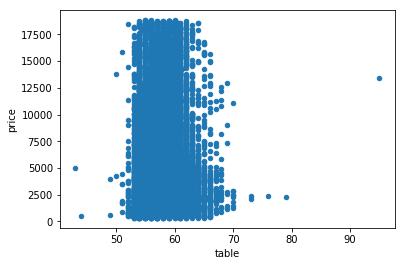

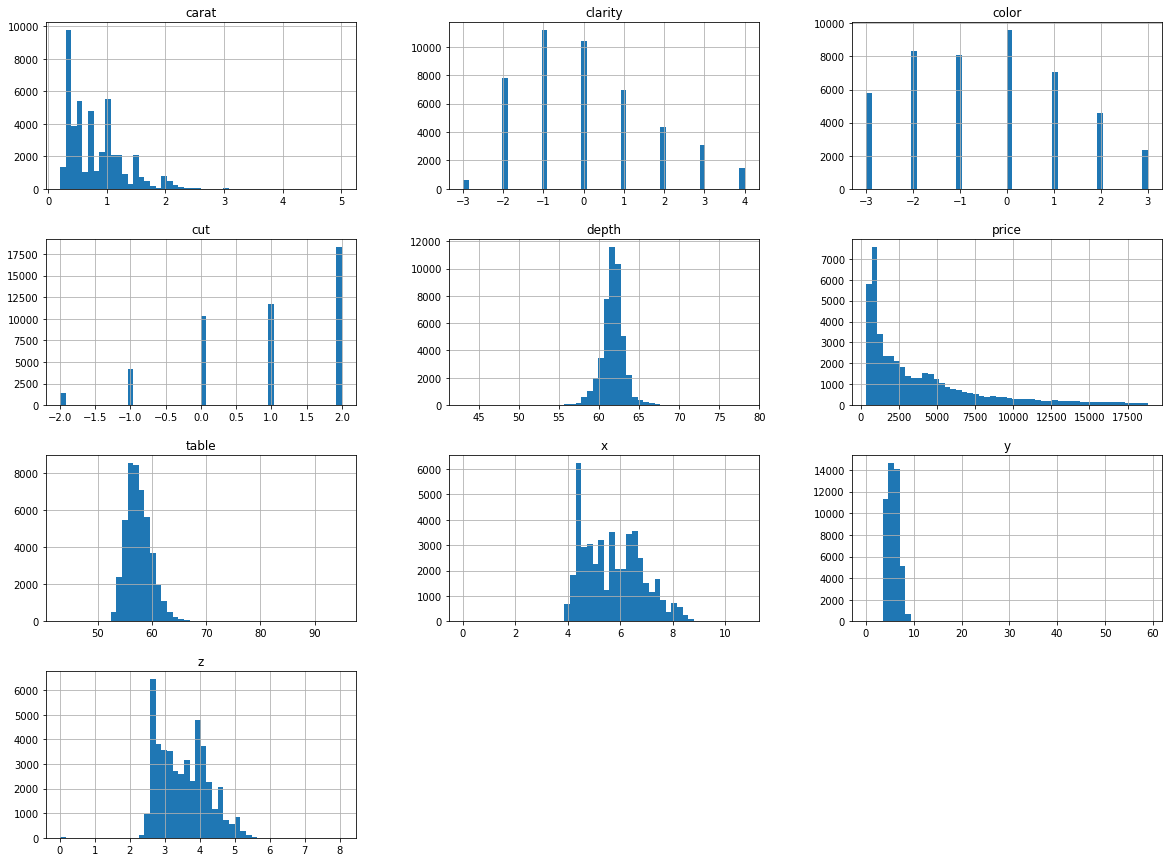

In [118]:
diamondsTrain.plot(kind="scatter", x="carat", y="price")
diamondsTrain.plot(kind="scatter", x="cut", y="price")
diamondsTrain.plot(kind="scatter", x="color", y="price")
diamondsTrain.plot(kind="scatter", x="clarity", y="price")
diamondsTrain.plot(kind="scatter", x="x", y="price")
diamondsTrain.plot(kind="scatter", x="y", y="price")
diamondsTrain.plot(kind="scatter", x="z", y="price")
diamondsTrain.plot(kind="scatter", x="depth", y="price")
diamondsTrain.plot(kind="scatter", x="table", y="price")

In [107]:
corr_matrix = diamondsTrain.corr()
corr_matrix["price"].sort_values(ascending=False)

price      1.000000
carat      0.921541
x          0.885136
z          0.874730
y          0.867810
color      0.170961
table      0.126694
depth     -0.014127
cut       -0.052402
clarity   -0.144417
Name: price, dtype: float64

## Preparing the data for the Machine Learning proccess

### We will be using a exponential function to describe x, y and z behaviour

In [108]:
# diamondsTrain = diamondsTrain.values

#### Insert x, y and z squared values to the matrix

In [109]:
x_sqrd = diamondsTrain['x'] ** 2
y_sqrd = diamondsTrain['y'] ** 2
z_sqrd = diamondsTrain['z'] ** 2

diamondsTrain.insert(loc = 5, column = 'x_sqrd', value = x_sqrd)
diamondsTrain.insert(loc = 7, column = 'y_sqrd', value = y_sqrd)
diamondsTrain.insert(loc = 9, column = 'z_sqrd', value = z_sqrd)


# x_sqrd = [row[4] for row in diamondsTrain]
# y_sqrd = [row[5] for row in diamondsTrain]
# z_sqrd = [row[6] for row in diamondsTrain]

# x_sqrd = np.square(x_sqrd)
# y_sqrd = np.square(y_sqrd)
# z_sqrd = np.square(z_sqrd)

# np.insert(diamondsTrain, 4, x_sqrd, axis = 1)
# np.insert(diamondsTrain, 6, y_sqrd, axis = 1)
# np.insert(diamondsTrain, 8, z_sqrd, axis = 1)

trainSet, validationSet = split_train_test(diamondsTrain, 0.2)

trainSetParams, trainSetTarget = formatArray(trainSet, 12)
trainSetParams = addColumnThetaZero(trainSetParams)
trainSetTarget = trainSetTarget.reshape(trainSetTarget.shape[0], -1)

validationSetParams, validationSetTarget = formatArray(validationSet, 12)
validationSetParams = addColumnThetaZero(validationSetParams)
validationSetTarget = validationSetTarget.reshape(validationSetTarget.shape[0], -1)


thetaBatch = createArrayTheta(13, 100)
thetaMiniBatch = createArrayTheta(13, 100)
thetaStoch = createArrayTheta(13, 100)

alpha = 0.0002

xToPlotBatch = np.array([])
yToPlotBatch = np.array([])

xToPlotStoch = np.array([])
yToPlotStoch = np.array([])

xToPlotMiniBatch = np.array([])
yToPlotMiniBatch = np.array([])



# Batch implementation

# Mini-batch implementation

1 [669479.44484512] [669479.44484512]
2 [0.99728196] [667659.77164502]
3 [0.9975643] [666033.55166431]
4 [0.99781106] [664575.64662609]
5 [0.99802721] [663264.58010859]
6 [0.99821696] [662081.95080915]
7 [0.99838388] [661011.94629458]
8 [0.99853103] [660040.9393133]
9 [0.99866101] [659157.15201626]
10 [0.99877605] [658350.37610009]
11 [0.99887805] [657611.73906099]
12 [0.99896865] [656933.50852212]
13 [0.99904925] [656308.92804538]
14 [0.99912107] [655732.07902094]
15 [0.99918516] [655197.76419372]
16 [0.99924243] [654701.40917556]
17 [0.99929368] [654238.97893757]
18 [0.99933958] [653806.90680536]
19 [0.99938075] [653402.03391291]
20 [0.9994177] [653021.55742509]
21 [0.9994509] [652662.98613023]
22 [0.99948077] [652324.10224266]
23 [0.99950765] [652002.92845167]
24 [0.99953186] [651697.69941485]
25 [0.99955369] [651406.83702693]
26 [0.99957337] [651128.92890483]
27 [0.99959114] [650862.70962063]
28 [0.99960719] [650607.04428906]
29 [0.99962169] [650360.91417817]
30 [0.9996348] [650123

278 [0.99980667] [615307.42994118]
279 [0.99980684] [615188.57909471]
280 [0.99980702] [615069.85986307]
281 [0.9998072] [614951.27206281]
282 [0.99980737] [614832.81551075]
283 [0.99980755] [614714.49002404]
284 [0.99980772] [614596.2954201]
285 [0.9998079] [614478.23151664]
286 [0.99980808] [614360.29813166]
287 [0.99980825] [614242.49508345]
288 [0.99980843] [614124.8221906]
289 [0.9998086] [614007.27927198]
290 [0.99980878] [613889.86614673]
291 [0.99980895] [613772.58263431]
292 [0.99980912] [613655.42855445]
293 [0.9998093] [613538.40372716]
294 [0.99980947] [613421.50797275]
295 [0.99980965] [613304.74111181]
296 [0.99980982] [613188.1029652]
297 [0.99980999] [613071.59335409]
298 [0.99981017] [612955.21209991]
299 [0.99981034] [612838.9590244]
300 [0.99981051] [612722.83394956]
301 [0.99981069] [612606.83669767]
302 [0.99981086] [612490.96709132]
303 [0.99981103] [612375.22495336]
304 [0.9998112] [612259.61010691]
305 [0.99981137] [612144.12237539]
306 [0.99981155] [612028.7615

562 [0.99984999] [586220.37463973]
563 [0.99985012] [586132.51061434]
564 [0.99985025] [586044.73613705]
565 [0.99985038] [585957.05108999]
566 [0.99985051] [585869.45535548]
567 [0.99985064] [585781.94881602]
568 [0.99985077] [585694.53135428]
569 [0.9998509] [585607.20285312]
570 [0.99985103] [585519.96319555]
571 [0.99985116] [585432.8122648]
572 [0.99985129] [585345.74994425]
573 [0.99985141] [585258.77611746]
574 [0.99985154] [585171.89066817]
575 [0.99985167] [585085.0934803]
576 [0.9998518] [584998.38443794]
577 [0.99985193] [584911.76342537]
578 [0.99985206] [584825.23032703]
579 [0.99985219] [584738.78502753]
580 [0.99985231] [584652.42741169]
581 [0.99985244] [584566.15736445]
582 [0.99985257] [584479.97477099]
583 [0.9998527] [584393.87951661]
584 [0.99985283] [584307.8714868]
585 [0.99985295] [584221.95056725]
586 [0.99985308] [584136.11664378]
587 [0.99985321] [584050.36960241]
588 [0.99985333] [583964.70932934]
589 [0.99985346] [583879.13571092]
590 [0.99985359] [583793.6

883 [0.99988549] [562041.85768487]
884 [0.99988558] [561977.54776855]
885 [0.99988567] [561913.29734618]
886 [0.99988576] [561849.10634458]
887 [0.99988586] [561784.97469069]
888 [0.99988595] [561720.90231154]
889 [0.99988604] [561656.8891343]
890 [0.99988613] [561592.93508621]
891 [0.99988623] [561529.04009463]
892 [0.99988632] [561465.20408702]
893 [0.99988641] [561401.42699095]
894 [0.9998865] [561337.70873409]
895 [0.99988659] [561274.04924421]
896 [0.99988668] [561210.44844921]
897 [0.99988678] [561146.90627707]
898 [0.99988687] [561083.42265586]
899 [0.99988696] [561019.9975138]
900 [0.99988705] [560956.63077917]
901 [0.99988714] [560893.32238037]
902 [0.99988723] [560830.07224591]
903 [0.99988732] [560766.88030439]
904 [0.99988742] [560703.74648452]
905 [0.99988751] [560640.67071512]
906 [0.9998876] [560577.65292509]
907 [0.99988769] [560514.69304347]
908 [0.99988778] [560451.79099936]
909 [0.99988787] [560388.94672198]
910 [0.99988796] [560326.16014067]
911 [0.99988805] [560263

1206 [0.999911] [543999.16053426]
1207 [0.99991107] [543950.78282287]
1208 [0.99991114] [543902.4456454]
1209 [0.9999112] [543854.14895546]
1210 [0.99991127] [543805.8927067]
1211 [0.99991134] [543757.67685284]
1212 [0.9999114] [543709.50134766]
1213 [0.99991147] [543661.36614501]
1214 [0.99991154] [543613.2711988]
1215 [0.9999116] [543565.21646301]
1216 [0.99991167] [543517.20189168]
1217 [0.99991173] [543469.22743889]
1218 [0.9999118] [543421.29305883]
1219 [0.99991187] [543373.3987057]
1220 [0.99991193] [543325.54433381]
1221 [0.999912] [543277.7298975]
1222 [0.99991206] [543229.95535119]
1223 [0.99991213] [543182.22064934]
1224 [0.99991219] [543134.52574651]
1225 [0.99991226] [543086.87059729]
1226 [0.99991232] [543039.25515634]
1227 [0.99991239] [542991.67937839]
1228 [0.99991246] [542944.14321822]
1229 [0.99991252] [542896.64663068]
1230 [0.99991259] [542849.18957069]
1231 [0.99991265] [542801.77199321]
1232 [0.99991272] [542754.39385327]
1233 [0.99991278] [542707.05510598]
1234 

1525 [0.99992925] [530398.42770783]
1526 [0.9999293] [530360.93024506]
1527 [0.99992935] [530323.46127889]
1528 [0.9999294] [530286.02077902]
1529 [0.99992945] [530248.60871519]
1530 [0.9999295] [530211.22505719]
1531 [0.99992955] [530173.86977483]
1532 [0.99992959] [530136.54283797]
1533 [0.99992964] [530099.24421652]
1534 [0.99992969] [530061.97388041]
1535 [0.99992974] [530024.73179963]
1536 [0.99992979] [529987.51794418]
1537 [0.99992984] [529950.33228412]
1538 [0.99992988] [529913.17478955]
1539 [0.99992993] [529876.04543059]
1540 [0.99992998] [529838.94417743]
1541 [0.99993003] [529801.87100028]
1542 [0.99993008] [529764.82586937]
1543 [0.99993013] [529727.808755]
1544 [0.99993017] [529690.8196275]
1545 [0.99993022] [529653.85845722]
1546 [0.99993027] [529616.92521458]
1547 [0.99993032] [529580.01987002]
1548 [0.99993036] [529543.14239401]
1549 [0.99993041] [529506.29275707]
1550 [0.99993046] [529469.47092976]
1551 [0.99993051] [529432.67688267]
1552 [0.99993056] [529395.91058644

1819 [0.9999418] [520485.60009212]
1820 [0.99994183] [520455.32468207]
1821 [0.99994187] [520425.07034073]
1822 [0.99994191] [520394.83704722]
1823 [0.99994194] [520364.62478072]
1824 [0.99994198] [520334.4335204]
1825 [0.99994202] [520304.26324548]
1826 [0.99994205] [520274.1139352]
1827 [0.99994209] [520243.98556881]
1828 [0.99994213] [520213.87812562]
1829 [0.99994217] [520183.79158492]
1830 [0.9999422] [520153.72592606]
1831 [0.99994224] [520123.68112841]
1832 [0.99994228] [520093.65717136]
1833 [0.99994231] [520063.65403432]
1834 [0.99994235] [520033.67169673]
1835 [0.99994239] [520003.71013806]
1836 [0.99994242] [519973.76933781]
1837 [0.99994246] [519943.84927548]
1838 [0.9999425] [519913.94993063]
1839 [0.99994253] [519884.07128282]
1840 [0.99994257] [519854.21331164]
1841 [0.9999426] [519824.37599672]
1842 [0.99994264] [519794.55931768]
1843 [0.99994268] [519764.76325421]
1844 [0.99994271] [519734.987786]
1845 [0.99994275] [519705.23289276]
1846 [0.99994279] [519675.49855424]


2091 [0.99995077] [512963.32819369]
2092 [0.9999508] [512938.09246487]
2093 [0.99995083] [512912.8729702]
2094 [0.99995086] [512887.66969464]
2095 [0.99995089] [512862.4826232]
2096 [0.99995092] [512837.31174087]
2097 [0.99995095] [512812.15703268]
2098 [0.99995098] [512787.01848368]
2099 [0.99995101] [512761.89607893]
2100 [0.99995104] [512736.7898035]
2101 [0.99995107] [512711.69964249]
2102 [0.9999511] [512686.62558101]
2103 [0.99995112] [512661.5676042]
2104 [0.99995115] [512636.5256972]
2105 [0.99995118] [512611.49984518]
2106 [0.99995121] [512586.49003331]
2107 [0.99995124] [512561.49624681]
2108 [0.99995127] [512536.51847089]
2109 [0.9999513] [512511.55669078]
2110 [0.99995133] [512486.61089174]
2111 [0.99995136] [512461.68105904]
2112 [0.99995138] [512436.76717795]
2113 [0.99995141] [512411.8692338]
2114 [0.99995144] [512386.98721189]
2115 [0.99995147] [512362.12109757]
2116 [0.9999515] [512337.27087619]
2117 [0.99995153] [512312.43653313]
2118 [0.99995156] [512287.61805378]
21

2415 [0.99995909] [505559.34559315]
2416 [0.99995911] [505538.67279621]
2417 [0.99995913] [505518.01216912]
2418 [0.99995915] [505497.3637015]
2419 [0.99995918] [505476.72738298]
2420 [0.9999592] [505456.1032032]
2421 [0.99995922] [505435.49115182]
2422 [0.99995924] [505414.8912185]
2423 [0.99995927] [505394.30339293]
2424 [0.99995929] [505373.72766478]
2425 [0.99995931] [505353.16402377]
2426 [0.99995933] [505332.6124596]
2427 [0.99995935] [505312.072962]
2428 [0.99995938] [505291.5455207]
2429 [0.9999594] [505271.03012544]
2430 [0.99995942] [505250.52676599]
2431 [0.99995944] [505230.03543211]
2432 [0.99995947] [505209.55611359]
2433 [0.99995949] [505189.0888002]
2434 [0.99995951] [505168.63348176]
2435 [0.99995953] [505148.19014808]
2436 [0.99995955] [505127.75878898]
2437 [0.99995958] [505107.3393943]
2438 [0.9999596] [505086.93195389]
2439 [0.99995962] [505066.53645761]
2440 [0.99995964] [505046.15289531]
2441 [0.99995966] [505025.78125689]
2442 [0.99995969] [505005.42153224]
2443

2705 [0.99996491] [500035.53953824]
2706 [0.99996493] [500018.00325139]
2707 [0.99996495] [500000.4765511]
2708 [0.99996497] [499982.95942976]
2709 [0.99996498] [499965.45187977]
2710 [0.999965] [499947.95389357]
2711 [0.99996502] [499930.46546357]
2712 [0.99996504] [499912.98658221]
2713 [0.99996506] [499895.51724193]
2714 [0.99996507] [499878.05743519]
2715 [0.99996509] [499860.60715443]
2716 [0.99996511] [499843.16639212]
2717 [0.99996513] [499825.73514074]
2718 [0.99996514] [499808.31339277]
2719 [0.99996516] [499790.9011407]
2720 [0.99996518] [499773.49837701]
2721 [0.9999652] [499756.10509423]
2722 [0.99996522] [499738.72128485]
2723 [0.99996523] [499721.34694141]
2724 [0.99996525] [499703.98205642]
2725 [0.99996527] [499686.62662243]
2726 [0.99996529] [499669.28063198]
2727 [0.9999653] [499651.94407761]
2728 [0.99996532] [499634.61695189]
2729 [0.99996534] [499617.29924738]
2730 [0.99996536] [499599.99095666]
2731 [0.99996537] [499582.69207232]
2732 [0.99996539] [499565.40258693

3008 [0.9999698] [495128.31984788]
3009 [0.99996981] [495113.37392541]
3010 [0.99996983] [495098.43560911]
3011 [0.99996984] [495083.5048934]
3012 [0.99996986] [495068.58177267]
3013 [0.99996987] [495053.66624136]
3014 [0.99996989] [495038.75829389]
3015 [0.9999699] [495023.85792469]
3016 [0.99996991] [495008.9651282]
3017 [0.99996993] [494994.07989885]
3018 [0.99996994] [494979.2022311]
3019 [0.99996996] [494964.3321194]
3020 [0.99996997] [494949.4695582]
3021 [0.99996999] [494934.61454197]
3022 [0.99997] [494919.76706518]
3023 [0.99997002] [494904.92712231]
3024 [0.99997003] [494890.09470782]
3025 [0.99997004] [494875.26981621]
3026 [0.99997006] [494860.45244196]
3027 [0.99997007] [494845.64257958]
3028 [0.99997009] [494830.84022356]
3029 [0.9999701] [494816.04536841]
3030 [0.99997012] [494801.25800865]
3031 [0.99997013] [494786.47813878]
3032 [0.99997014] [494771.70575333]
3033 [0.99997016] [494756.94084683]
3034 [0.99997017] [494742.18341382]
3035 [0.99997019] [494727.43344883]
303

3305 [0.99997369] [491001.17609587]
3306 [0.9999737] [490988.26518188]
3307 [0.99997372] [490975.36042844]
3308 [0.99997373] [490962.46183134]
3309 [0.99997374] [490949.56938636]
3310 [0.99997375] [490936.68308929]
3311 [0.99997376] [490923.80293593]
3312 [0.99997378] [490910.92892206]
3313 [0.99997379] [490898.0610435]
3314 [0.9999738] [490885.19929604]
3315 [0.99997381] [490872.3436755]
3316 [0.99997382] [490859.49417768]
3317 [0.99997383] [490846.6507984]
3318 [0.99997385] [490833.81353349]
3319 [0.99997386] [490820.98237877]
3320 [0.99997387] [490808.15733006]
3321 [0.99997388] [490795.3383832]
3322 [0.99997389] [490782.52553401]
3323 [0.99997391] [490769.71877835]
3324 [0.99997392] [490756.91811206]
3325 [0.99997393] [490744.12353097]
3326 [0.99997394] [490731.33503094]
3327 [0.99997395] [490718.55260783]
3328 [0.99997396] [490705.77625749]
3329 [0.99997398] [490693.00597578]
3330 [0.99997399] [490680.24175858]
3331 [0.999974] [490667.48360175]
3332 [0.99997401] [490654.73150116]


3609 [0.99997698] [487341.69336683]
3610 [0.99997699] [487330.47748063]
3611 [0.999977] [487319.26663208]
3612 [0.99997701] [487308.06081796]
3613 [0.99997701] [487296.86003505]
3614 [0.99997702] [487285.66428014]
3615 [0.99997703] [487274.47355001]
3616 [0.99997704] [487263.28784145]
3617 [0.99997705] [487252.10715125]
3618 [0.99997706] [487240.9314762]
3619 [0.99997707] [487229.76081311]
3620 [0.99997708] [487218.59515878]
3621 [0.99997709] [487207.43451]
3622 [0.9999771] [487196.27886357]
3623 [0.99997711] [487185.12821632]
3624 [0.99997712] [487173.98256505]
3625 [0.99997713] [487162.84190658]
3626 [0.99997714] [487151.70623771]
3627 [0.99997715] [487140.57555527]
3628 [0.99997716] [487129.44985609]
3629 [0.99997717] [487118.32913698]
3630 [0.99997718] [487107.21339477]
3631 [0.99997719] [487096.10262629]
3632 [0.9999772] [487084.99682838]
3633 [0.99997721] [487073.89599787]
3634 [0.99997722] [487062.80013159]
3635 [0.99997723] [487051.7092264]
3636 [0.99997724] [487040.62327912]
3

3928 [0.99997983] [484003.16369388]
3929 [0.99997984] [483993.40498847]
3930 [0.99997985] [483983.65041806]
3931 [0.99997985] [483973.89998018]
3932 [0.99997986] [483964.15367235]
3933 [0.99997987] [483954.4114921]
3934 [0.99997988] [483944.67343697]
3935 [0.99997989] [483934.93950448]
3936 [0.99997989] [483925.20969216]
3937 [0.9999799] [483915.48399755]
3938 [0.99997991] [483905.76241819]
3939 [0.99997992] [483896.04495162]
3940 [0.99997993] [483886.33159537]
3941 [0.99997993] [483876.622347]
3942 [0.99997994] [483866.91720404]
3943 [0.99997995] [483857.21616403]
3944 [0.99997996] [483847.51922454]
3945 [0.99997997] [483837.82638311]
3946 [0.99997998] [483828.13763729]
3947 [0.99997998] [483818.45298465]
3948 [0.99997999] [483808.77242272]
3949 [0.99998] [483799.09594908]
3950 [0.99998001] [483789.42356128]
3951 [0.99998002] [483779.75525688]
3952 [0.99998002] [483770.09103345]
3953 [0.99998003] [483760.43088856]
3954 [0.99998004] [483750.77481977]
3955 [0.99998005] [483741.12282466]

4248 [0.99998222] [481078.82066418]
4249 [0.99998222] [481070.26858335]
4250 [0.99998223] [481061.71993539]
4251 [0.99998224] [481053.17471835]
4252 [0.99998224] [481044.63293029]
4253 [0.99998225] [481036.09456928]
4254 [0.99998226] [481027.55963339]
4255 [0.99998226] [481019.02812067]
4256 [0.99998227] [481010.50002921]
4257 [0.99998228] [481001.97535706]
4258 [0.99998228] [480993.4541023]
4259 [0.99998229] [480984.93626301]
4260 [0.9999823] [480976.42183726]
4261 [0.9999823] [480967.91082311]
4262 [0.99998231] [480959.40321866]
4263 [0.99998232] [480950.89902198]
4264 [0.99998233] [480942.39823114]
4265 [0.99998233] [480933.90084424]
4266 [0.99998234] [480925.40685935]
4267 [0.99998235] [480916.91627455]
4268 [0.99998235] [480908.42908794]
4269 [0.99998236] [480899.94529759]
4270 [0.99998237] [480891.46490161]
4271 [0.99998237] [480882.98789807]
4272 [0.99998238] [480874.51428506]
4273 [0.99998239] [480866.04406069]
4274 [0.99998239] [480857.57722305]
4275 [0.9999824] [480849.113770

4576 [0.99998427] [478447.17502666]
4577 [0.99998428] [478439.65268129]
4578 [0.99998428] [478432.13320222]
4579 [0.99998429] [478424.61658792]
4580 [0.99998429] [478417.10283684]
4581 [0.9999843] [478409.59194745]
4582 [0.99998431] [478402.08391823]
4583 [0.99998431] [478394.57874764]
4584 [0.99998432] [478387.07643414]
4585 [0.99998432] [478379.57697622]
4586 [0.99998433] [478372.08037234]
4587 [0.99998433] [478364.58662098]
4588 [0.99998434] [478357.09572061]
4589 [0.99998435] [478349.6076697]
4590 [0.99998435] [478342.12246674]
4591 [0.99998436] [478334.64011019]
4592 [0.99998436] [478327.16059854]
4593 [0.99998437] [478319.68393027]
4594 [0.99998437] [478312.21010385]
4595 [0.99998438] [478304.73911777]
4596 [0.99998439] [478297.27097051]
4597 [0.99998439] [478289.80566055]
4598 [0.9999844] [478282.34318638]
4599 [0.9999844] [478274.88354648]
4600 [0.99998441] [478267.42673935]
4601 [0.99998441] [478259.97276346]
4602 [0.99998442] [478252.5216173]
4603 [0.99998443] [478245.0732993

4896 [0.99998597] [476178.43996116]
4897 [0.99998598] [476171.76177276]
4898 [0.99998598] [476165.08600828]
4899 [0.99998599] [476158.41266648]
4900 [0.99998599] [476151.74174612]
4901 [0.999986] [476145.07324595]
4902 [0.999986] [476138.40716475]
4903 [0.999986] [476131.74350127]
4904 [0.99998601] [476125.08225426]
4905 [0.99998601] [476118.4234225]
4906 [0.99998602] [476111.76700475]
4907 [0.99998602] [476105.11299977]
4908 [0.99998603] [476098.46140633]
4909 [0.99998603] [476091.81222319]
4910 [0.99998604] [476085.16544912]
4911 [0.99998604] [476078.52108288]
4912 [0.99998605] [476071.87912325]
4913 [0.99998605] [476065.23956899]
4914 [0.99998606] [476058.60241887]
4915 [0.99998606] [476051.96767167]
4916 [0.99998607] [476045.33532616]
4917 [0.99998607] [476038.7053811]
4918 [0.99998608] [476032.07783526]
4919 [0.99998608] [476025.45268744]
4920 [0.99998609] [476018.82993639]
4921 [0.99998609] [476012.20958089]
4922 [0.9999861] [476005.59161972]
4923 [0.9999861] [475998.97605166]
49

5195 [0.99998733] [474284.41843236]
5196 [0.99998734] [474278.41295842]
5197 [0.99998734] [474272.40956968]
5198 [0.99998735] [474266.40826512]
5199 [0.99998735] [474260.40904369]
5200 [0.99998735] [474254.41190437]
5201 [0.99998736] [474248.41684613]
5202 [0.99998736] [474242.42386794]
5203 [0.99998737] [474236.43296878]
5204 [0.99998737] [474230.4441476]
5205 [0.99998738] [474224.4574034]
5206 [0.99998738] [474218.47273514]
5207 [0.99998738] [474212.49014179]
5208 [0.99998739] [474206.50962233]
5209 [0.99998739] [474200.53117574]
5210 [0.9999874] [474194.55480099]
5211 [0.9999874] [474188.58049706]
5212 [0.99998741] [474182.60826292]
5213 [0.99998741] [474176.63809756]
5214 [0.99998741] [474170.66999995]
5215 [0.99998742] [474164.70396907]
5216 [0.99998742] [474158.7400039]
5217 [0.99998743] [474152.77810343]
5218 [0.99998743] [474146.81826662]
5219 [0.99998743] [474140.86049247]
5220 [0.99998744] [474134.90477996]
5221 [0.99998744] [474128.95112806]
5222 [0.99998745] [474122.9995357

5510 [0.99998857] [472490.7350143]
5511 [0.99998858] [472485.33839949]
5512 [0.99998858] [472479.94357346]
5513 [0.99998859] [472474.55053534]
5514 [0.99998859] [472469.15928428]
5515 [0.99998859] [472463.76981942]
5516 [0.9999886] [472458.3821399]
5517 [0.9999886] [472452.99624487]
5518 [0.9999886] [472447.61213348]
5519 [0.99998861] [472442.22980487]
5520 [0.99998861] [472436.84925819]
5521 [0.99998861] [472431.47049258]
5522 [0.99998862] [472426.0935072]
5523 [0.99998862] [472420.71830118]
5524 [0.99998863] [472415.34487368]
5525 [0.99998863] [472409.97322385]
5526 [0.99998863] [472404.60335083]
5527 [0.99998864] [472399.23525378]
5528 [0.99998864] [472393.86893185]
5529 [0.99998864] [472388.50438418]
5530 [0.99998865] [472383.14160993]
5531 [0.99998865] [472377.78060824]
5532 [0.99998865] [472372.42137828]
5533 [0.99998866] [472367.06391919]
5534 [0.99998866] [472361.70823013]
5535 [0.99998867] [472356.35431025]
5536 [0.99998867] [472351.0021587]
5537 [0.99998867] [472345.65177464]

5833 [0.99998967] [470836.0888966]
5834 [0.99998968] [470831.22805643]
5835 [0.99998968] [470826.3687518]
5836 [0.99998968] [470821.51098197]
5837 [0.99998969] [470816.65474626]
5838 [0.99998969] [470811.80004392]
5839 [0.99998969] [470806.94687426]
5840 [0.9999897] [470802.09523656]
5841 [0.9999897] [470797.2451301]
5842 [0.9999897] [470792.39655416]
5843 [0.9999897] [470787.54950805]
5844 [0.99998971] [470782.70399104]
5845 [0.99998971] [470777.86000242]
5846 [0.99998971] [470773.01754148]
5847 [0.99998972] [470768.17660751]
5848 [0.99998972] [470763.3371998]
5849 [0.99998972] [470758.49931763]
5850 [0.99998973] [470753.66296029]
5851 [0.99998973] [470748.82812708]
5852 [0.99998973] [470743.99481729]
5853 [0.99998974] [470739.1630302]
5854 [0.99998974] [470734.33276511]
5855 [0.99998974] [470729.50402131]
5856 [0.99998975] [470724.6767981]
5857 [0.99998975] [470719.85109475]
5858 [0.99998975] [470715.02691057]
5859 [0.99998975] [470710.20424485]
5860 [0.99998976] [470705.38309687]
58

6162 [0.99999064] [469315.69214185]
6163 [0.99999064] [469311.30003486]
6164 [0.99999064] [469306.90924742]
6165 [0.99999065] [469302.51977894]
6166 [0.99999065] [469298.1316288]
6167 [0.99999065] [469293.74479641]
6168 [0.99999066] [469289.35928118]
6169 [0.99999066] [469284.9750825]
6170 [0.99999066] [469280.59219976]
6171 [0.99999066] [469276.21063238]
6172 [0.99999067] [469271.83037976]
6173 [0.99999067] [469267.45144129]
6174 [0.99999067] [469263.07381637]
6175 [0.99999067] [469258.69750442]
6176 [0.99999068] [469254.32250483]
6177 [0.99999068] [469249.948817]
6178 [0.99999068] [469245.57644035]
6179 [0.99999068] [469241.20537426]
6180 [0.99999069] [469236.83561815]
6181 [0.99999069] [469232.46717142]
6182 [0.99999069] [469228.10003347]
6183 [0.9999907] [469223.73420371]
6184 [0.9999907] [469219.36968154]
6185 [0.9999907] [469215.00646637]
6186 [0.9999907] [469210.64455761]
6187 [0.99999071] [469206.28395466]
6188 [0.99999071] [469201.92465692]
6189 [0.99999071] [469197.56666381]


6491 [0.99999147] [467938.49667521]
6492 [0.99999148] [467934.5080277]
6493 [0.99999148] [467930.52051781]
6494 [0.99999148] [467926.53414506]
6495 [0.99999148] [467922.54890892]
6496 [0.99999149] [467918.56480889]
6497 [0.99999149] [467914.58184447]
6498 [0.99999149] [467910.60001514]
6499 [0.99999149] [467906.61932041]
6500 [0.99999149] [467902.63975976]
6501 [0.9999915] [467898.66133269]
6502 [0.9999915] [467894.68403869]
6503 [0.9999915] [467890.70787726]
6504 [0.9999915] [467886.73284789]
6505 [0.99999151] [467882.75895007]
6506 [0.99999151] [467878.78618331]
6507 [0.99999151] [467874.81454709]
6508 [0.99999151] [467870.84404092]
6509 [0.99999152] [467866.87466429]
6510 [0.99999152] [467862.90641669]
6511 [0.99999152] [467858.93929762]
6512 [0.99999152] [467854.97330658]
6513 [0.99999153] [467851.00844307]
6514 [0.99999153] [467847.04470658]
6515 [0.99999153] [467843.08209661]
6516 [0.99999153] [467839.12061265]
6517 [0.99999153] [467835.16025421]
6518 [0.99999154] [467831.2010207

6771 [0.9999921] [466864.33495696]
6772 [0.9999921] [466860.64589563]
6773 [0.9999921] [466856.95783916]
6774 [0.9999921] [466853.27078711]
6775 [0.9999921] [466849.58473904]
6776 [0.99999211] [466845.8996945]
6777 [0.99999211] [466842.21565307]
6778 [0.99999211] [466838.53261428]
6779 [0.99999211] [466834.85057771]
6780 [0.99999211] [466831.16954291]
6781 [0.99999212] [466827.48950945]
6782 [0.99999212] [466823.81047687]
6783 [0.99999212] [466820.13244475]
6784 [0.99999212] [466816.45541264]
6785 [0.99999213] [466812.7793801]
6786 [0.99999213] [466809.10434669]
6787 [0.99999213] [466805.43031198]
6788 [0.99999213] [466801.75727552]
6789 [0.99999213] [466798.08523687]
6790 [0.99999214] [466794.41419561]
6791 [0.99999214] [466790.74415128]
6792 [0.99999214] [466787.07510345]
6793 [0.99999214] [466783.40705168]
6794 [0.99999214] [466779.73999554]
6795 [0.99999215] [466776.07393458]
6796 [0.99999215] [466772.40886838]
6797 [0.99999215] [466768.74479648]
6798 [0.99999215] [466765.08171847]

7024 [0.9999926] [465961.89142899]
7025 [0.9999926] [465958.44306221]
7026 [0.9999926] [465954.99559503]
7027 [0.9999926] [465951.54902704]
7028 [0.99999261] [465948.10335787]
7029 [0.99999261] [465944.65858712]
7030 [0.99999261] [465941.21471439]
7031 [0.99999261] [465937.77173931]
7032 [0.99999261] [465934.32966148]
7033 [0.99999261] [465930.88848051]
7034 [0.99999262] [465927.44819601]
7035 [0.99999262] [465924.00880759]
7036 [0.99999262] [465920.57031486]
7037 [0.99999262] [465917.13271743]
7038 [0.99999262] [465913.69601492]
7039 [0.99999263] [465910.26020693]
7040 [0.99999263] [465906.82529307]
7041 [0.99999263] [465903.39127297]
7042 [0.99999263] [465899.95814622]
7043 [0.99999263] [465896.52591244]
7044 [0.99999263] [465893.09457124]
7045 [0.99999264] [465889.66412224]
7046 [0.99999264] [465886.23456505]
7047 [0.99999264] [465882.80589927]
7048 [0.99999264] [465879.37812453]
7049 [0.99999264] [465875.95124044]
7050 [0.99999265] [465872.5252466]
7051 [0.99999265] [465869.1001426

7346 [0.99999316] [464895.9328322]
7347 [0.99999316] [464892.75491167]
7348 [0.99999317] [464889.57777394]
7349 [0.99999317] [464886.40141869]
7350 [0.99999317] [464883.22584556]
7351 [0.99999317] [464880.05105424]
7352 [0.99999317] [464876.87704437]
7353 [0.99999317] [464873.70381563]
7354 [0.99999318] [464870.53136769]
7355 [0.99999318] [464867.3597002]
7356 [0.99999318] [464864.18881283]
7357 [0.99999318] [464861.01870525]
7358 [0.99999318] [464857.84937713]
7359 [0.99999318] [464854.68082813]
7360 [0.99999319] [464851.51305791]
7361 [0.99999319] [464848.34606614]
7362 [0.99999319] [464845.1798525]
7363 [0.99999319] [464842.01441663]
7364 [0.99999319] [464838.84975822]
7365 [0.99999319] [464835.68587693]
7366 [0.9999932] [464832.52277242]
7367 [0.9999932] [464829.36044436]
7368 [0.9999932] [464826.19889242]
7369 [0.9999932] [464823.03811627]
7370 [0.9999932] [464819.87811557]
7371 [0.9999932] [464816.71889]
7372 [0.9999932] [464813.56043922]
7373 [0.99999321] [464810.40276289]
7374 

7667 [0.99999365] [463914.25776199]
7668 [0.99999366] [463911.31470334]
7669 [0.99999366] [463908.37232738]
7670 [0.99999366] [463905.43063382]
7671 [0.99999366] [463902.48962236]
7672 [0.99999366] [463899.54929273]
7673 [0.99999366] [463896.60964462]
7674 [0.99999366] [463893.67067776]
7675 [0.99999367] [463890.73239185]
7676 [0.99999367] [463887.79478661]
7677 [0.99999367] [463884.85786174]
7678 [0.99999367] [463881.92161696]
7679 [0.99999367] [463878.98605198]
7680 [0.99999367] [463876.05116652]
7681 [0.99999367] [463873.11696028]
7682 [0.99999368] [463870.18343297]
7683 [0.99999368] [463867.25058432]
7684 [0.99999368] [463864.31841403]
7685 [0.99999368] [463861.38692181]
7686 [0.99999368] [463858.45610739]
7687 [0.99999368] [463855.52597046]
7688 [0.99999368] [463852.59651075]
7689 [0.99999369] [463849.66772797]
7690 [0.99999369] [463846.73962183]
7691 [0.99999369] [463843.81219204]
7692 [0.99999369] [463840.88543832]
7693 [0.99999369] [463837.95936039]
7694 [0.99999369] [463835.03

7994 [0.99999409] [462986.65586606]
7995 [0.99999409] [462983.92136996]
7996 [0.9999941] [462981.18746872]
7997 [0.9999941] [462978.45416206]
7998 [0.9999941] [462975.72144976]
7999 [0.9999941] [462972.98933155]
8000 [0.9999941] [462970.2578072]
8001 [0.9999941] [462967.52687644]
8002 [0.9999941] [462964.79653904]
8003 [0.9999941] [462962.06679474]
8004 [0.99999411] [462959.33764329]
8005 [0.99999411] [462956.60908446]
8006 [0.99999411] [462953.88111798]
8007 [0.99999411] [462951.15374362]
8008 [0.99999411] [462948.42696112]
8009 [0.99999411] [462945.70077023]
8010 [0.99999411] [462942.97517072]
8011 [0.99999411] [462940.25016233]
8012 [0.99999411] [462937.52574481]
8013 [0.99999412] [462934.80191791]
8014 [0.99999412] [462932.0786814]
8015 [0.99999412] [462929.35603502]
8016 [0.99999412] [462926.63397853]
8017 [0.99999412] [462923.91251167]
8018 [0.99999412] [462921.19163421]
8019 [0.99999412] [462918.47134589]
8020 [0.99999412] [462915.75164647]
8021 [0.99999413] [462913.03253571]
80

8286 [0.99999444] [462212.46542086]
8287 [0.99999444] [462209.89448717]
8288 [0.99999444] [462207.32408018]
8289 [0.99999444] [462204.75419968]
8290 [0.99999444] [462202.18484546]
8291 [0.99999444] [462199.61601728]
8292 [0.99999444] [462197.04771495]
8293 [0.99999444] [462194.47993823]
8294 [0.99999445] [462191.91268691]
8295 [0.99999445] [462189.34596078]
8296 [0.99999445] [462186.7797596]
8297 [0.99999445] [462184.21408318]
8298 [0.99999445] [462181.64893129]
8299 [0.99999445] [462179.08430371]
8300 [0.99999445] [462176.52020022]
8301 [0.99999445] [462173.95662061]
8302 [0.99999445] [462171.39356467]
8303 [0.99999446] [462168.83103217]
8304 [0.99999446] [462166.26902289]
8305 [0.99999446] [462163.70753663]
8306 [0.99999446] [462161.14657316]
8307 [0.99999446] [462158.58613227]
8308 [0.99999446] [462156.02621374]
8309 [0.99999446] [462153.46681736]
8310 [0.99999446] [462150.9079429]
8311 [0.99999446] [462148.34959016]
8312 [0.99999447] [462145.79175892]
8313 [0.99999447] [462143.2344

8603 [0.99999477] [461422.75146408]
8604 [0.99999477] [461420.33706045]
8605 [0.99999477] [461417.923119]
8606 [0.99999477] [461415.50963954]
8607 [0.99999477] [461413.09662188]
8608 [0.99999477] [461410.68406584]
8609 [0.99999477] [461408.27197122]
8610 [0.99999477] [461405.86033784]
8611 [0.99999477] [461403.4491655]
8612 [0.99999478] [461401.03845402]
8613 [0.99999478] [461398.62820321]
8614 [0.99999478] [461396.21841287]
8615 [0.99999478] [461393.80908283]
8616 [0.99999478] [461391.40021289]
8617 [0.99999478] [461388.99180286]
8618 [0.99999478] [461386.58385256]
8619 [0.99999478] [461384.1763618]
8620 [0.99999478] [461381.76933038]
8621 [0.99999478] [461379.36275813]
8622 [0.99999478] [461376.95664484]
8623 [0.99999479] [461374.55099034]
8624 [0.99999479] [461372.14579444]
8625 [0.99999479] [461369.74105694]
8626 [0.99999479] [461367.33677767]
8627 [0.99999479] [461364.93295643]
8628 [0.99999479] [461362.52959303]
8629 [0.99999479] [461360.12668729]
8630 [0.99999479] [461357.724239

8924 [0.99999506] [460670.46630321]
8925 [0.99999506] [460668.19097193]
8926 [0.99999506] [460665.91604613]
8927 [0.99999506] [460663.64152564]
8928 [0.99999506] [460661.36741031]
8929 [0.99999506] [460659.09369995]
8930 [0.99999507] [460656.82039442]
8931 [0.99999507] [460654.54749355]
8932 [0.99999507] [460652.27499716]
8933 [0.99999507] [460650.00290511]
8934 [0.99999507] [460647.73121722]
8935 [0.99999507] [460645.45993333]
8936 [0.99999507] [460643.18905328]
8937 [0.99999507] [460640.91857691]
8938 [0.99999507] [460638.64850404]
8939 [0.99999507] [460636.37883452]
8940 [0.99999507] [460634.10956819]
8941 [0.99999507] [460631.84070487]
8942 [0.99999508] [460629.57224441]
8943 [0.99999508] [460627.30418665]
8944 [0.99999508] [460625.03653141]
8945 [0.99999508] [460622.76927854]
8946 [0.99999508] [460620.50242788]
8947 [0.99999508] [460618.23597925]
8948 [0.99999508] [460615.96993251]
8949 [0.99999508] [460613.70428748]
8950 [0.99999508] [460611.439044]
8951 [0.99999508] [460609.1742

9245 [0.99999532] [459960.04312354]
9246 [0.99999532] [459957.88988942]
9247 [0.99999532] [459955.73701156]
9248 [0.99999532] [459953.58448981]
9249 [0.99999532] [459951.43232403]
9250 [0.99999532] [459949.28051408]
9251 [0.99999532] [459947.12905981]
9252 [0.99999532] [459944.97796108]
9253 [0.99999532] [459942.82721774]
9254 [0.99999532] [459940.67682967]
9255 [0.99999533] [459938.52679671]
9256 [0.99999533] [459936.37711871]
9257 [0.99999533] [459934.22779555]
9258 [0.99999533] [459932.07882708]
9259 [0.99999533] [459929.93021315]
9260 [0.99999533] [459927.78195362]
9261 [0.99999533] [459925.63404835]
9262 [0.99999533] [459923.48649721]
9263 [0.99999533] [459921.33930004]
9264 [0.99999533] [459919.1924567]
9265 [0.99999533] [459917.04596706]
9266 [0.99999533] [459914.89983097]
9267 [0.99999533] [459912.7540483]
9268 [0.99999534] [459910.60861888]
9269 [0.99999534] [459908.4635426]
9270 [0.99999534] [459906.31881931]
9271 [0.99999534] [459904.17444886]
9272 [0.99999534] [459902.03043

9564 [0.99999554] [459290.4914727]
9565 [0.99999554] [459288.44496463]
9566 [0.99999554] [459286.39877029]
9567 [0.99999555] [459284.35288955]
9568 [0.99999555] [459282.30732228]
9569 [0.99999555] [459280.26206838]
9570 [0.99999555] [459278.2171277]
9571 [0.99999555] [459276.17250012]
9572 [0.99999555] [459274.12818553]
9573 [0.99999555] [459272.0841838]
9574 [0.99999555] [459270.0404948]
9575 [0.99999555] [459267.99711841]
9576 [0.99999555] [459265.95405451]
9577 [0.99999555] [459263.91130297]
9578 [0.99999555] [459261.86886367]
9579 [0.99999555] [459259.82673649]
9580 [0.99999555] [459257.7849213]
9581 [0.99999555] [459255.74341797]
9582 [0.99999556] [459253.7022264]
9583 [0.99999556] [459251.66134644]
9584 [0.99999556] [459249.62077798]
9585 [0.99999556] [459247.5805209]
9586 [0.99999556] [459245.54057507]
9587 [0.99999556] [459243.50094037]
9588 [0.99999556] [459241.46161667]
9589 [0.99999556] [459239.42260386]
9590 [0.99999556] [459237.3839018]
9591 [0.99999556] [459235.34551038]


9858 [0.99999573] [458701.82579429]
9859 [0.99999573] [458699.86638952]
9860 [0.99999573] [458697.90726418]
9861 [0.99999573] [458695.94841815]
9862 [0.99999573] [458693.98985133]
9863 [0.99999573] [458692.03156361]
9864 [0.99999573] [458690.07355487]
9865 [0.99999573] [458688.11582501]
9866 [0.99999573] [458686.15837392]
9867 [0.99999573] [458684.20120148]
9868 [0.99999573] [458682.2443076]
9869 [0.99999573] [458680.28769216]
9870 [0.99999573] [458678.33135505]
9871 [0.99999574] [458676.37529617]
9872 [0.99999574] [458674.4195154]
9873 [0.99999574] [458672.46401264]
9874 [0.99999574] [458670.50878777]
9875 [0.99999574] [458668.55384069]
9876 [0.99999574] [458666.5991713]
9877 [0.99999574] [458664.64477947]
9878 [0.99999574] [458662.69066511]
9879 [0.99999574] [458660.7368281]
9880 [0.99999574] [458658.78326833]
9881 [0.99999574] [458656.82998571]
9882 [0.99999574] [458654.87698011]
9883 [0.99999574] [458652.92425143]
9884 [0.99999574] [458650.97179957]
9885 [0.99999574] [458649.019624

10119 [0.99999587] [458199.59033005]
10120 [0.99999588] [458197.70027818]
10121 [0.99999588] [458195.81047874]
10122 [0.99999588] [458193.92093162]
10123 [0.99999588] [458192.03163671]
10124 [0.99999588] [458190.14259394]
10125 [0.99999588] [458188.25380319]
10126 [0.99999588] [458186.36526438]
10127 [0.99999588] [458184.47697739]
10128 [0.99999588] [458182.58894214]
10129 [0.99999588] [458180.70115853]
10130 [0.99999588] [458178.81362646]
10131 [0.99999588] [458176.92634583]
10132 [0.99999588] [458175.03931655]
10133 [0.99999588] [458173.15253852]
10134 [0.99999588] [458171.26601163]
10135 [0.99999588] [458169.3797358]
10136 [0.99999588] [458167.49371093]
10137 [0.99999588] [458165.60793692]
10138 [0.99999588] [458163.72241367]
10139 [0.99999589] [458161.83714109]
10140 [0.99999589] [458159.95211907]
10141 [0.99999589] [458158.06734753]
10142 [0.99999589] [458156.18282636]
10143 [0.99999589] [458154.29855547]
10144 [0.99999589] [458152.41453476]
10145 [0.99999589] [458150.53076413]
10

10433 [0.99999603] [457618.03487969]
10434 [0.99999603] [457616.2194918]
10435 [0.99999603] [457614.40432761]
10436 [0.99999603] [457612.58938704]
10437 [0.99999603] [457610.77467]
10438 [0.99999603] [457608.9601764]
10439 [0.99999604] [457607.14590617]
10440 [0.99999604] [457605.33185921]
10441 [0.99999604] [457603.51803544]
10442 [0.99999604] [457601.70443477]
10443 [0.99999604] [457599.89105712]
10444 [0.99999604] [457598.07790241]
10445 [0.99999604] [457596.26497055]
10446 [0.99999604] [457594.45226145]
10447 [0.99999604] [457592.63977503]
10448 [0.99999604] [457590.8275112]
10449 [0.99999604] [457589.01546988]
10450 [0.99999604] [457587.20365099]
10451 [0.99999604] [457585.39205443]
10452 [0.99999604] [457583.58068013]
10453 [0.99999604] [457581.769528]
10454 [0.99999604] [457579.95859795]
10455 [0.99999604] [457578.14788991]
10456 [0.99999604] [457576.33740378]
10457 [0.99999604] [457574.52713948]
10458 [0.99999604] [457572.71709692]
10459 [0.99999604] [457570.90727603]
10460 [0.

10757 [0.99999618] [457041.09089342]
10758 [0.99999618] [457039.34371345]
10759 [0.99999618] [457037.59673133]
10760 [0.99999618] [457035.84994699]
10761 [0.99999618] [457034.10336036]
10762 [0.99999618] [457032.35697135]
10763 [0.99999618] [457030.61077989]
10764 [0.99999618] [457028.86478592]
10765 [0.99999618] [457027.11898935]
10766 [0.99999618] [457025.37339011]
10767 [0.99999618] [457023.62798812]
10768 [0.99999618] [457021.88278333]
10769 [0.99999618] [457020.13777564]
10770 [0.99999618] [457018.39296498]
10771 [0.99999618] [457016.64835128]
10772 [0.99999618] [457014.90393448]
10773 [0.99999618] [457013.15971448]
10774 [0.99999618] [457011.41569122]
10775 [0.99999618] [457009.67186463]
10776 [0.99999618] [457007.92823463]
10777 [0.99999619] [457006.18480114]
10778 [0.99999619] [457004.4415641]
10779 [0.99999619] [457002.69852343]
10780 [0.99999619] [457000.95567906]
10781 [0.99999619] [456999.2130309]
10782 [0.99999619] [456997.4705789]
10783 [0.99999619] [456995.72832297]
1078

11076 [0.9999963] [456493.39009075]
11077 [0.9999963] [456491.70241662]
11078 [0.9999963] [456490.01491814]
11079 [0.9999963] [456488.32759526]
11080 [0.9999963] [456486.6404479]
11081 [0.9999963] [456484.95347601]
11082 [0.9999963] [456483.26667951]
11083 [0.99999631] [456481.58005835]
11084 [0.99999631] [456479.89361246]
11085 [0.99999631] [456478.20734177]
11086 [0.99999631] [456476.52124622]
11087 [0.99999631] [456474.83532574]
11088 [0.99999631] [456473.14958028]
11089 [0.99999631] [456471.46400975]
11090 [0.99999631] [456469.77861411]
11091 [0.99999631] [456468.09339329]
11092 [0.99999631] [456466.40834721]
11093 [0.99999631] [456464.72347582]
11094 [0.99999631] [456463.03877906]
11095 [0.99999631] [456461.35425685]
11096 [0.99999631] [456459.66990913]
11097 [0.99999631] [456457.98573585]
11098 [0.99999631] [456456.30173692]
11099 [0.99999631] [456454.6179123]
11100 [0.99999631] [456452.93426191]
11101 [0.99999631] [456451.25078569]
11102 [0.99999631] [456449.56748358]
11103 [0.9

11383 [0.99999641] [455983.22451302]
11384 [0.99999641] [455981.58784214]
11385 [0.99999641] [455979.95132822]
11386 [0.99999641] [455978.31497119]
11387 [0.99999641] [455976.678771]
11388 [0.99999641] [455975.0427276]
11389 [0.99999641] [455973.40684092]
11390 [0.99999641] [455971.77111092]
11391 [0.99999641] [455970.13553752]
11392 [0.99999641] [455968.50012069]
11393 [0.99999641] [455966.86486035]
11394 [0.99999641] [455965.22975645]
11395 [0.99999641] [455963.59480894]
11396 [0.99999641] [455961.96001775]
11397 [0.99999641] [455960.32538284]
11398 [0.99999642] [455958.69090415]
11399 [0.99999642] [455957.05658161]
11400 [0.99999642] [455955.42241517]
11401 [0.99999642] [455953.78840478]
11402 [0.99999642] [455952.15455037]
11403 [0.99999642] [455950.5208519]
11404 [0.99999642] [455948.8873093]
11405 [0.99999642] [455947.25392252]
11406 [0.99999642] [455945.62069151]
11407 [0.99999642] [455943.98761619]
11408 [0.99999642] [455942.35469653]
11409 [0.99999642] [455940.72193246]
11410 

11690 [0.99999651] [455487.87496685]
11691 [0.99999651] [455486.28391281]
11692 [0.99999651] [455484.69299928]
11693 [0.99999651] [455483.10222623]
11694 [0.99999651] [455481.51159361]
11695 [0.99999651] [455479.92110136]
11696 [0.99999651] [455478.33074943]
11697 [0.99999651] [455476.74053777]
11698 [0.99999651] [455475.15046634]
11699 [0.99999651] [455473.56053508]
11700 [0.99999651] [455471.97074395]
11701 [0.99999651] [455470.38109288]
11702 [0.99999651] [455468.79158184]
11703 [0.99999651] [455467.20221078]
11704 [0.99999651] [455465.61297964]
11705 [0.99999651] [455464.02388837]
11706 [0.99999651] [455462.43493692]
11707 [0.99999651] [455460.84612525]
11708 [0.99999651] [455459.25745331]
11709 [0.99999651] [455457.66892104]
11710 [0.99999651] [455456.08052839]
11711 [0.99999651] [455454.49227531]
11712 [0.99999651] [455452.90416177]
11713 [0.99999651] [455451.31618769]
11714 [0.99999651] [455449.72835305]
11715 [0.99999651] [455448.14065778]
11716 [0.99999651] [455446.55310183]
1

12014 [0.9999966] [454979.45418219]
12015 [0.9999966] [454977.90614892]
12016 [0.9999966] [454976.35824098]
12017 [0.9999966] [454974.81045834]
12018 [0.9999966] [454973.26280094]
12019 [0.9999966] [454971.71526874]
12020 [0.9999966] [454970.1678617]
12021 [0.9999966] [454968.62057977]
12022 [0.9999966] [454967.07342291]
12023 [0.9999966] [454965.52639109]
12024 [0.9999966] [454963.97948424]
12025 [0.9999966] [454962.43270234]
12026 [0.9999966] [454960.88604533]
12027 [0.9999966] [454959.33951317]
12028 [0.9999966] [454957.79310583]
12029 [0.9999966] [454956.24682325]
12030 [0.9999966] [454954.70066539]
12031 [0.9999966] [454953.15463221]
12032 [0.9999966] [454951.60872366]
12033 [0.9999966] [454950.06293971]
12034 [0.9999966] [454948.51728031]
12035 [0.9999966] [454946.9717454]
12036 [0.9999966] [454945.42633497]
12037 [0.9999966] [454943.88104894]
12038 [0.9999966] [454942.3358873]
12039 [0.9999966] [454940.79084998]
12040 [0.9999966] [454939.24593695]
12041 [0.9999966] [454937.70114

12338 [0.99999668] [454484.21178148]
12339 [0.99999668] [454482.70216509]
12340 [0.99999668] [454481.19266076]
12341 [0.99999668] [454479.68326846]
12342 [0.99999668] [454478.17398815]
12343 [0.99999668] [454476.66481979]
12344 [0.99999668] [454475.15576334]
12345 [0.99999668] [454473.64681877]
12346 [0.99999668] [454472.13798603]
12347 [0.99999668] [454470.62926509]
12348 [0.99999668] [454469.12065591]
12349 [0.99999668] [454467.61215845]
12350 [0.99999668] [454466.10377268]
12351 [0.99999668] [454464.59549855]
12352 [0.99999668] [454463.08733603]
12353 [0.99999668] [454461.57928508]
12354 [0.99999668] [454460.07134566]
12355 [0.99999668] [454458.56351773]
12356 [0.99999668] [454457.05580126]
12357 [0.99999668] [454455.54819621]
12358 [0.99999668] [454454.04070253]
12359 [0.99999668] [454452.5333202]
12360 [0.99999668] [454451.02604917]
12361 [0.99999668] [454449.51888941]
12362 [0.99999668] [454448.01184087]
12363 [0.99999668] [454446.50490352]
12364 [0.99999668] [454444.99807733]
12

12666 [0.99999675] [453994.85189557]
12667 [0.99999675] [453993.3770751]
12668 [0.99999675] [453991.90235497]
12669 [0.99999675] [453990.42773513]
12670 [0.99999675] [453988.95321556]
12671 [0.99999675] [453987.47879623]
12672 [0.99999675] [453986.0044771]
12673 [0.99999675] [453984.53025813]
12674 [0.99999675] [453983.0561393]
12675 [0.99999675] [453981.58212057]
12676 [0.99999675] [453980.10820191]
12677 [0.99999675] [453978.63438328]
12678 [0.99999675] [453977.16066466]
12679 [0.99999675] [453975.687046]
12680 [0.99999675] [453974.21352728]
12681 [0.99999675] [453972.74010846]
12682 [0.99999675] [453971.2667895]
12683 [0.99999675] [453969.79357039]
12684 [0.99999676] [453968.32045107]
12685 [0.99999676] [453966.84743153]
12686 [0.99999676] [453965.37451172]
12687 [0.99999676] [453963.90169161]
12688 [0.99999676] [453962.42897117]
12689 [0.99999676] [453960.95635037]
12690 [0.99999676] [453959.48382917]
12691 [0.99999676] [453958.01140754]
12692 [0.99999676] [453956.53908545]
12693 [

12966 [0.99999681] [453556.76146592]
12967 [0.99999681] [453555.31530793]
12968 [0.99999681] [453553.86924086]
12969 [0.99999681] [453552.42326466]
12970 [0.99999681] [453550.97737932]
12971 [0.99999681] [453549.5315848]
12972 [0.99999681] [453548.08588107]
12973 [0.99999681] [453546.64026811]
12974 [0.99999681] [453545.19474588]
12975 [0.99999681] [453543.74931435]
12976 [0.99999681] [453542.3039735]
12977 [0.99999681] [453540.8587233]
12978 [0.99999681] [453539.41356371]
12979 [0.99999681] [453537.96849471]
12980 [0.99999681] [453536.52351627]
12981 [0.99999681] [453535.07862836]
12982 [0.99999681] [453533.63383095]
12983 [0.99999681] [453532.189124]
12984 [0.99999681] [453530.7445075]
12985 [0.99999681] [453529.29998141]
12986 [0.99999682] [453527.8555457]
12987 [0.99999682] [453526.41120034]
12988 [0.99999682] [453524.96694531]
12989 [0.99999682] [453523.52278057]
12990 [0.99999682] [453522.07870609]
12991 [0.99999682] [453520.63472185]
12992 [0.99999682] [453519.19082782]
12993 [0

13266 [0.99999687] [453126.86388191]
13267 [0.99999687] [453125.44372613]
13268 [0.99999687] [453124.02365293]
13269 [0.99999687] [453122.60366227]
13270 [0.99999687] [453121.18375415]
13271 [0.99999687] [453119.76392853]
13272 [0.99999687] [453118.34418538]
13273 [0.99999687] [453116.92452468]
13274 [0.99999687] [453115.50494641]
13275 [0.99999687] [453114.08545053]
13276 [0.99999687] [453112.66603702]
13277 [0.99999687] [453111.24670586]
13278 [0.99999687] [453109.82745701]
13279 [0.99999687] [453108.40829046]
13280 [0.99999687] [453106.98920618]
13281 [0.99999687] [453105.57020414]
13282 [0.99999687] [453104.15128431]
13283 [0.99999687] [453102.73244667]
13284 [0.99999687] [453101.3136912]
13285 [0.99999687] [453099.89501786]
13286 [0.99999687] [453098.47642663]
13287 [0.99999687] [453097.05791749]
13288 [0.99999687] [453095.63949041]
13289 [0.99999687] [453094.22114536]
13290 [0.99999687] [453092.80288232]
13291 [0.99999687] [453091.38470127]
13292 [0.99999687] [453089.96660216]
13

13586 [0.99999692] [452676.49212974]
13587 [0.99999692] [452675.09712298]
13588 [0.99999692] [452673.70219097]
13589 [0.99999692] [452672.30733368]
13590 [0.99999692] [452670.9125511]
13591 [0.99999692] [452669.51784319]
13592 [0.99999692] [452668.12320994]
13593 [0.99999692] [452666.72865132]
13594 [0.99999692] [452665.33416731]
13595 [0.99999692] [452663.93975789]
13596 [0.99999692] [452662.54542303]
13597 [0.99999692] [452661.15116271]
13598 [0.99999692] [452659.75697692]
13599 [0.99999692] [452658.36286561]
13600 [0.99999692] [452656.96882878]
13601 [0.99999692] [452655.5748664]
13602 [0.99999692] [452654.18097845]
13603 [0.99999692] [452652.7871649]
13604 [0.99999692] [452651.39342573]
13605 [0.99999692] [452649.99976093]
13606 [0.99999692] [452648.60617045]
13607 [0.99999692] [452647.21265429]
13608 [0.99999692] [452645.81921243]
13609 [0.99999692] [452644.42584483]
13610 [0.99999692] [452643.03255147]
13611 [0.99999692] [452641.63933234]
13612 [0.99999692] [452640.2461874]
13613

13905 [0.99999697] [452235.1572283]
13906 [0.99999697] [452233.78495164]
13907 [0.99999697] [452232.41274285]
13908 [0.99999697] [452231.04060194]
13909 [0.99999697] [452229.66852887]
13910 [0.99999697] [452228.29652363]
13911 [0.99999697] [452226.92458619]
13912 [0.99999697] [452225.55271654]
13913 [0.99999697] [452224.18091465]
13914 [0.99999697] [452222.80918052]
13915 [0.99999697] [452221.4375141]
13916 [0.99999697] [452220.0659154]
13917 [0.99999697] [452218.69438438]
13918 [0.99999697] [452217.32292102]
13919 [0.99999697] [452215.95152531]
13920 [0.99999697] [452214.58019723]
13921 [0.99999697] [452213.20893675]
13922 [0.99999697] [452211.83774385]
13923 [0.99999697] [452210.46661853]
13924 [0.99999697] [452209.09556074]
13925 [0.99999697] [452207.72457049]
13926 [0.99999697] [452206.35364773]
13927 [0.99999697] [452204.98279247]
13928 [0.99999697] [452203.61200467]
13929 [0.99999697] [452202.24128431]
13930 [0.99999697] [452200.87063138]
13931 [0.99999697] [452199.50004586]
1393

14231 [0.99999701] [451791.27969566]
14232 [0.99999701] [451789.92852743]
14233 [0.99999701] [451788.57742092]
14234 [0.99999701] [451787.22637612]
14235 [0.99999701] [451785.87539302]
14236 [0.99999701] [451784.52447159]
14237 [0.99999701] [451783.17361181]
14238 [0.99999701] [451781.82281368]
14239 [0.99999701] [451780.47207717]
14240 [0.99999701] [451779.12140226]
14241 [0.99999701] [451777.77078893]
14242 [0.99999701] [451776.42023718]
14243 [0.99999701] [451775.06974698]
14244 [0.99999701] [451773.71931831]
14245 [0.99999701] [451772.36895116]
14246 [0.99999701] [451771.0186455]
14247 [0.99999701] [451769.66840133]
14248 [0.99999701] [451768.31821862]
14249 [0.99999701] [451766.96809735]
14250 [0.99999701] [451765.61803752]
14251 [0.99999701] [451764.26803909]
14252 [0.99999701] [451762.91810206]
14253 [0.99999701] [451761.5682264]
14254 [0.99999701] [451760.2184121]
14255 [0.99999701] [451758.86865914]
14256 [0.99999701] [451757.5189675]
14257 [0.99999701] [451756.16933717]
14258

14536 [0.99999705] [451381.95469539]
14537 [0.99999705] [451380.62156612]
14538 [0.99999705] [451379.2884935]
14539 [0.99999705] [451377.95547751]
14540 [0.99999705] [451376.62251814]
14541 [0.99999705] [451375.28961537]
14542 [0.99999705] [451373.95676918]
14543 [0.99999705] [451372.62397955]
14544 [0.99999705] [451371.29124648]
14545 [0.99999705] [451369.95856995]
14546 [0.99999705] [451368.62594994]
14547 [0.99999705] [451367.29338643]
14548 [0.99999705] [451365.96087941]
14549 [0.99999705] [451364.62842887]
14550 [0.99999705] [451363.29603479]
14551 [0.99999705] [451361.96369714]
14552 [0.99999705] [451360.63141593]
14553 [0.99999705] [451359.29919113]
14554 [0.99999705] [451357.96702273]
14555 [0.99999705] [451356.6349107]
14556 [0.99999705] [451355.30285504]
14557 [0.99999705] [451353.97085573]
14558 [0.99999705] [451352.63891276]
14559 [0.99999705] [451351.3070261]
14560 [0.99999705] [451349.97519575]
14561 [0.99999705] [451348.64342168]
14562 [0.99999705] [451347.31170389]
1456

14837 [0.99999708] [450983.17187129]
14838 [0.99999708] [450981.85511199]
14839 [0.99999708] [450980.53840489]
14840 [0.99999708] [450979.22174997]
14841 [0.99999708] [450977.90514722]
14842 [0.99999708] [450976.58859662]
14843 [0.99999708] [450975.27209817]
14844 [0.99999708] [450973.95565184]
14845 [0.99999708] [450972.63925763]
14846 [0.99999708] [450971.32291551]
14847 [0.99999708] [450970.00662549]
14848 [0.99999708] [450968.69038753]
14849 [0.99999708] [450967.37420163]
14850 [0.99999708] [450966.05806778]
14851 [0.99999708] [450964.74198596]
14852 [0.99999708] [450963.42595615]
14853 [0.99999708] [450962.10997835]
14854 [0.99999708] [450960.79405253]
14855 [0.99999708] [450959.47817869]
14856 [0.99999708] [450958.16235681]
14857 [0.99999708] [450956.84658688]
14858 [0.99999708] [450955.53086888]
14859 [0.99999708] [450954.2152028]
14860 [0.99999708] [450952.89958863]
14861 [0.99999708] [450951.58402635]
14862 [0.99999708] [450950.26851595]
14863 [0.99999708] [450948.95305741]
14

15156 [0.99999711] [450565.7007649]
15157 [0.99999711] [450564.39997849]
15158 [0.99999711] [450563.0992401]
15159 [0.99999711] [450561.79854971]
15160 [0.99999711] [450560.49790732]
15161 [0.99999711] [450559.19731291]
15162 [0.99999711] [450557.89676648]
15163 [0.99999711] [450556.596268]
15164 [0.99999711] [450555.29581747]
15165 [0.99999711] [450553.99541487]
15166 [0.99999711] [450552.69506019]
15167 [0.99999711] [450551.39475342]
15168 [0.99999711] [450550.09449455]
15169 [0.99999711] [450548.79428356]
15170 [0.99999711] [450547.49412045]
15171 [0.99999711] [450546.19400519]
15172 [0.99999711] [450544.89393779]
15173 [0.99999711] [450543.59391822]
15174 [0.99999711] [450542.29394647]
15175 [0.99999711] [450540.99402254]
15176 [0.99999711] [450539.6941464]
15177 [0.99999711] [450538.39431805]
15178 [0.99999712] [450537.09453747]
15179 [0.99999712] [450535.79480466]
15180 [0.99999712] [450534.4951196]
15181 [0.99999712] [450533.19548227]
15182 [0.99999712] [450531.89589267]
15183 [

15480 [0.99999714] [450146.69165985]
15481 [0.99999714] [450145.40581412]
15482 [0.99999714] [450144.12001265]
15483 [0.99999714] [450142.83425545]
15484 [0.99999714] [450141.5485425]
15485 [0.99999714] [450140.26287379]
15486 [0.99999714] [450138.97724931]
15487 [0.99999714] [450137.69166905]
15488 [0.99999714] [450136.406133]
15489 [0.99999714] [450135.12064114]
15490 [0.99999714] [450133.83519347]
15491 [0.99999714] [450132.54978997]
15492 [0.99999714] [450131.26443064]
15493 [0.99999714] [450129.97911546]
15494 [0.99999714] [450128.69384443]
15495 [0.99999714] [450127.40861753]
15496 [0.99999714] [450126.12343475]
15497 [0.99999714] [450124.83829608]
15498 [0.99999715] [450123.55320151]
15499 [0.99999715] [450122.26815102]
15500 [0.99999715] [450120.98314462]
15501 [0.99999715] [450119.69818228]
15502 [0.99999715] [450118.41326401]
15503 [0.99999715] [450117.12838977]
15504 [0.99999715] [450115.84355957]
15505 [0.99999715] [450114.5587734]
15506 [0.99999715] [450113.27403124]
15507

15801 [0.99999717] [449736.15149263]
15802 [0.99999717] [449734.87932277]
15803 [0.99999717] [449733.60719389]
15804 [0.99999717] [449732.335106]
15805 [0.99999717] [449731.06305909]
15806 [0.99999717] [449729.79105313]
15807 [0.99999717] [449728.51908813]
15808 [0.99999717] [449727.24716407]
15809 [0.99999717] [449725.97528094]
15810 [0.99999717] [449724.70343874]
15811 [0.99999717] [449723.43163745]
15812 [0.99999717] [449722.15987707]
15813 [0.99999717] [449720.88815758]
15814 [0.99999717] [449719.61647898]
15815 [0.99999717] [449718.34484126]
15816 [0.99999717] [449717.0732444]
15817 [0.99999717] [449715.8016884]
15818 [0.99999717] [449714.53017325]
15819 [0.99999717] [449713.25869894]
15820 [0.99999717] [449711.98726545]
15821 [0.99999717] [449710.71587278]
15822 [0.99999717] [449709.44452093]
15823 [0.99999717] [449708.17320987]
15824 [0.99999717] [449706.9019396]
15825 [0.99999717] [449705.63071012]
15826 [0.99999717] [449704.3595214]
15827 [0.99999717] [449703.08837345]
15828 [

16102 [0.9999972] [449355.03706177]
16103 [0.9999972] [449353.77681219]
16104 [0.9999972] [449352.51660087]
16105 [0.9999972] [449351.25642779]
16106 [0.9999972] [449349.99629295]
16107 [0.9999972] [449348.73619634]
16108 [0.9999972] [449347.47613795]
16109 [0.9999972] [449346.21611778]
16110 [0.9999972] [449344.9561358]
16111 [0.9999972] [449343.69619203]
16112 [0.9999972] [449342.43628644]
16113 [0.9999972] [449341.17641903]
16114 [0.9999972] [449339.91658978]
16115 [0.9999972] [449338.6567987]
16116 [0.9999972] [449337.39704578]
16117 [0.9999972] [449336.13733099]
16118 [0.9999972] [449334.87765434]
16119 [0.9999972] [449333.61801582]
16120 [0.9999972] [449332.35841542]
16121 [0.9999972] [449331.09885313]
16122 [0.9999972] [449329.83932893]
16123 [0.9999972] [449328.57984284]
16124 [0.9999972] [449327.32039482]
16125 [0.9999972] [449326.06098488]
16126 [0.9999972] [449324.80161301]
16127 [0.9999972] [449323.5422792]
16128 [0.9999972] [449322.28298344]
16129 [0.9999972] [449321.02372

16399 [0.99999722] [448982.38837431]
16400 [0.99999722] [448981.13912261]
16401 [0.99999722] [448979.88990675]
16402 [0.99999722] [448978.64072673]
16403 [0.99999722] [448977.39158253]
16404 [0.99999722] [448976.14247415]
16405 [0.99999722] [448974.89340157]
16406 [0.99999722] [448973.6443648]
16407 [0.99999722] [448972.39536382]
16408 [0.99999722] [448971.14639863]
16409 [0.99999722] [448969.89746922]
16410 [0.99999722] [448968.64857558]
16411 [0.99999722] [448967.39971771]
16412 [0.99999722] [448966.15089559]
16413 [0.99999722] [448964.90210922]
16414 [0.99999722] [448963.65335858]
16415 [0.99999722] [448962.40464369]
16416 [0.99999722] [448961.15596451]
16417 [0.99999722] [448959.90732106]
16418 [0.99999722] [448958.65871331]
16419 [0.99999722] [448957.41014127]
16420 [0.99999722] [448956.16160492]
16421 [0.99999722] [448954.91310426]
16422 [0.99999722] [448953.66463928]
16423 [0.99999722] [448952.41620997]
16424 [0.99999722] [448951.16781633]
16425 [0.99999722] [448949.91945834]
16

16713 [0.99999724] [448591.84635696]
16714 [0.99999724] [448590.60799513]
16715 [0.99999724] [448589.36966686]
16716 [0.99999724] [448588.13137214]
16717 [0.99999724] [448586.89311097]
16718 [0.99999724] [448585.65488333]
16719 [0.99999724] [448584.41668922]
16720 [0.99999724] [448583.17852864]
16721 [0.99999724] [448581.94040158]
16722 [0.99999724] [448580.70230802]
16723 [0.99999724] [448579.46424797]
16724 [0.99999724] [448578.22622141]
16725 [0.99999724] [448576.98822834]
16726 [0.99999724] [448575.75026876]
16727 [0.99999724] [448574.51234265]
16728 [0.99999724] [448573.27445001]
16729 [0.99999724] [448572.03659083]
16730 [0.99999724] [448570.79876511]
16731 [0.99999724] [448569.56097284]
16732 [0.99999724] [448568.32321401]
16733 [0.99999724] [448567.08548861]
16734 [0.99999724] [448565.84779664]
16735 [0.99999724] [448564.6101381]
16736 [0.99999724] [448563.37251297]
16737 [0.99999724] [448562.13492124]
16738 [0.99999724] [448560.89736292]
16739 [0.99999724] [448559.65983799]
16

17030 [0.99999726] [448200.93136547]
17031 [0.99999726] [448199.70331057]
17032 [0.99999726] [448198.47528717]
17033 [0.99999726] [448197.24729527]
17034 [0.99999726] [448196.01933486]
17035 [0.99999726] [448194.79140593]
17036 [0.99999726] [448193.56350848]
17037 [0.99999726] [448192.3356425]
17038 [0.99999726] [448191.10780799]
17039 [0.99999726] [448189.88000494]
17040 [0.99999726] [448188.65223334]
17041 [0.99999726] [448187.42449319]
17042 [0.99999726] [448186.19678448]
17043 [0.99999726] [448184.96910721]
17044 [0.99999726] [448183.74146136]
17045 [0.99999726] [448182.51384694]
17046 [0.99999726] [448181.28626393]
17047 [0.99999726] [448180.05871233]
17048 [0.99999726] [448178.83119214]
17049 [0.99999726] [448177.60370335]
17050 [0.99999726] [448176.37624595]
17051 [0.99999726] [448175.14881994]
17052 [0.99999726] [448173.92142531]
17053 [0.99999726] [448172.69406205]
17054 [0.99999726] [448171.46673015]
17055 [0.99999726] [448170.23942963]
17056 [0.99999726] [448169.01216045]
17

17355 [0.99999728] [447803.43837935]
17356 [0.99999728] [447802.22025227]
17357 [0.99999728] [447801.00215482]
17358 [0.99999728] [447799.78408698]
17359 [0.99999728] [447798.56604875]
17360 [0.99999728] [447797.34804012]
17361 [0.99999728] [447796.1300611]
17362 [0.99999728] [447794.91211167]
17363 [0.99999728] [447793.69419183]
17364 [0.99999728] [447792.47630158]
17365 [0.99999728] [447791.2584409]
17366 [0.99999728] [447790.0406098]
17367 [0.99999728] [447788.82280826]
17368 [0.99999728] [447787.60503629]
17369 [0.99999728] [447786.38729387]
17370 [0.99999728] [447785.169581]
17371 [0.99999728] [447783.95189768]
17372 [0.99999728] [447782.7342439]
17373 [0.99999728] [447781.51661965]
17374 [0.99999728] [447780.29902494]
17375 [0.99999728] [447779.08145975]
17376 [0.99999728] [447777.86392407]
17377 [0.99999728] [447776.64641791]
17378 [0.99999728] [447775.42894126]
17379 [0.99999728] [447774.21149411]
17380 [0.99999728] [447772.99407645]
17381 [0.99999728] [447771.77668829]
17382 [

17661 [0.9999973] [447432.0486489]
17662 [0.9999973] [447430.83934008]
17663 [0.9999973] [447429.63005929]
17664 [0.9999973] [447428.42080653]
17665 [0.9999973] [447427.2115818]
17666 [0.9999973] [447426.00238509]
17667 [0.9999973] [447424.7932164]
17668 [0.9999973] [447423.58407572]
17669 [0.9999973] [447422.37496304]
17670 [0.9999973] [447421.16587837]
17671 [0.9999973] [447419.9568217]
17672 [0.9999973] [447418.74779301]
17673 [0.9999973] [447417.53879232]
17674 [0.9999973] [447416.32981961]
17675 [0.9999973] [447415.12087487]
17676 [0.9999973] [447413.91195811]
17677 [0.9999973] [447412.70306932]
17678 [0.9999973] [447411.49420848]
17679 [0.9999973] [447410.28537561]
17680 [0.9999973] [447409.07657069]
17681 [0.9999973] [447407.86779372]
17682 [0.9999973] [447406.65904469]
17683 [0.9999973] [447405.4503236]
17684 [0.9999973] [447404.24163044]
17685 [0.9999973] [447403.03296521]
17686 [0.9999973] [447401.82432791]
17687 [0.9999973] [447400.61571852]
17688 [0.9999973] [447399.4071370

17971 [0.99999731] [447058.48217934]
17972 [0.99999731] [447057.28133453]
17973 [0.99999731] [447056.08051631]
17974 [0.99999731] [447054.87972468]
17975 [0.99999731] [447053.67895963]
17976 [0.99999731] [447052.47822116]
17977 [0.99999731] [447051.27750926]
17978 [0.99999731] [447050.07682393]
17979 [0.99999731] [447048.87616516]
17980 [0.99999731] [447047.67553295]
17981 [0.99999731] [447046.4749273]
17982 [0.99999731] [447045.2743482]
17983 [0.99999731] [447044.07379564]
17984 [0.99999731] [447042.87326963]
17985 [0.99999731] [447041.67277016]
17986 [0.99999731] [447040.47229722]
17987 [0.99999731] [447039.27185081]
17988 [0.99999731] [447038.07143092]
17989 [0.99999731] [447036.87103755]
17990 [0.99999731] [447035.6706707]
17991 [0.99999731] [447034.47033036]
17992 [0.99999731] [447033.27001653]
17993 [0.99999731] [447032.0697292]
17994 [0.99999732] [447030.86946837]
17995 [0.99999732] [447029.66923403]
17996 [0.99999732] [447028.46902618]
17997 [0.99999732] [447027.26884482]
17998

18274 [0.99999733] [446695.82300867]
18275 [0.99999733] [446694.63002515]
18276 [0.99999733] [446693.43706694]
18277 [0.99999733] [446692.24413405]
18278 [0.99999733] [446691.05122646]
18279 [0.99999733] [446689.85834417]
18280 [0.99999733] [446688.66548719]
18281 [0.99999733] [446687.4726555]
18282 [0.99999733] [446686.27984911]
18283 [0.99999733] [446685.087068]
18284 [0.99999733] [446683.89431218]
18285 [0.99999733] [446682.70158163]
18286 [0.99999733] [446681.50887637]
18287 [0.99999733] [446680.31619637]
18288 [0.99999733] [446679.12354165]
18289 [0.99999733] [446677.93091218]
18290 [0.99999733] [446676.73830798]
18291 [0.99999733] [446675.54572903]
18292 [0.99999733] [446674.35317534]
18293 [0.99999733] [446673.16064689]
18294 [0.99999733] [446671.96814369]
18295 [0.99999733] [446670.77566573]
18296 [0.99999733] [446669.58321301]
18297 [0.99999733] [446668.39078551]
18298 [0.99999733] [446667.19838325]
18299 [0.99999733] [446666.00600621]
18300 [0.99999733] [446664.81365439]
1830

18594 [0.99999734] [446315.33932432]
18595 [0.99999734] [446314.1542447]
18596 [0.99999734] [446312.96918917]
18597 [0.99999734] [446311.78415775]
18598 [0.99999734] [446310.59915042]
18599 [0.99999734] [446309.41416718]
18600 [0.99999734] [446308.22920802]
18601 [0.99999735] [446307.04427295]
18602 [0.99999735] [446305.85936195]
18603 [0.99999735] [446304.67447503]
18604 [0.99999735] [446303.48961219]
18605 [0.99999735] [446302.30477341]
18606 [0.99999735] [446301.11995869]
18607 [0.99999735] [446299.93516804]
18608 [0.99999735] [446298.75040145]
18609 [0.99999735] [446297.5656589]
18610 [0.99999735] [446296.38094041]
18611 [0.99999735] [446295.19624597]
18612 [0.99999735] [446294.01157557]
18613 [0.99999735] [446292.8269292]
18614 [0.99999735] [446291.64230688]
18615 [0.99999735] [446290.45770858]
18616 [0.99999735] [446289.27313432]
18617 [0.99999735] [446288.08858408]
18618 [0.99999735] [446286.90405786]
18619 [0.99999735] [446285.71955566]
18620 [0.99999735] [446284.53507747]
1862

18909 [0.99999736] [445943.21299392]
18910 [0.99999736] [445942.03533351]
18911 [0.99999736] [445940.85769612]
18912 [0.99999736] [445939.68008175]
18913 [0.99999736] [445938.50249039]
18914 [0.99999736] [445937.32492204]
18915 [0.99999736] [445936.1473767]
18916 [0.99999736] [445934.96985437]
18917 [0.99999736] [445933.79235503]
18918 [0.99999736] [445932.61487869]
18919 [0.99999736] [445931.43742535]
18920 [0.99999736] [445930.25999499]
18921 [0.99999736] [445929.08258763]
18922 [0.99999736] [445927.90520324]
18923 [0.99999736] [445926.72784184]
18924 [0.99999736] [445925.55050342]
18925 [0.99999736] [445924.37318797]
18926 [0.99999736] [445923.19589549]
18927 [0.99999736] [445922.01862598]
18928 [0.99999736] [445920.84137944]
18929 [0.99999736] [445919.66415585]
18930 [0.99999736] [445918.48695523]
18931 [0.99999736] [445917.30977756]
18932 [0.99999736] [445916.13262284]
18933 [0.99999736] [445914.95549107]
18934 [0.99999736] [445913.77838225]
18935 [0.99999736] [445912.60129636]
18

19212 [0.99999737] [445587.42049675]
19213 [0.99999737] [445586.24966673]
19214 [0.99999737] [445585.07885879]
19215 [0.99999737] [445583.90807292]
19216 [0.99999737] [445582.73730912]
19217 [0.99999737] [445581.56656739]
19218 [0.99999737] [445580.39584772]
19219 [0.99999737] [445579.22515012]
19220 [0.99999737] [445578.05447457]
19221 [0.99999737] [445576.88382108]
19222 [0.99999737] [445575.71318965]
19223 [0.99999737] [445574.54258026]
19224 [0.99999737] [445573.37199292]
19225 [0.99999737] [445572.20142762]
19226 [0.99999737] [445571.03088436]
19227 [0.99999737] [445569.86036315]
19228 [0.99999737] [445568.68986397]
19229 [0.99999737] [445567.51938681]
19230 [0.99999737] [445566.34893169]
19231 [0.99999737] [445565.1784986]
19232 [0.99999737] [445564.00808753]
19233 [0.99999737] [445562.83769848]
19234 [0.99999737] [445561.66733144]
19235 [0.99999737] [445560.49698642]
19236 [0.99999737] [445559.32666342]
19237 [0.99999737] [445558.15636242]
19238 [0.99999737] [445556.98608342]
19

19534 [0.99999739] [445211.53818649]
19535 [0.99999739] [445210.37431647]
19536 [0.99999739] [445209.21046763]
19537 [0.99999739] [445208.04663994]
19538 [0.99999739] [445206.88283342]
19539 [0.99999739] [445205.71904805]
19540 [0.99999739] [445204.55528384]
19541 [0.99999739] [445203.39154078]
19542 [0.99999739] [445202.22781887]
19543 [0.99999739] [445201.0641181]
19544 [0.99999739] [445199.90043848]
19545 [0.99999739] [445198.73678]
19546 [0.99999739] [445197.57314266]
19547 [0.99999739] [445196.40952645]
19548 [0.99999739] [445195.24593137]
19549 [0.99999739] [445194.08235743]
19550 [0.99999739] [445192.91880461]
19551 [0.99999739] [445191.75527292]
19552 [0.99999739] [445190.59176235]
19553 [0.99999739] [445189.4282729]
19554 [0.99999739] [445188.26480457]
19555 [0.99999739] [445187.10135735]
19556 [0.99999739] [445185.93793124]
19557 [0.99999739] [445184.77452624]
19558 [0.99999739] [445183.61114234]
19559 [0.99999739] [445182.44777955]
19560 [0.99999739] [445181.28443786]
19561 

19828 [0.9999974] [444870.26094471]
19829 [0.9999974] [444869.1031844]
19830 [0.9999974] [444867.9454445]
19831 [0.9999974] [444866.78772501]
19832 [0.9999974] [444865.63002591]
19833 [0.9999974] [444864.47234722]
19834 [0.9999974] [444863.31468892]
19835 [0.9999974] [444862.15705101]
19836 [0.9999974] [444860.9994335]
19837 [0.9999974] [444859.84183637]
19838 [0.9999974] [444858.68425963]
19839 [0.9999974] [444857.52670327]
19840 [0.9999974] [444856.3691673]
19841 [0.9999974] [444855.2116517]
19842 [0.9999974] [444854.05415648]
19843 [0.9999974] [444852.89668163]
19844 [0.9999974] [444851.73922716]
19845 [0.9999974] [444850.58179305]
19846 [0.9999974] [444849.42437931]
19847 [0.9999974] [444848.26698593]
19848 [0.9999974] [444847.10961291]
19849 [0.9999974] [444845.95226026]
19850 [0.9999974] [444844.79492796]
19851 [0.9999974] [444843.63761601]
19852 [0.9999974] [444842.48032441]
19853 [0.9999974] [444841.32305317]
19854 [0.9999974] [444840.16580227]
19855 [0.9999974] [444839.0085717

20151 [0.99999741] [444497.35207817]
20152 [0.99999741] [444496.20078418]
20153 [0.99999741] [444495.04950983]
20154 [0.99999741] [444493.89825513]
20155 [0.99999741] [444492.74702007]
20156 [0.99999741] [444491.59580464]
20157 [0.99999741] [444490.44460884]
20158 [0.99999741] [444489.29343268]
20159 [0.99999741] [444488.14227614]
20160 [0.99999741] [444486.99113923]
20161 [0.99999741] [444485.84002195]
20162 [0.99999741] [444484.68892429]
20163 [0.99999741] [444483.53784624]
20164 [0.99999741] [444482.38678782]
20165 [0.99999741] [444481.23574901]
20166 [0.99999741] [444480.08472982]
20167 [0.99999741] [444478.93373023]
20168 [0.99999741] [444477.78275026]
20169 [0.99999741] [444476.63178989]
20170 [0.99999741] [444475.48084913]
20171 [0.99999741] [444474.32992797]
20172 [0.99999741] [444473.17902641]
20173 [0.99999741] [444472.02814444]
20174 [0.99999741] [444470.87728207]
20175 [0.99999741] [444469.7264393]
20176 [0.99999741] [444468.57561611]
20177 [0.99999741] [444467.42481252]
20

20470 [0.99999742] [444131.0737625]
20471 [0.99999742] [444129.92862339]
20472 [0.99999742] [444128.78350324]
20473 [0.99999742] [444127.63840204]
20474 [0.99999742] [444126.49331978]
20475 [0.99999742] [444125.34825647]
20476 [0.99999742] [444124.20321211]
20477 [0.99999742] [444123.0581867]
20478 [0.99999742] [444121.91318022]
20479 [0.99999742] [444120.76819268]
20480 [0.99999742] [444119.62322409]
20481 [0.99999742] [444118.47827442]
20482 [0.99999742] [444117.33334369]
20483 [0.99999742] [444116.18843189]
20484 [0.99999742] [444115.04353902]
20485 [0.99999742] [444113.89866508]
20486 [0.99999742] [444112.75381006]
20487 [0.99999742] [444111.60897397]
20488 [0.99999742] [444110.46415679]
20489 [0.99999742] [444109.31935854]
20490 [0.99999742] [444108.1745792]
20491 [0.99999742] [444107.02981877]
20492 [0.99999742] [444105.88507726]
20493 [0.99999742] [444104.74035466]
20494 [0.99999742] [444103.59565097]
20495 [0.99999742] [444102.45096618]
20496 [0.99999742] [444101.3063003]
20497

20774 [0.99999743] [443783.81502745]
20775 [0.99999743] [443782.67555772]
20776 [0.99999743] [443781.53610633]
20777 [0.99999743] [443780.3966733]
20778 [0.99999743] [443779.25725861]
20779 [0.99999743] [443778.11786227]
20780 [0.99999743] [443776.97848427]
20781 [0.99999743] [443775.83912461]
20782 [0.99999743] [443774.69978329]
20783 [0.99999743] [443773.56046031]
20784 [0.99999743] [443772.42115566]
20785 [0.99999743] [443771.28186935]
20786 [0.99999743] [443770.14260137]
20787 [0.99999743] [443769.00335172]
20788 [0.99999743] [443767.8641204]
20789 [0.99999743] [443766.7249074]
20790 [0.99999743] [443765.58571273]
20791 [0.99999743] [443764.44653638]
20792 [0.99999743] [443763.30737835]
20793 [0.99999743] [443762.16823864]
20794 [0.99999743] [443761.02911724]
20795 [0.99999743] [443759.89001416]
20796 [0.99999743] [443758.7509294]
20797 [0.99999743] [443757.61186294]
20798 [0.99999743] [443756.47281479]
20799 [0.99999743] [443755.33378495]
20800 [0.99999743] [443754.19477342]
20801

21082 [0.99999744] [443433.71693792]
21083 [0.99999744] [443432.58303257]
21084 [0.99999744] [443431.44914501]
21085 [0.99999744] [443430.31527524]
21086 [0.99999744] [443429.18142325]
21087 [0.99999744] [443428.04758904]
21088 [0.99999744] [443426.91377261]
21089 [0.99999744] [443425.77997396]
21090 [0.99999744] [443424.64619308]
21091 [0.99999744] [443423.51242998]
21092 [0.99999744] [443422.37868466]
21093 [0.99999744] [443421.2449571]
21094 [0.99999744] [443420.11124732]
21095 [0.99999744] [443418.9775553]
21096 [0.99999744] [443417.84388105]
21097 [0.99999744] [443416.71022456]
21098 [0.99999744] [443415.57658584]
21099 [0.99999744] [443414.44296488]
21100 [0.99999744] [443413.30936167]
21101 [0.99999744] [443412.17577623]
21102 [0.99999744] [443411.04220854]
21103 [0.99999744] [443409.9086586]
21104 [0.99999744] [443408.77512642]
21105 [0.99999744] [443407.64161198]
21106 [0.99999744] [443406.5081153]
21107 [0.99999744] [443405.37463636]
21108 [0.99999744] [443404.24117516]
21109

21381 [0.99999745] [443095.46406766]
21382 [0.99999745] [443094.33540431]
21383 [0.99999745] [443093.20675823]
21384 [0.99999745] [443092.07812943]
21385 [0.99999745] [443090.94951792]
21386 [0.99999745] [443089.82092367]
21387 [0.99999745] [443088.69234671]
21388 [0.99999745] [443087.56378701]
21389 [0.99999745] [443086.43524459]
21390 [0.99999745] [443085.30671943]
21391 [0.99999745] [443084.17821154]
21392 [0.99999745] [443083.04972092]
21393 [0.99999745] [443081.92124757]
21394 [0.99999745] [443080.79279147]
21395 [0.99999745] [443079.66435264]
21396 [0.99999745] [443078.53593107]
21397 [0.99999745] [443077.40752676]
21398 [0.99999745] [443076.2791397]
21399 [0.99999745] [443075.1507699]
21400 [0.99999745] [443074.02241735]
21401 [0.99999745] [443072.89408205]
21402 [0.99999745] [443071.765764]
21403 [0.99999745] [443070.6374632]
21404 [0.99999745] [443069.50917965]
21405 [0.99999745] [443068.38091334]
21406 [0.99999745] [443067.25266428]
21407 [0.99999745] [443066.12443246]
21408 

21698 [0.99999746] [442738.5349024]
21699 [0.99999746] [442737.41163749]
21700 [0.99999746] [442736.28838935]
21701 [0.99999746] [442735.165158]
21702 [0.99999746] [442734.04194342]
21703 [0.99999746] [442732.91874563]
21704 [0.99999746] [442731.79556461]
21705 [0.99999746] [442730.67240037]
21706 [0.99999746] [442729.54925291]
21707 [0.99999746] [442728.42612221]
21708 [0.99999746] [442727.30300829]
21709 [0.99999746] [442726.17991114]
21710 [0.99999746] [442725.05683076]
21711 [0.99999746] [442723.93376714]
21712 [0.99999746] [442722.81072029]
21713 [0.99999746] [442721.6876902]
21714 [0.99999746] [442720.56467688]
21715 [0.99999746] [442719.44168031]
21716 [0.99999746] [442718.31870051]
21717 [0.99999746] [442717.19573746]
21718 [0.99999746] [442716.07279117]
21719 [0.99999746] [442714.94986163]
21720 [0.99999746] [442713.82694885]
21721 [0.99999746] [442712.70405282]
21722 [0.99999746] [442711.58117354]
21723 [0.99999746] [442710.45831101]
21724 [0.99999746] [442709.33546522]
21725

22038 [0.99999747] [442357.58245093]
22039 [0.99999747] [442356.46480765]
22040 [0.99999747] [442355.34718067]
22041 [0.99999747] [442354.22956998]
22042 [0.99999747] [442353.11197557]
22043 [0.99999747] [442351.99439745]
22044 [0.99999747] [442350.87683561]
22045 [0.99999747] [442349.75929006]
22046 [0.99999747] [442348.64176079]
22047 [0.99999747] [442347.5242478]
22048 [0.99999747] [442346.40675109]
22049 [0.99999747] [442345.28927065]
22050 [0.99999747] [442344.17180649]
22051 [0.99999747] [442343.05435861]
22052 [0.99999747] [442341.936927]
22053 [0.99999747] [442340.81951166]
22054 [0.99999747] [442339.70211259]
22055 [0.99999747] [442338.5847298]
22056 [0.99999747] [442337.46736327]
22057 [0.99999747] [442336.350013]
22058 [0.99999747] [442335.23267901]
22059 [0.99999747] [442334.11536127]
22060 [0.99999747] [442332.9980598]
22061 [0.99999747] [442331.88077459]
22062 [0.99999747] [442330.76350563]
22063 [0.99999747] [442329.64625294]
22064 [0.99999747] [442328.5290165]
22065 [0.

22461 [0.99999749] [441886.25624094]
22462 [0.99999749] [441885.14536786]
22463 [0.99999749] [441884.0345105]
22464 [0.99999749] [441882.92366888]
22465 [0.99999749] [441881.81284297]
22466 [0.99999749] [441880.7020328]
22467 [0.99999749] [441879.59123834]
22468 [0.99999749] [441878.48045961]
22469 [0.99999749] [441877.36969659]
22470 [0.99999749] [441876.2589493]
22471 [0.99999749] [441875.14821772]
22472 [0.99999749] [441874.03750186]
22473 [0.99999749] [441872.92680171]
22474 [0.99999749] [441871.81611728]
22475 [0.99999749] [441870.70544856]
22476 [0.99999749] [441869.59479555]
22477 [0.99999749] [441868.48415825]
22478 [0.99999749] [441867.37353667]
22479 [0.99999749] [441866.26293078]
22480 [0.99999749] [441865.15234061]
22481 [0.99999749] [441864.04176614]
22482 [0.99999749] [441862.93120737]
22483 [0.99999749] [441861.82066431]
22484 [0.99999749] [441860.71013694]
22485 [0.99999749] [441859.59962528]
22486 [0.99999749] [441858.48912932]
22487 [0.99999749] [441857.37864905]
2248

22702 [0.99999749] [441618.98779292]
22703 [0.99999749] [441617.88067421]
22704 [0.99999749] [441616.77357092]
22705 [0.99999749] [441615.66648307]
22706 [0.99999749] [441614.55941064]
22707 [0.99999749] [441613.45235364]
22708 [0.99999749] [441612.34531206]
22709 [0.99999749] [441611.23828591]
22710 [0.99999749] [441610.13127518]
22711 [0.99999749] [441609.02427987]
22712 [0.99999749] [441607.91729998]
22713 [0.99999749] [441606.81033552]
22714 [0.99999749] [441605.70338647]
22715 [0.99999749] [441604.59645283]
22716 [0.99999749] [441603.48953462]
22717 [0.99999749] [441602.38263181]
22718 [0.99999749] [441601.27574442]
22719 [0.99999749] [441600.16887245]
22720 [0.99999749] [441599.06201588]
22721 [0.99999749] [441597.95517472]
22722 [0.99999749] [441596.84834897]
22723 [0.99999749] [441595.74153863]
22724 [0.99999749] [441594.6347437]
22725 [0.99999749] [441593.52796417]
22726 [0.99999749] [441592.42120004]
22727 [0.99999749] [441591.31445132]
22728 [0.99999749] [441590.207718]
2272

23051 [0.9999975] [441233.53207307]
23052 [0.9999975] [441232.43026816]
23053 [0.9999975] [441231.32847828]
23054 [0.9999975] [441230.22670342]
23055 [0.9999975] [441229.12494358]
23056 [0.9999975] [441228.02319877]
23057 [0.9999975] [441226.92146897]
23058 [0.9999975] [441225.8197542]
23059 [0.9999975] [441224.71805444]
23060 [0.9999975] [441223.61636971]
23061 [0.9999975] [441222.51469999]
23062 [0.9999975] [441221.41304528]
23063 [0.9999975] [441220.31140559]
23064 [0.9999975] [441219.20978091]
23065 [0.9999975] [441218.10817124]
23066 [0.9999975] [441217.00657658]
23067 [0.9999975] [441215.90499694]
23068 [0.9999975] [441214.8034323]
23069 [0.9999975] [441213.70188267]
23070 [0.9999975] [441212.60034804]
23071 [0.9999975] [441211.49882842]
23072 [0.9999975] [441210.3973238]
23073 [0.9999975] [441209.29583419]
23074 [0.9999975] [441208.19435958]
23075 [0.9999975] [441207.09289997]
23076 [0.9999975] [441205.99145536]
23077 [0.9999975] [441204.89002575]
23078 [0.9999975] [441203.78861

23398 [0.99999751] [440852.10016297]
23399 [0.99999751] [440851.00350623]
23400 [0.99999751] [440849.90686414]
23401 [0.99999751] [440848.81023669]
23402 [0.99999751] [440847.7136239]
23403 [0.99999751] [440846.61702575]
23404 [0.99999751] [440845.52044225]
23405 [0.99999751] [440844.42387339]
23406 [0.99999751] [440843.32731918]
23407 [0.99999751] [440842.23077961]
23408 [0.99999751] [440841.13425468]
23409 [0.99999751] [440840.0377444]
23410 [0.99999751] [440838.94124875]
23411 [0.99999751] [440837.84476774]
23412 [0.99999751] [440836.74830138]
23413 [0.99999751] [440835.65184964]
23414 [0.99999751] [440834.55541255]
23415 [0.99999751] [440833.45899009]
23416 [0.99999751] [440832.36258226]
23417 [0.99999751] [440831.26618906]
23418 [0.99999751] [440830.1698105]
23419 [0.99999751] [440829.07344657]
23420 [0.99999751] [440827.97709726]
23421 [0.99999751] [440826.88076259]
23422 [0.99999751] [440825.78444254]
23423 [0.99999751] [440824.68813712]
23424 [0.99999751] [440823.59184633]
2342

23670 [0.99999752] [440554.34607127]
23671 [0.99999752] [440553.25336168]
23672 [0.99999752] [440552.16066646]
23673 [0.99999752] [440551.06798561]
23674 [0.99999752] [440549.97531914]
23675 [0.99999752] [440548.88266704]
23676 [0.99999752] [440547.79002931]
23677 [0.99999752] [440546.69740594]
23678 [0.99999752] [440545.60479695]
23679 [0.99999752] [440544.51220232]
23680 [0.99999752] [440543.41962206]
23681 [0.99999752] [440542.32705616]
23682 [0.99999752] [440541.23450463]
23683 [0.99999752] [440540.14196747]
23684 [0.99999752] [440539.04944466]
23685 [0.99999752] [440537.95693622]
23686 [0.99999752] [440536.86444213]
23687 [0.99999752] [440535.77196241]
23688 [0.99999752] [440534.67949704]
23689 [0.99999752] [440533.58704603]
23690 [0.99999752] [440532.49460938]
23691 [0.99999752] [440531.40218708]
23692 [0.99999752] [440530.30977914]
23693 [0.99999752] [440529.21738555]
23694 [0.99999752] [440528.12500631]
23695 [0.99999752] [440527.03264142]
23696 [0.99999752] [440525.94029089]
2

23964 [0.99999753] [440233.70446888]
23965 [0.99999753] [440232.61594345]
23966 [0.99999753] [440231.52743212]
23967 [0.99999753] [440230.43893487]
23968 [0.99999753] [440229.35045171]
23969 [0.99999753] [440228.26198264]
23970 [0.99999753] [440227.17352765]
23971 [0.99999753] [440226.08508676]
23972 [0.99999753] [440224.99665995]
23973 [0.99999753] [440223.90824722]
23974 [0.99999753] [440222.81984858]
23975 [0.99999753] [440221.73146402]
23976 [0.99999753] [440220.64309354]
23977 [0.99999753] [440219.55473714]
23978 [0.99999753] [440218.46639483]
23979 [0.99999753] [440217.37806659]
23980 [0.99999753] [440216.28975243]
23981 [0.99999753] [440215.20145235]
23982 [0.99999753] [440214.11316634]
23983 [0.99999753] [440213.02489441]
23984 [0.99999753] [440211.93663655]
23985 [0.99999753] [440210.84839277]
23986 [0.99999753] [440209.76016306]
23987 [0.99999753] [440208.67194742]
23988 [0.99999753] [440207.58374585]
23989 [0.99999753] [440206.49555835]
23990 [0.99999753] [440205.40738492]
2

24242 [0.99999753] [439931.6336788]
24243 [0.99999753] [439930.54903529]
24244 [0.99999753] [439929.46440561]
24245 [0.99999753] [439928.37978977]
24246 [0.99999753] [439927.29518777]
24247 [0.99999753] [439926.2105996]
24248 [0.99999753] [439925.12602526]
24249 [0.99999753] [439924.04146476]
24250 [0.99999753] [439922.95691809]
24251 [0.99999753] [439921.87238525]
24252 [0.99999753] [439920.78786624]
24253 [0.99999753] [439919.70336106]
24254 [0.99999753] [439918.61886971]
24255 [0.99999753] [439917.53439219]
24256 [0.99999753] [439916.44992849]
24257 [0.99999753] [439915.36547862]
24258 [0.99999753] [439914.28104258]
24259 [0.99999753] [439913.19662036]
24260 [0.99999753] [439912.11221196]
24261 [0.99999753] [439911.02781738]
24262 [0.99999753] [439909.94343663]
24263 [0.99999754] [439908.85906969]
24264 [0.99999754] [439907.77471658]
24265 [0.99999754] [439906.69037729]
24266 [0.99999754] [439905.60605181]
24267 [0.99999754] [439904.52174015]
24268 [0.99999754] [439903.43744231]
242

24519 [0.99999754] [439631.71329684]
24520 [0.99999754] [439630.63245284]
24521 [0.99999754] [439629.55162245]
24522 [0.99999754] [439628.47080564]
24523 [0.99999754] [439627.39000244]
24524 [0.99999754] [439626.30921282]
24525 [0.99999754] [439625.2284368]
24526 [0.99999754] [439624.14767438]
24527 [0.99999754] [439623.06692554]
24528 [0.99999754] [439621.9861903]
24529 [0.99999754] [439620.90546864]
24530 [0.99999754] [439619.82476058]
24531 [0.99999754] [439618.7440661]
24532 [0.99999754] [439617.66338522]
24533 [0.99999754] [439616.58271791]
24534 [0.99999754] [439615.5020642]
24535 [0.99999754] [439614.42142407]
24536 [0.99999754] [439613.34079752]
24537 [0.99999754] [439612.26018456]
24538 [0.99999754] [439611.17958518]
24539 [0.99999754] [439610.09899938]
24540 [0.99999754] [439609.01842717]
24541 [0.99999754] [439607.93786853]
24542 [0.99999754] [439606.85732347]
24543 [0.99999754] [439605.77679199]
24544 [0.99999754] [439604.69627409]
24545 [0.99999754] [439603.61576976]
24546

24821 [0.99999755] [439305.91260419]
24822 [0.99999755] [439304.83582862]
24823 [0.99999755] [439303.75906641]
24824 [0.99999755] [439302.68231754]
24825 [0.99999755] [439301.60558202]
24826 [0.99999755] [439300.52885984]
24827 [0.99999755] [439299.452151]
24828 [0.99999755] [439298.37545551]
24829 [0.99999755] [439297.29877337]
24830 [0.99999755] [439296.22210456]
24831 [0.99999755] [439295.1454491]
24832 [0.99999755] [439294.06880697]
24833 [0.99999755] [439292.99217819]
24834 [0.99999755] [439291.91556274]
24835 [0.99999755] [439290.83896064]
24836 [0.99999755] [439289.76237186]
24837 [0.99999755] [439288.68579643]
24838 [0.99999755] [439287.60923433]
24839 [0.99999755] [439286.53268557]
24840 [0.99999755] [439285.45615014]
24841 [0.99999755] [439284.37962804]
24842 [0.99999755] [439283.30311928]
24843 [0.99999755] [439282.22662385]
24844 [0.99999755] [439281.15014174]
24845 [0.99999755] [439280.07367297]
24846 [0.99999755] [439278.99721753]
24847 [0.99999755] [439277.92077542]
2484

25122 [0.99999756] [438982.40222923]
25123 [0.99999756] [438981.32943558]
25124 [0.99999756] [438980.25665503]
25125 [0.99999756] [438979.1838876]
25126 [0.99999756] [438978.11113328]
25127 [0.99999756] [438977.03839207]
25128 [0.99999756] [438975.96566396]
25129 [0.99999756] [438974.89294897]
25130 [0.99999756] [438973.82024708]
25131 [0.99999756] [438972.74755829]
25132 [0.99999756] [438971.67488262]
25133 [0.99999756] [438970.60222004]
25134 [0.99999756] [438969.52957057]
25135 [0.99999756] [438968.45693421]
25136 [0.99999756] [438967.38431094]
25137 [0.99999756] [438966.31170078]
25138 [0.99999756] [438965.23910371]
25139 [0.99999756] [438964.16651975]
25140 [0.99999756] [438963.09394889]
25141 [0.99999756] [438962.02139112]
25142 [0.99999756] [438960.94884646]
25143 [0.99999756] [438959.87631489]
25144 [0.99999756] [438958.80379641]
25145 [0.99999756] [438957.73129103]
25146 [0.99999756] [438956.65879875]
25147 [0.99999756] [438955.58631956]
25148 [0.99999756] [438954.51385346]
25

25438 [0.99999756] [438644.04805459]
25439 [0.99999756] [438642.9793667]
25440 [0.99999756] [438641.91069169]
25441 [0.99999756] [438640.84202955]
25442 [0.99999756] [438639.77338029]
25443 [0.99999756] [438638.7047439]
25444 [0.99999756] [438637.63612038]
25445 [0.99999756] [438636.56750974]
25446 [0.99999756] [438635.49891196]
25447 [0.99999756] [438634.43032706]
25448 [0.99999756] [438633.36175502]
25449 [0.99999756] [438632.29319586]
25450 [0.99999756] [438631.22464956]
25451 [0.99999756] [438630.15611614]
25452 [0.99999756] [438629.08759557]
25453 [0.99999756] [438628.01908788]
25454 [0.99999756] [438626.95059305]
25455 [0.99999756] [438625.88211108]
25456 [0.99999756] [438624.81364198]
25457 [0.99999756] [438623.74518575]
25458 [0.99999756] [438622.67674237]
25459 [0.99999756] [438621.60831186]
25460 [0.99999756] [438620.53989421]
25461 [0.99999756] [438619.47148942]
25462 [0.99999756] [438618.40309748]
25463 [0.99999756] [438617.33471841]
25464 [0.99999756] [438616.2663522]
2546

25700 [0.99999757] [438364.48992646]
25701 [0.99999757] [438363.42458746]
25702 [0.99999757] [438362.35926116]
25703 [0.99999757] [438361.29394754]
25704 [0.99999757] [438360.22864661]
25705 [0.99999757] [438359.16335836]
25706 [0.99999757] [438358.09808281]
25707 [0.99999757] [438357.03281993]
25708 [0.99999757] [438355.96756975]
25709 [0.99999757] [438354.90233224]
25710 [0.99999757] [438353.83710743]
25711 [0.99999757] [438352.77189529]
25712 [0.99999757] [438351.70669583]
25713 [0.99999757] [438350.64150906]
25714 [0.99999757] [438349.57633497]
25715 [0.99999757] [438348.51117355]
25716 [0.99999757] [438347.44602482]
25717 [0.99999757] [438346.38088876]
25718 [0.99999757] [438345.31576538]
25719 [0.99999757] [438344.25065468]
25720 [0.99999757] [438343.18555666]
25721 [0.99999757] [438342.12047131]
25722 [0.99999757] [438341.05539864]
25723 [0.99999757] [438339.99033864]
25724 [0.99999757] [438338.92529131]
25725 [0.99999757] [438337.86025666]
25726 [0.99999757] [438336.79523468]
2

25998 [0.99999758] [438047.57741627]
25999 [0.99999758] [438046.51582815]
26000 [0.99999758] [438045.45425252]
26001 [0.99999758] [438044.39268937]
26002 [0.99999758] [438043.3311387]
26003 [0.99999758] [438042.26960052]
26004 [0.99999758] [438041.20807483]
26005 [0.99999758] [438040.14656161]
26006 [0.99999758] [438039.08506088]
26007 [0.99999758] [438038.02357262]
26008 [0.99999758] [438036.96209685]
26009 [0.99999758] [438035.90063356]
26010 [0.99999758] [438034.83918274]
26011 [0.99999758] [438033.77774441]
26012 [0.99999758] [438032.71631855]
26013 [0.99999758] [438031.65490517]
26014 [0.99999758] [438030.59350426]
26015 [0.99999758] [438029.53211583]
26016 [0.99999758] [438028.47073988]
26017 [0.99999758] [438027.4093764]
26018 [0.99999758] [438026.34802539]
26019 [0.99999758] [438025.28668685]
26020 [0.99999758] [438024.22536079]
26021 [0.99999758] [438023.1640472]
26022 [0.99999758] [438022.10274608]
26023 [0.99999758] [438021.04145743]
26024 [0.99999758] [438019.98018125]
2602

26294 [0.99999758] [437733.88962872]
26295 [0.99999758] [437732.83170762]
26296 [0.99999758] [437731.77379881]
26297 [0.99999758] [437730.71590229]
26298 [0.99999758] [437729.65801806]
26299 [0.99999758] [437728.60014612]
26300 [0.99999758] [437727.54228647]
26301 [0.99999758] [437726.48443911]
26302 [0.99999758] [437725.42660404]
26303 [0.99999758] [437724.36878126]
26304 [0.99999758] [437723.31097076]
26305 [0.99999758] [437722.25317255]
26306 [0.99999758] [437721.19538663]
26307 [0.99999758] [437720.13761299]
26308 [0.99999758] [437719.07985164]
26309 [0.99999758] [437718.02210257]
26310 [0.99999758] [437716.96436579]
26311 [0.99999758] [437715.90664128]
26312 [0.99999758] [437714.84892906]
26313 [0.99999758] [437713.79122912]
26314 [0.99999758] [437712.73354146]
26315 [0.99999758] [437711.67586608]
26316 [0.99999758] [437710.61820299]
26317 [0.99999758] [437709.56055217]
26318 [0.99999758] [437708.50291362]
26319 [0.99999758] [437707.44528736]
26320 [0.99999758] [437706.38767337]
2

26579 [0.99999759] [437432.8771712]
26580 [0.99999759] [437431.82272792]
26581 [0.99999759] [437430.76829674]
26582 [0.99999759] [437429.71387768]
26583 [0.99999759] [437428.65947073]
26584 [0.99999759] [437427.6050759]
26585 [0.99999759] [437426.55069318]
26586 [0.99999759] [437425.49632256]
26587 [0.99999759] [437424.44196406]
26588 [0.99999759] [437423.38761767]
26589 [0.99999759] [437422.33328339]
26590 [0.99999759] [437421.27896121]
26591 [0.99999759] [437420.22465114]
26592 [0.99999759] [437419.17035318]
26593 [0.99999759] [437418.11606733]
26594 [0.99999759] [437417.06179359]
26595 [0.99999759] [437416.00753194]
26596 [0.99999759] [437414.95328241]
26597 [0.99999759] [437413.89904497]
26598 [0.99999759] [437412.84481964]
26599 [0.99999759] [437411.79060642]
26600 [0.99999759] [437410.73640529]
26601 [0.99999759] [437409.68221627]
26602 [0.99999759] [437408.62803935]
26603 [0.99999759] [437407.57387453]
26604 [0.99999759] [437406.51972181]
26605 [0.99999759] [437405.46558119]
266

26871 [0.9999976] [437125.49191462]
26872 [0.9999976] [437124.44098293]
26873 [0.9999976] [437123.39006318]
26874 [0.9999976] [437122.33915537]
26875 [0.9999976] [437121.28825949]
26876 [0.9999976] [437120.23737555]
26877 [0.9999976] [437119.18650354]
26878 [0.9999976] [437118.13564348]
26879 [0.9999976] [437117.08479534]
26880 [0.9999976] [437116.03395914]
26881 [0.9999976] [437114.98313488]
26882 [0.9999976] [437113.93232255]
26883 [0.9999976] [437112.88152215]
26884 [0.9999976] [437111.83073368]
26885 [0.9999976] [437110.77995715]
26886 [0.9999976] [437109.72919254]
26887 [0.9999976] [437108.67843987]
26888 [0.9999976] [437107.62769913]
26889 [0.9999976] [437106.57697031]
26890 [0.9999976] [437105.52625343]
26891 [0.9999976] [437104.47554847]
26892 [0.9999976] [437103.42485544]
26893 [0.9999976] [437102.37417434]
26894 [0.9999976] [437101.32350516]
26895 [0.9999976] [437100.27284791]
26896 [0.9999976] [437099.22220258]
26897 [0.9999976] [437098.17156918]
26898 [0.9999976] [437097.12

27218 [0.9999976] [436761.53129154]
27219 [0.9999976] [436760.48446778]
27220 [0.9999976] [436759.43765577]
27221 [0.9999976] [436758.39085549]
27222 [0.9999976] [436757.34406695]
27223 [0.9999976] [436756.29729015]
27224 [0.9999976] [436755.25052509]
27225 [0.9999976] [436754.20377176]
27226 [0.9999976] [436753.15703017]
27227 [0.9999976] [436752.11030031]
27228 [0.9999976] [436751.06358219]
27229 [0.9999976] [436750.0168758]
27230 [0.9999976] [436748.97018115]
27231 [0.9999976] [436747.92349823]
27232 [0.9999976] [436746.87682704]
27233 [0.9999976] [436745.83016759]
27234 [0.9999976] [436744.78351986]
27235 [0.9999976] [436743.73688387]
27236 [0.9999976] [436742.6902596]
27237 [0.9999976] [436741.64364707]
27238 [0.9999976] [436740.59704627]
27239 [0.9999976] [436739.55045719]
27240 [0.9999976] [436738.50387984]
27241 [0.9999976] [436737.45731422]
27242 [0.9999976] [436736.41076033]
27243 [0.9999976] [436735.36421816]
27244 [0.9999976] [436734.31768772]
27245 [0.9999976] [436733.2711

27498 [0.99999761] [436468.87716282]
27499 [0.99999761] [436467.8336044]
27500 [0.99999761] [436466.79005757]
27501 [0.99999761] [436465.74652233]
27502 [0.99999761] [436464.70299867]
27503 [0.99999761] [436463.65948659]
27504 [0.99999761] [436462.61598609]
27505 [0.99999761] [436461.57249718]
27506 [0.99999761] [436460.52901985]
27507 [0.99999761] [436459.4855541]
27508 [0.99999761] [436458.44209993]
27509 [0.99999761] [436457.39865734]
27510 [0.99999761] [436456.35522633]
27511 [0.99999761] [436455.31180691]
27512 [0.99999761] [436454.26839905]
27513 [0.99999761] [436453.22500278]
27514 [0.99999761] [436452.18161809]
27515 [0.99999761] [436451.13824497]
27516 [0.99999761] [436450.09488342]
27517 [0.99999761] [436449.05153346]
27518 [0.99999761] [436448.00819507]
27519 [0.99999761] [436446.96486825]
27520 [0.99999761] [436445.92155301]
27521 [0.99999761] [436444.87824934]
27522 [0.99999761] [436443.83495724]
27523 [0.99999761] [436442.79167672]
27524 [0.99999761] [436441.74840777]
275

27761 [0.99999761] [436194.81883204]
27762 [0.99999761] [436193.77830207]
27763 [0.99999761] [436192.73778355]
27764 [0.99999761] [436191.69727647]
27765 [0.99999761] [436190.65678084]
27766 [0.99999761] [436189.61629665]
27767 [0.99999761] [436188.5758239]
27768 [0.99999761] [436187.5353626]
27769 [0.99999761] [436186.49491274]
27770 [0.99999761] [436185.45447432]
27771 [0.99999761] [436184.41404734]
27772 [0.99999761] [436183.3736318]
27773 [0.99999761] [436182.3332277]
27774 [0.99999761] [436181.29283505]
27775 [0.99999761] [436180.25245383]
27776 [0.99999761] [436179.21208405]
27777 [0.99999761] [436178.1717257]
27778 [0.99999761] [436177.1313788]
27779 [0.99999761] [436176.09104333]
27780 [0.99999761] [436175.0507193]
27781 [0.99999761] [436174.0104067]
27782 [0.99999761] [436172.97010554]
27783 [0.99999761] [436171.92981581]
27784 [0.99999761] [436170.88953752]
27785 [0.99999762] [436169.84927066]
27786 [0.99999762] [436168.80901524]
27787 [0.99999762] [436167.76877125]
27788 [0.

28105 [0.99999762] [435837.54827315]
28106 [0.99999762] [435836.51164998]
28107 [0.99999762] [435835.47503808]
28108 [0.99999762] [435834.43843745]
28109 [0.99999762] [435833.40184809]
28110 [0.99999762] [435832.36527]
28111 [0.99999762] [435831.32870317]
28112 [0.99999762] [435830.29214762]
28113 [0.99999762] [435829.25560332]
28114 [0.99999762] [435828.2190703]
28115 [0.99999762] [435827.18254854]
28116 [0.99999762] [435826.14603804]
28117 [0.99999762] [435825.10953881]
28118 [0.99999762] [435824.07305085]
28119 [0.99999762] [435823.03657414]
28120 [0.99999762] [435822.0001087]
28121 [0.99999762] [435820.96365453]
28122 [0.99999762] [435819.92721161]
28123 [0.99999762] [435818.89077996]
28124 [0.99999762] [435817.85435956]
28125 [0.99999762] [435816.81795043]
28126 [0.99999762] [435815.78155256]
28127 [0.99999762] [435814.74516594]
28128 [0.99999762] [435813.70879059]
28129 [0.99999762] [435812.67242649]
28130 [0.99999762] [435811.63607366]
28131 [0.99999762] [435810.59973208]
28132 

28484 [0.99999763] [435445.47088814]
28485 [0.99999763] [435444.43850085]
28486 [0.99999763] [435443.40612464]
28487 [0.99999763] [435442.37375951]
28488 [0.99999763] [435441.34140547]
28489 [0.99999763] [435440.30906251]
28490 [0.99999763] [435439.27673064]
28491 [0.99999763] [435438.24440984]
28492 [0.99999763] [435437.21210013]
28493 [0.99999763] [435436.1798015]
28494 [0.99999763] [435435.14751394]
28495 [0.99999763] [435434.11523747]
28496 [0.99999763] [435433.08297208]
28497 [0.99999763] [435432.05071777]
28498 [0.99999763] [435431.01847453]
28499 [0.99999763] [435429.98624238]
28500 [0.99999763] [435428.9540213]
28501 [0.99999763] [435427.9218113]
28502 [0.99999763] [435426.88961238]
28503 [0.99999763] [435425.85742453]
28504 [0.99999763] [435424.82524776]
28505 [0.99999763] [435423.79308206]
28506 [0.99999763] [435422.76092744]
28507 [0.99999763] [435421.72878389]
28508 [0.99999763] [435420.69665142]
28509 [0.99999763] [435419.66453002]
28510 [0.99999763] [435418.63241969]
2851

28779 [0.99999763] [435141.39530917]
28780 [0.99999763] [435140.36617133]
28781 [0.99999763] [435139.33704444]
28782 [0.99999763] [435138.3079285]
28783 [0.99999763] [435137.2788235]
28784 [0.99999764] [435136.24972945]
28785 [0.99999764] [435135.22064634]
28786 [0.99999764] [435134.19157418]
28787 [0.99999764] [435133.16251295]
28788 [0.99999764] [435132.13346268]
28789 [0.99999764] [435131.10442334]
28790 [0.99999764] [435130.07539495]
28791 [0.99999764] [435129.04637749]
28792 [0.99999764] [435128.01737098]
28793 [0.99999764] [435126.98837541]
28794 [0.99999764] [435125.95939078]
28795 [0.99999764] [435124.93041709]
28796 [0.99999764] [435123.90145434]
28797 [0.99999764] [435122.87250253]
28798 [0.99999764] [435121.84356166]
28799 [0.99999764] [435120.81463172]
28800 [0.99999764] [435119.78571272]
28801 [0.99999764] [435118.75680466]
28802 [0.99999764] [435117.72790754]
28803 [0.99999764] [435116.69902135]
28804 [0.99999764] [435115.67014609]
28805 [0.99999764] [435114.64128178]
288

29058 [0.99999764] [434854.68872347]
29059 [0.99999764] [434853.66262198]
29060 [0.99999764] [434852.6365313]
29061 [0.99999764] [434851.61045145]
29062 [0.99999764] [434850.58438241]
29063 [0.99999764] [434849.55832419]
29064 [0.99999764] [434848.53227679]
29065 [0.99999764] [434847.50624021]
29066 [0.99999764] [434846.48021444]
29067 [0.99999764] [434845.4541995]
29068 [0.99999764] [434844.42819536]
29069 [0.99999764] [434843.40220205]
29070 [0.99999764] [434842.37621955]
29071 [0.99999764] [434841.35024786]
29072 [0.99999764] [434840.32428699]
29073 [0.99999764] [434839.29833693]
29074 [0.99999764] [434838.27239769]
29075 [0.99999764] [434837.24646926]
29076 [0.99999764] [434836.22055164]
29077 [0.99999764] [434835.19464484]
29078 [0.99999764] [434834.16874885]
29079 [0.99999764] [434833.14286366]
29080 [0.99999764] [434832.11698929]
29081 [0.99999764] [434831.09112573]
29082 [0.99999764] [434830.06527299]
29083 [0.99999764] [434829.03943105]
29084 [0.99999764] [434828.01359991]
290

29363 [0.99999765] [434542.22731379]
29364 [0.99999765] [434541.20449199]
29365 [0.99999765] [434540.18168087]
29366 [0.99999765] [434539.15888043]
29367 [0.99999765] [434538.13609068]
29368 [0.99999765] [434537.11331162]
29369 [0.99999765] [434536.09054324]
29370 [0.99999765] [434535.06778555]
29371 [0.99999765] [434534.04503854]
29372 [0.99999765] [434533.02230221]
29373 [0.99999765] [434531.99957657]
29374 [0.99999765] [434530.97686161]
29375 [0.99999765] [434529.95415733]
29376 [0.99999765] [434528.93146374]
29377 [0.99999765] [434527.90878082]
29378 [0.99999765] [434526.88610859]
29379 [0.99999765] [434525.86344704]
29380 [0.99999765] [434524.84079616]
29381 [0.99999765] [434523.81815597]
29382 [0.99999765] [434522.79552646]
29383 [0.99999765] [434521.77290762]
29384 [0.99999765] [434520.75029946]
29385 [0.99999765] [434519.72770198]
29386 [0.99999765] [434518.70511518]
29387 [0.99999765] [434517.68253906]
29388 [0.99999765] [434516.65997361]
29389 [0.99999765] [434515.63741884]
2

29657 [0.99999765] [434241.97619919]
29658 [0.99999765] [434240.95650095]
29659 [0.99999765] [434239.93681327]
29660 [0.99999765] [434238.91713615]
29661 [0.99999765] [434237.89746959]
29662 [0.99999765] [434236.8778136]
29663 [0.99999765] [434235.85816817]
29664 [0.99999765] [434234.8385333]
29665 [0.99999765] [434233.81890898]
29666 [0.99999765] [434232.79929523]
29667 [0.99999765] [434231.77969204]
29668 [0.99999765] [434230.7600994]
29669 [0.99999765] [434229.74051732]
29670 [0.99999765] [434228.7209458]
29671 [0.99999765] [434227.70138484]
29672 [0.99999765] [434226.68183444]
29673 [0.99999765] [434225.66229459]
29674 [0.99999765] [434224.6427653]
29675 [0.99999765] [434223.62324656]
29676 [0.99999765] [434222.60373838]
29677 [0.99999765] [434221.58424076]
29678 [0.99999765] [434220.56475368]
29679 [0.99999765] [434219.54527717]
29680 [0.99999765] [434218.5258112]
29681 [0.99999765] [434217.50635579]
29682 [0.99999765] [434216.48691094]
29683 [0.99999765] [434215.46747663]
29684 [

29935 [0.99999766] [433958.90531477]
29936 [0.99999766] [433957.88853707]
29937 [0.99999766] [433956.87176982]
29938 [0.99999766] [433955.85501302]
29939 [0.99999766] [433954.83826666]
29940 [0.99999766] [433953.82153076]
29941 [0.99999766] [433952.8048053]
29942 [0.99999766] [433951.78809028]
29943 [0.99999766] [433950.77138572]
29944 [0.99999766] [433949.75469159]
29945 [0.99999766] [433948.73800792]
29946 [0.99999766] [433947.72133469]
29947 [0.99999766] [433946.7046719]
29948 [0.99999766] [433945.68801956]
29949 [0.99999766] [433944.67137767]
29950 [0.99999766] [433943.65474621]
29951 [0.99999766] [433942.6381252]
29952 [0.99999766] [433941.62151464]
29953 [0.99999766] [433940.60491451]
29954 [0.99999766] [433939.58832483]
29955 [0.99999766] [433938.57174559]
29956 [0.99999766] [433937.55517679]
29957 [0.99999766] [433936.53861843]
29958 [0.99999766] [433935.52207051]
29959 [0.99999766] [433934.50553303]
29960 [0.99999766] [433933.48900599]
29961 [0.99999766] [433932.47248939]
2996

30225 [0.99999766] [433664.4760347]
30226 [0.99999766] [433663.46227049]
30227 [0.99999766] [433662.44851661]
30228 [0.99999766] [433661.43477306]
30229 [0.99999766] [433660.42103984]
30230 [0.99999766] [433659.40731696]
30231 [0.99999766] [433658.39360441]
30232 [0.99999766] [433657.3799022]
30233 [0.99999766] [433656.36621031]
30234 [0.99999766] [433655.35252876]
30235 [0.99999766] [433654.33885753]
30236 [0.99999766] [433653.32519664]
30237 [0.99999766] [433652.31154608]
30238 [0.99999766] [433651.29790584]
30239 [0.99999766] [433650.28427594]
30240 [0.99999766] [433649.27065637]
30241 [0.99999766] [433648.25704712]
30242 [0.99999766] [433647.2434482]
30243 [0.99999766] [433646.22985961]
30244 [0.99999766] [433645.21628135]
30245 [0.99999766] [433644.20271342]
30246 [0.99999766] [433643.18915581]
30247 [0.99999766] [433642.17560852]
30248 [0.99999766] [433641.16207157]
30249 [0.99999766] [433640.14854494]
30250 [0.99999766] [433639.13502863]
30251 [0.99999766] [433638.12152265]
3025

30496 [0.99999767] [433390.12273512]
30497 [0.99999767] [433389.11175732]
30498 [0.99999767] [433388.10078975]
30499 [0.99999767] [433387.08983241]
30500 [0.99999767] [433386.07888531]
30501 [0.99999767] [433385.06794843]
30502 [0.99999767] [433384.05702178]
30503 [0.99999767] [433383.04610535]
30504 [0.99999767] [433382.03519916]
30505 [0.99999767] [433381.02430319]
30506 [0.99999767] [433380.01341745]
30507 [0.99999767] [433379.00254194]
30508 [0.99999767] [433377.99167665]
30509 [0.99999767] [433376.98082159]
30510 [0.99999767] [433375.96997675]
30511 [0.99999767] [433374.95914214]
30512 [0.99999767] [433373.94831775]
30513 [0.99999767] [433372.93750359]
30514 [0.99999767] [433371.92669966]
30515 [0.99999767] [433370.91590594]
30516 [0.99999767] [433369.90512245]
30517 [0.99999767] [433368.89434918]
30518 [0.99999767] [433367.88358614]
30519 [0.99999767] [433366.87283331]
30520 [0.99999767] [433365.86209071]
30521 [0.99999767] [433364.85135833]
30522 [0.99999767] [433363.84063617]
3

30784 [0.99999767] [433099.38243971]
30785 [0.99999767] [433098.37439271]
30786 [0.99999767] [433097.36635583]
30787 [0.99999767] [433096.35832907]
30788 [0.99999767] [433095.35031244]
30789 [0.99999767] [433094.34230593]
30790 [0.99999767] [433093.33430954]
30791 [0.99999767] [433092.32632327]
30792 [0.99999767] [433091.31834712]
30793 [0.99999767] [433090.3103811]
30794 [0.99999767] [433089.30242519]
30795 [0.99999767] [433088.2944794]
30796 [0.99999767] [433087.28654373]
30797 [0.99999767] [433086.27861818]
30798 [0.99999767] [433085.27070275]
30799 [0.99999767] [433084.26279744]
30800 [0.99999767] [433083.25490224]
30801 [0.99999767] [433082.24701717]
30802 [0.99999767] [433081.2391422]
30803 [0.99999767] [433080.23127736]
30804 [0.99999767] [433079.22342263]
30805 [0.99999767] [433078.21557802]
30806 [0.99999767] [433077.20774352]
30807 [0.99999767] [433076.19991914]
30808 [0.99999767] [433075.19210487]
30809 [0.99999767] [433074.18430072]
30810 [0.99999767] [433073.17650668]
3081

31060 [0.99999768] [432821.54437045]
31061 [0.99999768] [432820.5391036]
31062 [0.99999768] [432819.53384677]
31063 [0.99999768] [432818.52859996]
31064 [0.99999768] [432817.52336318]
31065 [0.99999768] [432816.51813642]
31066 [0.99999768] [432815.51291968]
31067 [0.99999768] [432814.50771296]
31068 [0.99999768] [432813.50251626]
31069 [0.99999768] [432812.49732959]
31070 [0.99999768] [432811.49215293]
31071 [0.99999768] [432810.48698629]
31072 [0.99999768] [432809.48182968]
31073 [0.99999768] [432808.47668308]
31074 [0.99999768] [432807.4715465]
31075 [0.99999768] [432806.46641994]
31076 [0.99999768] [432805.4613034]
31077 [0.99999768] [432804.45619688]
31078 [0.99999768] [432803.45110037]
31079 [0.99999768] [432802.44601388]
31080 [0.99999768] [432801.44093741]
31081 [0.99999768] [432800.43587096]
31082 [0.99999768] [432799.43081452]
31083 [0.99999768] [432798.4257681]
31084 [0.99999768] [432797.42073169]
31085 [0.99999768] [432796.41570529]
31086 [0.99999768] [432795.41068892]
31087

31511 [0.99999769] [432369.18079043]
31512 [0.99999769] [432368.18000853]
31513 [0.99999769] [432367.1792365]
31514 [0.99999769] [432366.17847434]
31515 [0.99999769] [432365.17772204]
31516 [0.99999769] [432364.17697961]
31517 [0.99999769] [432363.17624704]
31518 [0.99999769] [432362.17552434]
31519 [0.99999769] [432361.1748115]
31520 [0.99999769] [432360.17410853]
31521 [0.99999769] [432359.17341542]
31522 [0.99999769] [432358.17273217]
31523 [0.99999769] [432357.17205879]
31524 [0.99999769] [432356.17139527]
31525 [0.99999769] [432355.17074161]
31526 [0.99999769] [432354.17009782]
31527 [0.99999769] [432353.16946389]
31528 [0.99999769] [432352.16883982]
31529 [0.99999769] [432351.16822561]
31530 [0.99999769] [432350.16762126]
31531 [0.99999769] [432349.16702677]
31532 [0.99999769] [432348.16644214]
31533 [0.99999769] [432347.16586737]
31534 [0.99999769] [432346.16530246]
31535 [0.99999769] [432345.16474741]
31536 [0.99999769] [432344.16420222]
31537 [0.99999769] [432343.16366688]
315

31843 [0.99999769] [432037.46129796]
31844 [0.99999769] [432036.46377335]
31845 [0.99999769] [432035.46625849]
31846 [0.99999769] [432034.46875339]
31847 [0.99999769] [432033.47125804]
31848 [0.99999769] [432032.47377245]
31849 [0.99999769] [432031.47629661]
31850 [0.99999769] [432030.47883053]
31851 [0.99999769] [432029.4813742]
31852 [0.99999769] [432028.48392762]
31853 [0.99999769] [432027.4864908]
31854 [0.99999769] [432026.48906373]
31855 [0.99999769] [432025.49164642]
31856 [0.99999769] [432024.49423885]
31857 [0.99999769] [432023.49684104]
31858 [0.99999769] [432022.49945298]
31859 [0.99999769] [432021.50207467]
31860 [0.99999769] [432020.50470611]
31861 [0.99999769] [432019.50734731]
31862 [0.99999769] [432018.50999825]
31863 [0.99999769] [432017.51265894]
31864 [0.99999769] [432016.51532938]
31865 [0.99999769] [432015.51800958]
31866 [0.99999769] [432014.52069952]
31867 [0.99999769] [432013.52339921]
31868 [0.99999769] [432012.52610864]
31869 [0.99999769] [432011.52882783]
318

32128 [0.9999977] [431753.5603624]
32129 [0.9999977] [431752.56560508]
32130 [0.9999977] [431751.57085743]
32131 [0.9999977] [431750.57611944]
32132 [0.9999977] [431749.58139112]
32133 [0.9999977] [431748.58667245]
32134 [0.9999977] [431747.59196345]
32135 [0.9999977] [431746.59726412]
32136 [0.9999977] [431745.60257444]
32137 [0.9999977] [431744.60789442]
32138 [0.9999977] [431743.61322407]
32139 [0.9999977] [431742.61856338]
32140 [0.9999977] [431741.62391235]
32141 [0.9999977] [431740.62927098]
32142 [0.9999977] [431739.63463927]
32143 [0.9999977] [431738.64001721]
32144 [0.9999977] [431737.64540482]
32145 [0.9999977] [431736.65080209]
32146 [0.9999977] [431735.65620901]
32147 [0.9999977] [431734.6616256]
32148 [0.9999977] [431733.66705184]
32149 [0.9999977] [431732.67248774]
32150 [0.9999977] [431731.6779333]
32151 [0.9999977] [431730.68338851]
32152 [0.9999977] [431729.68885339]
32153 [0.9999977] [431728.69432791]
32154 [0.9999977] [431727.6998121]
32155 [0.9999977] [431726.705305

32566 [0.9999977] [431318.77713896]
32567 [0.9999977] [431317.78658439]
32568 [0.9999977] [431316.79603935]
32569 [0.9999977] [431315.80550384]
32570 [0.9999977] [431314.81497786]
32571 [0.9999977] [431313.8244614]
32572 [0.9999977] [431312.83395447]
32573 [0.9999977] [431311.84345706]
32574 [0.9999977] [431310.85296918]
32575 [0.9999977] [431309.86249083]
32576 [0.9999977] [431308.872022]
32577 [0.9999977] [431307.88156269]
32578 [0.9999977] [431306.89111291]
32579 [0.9999977] [431305.90067266]
32580 [0.9999977] [431304.91024193]
32581 [0.9999977] [431303.91982072]
32582 [0.9999977] [431302.92940903]
32583 [0.9999977] [431301.93900687]
32584 [0.9999977] [431300.94861423]
32585 [0.9999977] [431299.95823111]
32586 [0.9999977] [431298.96785752]
32587 [0.9999977] [431297.97749344]
32588 [0.9999977] [431296.98713889]
32589 [0.9999977] [431295.99679386]
32590 [0.9999977] [431295.00645835]
32591 [0.9999977] [431294.01613236]
32592 [0.9999977] [431293.02581589]
32593 [0.9999977] [431292.03550

32848 [0.99999771] [431039.81712151]
32849 [0.99999771] [431038.82924174]
32850 [0.99999771] [431037.84137141]
32851 [0.99999771] [431036.85351053]
32852 [0.99999771] [431035.86565909]
32853 [0.99999771] [431034.87781709]
32854 [0.99999771] [431033.88998453]
32855 [0.99999771] [431032.90216141]
32856 [0.99999771] [431031.91434774]
32857 [0.99999771] [431030.9265435]
32858 [0.99999771] [431029.93874871]
32859 [0.99999771] [431028.95096335]
32860 [0.99999771] [431027.96318744]
32861 [0.99999771] [431026.97542096]
32862 [0.99999771] [431025.98766392]
32863 [0.99999771] [431024.99991633]
32864 [0.99999771] [431024.01217817]
32865 [0.99999771] [431023.02444945]
32866 [0.99999771] [431022.03673017]
32867 [0.99999771] [431021.04902032]
32868 [0.99999771] [431020.06131992]
32869 [0.99999771] [431019.07362895]
32870 [0.99999771] [431018.08594741]
32871 [0.99999771] [431017.09827532]
32872 [0.99999771] [431016.11061266]
32873 [0.99999771] [431015.12295943]
32874 [0.99999771] [431014.13531565]
32

33131 [0.99999771] [430760.62284377]
33132 [0.99999771] [430759.6376246]
33133 [0.99999771] [430758.6524148]
33134 [0.99999771] [430757.66721436]
33135 [0.99999771] [430756.68202327]
33136 [0.99999771] [430755.69684155]
33137 [0.99999771] [430754.71166918]
33138 [0.99999771] [430753.72650618]
33139 [0.99999771] [430752.74135253]
33140 [0.99999771] [430751.75620824]
33141 [0.99999771] [430750.77107331]
33142 [0.99999771] [430749.78594773]
33143 [0.99999771] [430748.80083151]
33144 [0.99999771] [430747.81572465]
33145 [0.99999771] [430746.83062715]
33146 [0.99999771] [430745.845539]
33147 [0.99999771] [430744.86046021]
33148 [0.99999771] [430743.87539078]
33149 [0.99999771] [430742.8903307]
33150 [0.99999771] [430741.90527997]
33151 [0.99999771] [430740.9202386]
33152 [0.99999771] [430739.93520659]
33153 [0.99999771] [430738.95018393]
33154 [0.99999771] [430737.96517062]
33155 [0.99999771] [430736.98016667]
33156 [0.99999771] [430735.99517207]
33157 [0.99999771] [430735.01018682]
33158 [

33432 [0.99999772] [430464.49320041]
33433 [0.99999772] [430463.51078578]
33434 [0.99999772] [430462.52838043]
33435 [0.99999772] [430461.54598435]
33436 [0.99999772] [430460.56359754]
33437 [0.99999772] [430459.58122001]
33438 [0.99999772] [430458.59885175]
33439 [0.99999772] [430457.61649276]
33440 [0.99999772] [430456.63414305]
33441 [0.99999772] [430455.65180261]
33442 [0.99999772] [430454.66947144]
33443 [0.99999772] [430453.68714954]
33444 [0.99999772] [430452.70483692]
33445 [0.99999772] [430451.72253357]
33446 [0.99999772] [430450.74023948]
33447 [0.99999772] [430449.75795467]
33448 [0.99999772] [430448.77567914]
33449 [0.99999772] [430447.79341287]
33450 [0.99999772] [430446.81115587]
33451 [0.99999772] [430445.82890814]
33452 [0.99999772] [430444.84666968]
33453 [0.99999772] [430443.86444049]
33454 [0.99999772] [430442.88222058]
33455 [0.99999772] [430441.90000992]
33456 [0.99999772] [430440.91780854]
33457 [0.99999772] [430439.93561643]
33458 [0.99999772] [430438.95343358]
3

33730 [0.99999772] [430172.14286337]
33731 [0.99999772] [430171.16320036]
33732 [0.99999772] [430170.18354653]
33733 [0.99999772] [430169.20390191]
33734 [0.99999772] [430168.22426647]
33735 [0.99999772] [430167.24464022]
33736 [0.99999772] [430166.26502317]
33737 [0.99999772] [430165.2854153]
33738 [0.99999772] [430164.30581663]
33739 [0.99999772] [430163.32622715]
33740 [0.99999772] [430162.34664686]
33741 [0.99999772] [430161.36707576]
33742 [0.99999772] [430160.38751385]
33743 [0.99999772] [430159.40796113]
33744 [0.99999772] [430158.42841759]
33745 [0.99999772] [430157.44888325]
33746 [0.99999772] [430156.4693581]
33747 [0.99999772] [430155.48984213]
33748 [0.99999772] [430154.51033535]
33749 [0.99999772] [430153.53083776]
33750 [0.99999772] [430152.55134936]
33751 [0.99999772] [430151.57187015]
33752 [0.99999772] [430150.59240012]
33753 [0.99999772] [430149.61293928]
33754 [0.99999772] [430148.63348763]
33755 [0.99999772] [430147.65404516]
33756 [0.99999772] [430146.67461188]
337

34028 [0.99999773] [429880.6089069]
34029 [0.99999773] [429879.63197137]
34030 [0.99999773] [429878.65504495]
34031 [0.99999773] [429877.67812764]
34032 [0.99999773] [429876.70121945]
34033 [0.99999773] [429875.72432036]
34034 [0.99999773] [429874.74743039]
34035 [0.99999773] [429873.77054953]
34036 [0.99999773] [429872.79367778]
34037 [0.99999773] [429871.81681515]
34038 [0.99999773] [429870.83996162]
34039 [0.99999773] [429869.8631172]
34040 [0.99999773] [429868.8862819]
34041 [0.99999773] [429867.9094557]
34042 [0.99999773] [429866.93263861]
34043 [0.99999773] [429865.95583063]
34044 [0.99999773] [429864.97903177]
34045 [0.99999773] [429864.002242]
34046 [0.99999773] [429863.02546135]
34047 [0.99999773] [429862.04868981]
34048 [0.99999773] [429861.07192738]
34049 [0.99999773] [429860.09517405]
34050 [0.99999773] [429859.11842983]
34051 [0.99999773] [429858.14169472]
34052 [0.99999773] [429857.16496871]
34053 [0.99999773] [429856.18825181]
34054 [0.99999773] [429855.21154402]
34055 [

34301 [0.99999773] [429614.24296516]
34302 [0.99999773] [429613.2685077]
34303 [0.99999773] [429612.29405927]
34304 [0.99999773] [429611.31961988]
34305 [0.99999773] [429610.34518953]
34306 [0.99999773] [429609.37076823]
34307 [0.99999773] [429608.39635597]
34308 [0.99999773] [429607.42195274]
34309 [0.99999773] [429606.44755856]
34310 [0.99999773] [429605.47317341]
34311 [0.99999773] [429604.49879731]
34312 [0.99999773] [429603.52443024]
34313 [0.99999773] [429602.55007222]
34314 [0.99999773] [429601.57572323]
34315 [0.99999773] [429600.60138328]
34316 [0.99999773] [429599.62705237]
34317 [0.99999773] [429598.6527305]
34318 [0.99999773] [429597.67841766]
34319 [0.99999773] [429596.70411386]
34320 [0.99999773] [429595.7298191]
34321 [0.99999773] [429594.75553338]
34322 [0.99999773] [429593.78125669]
34323 [0.99999773] [429592.80698904]
34324 [0.99999773] [429591.83273043]
34325 [0.99999773] [429590.85848085]
34326 [0.99999773] [429589.88424031]
34327 [0.99999773] [429588.9100088]
34328

34574 [0.99999774] [429348.55091427]
34575 [0.99999774] [429347.57891568]
34576 [0.99999774] [429346.60692606]
34577 [0.99999774] [429345.63494541]
34578 [0.99999774] [429344.66297374]
34579 [0.99999774] [429343.69101103]
34580 [0.99999774] [429342.7190573]
34581 [0.99999774] [429341.74711254]
34582 [0.99999774] [429340.77517675]
34583 [0.99999774] [429339.80324992]
34584 [0.99999774] [429338.83133207]
34585 [0.99999774] [429337.85942319]
34586 [0.99999774] [429336.88752328]
34587 [0.99999774] [429335.91563234]
34588 [0.99999774] [429334.94375037]
34589 [0.99999774] [429333.97187737]
34590 [0.99999774] [429333.00001333]
34591 [0.99999774] [429332.02815827]
34592 [0.99999774] [429331.05631217]
34593 [0.99999774] [429330.08447504]
34594 [0.99999774] [429329.11264688]
34595 [0.99999774] [429328.14082768]
34596 [0.99999774] [429327.16901745]
34597 [0.99999774] [429326.19721619]
34598 [0.99999774] [429325.2254239]
34599 [0.99999774] [429324.25364057]
34600 [0.99999774] [429323.28186621]
346

34977 [0.99999774] [428957.55956703]
34978 [0.99999774] [428956.59116417]
34979 [0.99999774] [428955.62277018]
34980 [0.99999774] [428954.65438507]
34981 [0.99999774] [428953.68600883]
34982 [0.99999774] [428952.71764146]
34983 [0.99999774] [428951.74928296]
34984 [0.99999774] [428950.78093333]
34985 [0.99999774] [428949.81259258]
34986 [0.99999774] [428948.8442607]
34987 [0.99999774] [428947.87593769]
34988 [0.99999774] [428946.90762354]
34989 [0.99999774] [428945.93931827]
34990 [0.99999774] [428944.97102187]
34991 [0.99999774] [428944.00273434]
34992 [0.99999774] [428943.03445568]
34993 [0.99999774] [428942.06618589]
34994 [0.99999774] [428941.09792497]
34995 [0.99999774] [428940.12967292]
34996 [0.99999774] [428939.16142973]
34997 [0.99999774] [428938.19319542]
34998 [0.99999774] [428937.22496997]
34999 [0.99999774] [428936.25675339]
35000 [0.99999774] [428935.28854568]
35001 [0.99999774] [428934.32034684]
35002 [0.99999774] [428933.35215687]
35003 [0.99999774] [428932.38397576]
35

35232 [0.99999775] [428710.90353277]
35233 [0.99999775] [428709.93738475]
35234 [0.99999775] [428708.97124555]
35235 [0.99999775] [428708.00511515]
35236 [0.99999775] [428707.03899357]
35237 [0.99999775] [428706.0728808]
35238 [0.99999775] [428705.10677684]
35239 [0.99999775] [428704.14068169]
35240 [0.99999775] [428703.17459535]
35241 [0.99999775] [428702.20851782]
35242 [0.99999775] [428701.24244911]
35243 [0.99999775] [428700.2763892]
35244 [0.99999775] [428699.3103381]
35245 [0.99999775] [428698.34429581]
35246 [0.99999775] [428697.37826233]
35247 [0.99999775] [428696.41223766]
35248 [0.99999775] [428695.4462218]
35249 [0.99999775] [428694.48021475]
35250 [0.99999775] [428693.5142165]
35251 [0.99999775] [428692.54822707]
35252 [0.99999775] [428691.58224644]
35253 [0.99999775] [428690.61627462]
35254 [0.99999775] [428689.6503116]
35255 [0.99999775] [428688.68435739]
35256 [0.99999775] [428687.71841199]
35257 [0.99999775] [428686.7524754]
35258 [0.99999775] [428685.78654761]
35259 [0

35533 [0.99999775] [428420.48978867]
35534 [0.99999775] [428419.52628252]
35535 [0.99999775] [428418.56278511]
35536 [0.99999775] [428417.59929644]
35537 [0.99999775] [428416.63581652]
35538 [0.99999775] [428415.67234533]
35539 [0.99999775] [428414.70888289]
35540 [0.99999775] [428413.74542919]
35541 [0.99999775] [428412.78198422]
35542 [0.99999775] [428411.818548]
35543 [0.99999775] [428410.85512052]
35544 [0.99999775] [428409.89170178]
35545 [0.99999775] [428408.92829177]
35546 [0.99999775] [428407.96489051]
35547 [0.99999775] [428407.00149799]
35548 [0.99999775] [428406.0381142]
35549 [0.99999775] [428405.07473916]
35550 [0.99999775] [428404.11137285]
35551 [0.99999775] [428403.14801528]
35552 [0.99999775] [428402.18466645]
35553 [0.99999775] [428401.22132635]
35554 [0.99999775] [428400.257995]
35555 [0.99999775] [428399.29467238]
35556 [0.99999775] [428398.3313585]
35557 [0.99999775] [428397.36805335]
35558 [0.99999775] [428396.40475694]
35559 [0.99999775] [428395.44146927]
35560 [

35972 [0.99999776] [427998.34786246]
35973 [0.99999776] [427997.38817223]
35974 [0.99999776] [427996.42849064]
35975 [0.99999776] [427995.46881769]
35976 [0.99999776] [427994.50915339]
35977 [0.99999776] [427993.54949773]
35978 [0.99999776] [427992.5898507]
35979 [0.99999776] [427991.63021233]
35980 [0.99999776] [427990.67058259]
35981 [0.99999776] [427989.7109615]
35982 [0.99999776] [427988.75134904]
35983 [0.99999776] [427987.79174523]
35984 [0.99999776] [427986.83215006]
35985 [0.99999776] [427985.87256353]
35986 [0.99999776] [427984.91298563]
35987 [0.99999776] [427983.95341638]
35988 [0.99999776] [427982.99385577]
35989 [0.99999776] [427982.0343038]
35990 [0.99999776] [427981.07476047]
35991 [0.99999776] [427980.11522578]
35992 [0.99999776] [427979.15569973]
35993 [0.99999776] [427978.19618231]
35994 [0.99999776] [427977.23667354]
35995 [0.99999776] [427976.2771734]
35996 [0.99999776] [427975.3176819]
35997 [0.99999776] [427974.35819904]
35998 [0.99999776] [427973.39872482]
35999 

36299 [0.99999776] [427684.98857376]
36300 [0.99999776] [427684.03169815]
36301 [0.99999776] [427683.07483111]
36302 [0.99999776] [427682.11797264]
36303 [0.99999776] [427681.16112275]
36304 [0.99999776] [427680.20428142]
36305 [0.99999776] [427679.24744867]
36306 [0.99999776] [427678.29062448]
36307 [0.99999776] [427677.33380887]
36308 [0.99999776] [427676.37700183]
36309 [0.99999776] [427675.42020335]
36310 [0.99999776] [427674.46341345]
36311 [0.99999776] [427673.50663212]
36312 [0.99999776] [427672.54985935]
36313 [0.99999776] [427671.59309516]
36314 [0.99999776] [427670.63633953]
36315 [0.99999776] [427669.67959248]
36316 [0.99999776] [427668.72285399]
36317 [0.99999776] [427667.76612407]
36318 [0.99999776] [427666.80940272]
36319 [0.99999776] [427665.85268994]
36320 [0.99999776] [427664.89598572]
36321 [0.99999776] [427663.93929007]
36322 [0.99999776] [427662.98260299]
36323 [0.99999776] [427662.02592448]
36324 [0.99999776] [427661.06925453]
36325 [0.99999776] [427660.11259315]
3

36602 [0.99999777] [427395.44647385]
36603 [0.99999777] [427394.49218578]
36604 [0.99999777] [427393.53790623]
36605 [0.99999777] [427392.58363518]
36606 [0.99999777] [427391.62937263]
36607 [0.99999777] [427390.6751186]
36608 [0.99999777] [427389.72087307]
36609 [0.99999777] [427388.76663605]
36610 [0.99999777] [427387.81240754]
36611 [0.99999777] [427386.85818753]
36612 [0.99999777] [427385.90397602]
36613 [0.99999777] [427384.94977303]
36614 [0.99999777] [427383.99557854]
36615 [0.99999777] [427383.04139255]
36616 [0.99999777] [427382.08721507]
36617 [0.99999777] [427381.13304609]
36618 [0.99999777] [427380.17888562]
36619 [0.99999777] [427379.22473366]
36620 [0.99999777] [427378.2705902]
36621 [0.99999777] [427377.31645524]
36622 [0.99999777] [427376.36232879]
36623 [0.99999777] [427375.40821084]
36624 [0.99999777] [427374.45410139]
36625 [0.99999777] [427373.50000045]
36626 [0.99999777] [427372.54590801]
36627 [0.99999777] [427371.59182407]
36628 [0.99999777] [427370.63774864]
366

36879 [0.99999777] [427131.43316834]
36880 [0.99999777] [427130.48122899]
36881 [0.99999777] [427129.52929809]
36882 [0.99999777] [427128.57737564]
36883 [0.99999777] [427127.62546164]
36884 [0.99999777] [427126.6735561]
36885 [0.99999777] [427125.721659]
36886 [0.99999777] [427124.76977035]
36887 [0.99999777] [427123.81789015]
36888 [0.99999777] [427122.8660184]
36889 [0.99999777] [427121.9141551]
36890 [0.99999777] [427120.96230024]
36891 [0.99999777] [427120.01045384]
36892 [0.99999777] [427119.05861588]
36893 [0.99999777] [427118.10678637]
36894 [0.99999777] [427117.15496531]
36895 [0.99999777] [427116.2031527]
36896 [0.99999777] [427115.25134854]
36897 [0.99999777] [427114.29955282]
36898 [0.99999777] [427113.34776555]
36899 [0.99999777] [427112.39598672]
36900 [0.99999777] [427111.44421635]
36901 [0.99999777] [427110.49245442]
36902 [0.99999777] [427109.54070093]
36903 [0.99999777] [427108.58895589]
36904 [0.99999777] [427107.6372193]
36905 [0.99999777] [427106.68549115]
36906 [0

37156 [0.99999778] [426868.06828836]
37157 [0.99999778] [426867.11868208]
37158 [0.99999778] [426866.16908419]
37159 [0.99999778] [426865.21949469]
37160 [0.99999778] [426864.26991359]
37161 [0.99999778] [426863.32034088]
37162 [0.99999778] [426862.37077657]
37163 [0.99999778] [426861.42122065]
37164 [0.99999778] [426860.47167312]
37165 [0.99999778] [426859.52213399]
37166 [0.99999778] [426858.57260325]
37167 [0.99999778] [426857.6230809]
37168 [0.99999778] [426856.67356694]
37169 [0.99999778] [426855.72406138]
37170 [0.99999778] [426854.77456421]
37171 [0.99999778] [426853.82507543]
37172 [0.99999778] [426852.87559505]
37173 [0.99999778] [426851.92612305]
37174 [0.99999778] [426850.97665945]
37175 [0.99999778] [426850.02720424]
37176 [0.99999778] [426849.07775742]
37177 [0.99999778] [426848.12831899]
37178 [0.99999778] [426847.17888895]
37179 [0.99999778] [426846.2294673]
37180 [0.99999778] [426845.28005405]
37181 [0.99999778] [426844.33064918]
37182 [0.99999778] [426843.3812527]
3718

37427 [0.99999778] [426611.03145579]
37428 [0.99999778] [426610.08411724]
37429 [0.99999778] [426609.13678703]
37430 [0.99999778] [426608.18946516]
37431 [0.99999778] [426607.24215163]
37432 [0.99999778] [426606.29484645]
37433 [0.99999778] [426605.3475496]
37434 [0.99999778] [426604.4002611]
37435 [0.99999778] [426603.45298093]
37436 [0.99999778] [426602.50570911]
37437 [0.99999778] [426601.55844563]
37438 [0.99999778] [426600.61119048]
37439 [0.99999778] [426599.66394367]
37440 [0.99999778] [426598.71670521]
37441 [0.99999778] [426597.76947508]
37442 [0.99999778] [426596.82225329]
37443 [0.99999778] [426595.87503984]
37444 [0.99999778] [426594.92783473]
37445 [0.99999778] [426593.98063796]
37446 [0.99999778] [426593.03344952]
37447 [0.99999778] [426592.08626942]
37448 [0.99999778] [426591.13909766]
37449 [0.99999778] [426590.19193424]
37450 [0.99999778] [426589.24477916]
37451 [0.99999778] [426588.29763241]
37452 [0.99999778] [426587.350494]
37453 [0.99999778] [426586.40336392]
37454

37730 [0.99999778] [426324.36862963]
37731 [0.99999778] [426323.42380968]
37732 [0.99999778] [426322.47899802]
37733 [0.99999778] [426321.53419464]
37734 [0.99999778] [426320.58939954]
37735 [0.99999778] [426319.64461272]
37736 [0.99999778] [426318.69983419]
37737 [0.99999778] [426317.75506394]
37738 [0.99999778] [426316.81030197]
37739 [0.99999778] [426315.86554828]
37740 [0.99999778] [426314.92080288]
37741 [0.99999778] [426313.97606576]
37742 [0.99999778] [426313.03133691]
37743 [0.99999778] [426312.08661635]
37744 [0.99999778] [426311.14190407]
37745 [0.99999778] [426310.19720007]
37746 [0.99999778] [426309.25250435]
37747 [0.99999778] [426308.30781691]
37748 [0.99999778] [426307.36313775]
37749 [0.99999778] [426306.41846687]
37750 [0.99999778] [426305.47380427]
37751 [0.99999778] [426304.52914996]
37752 [0.99999778] [426303.58450391]
37753 [0.99999778] [426302.63986615]
37754 [0.99999778] [426301.69523667]
37755 [0.99999778] [426300.75061547]
37756 [0.99999778] [426299.80600254]
3

38019 [0.99999779] [426051.65962574]
38020 [0.99999779] [426050.7171918]
38021 [0.99999779] [426049.77476608]
38022 [0.99999779] [426048.83234859]
38023 [0.99999779] [426047.88993932]
38024 [0.99999779] [426046.94753829]
38025 [0.99999779] [426046.00514549]
38026 [0.99999779] [426045.06276091]
38027 [0.99999779] [426044.12038456]
38028 [0.99999779] [426043.17801644]
38029 [0.99999779] [426042.23565654]
38030 [0.99999779] [426041.29330488]
38031 [0.99999779] [426040.35096144]
38032 [0.99999779] [426039.40862622]
38033 [0.99999779] [426038.46629924]
38034 [0.99999779] [426037.52398048]
38035 [0.99999779] [426036.58166995]
38036 [0.99999779] [426035.63936764]
38037 [0.99999779] [426034.69707356]
38038 [0.99999779] [426033.7547877]
38039 [0.99999779] [426032.81251007]
38040 [0.99999779] [426031.87024067]
38041 [0.99999779] [426030.92797949]
38042 [0.99999779] [426029.98572654]
38043 [0.99999779] [426029.04348181]
38044 [0.99999779] [426028.10124531]
38045 [0.99999779] [426027.15901703]
380

38314 [0.99999779] [425773.99768163]
38315 [0.99999779] [425773.05766727]
38316 [0.99999779] [425772.11766109]
38317 [0.99999779] [425771.17766307]
38318 [0.99999779] [425770.23767324]
38319 [0.99999779] [425769.29769158]
38320 [0.99999779] [425768.35771809]
38321 [0.99999779] [425767.41775278]
38322 [0.99999779] [425766.47779564]
38323 [0.99999779] [425765.53784667]
38324 [0.99999779] [425764.59790588]
38325 [0.99999779] [425763.65797326]
38326 [0.99999779] [425762.71804882]
38327 [0.99999779] [425761.77813254]
38328 [0.99999779] [425760.83822444]
38329 [0.99999779] [425759.89832452]
38330 [0.99999779] [425758.95843276]
38331 [0.99999779] [425758.01854918]
38332 [0.99999779] [425757.07867377]
38333 [0.99999779] [425756.13880653]
38334 [0.99999779] [425755.19894747]
38335 [0.99999779] [425754.25909657]
38336 [0.99999779] [425753.31925385]
38337 [0.99999779] [425752.3794193]
38338 [0.99999779] [425751.43959292]
38339 [0.99999779] [425750.49977471]
38340 [0.99999779] [425749.55996467]
38

38634 [0.9999978] [425473.60936892]
38635 [0.9999978] [425472.67196142]
38636 [0.9999978] [425471.73456205]
38637 [0.9999978] [425470.7971708]
38638 [0.9999978] [425469.85978766]
38639 [0.9999978] [425468.92241264]
38640 [0.9999978] [425467.98504574]
38641 [0.9999978] [425467.04768695]
38642 [0.9999978] [425466.11033629]
38643 [0.9999978] [425465.17299373]
38644 [0.9999978] [425464.2356593]
38645 [0.9999978] [425463.29833298]
38646 [0.9999978] [425462.36101478]
38647 [0.9999978] [425461.42370469]
38648 [0.9999978] [425460.48640272]
38649 [0.9999978] [425459.54910887]
38650 [0.9999978] [425458.61182313]
38651 [0.9999978] [425457.6745455]
38652 [0.9999978] [425456.737276]
38653 [0.9999978] [425455.8000146]
38654 [0.9999978] [425454.86276132]
38655 [0.9999978] [425453.92551616]
38656 [0.9999978] [425452.98827911]
38657 [0.9999978] [425452.05105017]
38658 [0.9999978] [425451.11382935]
38659 [0.9999978] [425450.17661664]
38660 [0.9999978] [425449.23941205]
38661 [0.9999978] [425448.30221557

38930 [0.9999978] [425196.49043418]
38931 [0.9999978] [425195.55542199]
38932 [0.9999978] [425194.62041786]
38933 [0.9999978] [425193.68542181]
38934 [0.9999978] [425192.75043381]
38935 [0.9999978] [425191.81545389]
38936 [0.9999978] [425190.88048203]
38937 [0.9999978] [425189.94551823]
38938 [0.9999978] [425189.0105625]
38939 [0.9999978] [425188.07561484]
38940 [0.9999978] [425187.14067524]
38941 [0.9999978] [425186.20574371]
38942 [0.9999978] [425185.27082024]
38943 [0.9999978] [425184.33590483]
38944 [0.9999978] [425183.40099749]
38945 [0.9999978] [425182.46609822]
38946 [0.9999978] [425181.53120701]
38947 [0.9999978] [425180.59632386]
38948 [0.9999978] [425179.66144878]
38949 [0.9999978] [425178.72658176]
38950 [0.9999978] [425177.7917228]
38951 [0.9999978] [425176.8568719]
38952 [0.9999978] [425175.92202907]
38953 [0.9999978] [425174.98719431]
38954 [0.9999978] [425174.0523676]
38955 [0.9999978] [425173.11754896]
38956 [0.9999978] [425172.18273838]
38957 [0.9999978] [425171.247935

39245 [0.99999781] [424902.35964241]
39246 [0.99999781] [424901.42716274]
39247 [0.99999781] [424900.49469109]
39248 [0.99999781] [424899.56222745]
39249 [0.99999781] [424898.62977182]
39250 [0.99999781] [424897.69732421]
39251 [0.99999781] [424896.76488461]
39252 [0.99999781] [424895.83245302]
39253 [0.99999781] [424894.90002944]
39254 [0.99999781] [424893.96761388]
39255 [0.99999781] [424893.03520632]
39256 [0.99999781] [424892.10280678]
39257 [0.99999781] [424891.17041525]
39258 [0.99999781] [424890.23803173]
39259 [0.99999781] [424889.30565622]
39260 [0.99999781] [424888.37328873]
39261 [0.99999781] [424887.44092924]
39262 [0.99999781] [424886.50857776]
39263 [0.99999781] [424885.5762343]
39264 [0.99999781] [424884.64389884]
39265 [0.99999781] [424883.7115714]
39266 [0.99999781] [424882.77925196]
39267 [0.99999781] [424881.84694054]
39268 [0.99999781] [424880.91463712]
39269 [0.99999781] [424879.98234171]
39270 [0.99999781] [424879.05005432]
39271 [0.99999781] [424878.11777493]
392

39559 [0.99999781] [424609.95394748]
39560 [0.99999781] [424609.02397575]
39561 [0.99999781] [424608.09401199]
39562 [0.99999781] [424607.16405619]
39563 [0.99999781] [424606.23410835]
39564 [0.99999781] [424605.30416848]
39565 [0.99999781] [424604.37423656]
39566 [0.99999781] [424603.4443126]
39567 [0.99999781] [424602.5143966]
39568 [0.99999781] [424601.58448857]
39569 [0.99999781] [424600.65458849]
39570 [0.99999781] [424599.72469637]
39571 [0.99999781] [424598.79481221]
39572 [0.99999781] [424597.86493601]
39573 [0.99999781] [424596.93506778]
39574 [0.99999781] [424596.00520749]
39575 [0.99999781] [424595.07535517]
39576 [0.99999781] [424594.14551081]
39577 [0.99999781] [424593.2156744]
39578 [0.99999781] [424592.28584596]
39579 [0.99999781] [424591.35602547]
39580 [0.99999781] [424590.42621294]
39581 [0.99999781] [424589.49640837]
39582 [0.99999781] [424588.56661175]
39583 [0.99999781] [424587.6368231]
39584 [0.99999781] [424586.7070424]
39585 [0.99999781] [424585.77726965]
39586 

39850 [0.99999781] [424339.66743633]
39851 [0.99999781] [424338.73977445]
39852 [0.99999781] [424337.8121205]
39853 [0.99999781] [424336.88447445]
39854 [0.99999781] [424335.95683632]
39855 [0.99999781] [424335.02920611]
39856 [0.99999781] [424334.1015838]
39857 [0.99999781] [424333.17396941]
39858 [0.99999781] [424332.24636294]
39859 [0.99999781] [424331.31876437]
39860 [0.99999781] [424330.39117372]
39861 [0.99999781] [424329.46359099]
39862 [0.99999781] [424328.53601616]
39863 [0.99999781] [424327.60844925]
39864 [0.99999781] [424326.68089025]
39865 [0.99999781] [424325.75333916]
39866 [0.99999781] [424324.82579598]
39867 [0.99999781] [424323.89826072]
39868 [0.99999781] [424322.97073336]
39869 [0.99999781] [424322.04321392]
39870 [0.99999781] [424321.11570239]
39871 [0.99999781] [424320.18819877]
39872 [0.99999781] [424319.26070306]
39873 [0.99999781] [424318.33321527]
39874 [0.99999781] [424317.40573538]
39875 [0.99999781] [424316.4782634]
39876 [0.99999781] [424315.55079934]
3987

40162 [0.99999782] [424050.62009906]
40163 [0.99999782] [424049.69489872]
40164 [0.99999782] [424048.76970624]
40165 [0.99999782] [424047.84452163]
40166 [0.99999782] [424046.91934488]
40167 [0.99999782] [424045.99417599]
40168 [0.99999782] [424045.06901497]
40169 [0.99999782] [424044.14386181]
40170 [0.99999782] [424043.21871652]
40171 [0.99999782] [424042.29357909]
40172 [0.99999782] [424041.36844953]
40173 [0.99999782] [424040.44332782]
40174 [0.99999782] [424039.51821399]
40175 [0.99999782] [424038.59310801]
40176 [0.99999782] [424037.6680099]
40177 [0.99999782] [424036.74291965]
40178 [0.99999782] [424035.81783726]
40179 [0.99999782] [424034.89276274]
40180 [0.99999782] [424033.96769608]
40181 [0.99999782] [424033.04263728]
40182 [0.99999782] [424032.11758634]
40183 [0.99999782] [424031.19254326]
40184 [0.99999782] [424030.26750805]
40185 [0.99999782] [424029.3424807]
40186 [0.99999782] [424028.41746121]
40187 [0.99999782] [424027.49244958]
40188 [0.99999782] [424026.56744581]
401

40464 [0.99999782] [423771.56635973]
40465 [0.99999782] [423770.64352757]
40466 [0.99999782] [423769.72070322]
40467 [0.99999782] [423768.79788669]
40468 [0.99999782] [423767.87507798]
40469 [0.99999782] [423766.95227709]
40470 [0.99999782] [423766.02948402]
40471 [0.99999782] [423765.10669876]
40472 [0.99999782] [423764.18392132]
40473 [0.99999782] [423763.2611517]
40474 [0.99999782] [423762.3383899]
40475 [0.99999782] [423761.41563591]
40476 [0.99999782] [423760.49288974]
40477 [0.99999782] [423759.57015139]
40478 [0.99999782] [423758.64742085]
40479 [0.99999782] [423757.72469813]
40480 [0.99999782] [423756.80198323]
40481 [0.99999782] [423755.87927614]
40482 [0.99999782] [423754.95657687]
40483 [0.99999782] [423754.03388541]
40484 [0.99999782] [423753.11120177]
40485 [0.99999782] [423752.18852594]
40486 [0.99999782] [423751.26585794]
40487 [0.99999782] [423750.34319774]
40488 [0.99999782] [423749.42054536]
40489 [0.99999782] [423748.4979008]
40490 [0.99999782] [423747.57526405]
4049

40783 [0.99999783] [423477.57864595]
40784 [0.99999783] [423476.6583002]
40785 [0.99999783] [423475.73796222]
40786 [0.99999783] [423474.81763201]
40787 [0.99999783] [423473.89730957]
40788 [0.99999783] [423472.9769949]
40789 [0.99999783] [423472.056688]
40790 [0.99999783] [423471.13638887]
40791 [0.99999783] [423470.21609751]
40792 [0.99999783] [423469.29581392]
40793 [0.99999783] [423468.37553809]
40794 [0.99999783] [423467.45527004]
40795 [0.99999783] [423466.53500976]
40796 [0.99999783] [423465.61475724]
40797 [0.99999783] [423464.69451249]
40798 [0.99999783] [423463.77427552]
40799 [0.99999783] [423462.85404631]
40800 [0.99999783] [423461.93382486]
40801 [0.99999783] [423461.01361119]
40802 [0.99999783] [423460.09340529]
40803 [0.99999783] [423459.17320715]
40804 [0.99999783] [423458.25301678]
40805 [0.99999783] [423457.33283417]
40806 [0.99999783] [423456.41265934]
40807 [0.99999783] [423455.49249227]
40808 [0.99999783] [423454.57233297]
40809 [0.99999783] [423453.65218143]
40810

41104 [0.99999783] [423182.54594279]
41105 [0.99999783] [423181.62808378]
41106 [0.99999783] [423180.71023249]
41107 [0.99999783] [423179.79238892]
41108 [0.99999783] [423178.87455308]
41109 [0.99999783] [423177.95672496]
41110 [0.99999783] [423177.03890456]
41111 [0.99999783] [423176.12109189]
41112 [0.99999783] [423175.20328694]
41113 [0.99999783] [423174.28548971]
41114 [0.99999783] [423173.3677002]
41115 [0.99999783] [423172.44991842]
41116 [0.99999783] [423171.53214435]
41117 [0.99999783] [423170.61437801]
41118 [0.99999783] [423169.69661939]
41119 [0.99999783] [423168.77886849]
41120 [0.99999783] [423167.86112531]
41121 [0.99999783] [423166.94338986]
41122 [0.99999783] [423166.02566212]
41123 [0.99999783] [423165.10794211]
41124 [0.99999783] [423164.19022981]
41125 [0.99999783] [423163.27252524]
41126 [0.99999783] [423162.35482839]
41127 [0.99999783] [423161.43713925]
41128 [0.99999783] [423160.51945784]
41129 [0.99999783] [423159.60178415]
41130 [0.99999783] [423158.68411818]
41

41405 [0.99999784] [422906.61843857]
41406 [0.99999784] [422905.70289777]
41407 [0.99999784] [422904.78736465]
41408 [0.99999784] [422903.87183922]
41409 [0.99999784] [422902.95632146]
41410 [0.99999784] [422902.04081139]
41411 [0.99999784] [422901.12530899]
41412 [0.99999784] [422900.20981427]
41413 [0.99999784] [422899.29432724]
41414 [0.99999784] [422898.37884788]
41415 [0.99999784] [422897.4633762]
41416 [0.99999784] [422896.5479122]
41417 [0.99999784] [422895.63245588]
41418 [0.99999784] [422894.71700723]
41419 [0.99999784] [422893.80156627]
41420 [0.99999784] [422892.88613298]
41421 [0.99999784] [422891.97070737]
41422 [0.99999784] [422891.05528944]
41423 [0.99999784] [422890.13987919]
41424 [0.99999784] [422889.22447661]
41425 [0.99999784] [422888.30908172]
41426 [0.99999784] [422887.3936945]
41427 [0.99999784] [422886.47831496]
41428 [0.99999784] [422885.56294309]
41429 [0.99999784] [422884.6475789]
41430 [0.99999784] [422883.73222239]
41431 [0.99999784] [422882.81687356]
41432

41717 [0.99999784] [422621.34161305]
41718 [0.99999784] [422620.42846163]
41719 [0.99999784] [422619.51531785]
41720 [0.99999784] [422618.6021817]
41721 [0.99999784] [422617.68905319]
41722 [0.99999784] [422616.77593232]
41723 [0.99999784] [422615.86281908]
41724 [0.99999784] [422614.94971347]
41725 [0.99999784] [422614.0366155]
41726 [0.99999784] [422613.12352517]
41727 [0.99999784] [422612.21044247]
41728 [0.99999784] [422611.29736741]
41729 [0.99999784] [422610.38429998]
41730 [0.99999784] [422609.47124019]
41731 [0.99999784] [422608.55818803]
41732 [0.99999784] [422607.64514351]
41733 [0.99999784] [422606.73210662]
41734 [0.99999784] [422605.81907737]
41735 [0.99999784] [422604.90605575]
41736 [0.99999784] [422603.99304176]
41737 [0.99999784] [422603.08003541]
41738 [0.99999784] [422602.16703669]
41739 [0.99999784] [422601.2540456]
41740 [0.99999784] [422600.34106215]
41741 [0.99999784] [422599.42808633]
41742 [0.99999784] [422598.51511815]
41743 [0.99999784] [422597.6021576]
41744

42012 [0.99999784] [422352.2925125]
42013 [0.99999784] [422351.38160785]
42014 [0.99999784] [422350.4707108]
42015 [0.99999784] [422349.55982134]
42016 [0.99999784] [422348.64893947]
42017 [0.99999784] [422347.73806521]
42018 [0.99999784] [422346.82719853]
42019 [0.99999784] [422345.91633946]
42020 [0.99999784] [422345.00548797]
42021 [0.99999784] [422344.09464409]
42022 [0.99999784] [422343.18380779]
42023 [0.99999784] [422342.27297909]
42024 [0.99999784] [422341.36215799]
42025 [0.99999784] [422340.45134448]
42026 [0.99999784] [422339.54053857]
42027 [0.99999784] [422338.62974025]
42028 [0.99999784] [422337.71894952]
42029 [0.99999784] [422336.80816639]
42030 [0.99999784] [422335.89739085]
42031 [0.99999784] [422334.98662291]
42032 [0.99999784] [422334.07586256]
42033 [0.99999784] [422333.1651098]
42034 [0.99999784] [422332.25436463]
42035 [0.99999784] [422331.34362706]
42036 [0.99999784] [422330.43289708]
42037 [0.99999784] [422329.5221747]
42038 [0.99999784] [422328.6114599]
42039 

42326 [0.99999785] [422066.64103493]
42327 [0.99999785] [422065.73250879]
42328 [0.99999785] [422064.8239902]
42329 [0.99999785] [422063.91547917]
42330 [0.99999785] [422063.00697569]
42331 [0.99999785] [422062.09847976]
42332 [0.99999785] [422061.18999139]
42333 [0.99999785] [422060.28151057]
42334 [0.99999785] [422059.3730373]
42335 [0.99999785] [422058.46457159]
42336 [0.99999785] [422057.55611342]
42337 [0.99999785] [422056.64766282]
42338 [0.99999785] [422055.73921976]
42339 [0.99999785] [422054.83078426]
42340 [0.99999785] [422053.9223563]
42341 [0.99999785] [422053.0139359]
42342 [0.99999785] [422052.10552306]
42343 [0.99999785] [422051.19711776]
42344 [0.99999785] [422050.28872002]
42345 [0.99999785] [422049.38032982]
42346 [0.99999785] [422048.47194718]
42347 [0.99999785] [422047.56357209]
42348 [0.99999785] [422046.65520455]
42349 [0.99999785] [422045.74684457]
42350 [0.99999785] [422044.83849213]
42351 [0.99999785] [422043.93014724]
42352 [0.99999785] [422043.02180991]
42353

42640 [0.99999785] [421781.73435503]
42641 [0.99999785] [421780.82819432]
42642 [0.99999785] [421779.92204112]
42643 [0.99999785] [421779.01589544]
42644 [0.99999785] [421778.10975727]
42645 [0.99999785] [421777.20362661]
42646 [0.99999785] [421776.29750346]
42647 [0.99999785] [421775.39138782]
42648 [0.99999785] [421774.4852797]
42649 [0.99999785] [421773.57917909]
42650 [0.99999785] [421772.67308599]
42651 [0.99999785] [421771.7670004]
42652 [0.99999785] [421770.86092232]
42653 [0.99999785] [421769.95485175]
42654 [0.99999785] [421769.0487887]
42655 [0.99999785] [421768.14273315]
42656 [0.99999785] [421767.23668512]
42657 [0.99999785] [421766.3306446]
42658 [0.99999785] [421765.42461158]
42659 [0.99999785] [421764.51858608]
42660 [0.99999785] [421763.61256809]
42661 [0.99999785] [421762.70655761]
42662 [0.99999785] [421761.80055464]
42663 [0.99999785] [421760.89455918]
42664 [0.99999785] [421759.98857122]
42665 [0.99999785] [421759.08259078]
42666 [0.99999785] [421758.17661785]
42667

42927 [0.99999786] [421521.97405442]
42928 [0.99999786] [421521.07004455]
42929 [0.99999786] [421520.16604215]
42930 [0.99999786] [421519.26204724]
42931 [0.99999786] [421518.35805979]
42932 [0.99999786] [421517.45407983]
42933 [0.99999786] [421516.55010733]
42934 [0.99999786] [421515.64614232]
42935 [0.99999786] [421514.74218477]
42936 [0.99999786] [421513.83823471]
42937 [0.99999786] [421512.93429211]
42938 [0.99999786] [421512.030357]
42939 [0.99999786] [421511.12642935]
42940 [0.99999786] [421510.22250918]
42941 [0.99999786] [421509.31859649]
42942 [0.99999786] [421508.41469127]
42943 [0.99999786] [421507.51079352]
42944 [0.99999786] [421506.60690325]
42945 [0.99999786] [421505.70302045]
42946 [0.99999786] [421504.79914513]
42947 [0.99999786] [421503.89527728]
42948 [0.99999786] [421502.9914169]
42949 [0.99999786] [421502.08756399]
42950 [0.99999786] [421501.18371856]
42951 [0.99999786] [421500.2798806]
42952 [0.99999786] [421499.37605011]
42953 [0.99999786] [421498.4722271]
42954 

43243 [0.99999786] [421236.6783468]
43244 [0.99999786] [421235.776693]
43245 [0.99999786] [421234.87504663]
43246 [0.99999786] [421233.9734077]
43247 [0.99999786] [421233.07177621]
43248 [0.99999786] [421232.17015215]
43249 [0.99999786] [421231.26853553]
43250 [0.99999786] [421230.36692634]
43251 [0.99999786] [421229.46532459]
43252 [0.99999786] [421228.56373027]
43253 [0.99999786] [421227.66214339]
43254 [0.99999786] [421226.76056394]
43255 [0.99999786] [421225.85899193]
43256 [0.99999786] [421224.95742735]
43257 [0.99999786] [421224.0558702]
43258 [0.99999786] [421223.1543205]
43259 [0.99999786] [421222.25277822]
43260 [0.99999786] [421221.35124338]
43261 [0.99999786] [421220.44971597]
43262 [0.99999786] [421219.548196]
43263 [0.99999786] [421218.64668346]
43264 [0.99999786] [421217.74517836]
43265 [0.99999786] [421216.84368069]
43266 [0.99999786] [421215.94219045]
43267 [0.99999786] [421215.04070764]
43268 [0.99999786] [421214.13923227]
43269 [0.99999786] [421213.23776433]
43270 [0.

43536 [0.99999786] [420972.81136865]
43537 [0.99999786] [420971.91188833]
43538 [0.99999786] [420971.0124154]
43539 [0.99999786] [420970.11294988]
43540 [0.99999786] [420969.21349175]
43541 [0.99999786] [420968.31404103]
43542 [0.99999786] [420967.41459771]
43543 [0.99999786] [420966.51516178]
43544 [0.99999786] [420965.61573325]
43545 [0.99999786] [420964.71631212]
43546 [0.99999786] [420963.8168984]
43547 [0.99999786] [420962.91749207]
43548 [0.99999786] [420962.01809314]
43549 [0.99999786] [420961.1187016]
43550 [0.99999786] [420960.21931747]
43551 [0.99999786] [420959.31994073]
43552 [0.99999786] [420958.4205714]
43553 [0.99999786] [420957.52120946]
43554 [0.99999786] [420956.62185492]
43555 [0.99999786] [420955.72250777]
43556 [0.99999786] [420954.82316803]
43557 [0.99999786] [420953.92383568]
43558 [0.99999786] [420953.02451073]
43559 [0.99999786] [420952.12519318]
43560 [0.99999786] [420951.22588302]
43561 [0.99999786] [420950.32658027]
43562 [0.99999786] [420949.4272849]
43563 

43851 [0.99999787] [420689.84040675]
43852 [0.99999787] [420688.94325143]
43853 [0.99999787] [420688.04610348]
43854 [0.99999787] [420687.14896288]
43855 [0.99999787] [420686.25182965]
43856 [0.99999787] [420685.35470378]
43857 [0.99999787] [420684.45758527]
43858 [0.99999787] [420683.56047412]
43859 [0.99999787] [420682.66337034]
43860 [0.99999787] [420681.76627391]
43861 [0.99999787] [420680.86918485]
43862 [0.99999787] [420679.97210314]
43863 [0.99999787] [420679.0750288]
43864 [0.99999787] [420678.17796182]
43865 [0.99999787] [420677.2809022]
43866 [0.99999787] [420676.38384994]
43867 [0.99999787] [420675.48680504]
43868 [0.99999787] [420674.5897675]
43869 [0.99999787] [420673.69273732]
43870 [0.99999787] [420672.7957145]
43871 [0.99999787] [420671.89869904]
43872 [0.99999787] [420671.00169094]
43873 [0.99999787] [420670.1046902]
43874 [0.99999787] [420669.20769681]
43875 [0.99999787] [420668.31071079]
43876 [0.99999787] [420667.41373213]
43877 [0.99999787] [420666.51676082]
43878 

44157 [0.99999787] [420415.65386507]
44158 [0.99999787] [420414.75895698]
44159 [0.99999787] [420413.86405623]
44160 [0.99999787] [420412.9691628]
44161 [0.99999787] [420412.07427669]
44162 [0.99999787] [420411.17939792]
44163 [0.99999787] [420410.28452646]
44164 [0.99999787] [420409.38966233]
44165 [0.99999787] [420408.49480553]
44166 [0.99999787] [420407.59995605]
44167 [0.99999787] [420406.7051139]
44168 [0.99999787] [420405.81027907]
44169 [0.99999787] [420404.91545156]
44170 [0.99999787] [420404.02063139]
44171 [0.99999787] [420403.12581853]
44172 [0.99999787] [420402.231013]
44173 [0.99999787] [420401.33621479]
44174 [0.99999787] [420400.44142391]
44175 [0.99999787] [420399.54664035]
44176 [0.99999787] [420398.65186412]
44177 [0.99999787] [420397.75709521]
44178 [0.99999787] [420396.86233362]
44179 [0.99999787] [420395.96757936]
44180 [0.99999787] [420395.07283242]
44181 [0.99999787] [420394.1780928]
44182 [0.99999787] [420393.2833605]
44183 [0.99999787] [420392.38863553]
44184 [

44458 [0.99999788] [420146.61677048]
44459 [0.99999788] [420145.72406223]
44460 [0.99999788] [420144.83136127]
44461 [0.99999788] [420143.93866761]
44462 [0.99999788] [420143.04598123]
44463 [0.99999788] [420142.15330215]
44464 [0.99999788] [420141.26063035]
44465 [0.99999788] [420140.36796585]
44466 [0.99999788] [420139.47530863]
44467 [0.99999788] [420138.58265871]
44468 [0.99999788] [420137.69001607]
44469 [0.99999788] [420136.79738073]
44470 [0.99999788] [420135.90475267]
44471 [0.99999788] [420135.01213191]
44472 [0.99999788] [420134.11951843]
44473 [0.99999788] [420133.22691225]
44474 [0.99999788] [420132.33431335]
44475 [0.99999788] [420131.44172175]
44476 [0.99999788] [420130.54913743]
44477 [0.99999788] [420129.6565604]
44478 [0.99999788] [420128.76399066]
44479 [0.99999788] [420127.87142821]
44480 [0.99999788] [420126.97887305]
44481 [0.99999788] [420126.08632517]
44482 [0.99999788] [420125.19378459]
44483 [0.99999788] [420124.30125129]
44484 [0.99999788] [420123.40872528]
44

44752 [0.99999788] [419884.4740973]
44753 [0.99999788] [419883.5835277]
44754 [0.99999788] [419882.69296535]
44755 [0.99999788] [419881.80241026]
44756 [0.99999788] [419880.91186243]
44757 [0.99999788] [419880.02132186]
44758 [0.99999788] [419879.13078854]
44759 [0.99999788] [419878.24026248]
44760 [0.99999788] [419877.34974368]
44761 [0.99999788] [419876.45923213]
44762 [0.99999788] [419875.56872784]
44763 [0.99999788] [419874.67823081]
44764 [0.99999788] [419873.78774103]
44765 [0.99999788] [419872.89725852]
44766 [0.99999788] [419872.00678325]
44767 [0.99999788] [419871.11631524]
44768 [0.99999788] [419870.22585449]
44769 [0.99999788] [419869.335401]
44770 [0.99999788] [419868.44495476]
44771 [0.99999788] [419867.55451578]
44772 [0.99999788] [419866.66408405]
44773 [0.99999788] [419865.77365957]
44774 [0.99999788] [419864.88324236]
44775 [0.99999788] [419863.9928324]
44776 [0.99999788] [419863.10242969]
44777 [0.99999788] [419862.21203424]
44778 [0.99999788] [419861.32164604]
44779 

45048 [0.99999788] [419621.18188303]
45049 [0.99999788] [419620.2934568]
45050 [0.99999788] [419619.4050378]
45051 [0.99999788] [419618.51662601]
45052 [0.99999788] [419617.62822146]
45053 [0.99999788] [419616.73982413]
45054 [0.99999788] [419615.85143402]
45055 [0.99999788] [419614.96305113]
45056 [0.99999788] [419614.07467548]
45057 [0.99999788] [419613.18630704]
45058 [0.99999788] [419612.29794583]
45059 [0.99999788] [419611.40959184]
45060 [0.99999788] [419610.52124507]
45061 [0.99999788] [419609.63290553]
45062 [0.99999788] [419608.74457321]
45063 [0.99999788] [419607.85624812]
45064 [0.99999788] [419606.96793025]
45065 [0.99999788] [419606.0796196]
45066 [0.99999788] [419605.19131617]
45067 [0.99999788] [419604.30301997]
45068 [0.99999788] [419603.41473099]
45069 [0.99999788] [419602.52644923]
45070 [0.99999788] [419601.63817469]
45071 [0.99999788] [419600.74990738]
45072 [0.99999788] [419599.86164729]
45073 [0.99999788] [419598.97339442]
45074 [0.99999788] [419598.08514877]
4507

45362 [0.99999789] [419342.57051157]
45363 [0.99999789] [419341.68434849]
45364 [0.99999789] [419340.7981926]
45365 [0.99999789] [419339.9120439]
45366 [0.99999789] [419339.02590239]
45367 [0.99999789] [419338.13976807]
45368 [0.99999789] [419337.25364094]
45369 [0.99999789] [419336.367521]
45370 [0.99999789] [419335.48140825]
45371 [0.99999789] [419334.59530269]
45372 [0.99999789] [419333.70920432]
45373 [0.99999789] [419332.82311313]
45374 [0.99999789] [419331.93702914]
45375 [0.99999789] [419331.05095234]
45376 [0.99999789] [419330.16488272]
45377 [0.99999789] [419329.2788203]
45378 [0.99999789] [419328.39276506]
45379 [0.99999789] [419327.50671701]
45380 [0.99999789] [419326.62067615]
45381 [0.99999789] [419325.73464248]
45382 [0.99999789] [419324.848616]
45383 [0.99999789] [419323.9625967]
45384 [0.99999789] [419323.0765846]
45385 [0.99999789] [419322.19057968]
45386 [0.99999789] [419321.30458195]
45387 [0.99999789] [419320.4185914]
45388 [0.99999789] [419319.53260805]
45389 [0.99

45676 [0.99999789] [419064.66809414]
45677 [0.99999789] [419063.78418354]
45678 [0.99999789] [419062.9002801]
45679 [0.99999789] [419062.01638381]
45680 [0.99999789] [419061.13249468]
45681 [0.99999789] [419060.24861271]
45682 [0.99999789] [419059.3647379]
45683 [0.99999789] [419058.48087024]
45684 [0.99999789] [419057.59700973]
45685 [0.99999789] [419056.71315639]
45686 [0.99999789] [419055.82931019]
45687 [0.99999789] [419054.94547116]
45688 [0.99999789] [419054.06163928]
45689 [0.99999789] [419053.17781455]
45690 [0.99999789] [419052.29399698]
45691 [0.99999789] [419051.41018657]
45692 [0.99999789] [419050.52638331]
45693 [0.99999789] [419049.64258721]
45694 [0.99999789] [419048.75879826]
45695 [0.99999789] [419047.87501647]
45696 [0.99999789] [419046.99124183]
45697 [0.99999789] [419046.10747434]
45698 [0.99999789] [419045.22371401]
45699 [0.99999789] [419044.33996084]
45700 [0.99999789] [419043.45621482]
45701 [0.99999789] [419042.57247595]
45702 [0.99999789] [419041.68874424]
457

45983 [0.99999789] [418793.64319349]
45984 [0.99999789] [418792.76147504]
45985 [0.99999789] [418791.87976372]
45986 [0.99999789] [418790.99805953]
45987 [0.99999789] [418790.11636246]
45988 [0.99999789] [418789.23467251]
45989 [0.99999789] [418788.35298969]
45990 [0.99999789] [418787.47131399]
45991 [0.99999789] [418786.58964541]
45992 [0.99999789] [418785.70798396]
45993 [0.99999789] [418784.82632964]
45994 [0.99999789] [418783.94468243]
45995 [0.99999789] [418783.06304235]
45996 [0.99999789] [418782.18140939]
45997 [0.99999789] [418781.29978356]
45998 [0.99999789] [418780.41816485]
45999 [0.99999789] [418779.53655326]
46000 [0.99999789] [418778.65494879]
46001 [0.99999789] [418777.77335145]
46002 [0.99999789] [418776.89176123]
46003 [0.99999789] [418776.01017813]
46004 [0.99999789] [418775.12860216]
46005 [0.99999789] [418774.24703331]
46006 [0.99999789] [418773.36547157]
46007 [0.99999789] [418772.48391697]
46008 [0.99999789] [418771.60236948]
46009 [0.99999789] [418770.72082912]
4

46274 [0.9999979] [418537.36332061]
46275 [0.9999979] [418536.48367101]
46276 [0.9999979] [418535.6040285]
46277 [0.9999979] [418534.72439309]
46278 [0.9999979] [418533.84476477]
46279 [0.9999979] [418532.96514355]
46280 [0.9999979] [418532.08552942]
46281 [0.9999979] [418531.20592239]
46282 [0.9999979] [418530.32632245]
46283 [0.9999979] [418529.4467296]
46284 [0.9999979] [418528.56714385]
46285 [0.9999979] [418527.68756519]
46286 [0.9999979] [418526.80799362]
46287 [0.9999979] [418525.92842915]
46288 [0.9999979] [418525.04887177]
46289 [0.9999979] [418524.16932148]
46290 [0.9999979] [418523.28977829]
46291 [0.9999979] [418522.41024218]
46292 [0.9999979] [418521.53071317]
46293 [0.9999979] [418520.65119126]
46294 [0.9999979] [418519.77167644]
46295 [0.9999979] [418518.8921687]
46296 [0.9999979] [418518.01266807]
46297 [0.9999979] [418517.13317452]
46298 [0.9999979] [418516.25368807]
46299 [0.9999979] [418515.3742087]
46300 [0.9999979] [418514.49473643]
46301 [0.9999979] [418513.615271

46571 [0.9999979] [418276.41879134]
46572 [0.9999979] [418275.54124431]
46573 [0.9999979] [418274.66370435]
46574 [0.9999979] [418273.78617145]
46575 [0.9999979] [418272.90864561]
46576 [0.9999979] [418272.03112684]
46577 [0.9999979] [418271.15361513]
46578 [0.9999979] [418270.27611049]
46579 [0.9999979] [418269.39861291]
46580 [0.9999979] [418268.52112239]
46581 [0.9999979] [418267.64363894]
46582 [0.9999979] [418266.76616255]
46583 [0.9999979] [418265.88869322]
46584 [0.9999979] [418265.01123096]
46585 [0.9999979] [418264.13377576]
46586 [0.9999979] [418263.25632762]
46587 [0.9999979] [418262.37888655]
46588 [0.9999979] [418261.50145253]
46589 [0.9999979] [418260.62402558]
46590 [0.9999979] [418259.7466057]
46591 [0.9999979] [418258.86919287]
46592 [0.9999979] [418257.99178711]
46593 [0.9999979] [418257.11438841]
46594 [0.9999979] [418256.23699678]
46595 [0.9999979] [418255.3596122]
46596 [0.9999979] [418254.48223469]
46597 [0.9999979] [418253.60486424]
46598 [0.9999979] [418252.7275

46879 [0.99999791] [418006.46781043]
46880 [0.99999791] [418005.59243449]
46881 [0.99999791] [418004.71706558]
46882 [0.99999791] [418003.8417037]
46883 [0.99999791] [418002.96634886]
46884 [0.99999791] [418002.09100105]
46885 [0.99999791] [418001.21566027]
46886 [0.99999791] [418000.34032653]
46887 [0.99999791] [417999.46499982]
46888 [0.99999791] [417998.58968014]
46889 [0.99999791] [417997.71436749]
46890 [0.99999791] [417996.83906188]
46891 [0.99999791] [417995.9637633]
46892 [0.99999791] [417995.08847176]
46893 [0.99999791] [417994.21318724]
46894 [0.99999791] [417993.33790976]
46895 [0.99999791] [417992.46263931]
46896 [0.99999791] [417991.58737589]
46897 [0.99999791] [417990.71211951]
46898 [0.99999791] [417989.83687015]
46899 [0.99999791] [417988.96162783]
46900 [0.99999791] [417988.08639254]
46901 [0.99999791] [417987.21116428]
46902 [0.99999791] [417986.33594305]
46903 [0.99999791] [417985.46072886]
46904 [0.99999791] [417984.5855217]
46905 [0.99999791] [417983.71032156]
4690

47193 [0.99999791] [417731.94490212]
47194 [0.99999791] [417731.07172992]
47195 [0.99999791] [417730.19856472]
47196 [0.99999791] [417729.32540653]
47197 [0.99999791] [417728.45225534]
47198 [0.99999791] [417727.57911115]
47199 [0.99999791] [417726.70597396]
47200 [0.99999791] [417725.83284378]
47201 [0.99999791] [417724.95972059]
47202 [0.99999791] [417724.08660441]
47203 [0.99999791] [417723.21349524]
47204 [0.99999791] [417722.34039306]
47205 [0.99999791] [417721.46729789]
47206 [0.99999791] [417720.59420972]
47207 [0.99999791] [417719.72112855]
47208 [0.99999791] [417718.84805438]
47209 [0.99999791] [417717.97498721]
47210 [0.99999791] [417717.10192705]
47211 [0.99999791] [417716.22887388]
47212 [0.99999791] [417715.35582772]
47213 [0.99999791] [417714.48278856]
47214 [0.99999791] [417713.6097564]
47215 [0.99999791] [417712.73673124]
47216 [0.99999791] [417711.86371308]
47217 [0.99999791] [417710.99070193]
47218 [0.99999791] [417710.11769777]
47219 [0.99999791] [417709.24470061]
47

47499 [0.99999791] [417465.08054492]
47500 [0.99999791] [417464.20951112]
47501 [0.99999791] [417463.3384843]
47502 [0.99999791] [417462.46746445]
47503 [0.99999791] [417461.59645158]
47504 [0.99999791] [417460.72544568]
47505 [0.99999791] [417459.85444675]
47506 [0.99999791] [417458.98345479]
47507 [0.99999791] [417458.11246981]
47508 [0.99999791] [417457.2414918]
47509 [0.99999791] [417456.37052077]
47510 [0.99999791] [417455.4995567]
47511 [0.99999791] [417454.62859961]
47512 [0.99999791] [417453.75764949]
47513 [0.99999791] [417452.88670635]
47514 [0.99999791] [417452.01577017]
47515 [0.99999791] [417451.14484097]
47516 [0.99999791] [417450.27391874]
47517 [0.99999791] [417449.40300348]
47518 [0.99999791] [417448.5320952]
47519 [0.99999791] [417447.66119388]
47520 [0.99999791] [417446.79029954]
47521 [0.99999791] [417445.91941217]
47522 [0.99999791] [417445.04853177]
47523 [0.99999791] [417444.17765834]
47524 [0.99999791] [417443.30679189]
47525 [0.99999791] [417442.4359324]
47526 

47794 [0.99999792] [417208.42758199]
47795 [0.99999792] [417207.55860128]
47796 [0.99999792] [417206.68962753]
47797 [0.99999792] [417205.82066072]
47798 [0.99999792] [417204.95170085]
47799 [0.99999792] [417204.08274793]
47800 [0.99999792] [417203.21380196]
47801 [0.99999792] [417202.34486293]
47802 [0.99999792] [417201.47593084]
47803 [0.99999792] [417200.6070057]
47804 [0.99999792] [417199.73808751]
47805 [0.99999792] [417198.86917626]
47806 [0.99999792] [417198.00027196]
47807 [0.99999792] [417197.1313746]
47808 [0.99999792] [417196.26248418]
47809 [0.99999792] [417195.39360071]
47810 [0.99999792] [417194.52472418]
47811 [0.99999792] [417193.6558546]
47812 [0.99999792] [417192.78699196]
47813 [0.99999792] [417191.91813627]
47814 [0.99999792] [417191.04928752]
47815 [0.99999792] [417190.18044571]
47816 [0.99999792] [417189.31161085]
47817 [0.99999792] [417188.44278293]
47818 [0.99999792] [417187.57396196]
47819 [0.99999792] [417186.70514793]
47820 [0.99999792] [417185.83634084]
4782

48091 [0.99999792] [416950.64521569]
48092 [0.99999792] [416949.77829377]
48093 [0.99999792] [416948.91137876]
48094 [0.99999792] [416948.04447068]
48095 [0.99999792] [416947.17756951]
48096 [0.99999792] [416946.31067526]
48097 [0.99999792] [416945.44378793]
48098 [0.99999792] [416944.57690751]
48099 [0.99999792] [416943.71003402]
48100 [0.99999792] [416942.84316744]
48101 [0.99999792] [416941.97630778]
48102 [0.99999792] [416941.10945503]
48103 [0.99999792] [416940.2426092]
48104 [0.99999792] [416939.37577029]
48105 [0.99999792] [416938.5089383]
48106 [0.99999792] [416937.64211322]
48107 [0.99999792] [416936.77529507]
48108 [0.99999792] [416935.90848382]
48109 [0.99999792] [416935.0416795]
48110 [0.99999792] [416934.17488209]
48111 [0.99999792] [416933.30809159]
48112 [0.99999792] [416932.44130802]
48113 [0.99999792] [416931.57453136]
48114 [0.99999792] [416930.70776161]
48115 [0.99999792] [416929.84099879]
48116 [0.99999792] [416928.97424287]
48117 [0.99999792] [416928.10749388]
4811

48404 [0.99999792] [416679.63598817]
48405 [0.99999792] [416678.77122715]
48406 [0.99999792] [416677.90647302]
48407 [0.99999792] [416677.04172578]
48408 [0.99999792] [416676.17698543]
48409 [0.99999792] [416675.31225196]
48410 [0.99999792] [416674.44752539]
48411 [0.99999792] [416673.5828057]
48412 [0.99999792] [416672.71809291]
48413 [0.99999792] [416671.853387]
48414 [0.99999792] [416670.98868799]
48415 [0.99999792] [416670.12399586]
48416 [0.99999792] [416669.25931062]
48417 [0.99999792] [416668.39463226]
48418 [0.99999792] [416667.5299608]
48419 [0.99999792] [416666.66529623]
48420 [0.99999792] [416665.80063854]
48421 [0.99999792] [416664.93598774]
48422 [0.99999792] [416664.07134383]
48423 [0.99999792] [416663.20670681]
48424 [0.99999792] [416662.34207667]
48425 [0.99999792] [416661.47745343]
48426 [0.99999792] [416660.61283707]
48427 [0.99999792] [416659.7482276]
48428 [0.99999792] [416658.88362501]
48429 [0.99999792] [416658.01902932]
48430 [0.99999792] [416657.15444051]
48431 

48710 [0.99999793] [416415.34019012]
48711 [0.99999793] [416414.47753309]
48712 [0.99999793] [416413.61488293]
48713 [0.99999793] [416412.75223964]
48714 [0.99999793] [416411.8896032]
48715 [0.99999793] [416411.02697363]
48716 [0.99999793] [416410.16435091]
48717 [0.99999793] [416409.30173506]
48718 [0.99999793] [416408.43912607]
48719 [0.99999793] [416407.57652395]
48720 [0.99999793] [416406.71392868]
48721 [0.99999793] [416405.85134027]
48722 [0.99999793] [416404.98875873]
48723 [0.99999793] [416404.12618405]
48724 [0.99999793] [416403.26361622]
48725 [0.99999793] [416402.40105526]
48726 [0.99999793] [416401.53850116]
48727 [0.99999793] [416400.67595392]
48728 [0.99999793] [416399.81341355]
48729 [0.99999793] [416398.95088003]
48730 [0.99999793] [416398.08835337]
48731 [0.99999793] [416397.22583357]
48732 [0.99999793] [416396.36332063]
48733 [0.99999793] [416395.50081456]
48734 [0.99999793] [416394.63831534]
48735 [0.99999793] [416393.77582298]
48736 [0.99999793] [416392.91333749]
48

49010 [0.99999793] [416156.85045207]
49011 [0.99999793] [416155.98984969]
49012 [0.99999793] [416155.12925415]
49013 [0.99999793] [416154.26866545]
49014 [0.99999793] [416153.40808358]
49015 [0.99999793] [416152.54750855]
49016 [0.99999793] [416151.68694035]
49017 [0.99999793] [416150.82637899]
49018 [0.99999793] [416149.96582446]
49019 [0.99999793] [416149.10527676]
49020 [0.99999793] [416148.24473591]
49021 [0.99999793] [416147.38420188]
49022 [0.99999793] [416146.5236747]
49023 [0.99999793] [416145.66315434]
49024 [0.99999793] [416144.80264082]
49025 [0.99999793] [416143.94213414]
49026 [0.99999793] [416143.08163429]
49027 [0.99999793] [416142.22114127]
49028 [0.99999793] [416141.36065509]
49029 [0.99999793] [416140.50017574]
49030 [0.99999793] [416139.63970323]
49031 [0.99999793] [416138.77923754]
49032 [0.99999793] [416137.9187787]
49033 [0.99999793] [416137.05832669]
49034 [0.99999793] [416136.19788151]
49035 [0.99999793] [416135.33744316]
49036 [0.99999793] [416134.47701165]
490

49303 [0.99999794] [415904.98600557]
49304 [0.99999794] [415904.12740229]
49305 [0.99999794] [415903.26880581]
49306 [0.99999794] [415902.41021615]
49307 [0.99999794] [415901.55163329]
49308 [0.99999794] [415900.69305725]
49309 [0.99999794] [415899.83448801]
49310 [0.99999794] [415898.97592558]
49311 [0.99999794] [415898.11736997]
49312 [0.99999794] [415897.25882116]
49313 [0.99999794] [415896.40027916]
49314 [0.99999794] [415895.54174397]
49315 [0.99999794] [415894.68321559]
49316 [0.99999794] [415893.82469402]
49317 [0.99999794] [415892.96617926]
49318 [0.99999794] [415892.10767131]
49319 [0.99999794] [415891.24917016]
49320 [0.99999794] [415890.39067583]
49321 [0.99999794] [415889.5321883]
49322 [0.99999794] [415888.67370759]
49323 [0.99999794] [415887.81523368]
49324 [0.99999794] [415886.95676658]
49325 [0.99999794] [415886.09830628]
49326 [0.99999794] [415885.2398528]
49327 [0.99999794] [415884.38140612]
49328 [0.99999794] [415883.52296626]
49329 [0.99999794] [415882.6645332]
4933

49590 [0.99999794] [415658.8460196]
49591 [0.99999794] [415657.98936728]
49592 [0.99999794] [415657.13272174]
49593 [0.99999794] [415656.27608299]
49594 [0.99999794] [415655.41945103]
49595 [0.99999794] [415654.56282585]
49596 [0.99999794] [415653.70620746]
49597 [0.99999794] [415652.84959585]
49598 [0.99999794] [415651.99299103]
49599 [0.99999794] [415651.13639299]
49600 [0.99999794] [415650.27980174]
49601 [0.99999794] [415649.42321727]
49602 [0.99999794] [415648.56663959]
49603 [0.99999794] [415647.71006869]
49604 [0.99999794] [415646.85350458]
49605 [0.99999794] [415645.99694725]
49606 [0.99999794] [415645.1403967]
49607 [0.99999794] [415644.28385294]
49608 [0.99999794] [415643.42731596]
49609 [0.99999794] [415642.57078577]
49610 [0.99999794] [415641.71426236]
49611 [0.99999794] [415640.85774573]
49612 [0.99999794] [415640.00123589]
49613 [0.99999794] [415639.14473283]
49614 [0.99999794] [415638.28823656]
49615 [0.99999794] [415637.43174707]
49616 [0.99999794] [415636.57526436]
496

49893 [0.99999794] [415399.5904342]
49894 [0.99999794] [415398.73583401]
49895 [0.99999794] [415397.88124058]
49896 [0.99999794] [415397.02665391]
49897 [0.99999794] [415396.172074]
49898 [0.99999794] [415395.31750085]
49899 [0.99999794] [415394.46293446]
49900 [0.99999794] [415393.60837483]
49901 [0.99999794] [415392.75382196]
49902 [0.99999794] [415391.89927585]
49903 [0.99999794] [415391.0447365]
49904 [0.99999794] [415390.1902039]
49905 [0.99999794] [415389.33567807]
49906 [0.99999794] [415388.48115899]
49907 [0.99999794] [415387.62664667]
49908 [0.99999794] [415386.77214112]
49909 [0.99999794] [415385.91764232]
49910 [0.99999794] [415385.06315028]
49911 [0.99999794] [415384.20866499]
49912 [0.99999794] [415383.35418647]
49913 [0.99999794] [415382.49971471]
49914 [0.99999794] [415381.6452497]
49915 [0.99999794] [415380.79079145]
49916 [0.99999794] [415379.93633996]
49917 [0.99999794] [415379.08189523]
49918 [0.99999794] [415378.22745725]
49919 [0.99999794] [415377.37302604]
49920 [

50196 [0.99999795] [415140.95547998]
50197 [0.99999795] [415140.10292423]
50198 [0.99999795] [415139.25037521]
50199 [0.99999795] [415138.39783293]
50200 [0.99999795] [415137.54529738]
50201 [0.99999795] [415136.69276857]
50202 [0.99999795] [415135.8402465]
50203 [0.99999795] [415134.98773115]
50204 [0.99999795] [415134.13522255]
50205 [0.99999795] [415133.28272067]
50206 [0.99999795] [415132.43022553]
50207 [0.99999795] [415131.57773713]
50208 [0.99999795] [415130.72525545]
50209 [0.99999795] [415129.87278051]
50210 [0.99999795] [415129.02031231]
50211 [0.99999795] [415128.16785084]
50212 [0.99999795] [415127.3153961]
50213 [0.99999795] [415126.4629481]
50214 [0.99999795] [415125.61050683]
50215 [0.99999795] [415124.75807229]
50216 [0.99999795] [415123.90564448]
50217 [0.99999795] [415123.05322341]
50218 [0.99999795] [415122.20080908]
50219 [0.99999795] [415121.34840147]
50220 [0.99999795] [415120.4960006]
50221 [0.99999795] [415119.64360646]
50222 [0.99999795] [415118.79121905]
50223

50501 [0.99999795] [414881.23781308]
50502 [0.99999795] [414880.38730762]
50503 [0.99999795] [414879.53680886]
50504 [0.99999795] [414878.68631682]
50505 [0.99999795] [414877.83583148]
50506 [0.99999795] [414876.98535285]
50507 [0.99999795] [414876.13488093]
50508 [0.99999795] [414875.28441572]
50509 [0.99999795] [414874.43395722]
50510 [0.99999795] [414873.58350543]
50511 [0.99999795] [414872.73306035]
50512 [0.99999795] [414871.88262198]
50513 [0.99999795] [414871.03219032]
50514 [0.99999795] [414870.18176536]
50515 [0.99999795] [414869.33134712]
50516 [0.99999795] [414868.48093558]
50517 [0.99999795] [414867.63053075]
50518 [0.99999795] [414866.78013263]
50519 [0.99999795] [414865.92974122]
50520 [0.99999795] [414865.07935652]
50521 [0.99999795] [414864.22897852]
50522 [0.99999795] [414863.37860724]
50523 [0.99999795] [414862.52824266]
50524 [0.99999795] [414861.67788479]
50525 [0.99999795] [414860.82753363]
50526 [0.99999795] [414859.97718917]
50527 [0.99999795] [414859.12685142]
5

50788 [0.99999795] [414637.41780311]
50789 [0.99999795] [414636.56922002]
50790 [0.99999795] [414635.72064361]
50791 [0.99999795] [414634.8720739]
50792 [0.99999795] [414634.02351087]
50793 [0.99999795] [414633.17495452]
50794 [0.99999795] [414632.32640486]
50795 [0.99999795] [414631.47786189]
50796 [0.99999795] [414630.6293256]
50797 [0.99999795] [414629.780796]
50798 [0.99999795] [414628.93227309]
50799 [0.99999795] [414628.08375686]
50800 [0.99999795] [414627.23524732]
50801 [0.99999795] [414626.38674446]
50802 [0.99999795] [414625.53824829]
50803 [0.99999795] [414624.68975881]
50804 [0.99999795] [414623.84127601]
50805 [0.99999795] [414622.99279989]
50806 [0.99999795] [414622.14433046]
50807 [0.99999795] [414621.29586772]
50808 [0.99999795] [414620.44741166]
50809 [0.99999795] [414619.59896229]
50810 [0.99999795] [414618.7505196]
50811 [0.99999795] [414617.90208359]
50812 [0.99999795] [414617.05365427]
50813 [0.99999795] [414616.20523164]
50814 [0.99999795] [414615.35681569]
50815 

51059 [0.99999796] [414407.69615187]
51060 [0.99999796] [414406.84937792]
51061 [0.99999796] [414406.00261064]
51062 [0.99999796] [414405.15585002]
51063 [0.99999796] [414404.30909607]
51064 [0.99999796] [414403.46234878]
51065 [0.99999796] [414402.61560815]
51066 [0.99999796] [414401.7688742]
51067 [0.99999796] [414400.9221469]
51068 [0.99999796] [414400.07542627]
51069 [0.99999796] [414399.2287123]
51070 [0.99999796] [414398.382005]
51071 [0.99999796] [414397.53530436]
51072 [0.99999796] [414396.68861039]
51073 [0.99999796] [414395.84192308]
51074 [0.99999796] [414394.99524243]
51075 [0.99999796] [414394.14856845]
51076 [0.99999796] [414393.30190113]
51077 [0.99999796] [414392.45524048]
51078 [0.99999796] [414391.60858649]
51079 [0.99999796] [414390.76193916]
51080 [0.99999796] [414389.91529849]
51081 [0.99999796] [414389.06866449]
51082 [0.99999796] [414388.22203716]
51083 [0.99999796] [414387.37541648]
51084 [0.99999796] [414386.52880247]
51085 [0.99999796] [414385.68219512]
51086 

51358 [0.99999796] [414154.80732534]
51359 [0.99999796] [414153.96254071]
51360 [0.99999796] [414153.11776273]
51361 [0.99999796] [414152.27299139]
51362 [0.99999796] [414151.42822668]
51363 [0.99999796] [414150.58346862]
51364 [0.99999796] [414149.7387172]
51365 [0.99999796] [414148.89397242]
51366 [0.99999796] [414148.04923429]
51367 [0.99999796] [414147.20450279]
51368 [0.99999796] [414146.35977794]
51369 [0.99999796] [414145.51505972]
51370 [0.99999796] [414144.67034815]
51371 [0.99999796] [414143.82564321]
51372 [0.99999796] [414142.98094492]
51373 [0.99999796] [414142.13625327]
51374 [0.99999796] [414141.29156826]
51375 [0.99999796] [414140.44688988]
51376 [0.99999796] [414139.60221815]
51377 [0.99999796] [414138.75755306]
51378 [0.99999796] [414137.91289461]
51379 [0.99999796] [414137.0682428]
51380 [0.99999796] [414136.22359763]
51381 [0.99999796] [414135.3789591]
51382 [0.99999796] [414134.5343272]
51383 [0.99999796] [414133.68970195]
51384 [0.99999796] [414132.84508334]
51385

51669 [0.99999796] [413892.39907354]
51670 [0.99999796] [413891.55635067]
51671 [0.99999796] [413890.71363442]
51672 [0.99999796] [413889.87092479]
51673 [0.99999796] [413889.02822178]
51674 [0.99999796] [413888.18552538]
51675 [0.99999796] [413887.3428356]
51676 [0.99999796] [413886.50015244]
51677 [0.99999796] [413885.65747589]
51678 [0.99999796] [413884.81480596]
51679 [0.99999796] [413883.97214265]
51680 [0.99999796] [413883.12948595]
51681 [0.99999796] [413882.28683587]
51682 [0.99999796] [413881.44419241]
51683 [0.99999796] [413880.60155556]
51684 [0.99999796] [413879.75892533]
51685 [0.99999796] [413878.91630172]
51686 [0.99999796] [413878.07368472]
51687 [0.99999796] [413877.23107434]
51688 [0.99999796] [413876.38847057]
51689 [0.99999796] [413875.54587342]
51690 [0.99999796] [413874.70328289]
51691 [0.99999796] [413873.86069897]
51692 [0.99999796] [413873.01812167]
51693 [0.99999796] [413872.17555098]
51694 [0.99999796] [413871.33298691]
51695 [0.99999796] [413870.49042946]
51

51979 [0.99999797] [413631.47154784]
51980 [0.99999797] [413630.6308727]
51981 [0.99999797] [413629.79020415]
51982 [0.99999797] [413628.94954219]
51983 [0.99999797] [413628.10888683]
51984 [0.99999797] [413627.26823806]
51985 [0.99999797] [413626.42759589]
51986 [0.99999797] [413625.58696031]
51987 [0.99999797] [413624.74633132]
51988 [0.99999797] [413623.90570892]
51989 [0.99999797] [413623.06509312]
51990 [0.99999797] [413622.22448391]
51991 [0.99999797] [413621.38388129]
51992 [0.99999797] [413620.54328527]
51993 [0.99999797] [413619.70269584]
51994 [0.99999797] [413618.862113]
51995 [0.99999797] [413618.02153676]
51996 [0.99999797] [413617.1809671]
51997 [0.99999797] [413616.34040404]
51998 [0.99999797] [413615.49984758]
51999 [0.99999797] [413614.6592977]
52000 [0.99999797] [413613.81875442]
52001 [0.99999797] [413612.97821773]
52002 [0.99999797] [413612.13768763]
52003 [0.99999797] [413611.29716412]
52004 [0.99999797] [413610.45664721]
52005 [0.99999797] [413609.61613688]
52006 

52290 [0.99999797] [413370.33905269]
52291 [0.99999797] [413369.50042455]
52292 [0.99999797] [413368.66180298]
52293 [0.99999797] [413367.82318798]
52294 [0.99999797] [413366.98457955]
52295 [0.99999797] [413366.14597769]
52296 [0.99999797] [413365.3073824]
52297 [0.99999797] [413364.46879368]
52298 [0.99999797] [413363.63021153]
52299 [0.99999797] [413362.79163595]
52300 [0.99999797] [413361.95306694]
52301 [0.99999797] [413361.1145045]
52302 [0.99999797] [413360.27594863]
52303 [0.99999797] [413359.43739932]
52304 [0.99999797] [413358.59885659]
52305 [0.99999797] [413357.76032043]
52306 [0.99999797] [413356.92179084]
52307 [0.99999797] [413356.08326781]
52308 [0.99999797] [413355.24475135]
52309 [0.99999797] [413354.40624147]
52310 [0.99999797] [413353.56773815]
52311 [0.99999797] [413352.7292414]
52312 [0.99999797] [413351.89075122]
52313 [0.99999797] [413351.05226761]
52314 [0.99999797] [413350.21379057]
52315 [0.99999797] [413349.37532009]
52316 [0.99999797] [413348.53685619]
5231

52556 [0.99999797] [413147.49530536]
52557 [0.99999797] [413146.65842229]
52558 [0.99999797] [413145.82154576]
52559 [0.99999797] [413144.98467579]
52560 [0.99999797] [413144.14781237]
52561 [0.99999797] [413143.31095549]
52562 [0.99999797] [413142.47410517]
52563 [0.99999797] [413141.6372614]
52564 [0.99999797] [413140.80042418]
52565 [0.99999797] [413139.96359351]
52566 [0.99999797] [413139.12676938]
52567 [0.99999797] [413138.28995181]
52568 [0.99999797] [413137.45314079]
52569 [0.99999797] [413136.61633632]
52570 [0.99999797] [413135.77953839]
52571 [0.99999797] [413134.94274702]
52572 [0.99999797] [413134.10596219]
52573 [0.99999797] [413133.26918392]
52574 [0.99999797] [413132.43241219]
52575 [0.99999797] [413131.59564702]
52576 [0.99999797] [413130.75888839]
52577 [0.99999797] [413129.92213631]
52578 [0.99999797] [413129.08539078]
52579 [0.99999797] [413128.2486518]
52580 [0.99999797] [413127.41191937]
52581 [0.99999797] [413126.57519349]
52582 [0.99999797] [413125.73847415]
525

52861 [0.99999798] [412892.54930317]
52862 [0.99999798] [412891.71441458]
52863 [0.99999798] [412890.87953252]
52864 [0.99999798] [412890.04465699]
52865 [0.99999798] [412889.20978798]
52866 [0.99999798] [412888.3749255]
52867 [0.99999798] [412887.54006955]
52868 [0.99999798] [412886.70522013]
52869 [0.99999798] [412885.87037724]
52870 [0.99999798] [412885.03554087]
52871 [0.99999798] [412884.20071103]
52872 [0.99999798] [412883.36588772]
52873 [0.99999798] [412882.53107093]
52874 [0.99999798] [412881.69626067]
52875 [0.99999798] [412880.86145694]
52876 [0.99999798] [412880.02665974]
52877 [0.99999798] [412879.19186907]
52878 [0.99999798] [412878.35708492]
52879 [0.99999798] [412877.52230729]
52880 [0.99999798] [412876.6875362]
52881 [0.99999798] [412875.85277163]
52882 [0.99999798] [412875.01801359]
52883 [0.99999798] [412874.18326207]
52884 [0.99999798] [412873.34851708]
52885 [0.99999798] [412872.51377862]
52886 [0.99999798] [412871.67904669]
52887 [0.99999798] [412870.84432128]
528

53157 [0.99999798] [412645.70698504]
53158 [0.99999798] [412644.87402558]
53159 [0.99999798] [412644.04107264]
53160 [0.99999798] [412643.2081262]
53161 [0.99999798] [412642.37518626]
53162 [0.99999798] [412641.54225284]
53163 [0.99999798] [412640.70932592]
53164 [0.99999798] [412639.8764055]
53165 [0.99999798] [412639.04349159]
53166 [0.99999798] [412638.21058419]
53167 [0.99999798] [412637.37768329]
53168 [0.99999798] [412636.5447889]
53169 [0.99999798] [412635.71190102]
53170 [0.99999798] [412634.87901964]
53171 [0.99999798] [412634.04614477]
53172 [0.99999798] [412633.2132764]
53173 [0.99999798] [412632.38041454]
53174 [0.99999798] [412631.54755918]
53175 [0.99999798] [412630.71471033]
53176 [0.99999798] [412629.88186798]
53177 [0.99999798] [412629.04903214]
53178 [0.99999798] [412628.21620281]
53179 [0.99999798] [412627.38337998]
53180 [0.99999798] [412626.55056365]
53181 [0.99999798] [412625.71775383]
53182 [0.99999798] [412624.88495052]
53183 [0.99999798] [412624.05215371]
53184

53465 [0.99999799] [412389.46274593]
53466 [0.99999799] [412388.63178712]
53467 [0.99999799] [412387.80083479]
53468 [0.99999799] [412386.96988894]
53469 [0.99999799] [412386.13894958]
53470 [0.99999799] [412385.3080167]
53471 [0.99999799] [412384.47709031]
53472 [0.99999799] [412383.6461704]
53473 [0.99999799] [412382.81525698]
53474 [0.99999799] [412381.98435004]
53475 [0.99999799] [412381.15344958]
53476 [0.99999799] [412380.32255561]
53477 [0.99999799] [412379.49166812]
53478 [0.99999799] [412378.66078712]
53479 [0.99999799] [412377.8299126]
53480 [0.99999799] [412376.99904456]
53481 [0.99999799] [412376.16818301]
53482 [0.99999799] [412375.33732794]
53483 [0.99999799] [412374.50647935]
53484 [0.99999799] [412373.67563725]
53485 [0.99999799] [412372.84480163]
53486 [0.99999799] [412372.01397249]
53487 [0.99999799] [412371.18314984]
53488 [0.99999799] [412370.35233367]
53489 [0.99999799] [412369.52152398]
53490 [0.99999799] [412368.69072077]
53491 [0.99999799] [412367.85992405]
5349

53767 [0.99999799] [412138.80759021]
53768 [0.99999799] [412137.97858651]
53769 [0.99999799] [412137.14958927]
53770 [0.99999799] [412136.32059849]
53771 [0.99999799] [412135.49161417]
53772 [0.99999799] [412134.66263632]
53773 [0.99999799] [412133.83366492]
53774 [0.99999799] [412133.0047]
53775 [0.99999799] [412132.17574153]
53776 [0.99999799] [412131.34678953]
53777 [0.99999799] [412130.51784399]
53778 [0.99999799] [412129.68890491]
53779 [0.99999799] [412128.8599723]
53780 [0.99999799] [412128.03104614]
53781 [0.99999799] [412127.20212645]
53782 [0.99999799] [412126.37321323]
53783 [0.99999799] [412125.54430646]
53784 [0.99999799] [412124.71540616]
53785 [0.99999799] [412123.88651232]
53786 [0.99999799] [412123.05762494]
53787 [0.99999799] [412122.22874402]
53788 [0.99999799] [412121.39986956]
53789 [0.99999799] [412120.57100157]
53790 [0.99999799] [412119.74214004]
53791 [0.99999799] [412118.91328497]
53792 [0.99999799] [412118.08443636]
53793 [0.99999799] [412117.25559421]
53794 

54039 [0.99999799] [411913.55655633]
54040 [0.99999799] [411912.72930802]
54041 [0.99999799] [411911.90206616]
54042 [0.99999799] [411911.07483074]
54043 [0.99999799] [411910.24760177]
54044 [0.99999799] [411909.42037924]
54045 [0.99999799] [411908.59316316]
54046 [0.99999799] [411907.76595352]
54047 [0.99999799] [411906.93875032]
54048 [0.99999799] [411906.11155357]
54049 [0.99999799] [411905.28436326]
54050 [0.99999799] [411904.45717939]
54051 [0.99999799] [411903.63000197]
54052 [0.99999799] [411902.80283099]
54053 [0.99999799] [411901.97566645]
54054 [0.99999799] [411901.14850836]
54055 [0.99999799] [411900.32135671]
54056 [0.99999799] [411899.4942115]
54057 [0.99999799] [411898.66707274]
54058 [0.99999799] [411897.83994042]
54059 [0.99999799] [411897.01281454]
54060 [0.99999799] [411896.18569511]
54061 [0.99999799] [411895.35858211]
54062 [0.99999799] [411894.53147556]
54063 [0.99999799] [411893.70437546]
54064 [0.99999799] [411892.87728179]
54065 [0.99999799] [411892.05019457]
54

54345 [0.999998] [411660.71896358]
54346 [0.999998] [411659.89368395]
54347 [0.999998] [411659.06841075]
54348 [0.999998] [411658.24314397]
54349 [0.999998] [411657.41788361]
54350 [0.999998] [411656.59262968]
54351 [0.999998] [411655.76738217]
54352 [0.999998] [411654.94214108]
54353 [0.999998] [411654.11690641]
54354 [0.999998] [411653.29167816]
54355 [0.999998] [411652.46645634]
54356 [0.999998] [411651.64124094]
54357 [0.999998] [411650.81603197]
54358 [0.999998] [411649.99082941]
54359 [0.999998] [411649.16563328]
54360 [0.999998] [411648.34044357]
54361 [0.999998] [411647.51526028]
54362 [0.999998] [411646.69008341]
54363 [0.999998] [411645.86491297]
54364 [0.999998] [411645.03974894]
54365 [0.999998] [411644.21459134]
54366 [0.999998] [411643.38944016]
54367 [0.999998] [411642.56429541]
54368 [0.999998] [411641.73915707]
54369 [0.999998] [411640.91402515]
54370 [0.999998] [411640.08889966]
54371 [0.999998] [411639.26378059]
54372 [0.999998] [411638.43866794]
54373 [0.999998] [41

54651 [0.999998] [411408.48280321]
54652 [0.999998] [411407.65948583]
54653 [0.999998] [411406.83617485]
54654 [0.999998] [411406.01287027]
54655 [0.999998] [411405.18957209]
54656 [0.999998] [411404.36628032]
54657 [0.999998] [411403.54299495]
54658 [0.999998] [411402.71971597]
54659 [0.999998] [411401.89644341]
54660 [0.999998] [411401.07317724]
54661 [0.999998] [411400.24991747]
54662 [0.999998] [411399.42666411]
54663 [0.999998] [411398.60341714]
54664 [0.999998] [411397.78017658]
54665 [0.999998] [411396.95694242]
54666 [0.999998] [411396.13371466]
54667 [0.999998] [411395.31049331]
54668 [0.999998] [411394.48727835]
54669 [0.999998] [411393.66406979]
54670 [0.999998] [411392.84086764]
54671 [0.999998] [411392.01767188]
54672 [0.999998] [411391.19448253]
54673 [0.999998] [411390.37129958]
54674 [0.999998] [411389.54812303]
54675 [0.999998] [411388.72495287]
54676 [0.999998] [411387.90178912]
54677 [0.999998] [411387.07863177]
54678 [0.999998] [411386.25548082]
54679 [0.999998] [41

54953 [0.999998] [411160.1316277]
54954 [0.999998] [411159.31024068]
54955 [0.999998] [411158.48886004]
54956 [0.999998] [411157.66748578]
54957 [0.999998] [411156.8461179]
54958 [0.999998] [411156.0247564]
54959 [0.999998] [411155.20340129]
54960 [0.999998] [411154.38205255]
54961 [0.999998] [411153.5607102]
54962 [0.999998] [411152.73937423]
54963 [0.999998] [411151.91804464]
54964 [0.999998] [411151.09672143]
54965 [0.999998] [411150.2754046]
54966 [0.999998] [411149.45409415]
54967 [0.999998] [411148.63279009]
54968 [0.999998] [411147.8114924]
54969 [0.999998] [411146.99020109]
54970 [0.999998] [411146.16891617]
54971 [0.999998] [411145.34763763]
54972 [0.999998] [411144.52636546]
54973 [0.999998] [411143.70509968]
54974 [0.999998] [411142.88384028]
54975 [0.999998] [411142.06258726]
54976 [0.999998] [411141.24134062]
54977 [0.999998] [411140.42010035]
54978 [0.999998] [411139.59886647]
54979 [0.999998] [411138.77763897]
54980 [0.999998] [411137.95641785]
54981 [0.999998] [411137.1

55257 [0.99999801] [410910.72357814]
55258 [0.99999801] [410909.90412807]
55259 [0.99999801] [410909.08468437]
55260 [0.99999801] [410908.26524703]
55261 [0.99999801] [410907.44581605]
55262 [0.99999801] [410906.62639143]
55263 [0.99999801] [410905.80697317]
55264 [0.99999801] [410904.98756127]
55265 [0.99999801] [410904.16815574]
55266 [0.99999801] [410903.34875656]
55267 [0.99999801] [410902.52936375]
55268 [0.99999801] [410901.70997729]
55269 [0.99999801] [410900.8905972]
55270 [0.99999801] [410900.07122347]
55271 [0.99999801] [410899.2518561]
55272 [0.99999801] [410898.43249509]
55273 [0.99999801] [410897.61314044]
55274 [0.99999801] [410896.79379215]
55275 [0.99999801] [410895.97445022]
55276 [0.99999801] [410895.15511465]
55277 [0.99999801] [410894.33578544]
55278 [0.99999801] [410893.51646259]
55279 [0.99999801] [410892.6971461]
55280 [0.99999801] [410891.87783598]
55281 [0.99999801] [410891.05853221]
55282 [0.99999801] [410890.2392348]
55283 [0.99999801] [410889.41994375]
55284

55530 [0.99999801] [410687.24967517]
55531 [0.99999801] [410686.43195931]
55532 [0.99999801] [410685.6142498]
55533 [0.99999801] [410684.79654664]
55534 [0.99999801] [410683.97884981]
55535 [0.99999801] [410683.16115933]
55536 [0.99999801] [410682.34347519]
55537 [0.99999801] [410681.5257974]
55538 [0.99999801] [410680.70812595]
55539 [0.99999801] [410679.89046084]
55540 [0.99999801] [410679.07280207]
55541 [0.99999801] [410678.25514965]
55542 [0.99999801] [410677.43750357]
55543 [0.99999801] [410676.61986383]
55544 [0.99999801] [410675.80223044]
55545 [0.99999801] [410674.98460339]
55546 [0.99999801] [410674.16698268]
55547 [0.99999801] [410673.34936831]
55548 [0.99999801] [410672.53176028]
55549 [0.99999801] [410671.7141586]
55550 [0.99999801] [410670.89656326]
55551 [0.99999801] [410670.07897426]
55552 [0.99999801] [410669.2613916]
55553 [0.99999801] [410668.44381529]
55554 [0.99999801] [410667.62624532]
55555 [0.99999801] [410666.80868169]
55556 [0.99999801] [410665.9911244]
55557 

55837 [0.99999801] [410436.50855036]
55838 [0.99999801] [410435.69277885]
55839 [0.99999801] [410434.87701366]
55840 [0.99999801] [410434.0612548]
55841 [0.99999801] [410433.24550226]
55842 [0.99999801] [410432.42975605]
55843 [0.99999801] [410431.61401615]
55844 [0.99999801] [410430.79828258]
55845 [0.99999801] [410429.98255533]
55846 [0.99999801] [410429.16683441]
55847 [0.99999801] [410428.35111981]
55848 [0.99999801] [410427.53541153]
55849 [0.99999801] [410426.71970957]
55850 [0.99999801] [410425.90401394]
55851 [0.99999801] [410425.08832463]
55852 [0.99999801] [410424.27264164]
55853 [0.99999801] [410423.45696498]
55854 [0.99999801] [410422.64129463]
55855 [0.99999801] [410421.82563061]
55856 [0.99999801] [410421.00997291]
55857 [0.99999801] [410420.19432153]
55858 [0.99999801] [410419.37867648]
55859 [0.99999801] [410418.56303775]
55860 [0.99999801] [410417.74740534]
55861 [0.99999801] [410416.93177925]
55862 [0.99999801] [410416.11615948]
55863 [0.99999801] [410415.30054603]
55

56141 [0.99999802] [410188.80493821]
56142 [0.99999802] [410187.99108601]
56143 [0.99999802] [410187.17724012]
56144 [0.99999802] [410186.36340052]
56145 [0.99999802] [410185.54956723]
56146 [0.99999802] [410184.73574025]
56147 [0.99999802] [410183.92191957]
56148 [0.99999802] [410183.10810519]
56149 [0.99999802] [410182.29429711]
56150 [0.99999802] [410181.48049534]
56151 [0.99999802] [410180.66669987]
56152 [0.99999802] [410179.8529107]
56153 [0.99999802] [410179.03912784]
56154 [0.99999802] [410178.22535128]
56155 [0.99999802] [410177.41158102]
56156 [0.99999802] [410176.59781707]
56157 [0.99999802] [410175.78405941]
56158 [0.99999802] [410174.97030807]
56159 [0.99999802] [410174.15656302]
56160 [0.99999802] [410173.34282427]
56161 [0.99999802] [410172.52909183]
56162 [0.99999802] [410171.71536569]
56163 [0.99999802] [410170.90164586]
56164 [0.99999802] [410170.08793232]
56165 [0.99999802] [410169.27422509]
56166 [0.99999802] [410168.46052416]
56167 [0.99999802] [410167.64682953]
56

56451 [0.99999802] [409936.81235542]
56452 [0.99999802] [409936.00045429]
56453 [0.99999802] [409935.18855944]
56454 [0.99999802] [409934.37667088]
56455 [0.99999802] [409933.5647886]
56456 [0.99999802] [409932.75291261]
56457 [0.99999802] [409931.9410429]
56458 [0.99999802] [409931.12917947]
56459 [0.99999802] [409930.31732233]
56460 [0.99999802] [409929.50547147]
56461 [0.99999802] [409928.69362689]
56462 [0.99999802] [409927.8817886]
56463 [0.99999802] [409927.06995659]
56464 [0.99999802] [409926.25813086]
56465 [0.99999802] [409925.44631142]
56466 [0.99999802] [409924.63449826]
56467 [0.99999802] [409923.82269138]
56468 [0.99999802] [409923.01089079]
56469 [0.99999802] [409922.19909648]
56470 [0.99999802] [409921.38730845]
56471 [0.99999802] [409920.5755267]
56472 [0.99999802] [409919.76375124]
56473 [0.99999802] [409918.95198206]
56474 [0.99999802] [409918.14021916]
56475 [0.99999802] [409917.32846254]
56476 [0.99999802] [409916.51671221]
56477 [0.99999802] [409915.70496816]
56478

56754 [0.99999802] [409691.09352733]
56755 [0.99999802] [409690.28352731]
56756 [0.99999802] [409689.47353355]
56757 [0.99999802] [409688.66354606]
56758 [0.99999802] [409687.85356483]
56759 [0.99999802] [409687.04358987]
56760 [0.99999802] [409686.23362117]
56761 [0.99999802] [409685.42365874]
56762 [0.99999802] [409684.61370257]
56763 [0.99999802] [409683.80375266]
56764 [0.99999802] [409682.99380902]
56765 [0.99999802] [409682.18387165]
56766 [0.99999802] [409681.37394053]
56767 [0.99999802] [409680.56401568]
56768 [0.99999802] [409679.7540971]
56769 [0.99999802] [409678.94418478]
56770 [0.99999802] [409678.13427872]
56771 [0.99999802] [409677.32437893]
56772 [0.99999802] [409676.5144854]
56773 [0.99999802] [409675.70459813]
56774 [0.99999802] [409674.89471713]
56775 [0.99999802] [409674.08484239]
56776 [0.99999802] [409673.27497391]
56777 [0.99999802] [409672.4651117]
56778 [0.99999802] [409671.65525575]
56779 [0.99999802] [409670.84540606]
56780 [0.99999802] [409670.03556264]
5678

57040 [0.99999803] [409459.68859614]
57041 [0.99999803] [409458.88038526]
57042 [0.99999803] [409458.07218063]
57043 [0.99999803] [409457.26398224]
57044 [0.99999803] [409456.4557901]
57045 [0.99999803] [409455.64760421]
57046 [0.99999803] [409454.83942456]
57047 [0.99999803] [409454.03125116]
57048 [0.99999803] [409453.22308401]
57049 [0.99999803] [409452.4149231]
57050 [0.99999803] [409451.60676844]
57051 [0.99999803] [409450.79862003]
57052 [0.99999803] [409449.99047786]
57053 [0.99999803] [409449.18234194]
57054 [0.99999803] [409448.37421226]
57055 [0.99999803] [409447.56608883]
57056 [0.99999803] [409446.75797165]
57057 [0.99999803] [409445.94986071]
57058 [0.99999803] [409445.14175602]
57059 [0.99999803] [409444.33365757]
57060 [0.99999803] [409443.52556537]
57061 [0.99999803] [409442.71747941]
57062 [0.99999803] [409441.9093997]
57063 [0.99999803] [409441.10132624]
57064 [0.99999803] [409440.29325902]
57065 [0.99999803] [409439.48519804]
57066 [0.99999803] [409438.67714332]
5706

57326 [0.99999803] [409228.79463165]
57327 [0.99999803] [409227.98820481]
57328 [0.99999803] [409227.1817842]
57329 [0.99999803] [409226.37536982]
57330 [0.99999803] [409225.56896167]
57331 [0.99999803] [409224.76255975]
57332 [0.99999803] [409223.95616406]
57333 [0.99999803] [409223.14977459]
57334 [0.99999803] [409222.34339136]
57335 [0.99999803] [409221.53701435]
57336 [0.99999803] [409220.73064357]
57337 [0.99999803] [409219.92427902]
57338 [0.99999803] [409219.1179207]
57339 [0.99999803] [409218.31156861]
57340 [0.99999803] [409217.50522274]
57341 [0.99999803] [409216.69888311]
57342 [0.99999803] [409215.8925497]
57343 [0.99999803] [409215.08622252]
57344 [0.99999803] [409214.27990157]
57345 [0.99999803] [409213.47358684]
57346 [0.99999803] [409212.66727835]
57347 [0.99999803] [409211.86097608]
57348 [0.99999803] [409211.05468004]
57349 [0.99999803] [409210.24839022]
57350 [0.99999803] [409209.44210664]
57351 [0.99999803] [409208.63582928]
57352 [0.99999803] [409207.82955815]
5735

57628 [0.99999803] [408985.53656195]
57629 [0.99999803] [408984.73201348]
57630 [0.99999803] [408983.92747122]
57631 [0.99999803] [408983.12293516]
57632 [0.99999803] [408982.31840532]
57633 [0.99999803] [408981.51388169]
57634 [0.99999803] [408980.70936428]
57635 [0.99999803] [408979.90485307]
57636 [0.99999803] [408979.10034807]
57637 [0.99999803] [408978.29584928]
57638 [0.99999803] [408977.4913567]
57639 [0.99999803] [408976.68687033]
57640 [0.99999803] [408975.88239017]
57641 [0.99999803] [408975.07791622]
57642 [0.99999803] [408974.27344848]
57643 [0.99999803] [408973.46898695]
57644 [0.99999803] [408972.66453163]
57645 [0.99999803] [408971.86008252]
57646 [0.99999803] [408971.05563961]
57647 [0.99999803] [408970.25120292]
57648 [0.99999803] [408969.44677244]
57649 [0.99999803] [408968.64234816]
57650 [0.99999803] [408967.8379301]
57651 [0.99999803] [408967.03351824]
57652 [0.99999803] [408966.2291126]
57653 [0.99999803] [408965.42471316]
57654 [0.99999803] [408964.62031993]
5765

57932 [0.99999804] [408741.23957267]
57933 [0.99999804] [408740.43690937]
57934 [0.99999804] [408739.63425227]
57935 [0.99999804] [408738.83160135]
57936 [0.99999804] [408738.02895663]
57937 [0.99999804] [408737.22631809]
57938 [0.99999804] [408736.42368575]
57939 [0.99999804] [408735.6210596]
57940 [0.99999804] [408734.81843965]
57941 [0.99999804] [408734.01582588]
57942 [0.99999804] [408733.21321831]
57943 [0.99999804] [408732.41061693]
57944 [0.99999804] [408731.60802173]
57945 [0.99999804] [408730.80543273]
57946 [0.99999804] [408730.00284992]
57947 [0.99999804] [408729.20027331]
57948 [0.99999804] [408728.39770288]
57949 [0.99999804] [408727.59513864]
57950 [0.99999804] [408726.7925806]
57951 [0.99999804] [408725.99002875]
57952 [0.99999804] [408725.18748308]
57953 [0.99999804] [408724.38494361]
57954 [0.99999804] [408723.58241033]
57955 [0.99999804] [408722.77988324]
57956 [0.99999804] [408721.97736234]
57957 [0.99999804] [408721.17484763]
57958 [0.99999804] [408720.37233911]
579

58232 [0.99999804] [408500.71802281]
58233 [0.99999804] [408499.91721439]
58234 [0.99999804] [408499.11641214]
58235 [0.99999804] [408498.31561607]
58236 [0.99999804] [408497.51482617]
58237 [0.99999804] [408496.71404244]
58238 [0.99999804] [408495.91326489]
58239 [0.99999804] [408495.11249351]
58240 [0.99999804] [408494.31172831]
58241 [0.99999804] [408493.51096928]
58242 [0.99999804] [408492.71021642]
58243 [0.99999804] [408491.90946973]
58244 [0.99999804] [408491.10872922]
58245 [0.99999804] [408490.30799488]
58246 [0.99999804] [408489.50726672]
58247 [0.99999804] [408488.70654473]
58248 [0.99999804] [408487.90582891]
58249 [0.99999804] [408487.10511926]
58250 [0.99999804] [408486.30441579]
58251 [0.99999804] [408485.50371849]
58252 [0.99999804] [408484.70302736]
58253 [0.99999804] [408483.9023424]
58254 [0.99999804] [408483.10166362]
58255 [0.99999804] [408482.30099101]
58256 [0.99999804] [408481.50032458]
58257 [0.99999804] [408480.69966431]
58258 [0.99999804] [408479.89901022]
58

58525 [0.99999804] [408266.34501288]
58526 [0.99999804] [408265.54601085]
58527 [0.99999804] [408264.74701497]
58528 [0.99999804] [408263.94802524]
58529 [0.99999804] [408263.14904168]
58530 [0.99999804] [408262.35006426]
58531 [0.99999804] [408261.55109301]
58532 [0.99999804] [408260.75212791]
58533 [0.99999804] [408259.95316897]
58534 [0.99999804] [408259.15421618]
58535 [0.99999804] [408258.35526955]
58536 [0.99999804] [408257.55632908]
58537 [0.99999804] [408256.75739476]
58538 [0.99999804] [408255.95846659]
58539 [0.99999804] [408255.15954458]
58540 [0.99999804] [408254.36062873]
58541 [0.99999804] [408253.56171903]
58542 [0.99999804] [408252.76281549]
58543 [0.99999804] [408251.96391811]
58544 [0.99999804] [408251.16502688]
58545 [0.99999804] [408250.3661418]
58546 [0.99999804] [408249.56726288]
58547 [0.99999804] [408248.76839012]
58548 [0.99999804] [408247.96952351]
58549 [0.99999804] [408247.17066305]
58550 [0.99999804] [408246.37180875]
58551 [0.99999804] [408245.57296061]
58

58805 [0.99999805] [408042.86469569]
58806 [0.99999805] [408042.06741512]
58807 [0.99999805] [408041.27014069]
58808 [0.99999805] [408040.4728724]
58809 [0.99999805] [408039.67561025]
58810 [0.99999805] [408038.87835424]
58811 [0.99999805] [408038.08110436]
58812 [0.99999805] [408037.28386063]
58813 [0.99999805] [408036.48662304]
58814 [0.99999805] [408035.68939159]
58815 [0.99999805] [408034.89216627]
58816 [0.99999805] [408034.0949471]
58817 [0.99999805] [408033.29773406]
58818 [0.99999805] [408032.50052717]
58819 [0.99999805] [408031.70332641]
58820 [0.99999805] [408030.90613179]
58821 [0.99999805] [408030.10894331]
58822 [0.99999805] [408029.31176097]
58823 [0.99999805] [408028.51458477]
58824 [0.99999805] [408027.71741471]
58825 [0.99999805] [408026.92025079]
58826 [0.99999805] [408026.123093]
58827 [0.99999805] [408025.32594136]
58828 [0.99999805] [408024.52879585]
58829 [0.99999805] [408023.73165648]
58830 [0.99999805] [408022.93452325]
58831 [0.99999805] [408022.13739615]
58832

59113 [0.99999805] [407797.59227339]
59114 [0.99999805] [407796.7968811]
59115 [0.99999805] [407796.00149492]
59116 [0.99999805] [407795.20611487]
59117 [0.99999805] [407794.41074094]
59118 [0.99999805] [407793.61537313]
59119 [0.99999805] [407792.82001145]
59120 [0.99999805] [407792.02465588]
59121 [0.99999805] [407791.22930644]
59122 [0.99999805] [407790.43396312]
59123 [0.99999805] [407789.63862591]
59124 [0.99999805] [407788.84329483]
59125 [0.99999805] [407788.04796987]
59126 [0.99999805] [407787.25265104]
59127 [0.99999805] [407786.45733832]
59128 [0.99999805] [407785.66203172]
59129 [0.99999805] [407784.86673125]
59130 [0.99999805] [407784.07143689]
59131 [0.99999805] [407783.27614866]
59132 [0.99999805] [407782.48086655]
59133 [0.99999805] [407781.68559056]
59134 [0.99999805] [407780.89032068]
59135 [0.99999805] [407780.09505693]
59136 [0.99999805] [407779.2997993]
59137 [0.99999805] [407778.50454779]
59138 [0.99999805] [407777.7093024]
59139 [0.99999805] [407776.91406313]
5914

59417 [0.99999805] [407556.07468686]
59418 [0.99999805] [407555.28115288]
59419 [0.99999805] [407554.487625]
59420 [0.99999805] [407553.69410323]
59421 [0.99999805] [407552.90058757]
59422 [0.99999805] [407552.107078]
59423 [0.99999805] [407551.31357454]
59424 [0.99999805] [407550.52007719]
59425 [0.99999805] [407549.72658594]
59426 [0.99999805] [407548.93310079]
59427 [0.99999805] [407548.13962174]
59428 [0.99999805] [407547.3461488]
59429 [0.99999805] [407546.55268196]
59430 [0.99999805] [407545.75922123]
59431 [0.99999805] [407544.9657666]
59432 [0.99999805] [407544.17231807]
59433 [0.99999805] [407543.37887565]
59434 [0.99999805] [407542.58543933]
59435 [0.99999805] [407541.79200911]
59436 [0.99999805] [407540.99858499]
59437 [0.99999805] [407540.20516698]
59438 [0.99999805] [407539.41175507]
59439 [0.99999805] [407538.61834926]
59440 [0.99999805] [407537.82494956]
59441 [0.99999805] [407537.03155596]
59442 [0.99999805] [407536.23816846]
59443 [0.99999805] [407535.44478706]
59444 [

59720 [0.99999806] [407315.9129033]
59721 [0.99999806] [407315.12121619]
59722 [0.99999806] [407314.32953518]
59723 [0.99999806] [407313.53786025]
59724 [0.99999806] [407312.7461914]
59725 [0.99999806] [407311.95452865]
59726 [0.99999806] [407311.16287198]
59727 [0.99999806] [407310.37122139]
59728 [0.99999806] [407309.5795769]
59729 [0.99999806] [407308.78793848]
59730 [0.99999806] [407307.99630616]
59731 [0.99999806] [407307.20467992]
59732 [0.99999806] [407306.41305977]
59733 [0.99999806] [407305.6214457]
59734 [0.99999806] [407304.82983772]
59735 [0.99999806] [407304.03823582]
59736 [0.99999806] [407303.24664001]
59737 [0.99999806] [407302.45505029]
59738 [0.99999806] [407301.66346665]
59739 [0.99999806] [407300.87188909]
59740 [0.99999806] [407300.08031763]
59741 [0.99999806] [407299.28875224]
59742 [0.99999806] [407298.49719295]
59743 [0.99999806] [407297.70563974]
59744 [0.99999806] [407296.91409261]
59745 [0.99999806] [407296.12255157]
59746 [0.99999806] [407295.33101661]
59747

60010 [0.99999806] [407086.57846992]
60011 [0.99999806] [407085.78854552]
60012 [0.99999806] [407084.99862718]
60013 [0.99999806] [407084.20871492]
60014 [0.99999806] [407083.41880873]
60015 [0.99999806] [407082.62890861]
60016 [0.99999806] [407081.83901455]
60017 [0.99999806] [407081.04912657]
60018 [0.99999806] [407080.25924465]
60019 [0.99999806] [407079.46936881]
60020 [0.99999806] [407078.67949903]
60021 [0.99999806] [407077.88963533]
60022 [0.99999806] [407077.09977769]
60023 [0.99999806] [407076.30992612]
60024 [0.99999806] [407075.52008063]
60025 [0.99999806] [407074.7302412]
60026 [0.99999806] [407073.94040784]
60027 [0.99999806] [407073.15058055]
60028 [0.99999806] [407072.36075933]
60029 [0.99999806] [407071.57094418]
60030 [0.99999806] [407070.78113509]
60031 [0.99999806] [407069.99133208]
60032 [0.99999806] [407069.20153513]
60033 [0.99999806] [407068.41174426]
60034 [0.99999806] [407067.62195945]
60035 [0.99999806] [407066.83218071]
60036 [0.99999806] [407066.04240804]
60

60291 [0.99999806] [406864.8482972]
60292 [0.99999806] [406864.06007622]
60293 [0.99999806] [406863.2718613]
60294 [0.99999806] [406862.48365243]
60295 [0.99999806] [406861.69544961]
60296 [0.99999806] [406860.90725285]
60297 [0.99999806] [406860.11906215]
60298 [0.99999806] [406859.33087749]
60299 [0.99999806] [406858.54269889]
60300 [0.99999806] [406857.75452634]
60301 [0.99999806] [406856.96635985]
60302 [0.99999806] [406856.17819941]
60303 [0.99999806] [406855.39004502]
60304 [0.99999806] [406854.60189669]
60305 [0.99999806] [406853.81375441]
60306 [0.99999806] [406853.02561819]
60307 [0.99999806] [406852.23748801]
60308 [0.99999806] [406851.44936389]
60309 [0.99999806] [406850.66124583]
60310 [0.99999806] [406849.87313381]
60311 [0.99999806] [406849.08502785]
60312 [0.99999806] [406848.29692795]
60313 [0.99999806] [406847.50883409]
60314 [0.99999806] [406846.72074629]
60315 [0.99999806] [406845.93266454]
60316 [0.99999806] [406845.14458884]
60317 [0.99999806] [406844.3565192]
6031

60591 [0.99999807] [406628.65327568]
60592 [0.99999807] [406627.86686838]
60593 [0.99999807] [406627.08046712]
60594 [0.99999807] [406626.29407189]
60595 [0.99999807] [406625.50768271]
60596 [0.99999807] [406624.72129956]
60597 [0.99999807] [406623.93492244]
60598 [0.99999807] [406623.14855137]
60599 [0.99999807] [406622.36218633]
60600 [0.99999807] [406621.57582733]
60601 [0.99999807] [406620.78947436]
60602 [0.99999807] [406620.00312743]
60603 [0.99999807] [406619.21678654]
60604 [0.99999807] [406618.43045168]
60605 [0.99999807] [406617.64412286]
60606 [0.99999807] [406616.85780008]
60607 [0.99999807] [406616.07148333]
60608 [0.99999807] [406615.28517262]
60609 [0.99999807] [406614.49886795]
60610 [0.99999807] [406613.71256931]
60611 [0.99999807] [406612.92627671]
60612 [0.99999807] [406612.13999014]
60613 [0.99999807] [406611.35370961]
60614 [0.99999807] [406610.56743512]
60615 [0.99999807] [406609.78116666]
60616 [0.99999807] [406608.99490424]
60617 [0.99999807] [406608.20864785]
6

60895 [0.99999807] [406389.8632441]
60896 [0.99999807] [406389.07866951]
60897 [0.99999807] [406388.29410095]
60898 [0.99999807] [406387.50953841]
60899 [0.99999807] [406386.72498189]
60900 [0.99999807] [406385.94043138]
60901 [0.99999807] [406385.1558869]
60902 [0.99999807] [406384.37134844]
60903 [0.99999807] [406383.58681599]
60904 [0.99999807] [406382.80228957]
60905 [0.99999807] [406382.01776917]
60906 [0.99999807] [406381.23325478]
60907 [0.99999807] [406380.44874642]
60908 [0.99999807] [406379.66424407]
60909 [0.99999807] [406378.87974775]
60910 [0.99999807] [406378.09525744]
60911 [0.99999807] [406377.31077316]
60912 [0.99999807] [406376.52629489]
60913 [0.99999807] [406375.74182264]
60914 [0.99999807] [406374.95735641]
60915 [0.99999807] [406374.17289621]
60916 [0.99999807] [406373.38844201]
60917 [0.99999807] [406372.60399384]
60918 [0.99999807] [406371.81955169]
60919 [0.99999807] [406371.03511556]
60920 [0.99999807] [406370.25068544]
60921 [0.99999807] [406369.46626135]
609

61193 [0.99999807] [406156.32618645]
61194 [0.99999807] [406155.54340342]
61195 [0.99999807] [406154.7606264]
61196 [0.99999807] [406153.97785538]
61197 [0.99999807] [406153.19509036]
61198 [0.99999807] [406152.41233135]
61199 [0.99999807] [406151.62957834]
61200 [0.99999807] [406150.84683133]
61201 [0.99999807] [406150.06409033]
61202 [0.99999807] [406149.28135533]
61203 [0.99999807] [406148.49862633]
61204 [0.99999807] [406147.71590334]
61205 [0.99999807] [406146.93318635]
61206 [0.99999807] [406146.15047536]
61207 [0.99999807] [406145.36777038]
61208 [0.99999807] [406144.58507139]
61209 [0.99999807] [406143.80237842]
61210 [0.99999807] [406143.01969144]
61211 [0.99999807] [406142.23701047]
61212 [0.99999807] [406141.4543355]
61213 [0.99999807] [406140.67166653]
61214 [0.99999807] [406139.88900356]
61215 [0.99999807] [406139.1063466]
61216 [0.99999807] [406138.32369564]
61217 [0.99999807] [406137.54105068]
61218 [0.99999807] [406136.75841173]
61219 [0.99999807] [406135.97577878]
6122

61483 [0.99999808] [405929.57047022]
61484 [0.99999808] [405928.78942595]
61485 [0.99999808] [405928.00838766]
61486 [0.99999808] [405927.22735537]
61487 [0.99999808] [405926.44632906]
61488 [0.99999808] [405925.66530873]
61489 [0.99999808] [405924.8842944]
61490 [0.99999808] [405924.10328605]
61491 [0.99999808] [405923.32228369]
61492 [0.99999808] [405922.54128732]
61493 [0.99999808] [405921.76029694]
61494 [0.99999808] [405920.97931254]
61495 [0.99999808] [405920.19833413]
61496 [0.99999808] [405919.4173617]
61497 [0.99999808] [405918.63639527]
61498 [0.99999808] [405917.85543482]
61499 [0.99999808] [405917.07448035]
61500 [0.99999808] [405916.29353188]
61501 [0.99999808] [405915.51258939]
61502 [0.99999808] [405914.73165289]
61503 [0.99999808] [405913.95072237]
61504 [0.99999808] [405913.16979784]
61505 [0.99999808] [405912.3888793]
61506 [0.99999808] [405911.60796675]
61507 [0.99999808] [405910.82706018]
61508 [0.99999808] [405910.04615959]
61509 [0.99999808] [405909.265265]
61510 

61773 [0.99999808] [405703.31832665]
61774 [0.99999808] [405702.53901653]
61775 [0.99999808] [405701.75971237]
61776 [0.99999808] [405700.98041419]
61777 [0.99999808] [405700.20112199]
61778 [0.99999808] [405699.42183575]
61779 [0.99999808] [405698.64255549]
61780 [0.99999808] [405697.86328119]
61781 [0.99999808] [405697.08401287]
61782 [0.99999808] [405696.30475052]
61783 [0.99999808] [405695.52549415]
61784 [0.99999808] [405694.74624374]
61785 [0.99999808] [405693.9669993]
61786 [0.99999808] [405693.18776084]
61787 [0.99999808] [405692.40852835]
61788 [0.99999808] [405691.62930183]
61789 [0.99999808] [405690.85008128]
61790 [0.99999808] [405690.0708667]
61791 [0.99999808] [405689.29165809]
61792 [0.99999808] [405688.51245545]
61793 [0.99999808] [405687.73325878]
61794 [0.99999808] [405686.95406809]
61795 [0.99999808] [405686.17488336]
61796 [0.99999808] [405685.39570461]
61797 [0.99999808] [405684.61653183]
61798 [0.99999808] [405683.83736501]
61799 [0.99999808] [405683.05820417]
618

62076 [0.99999808] [405467.46034243]
62077 [0.99999808] [405466.68283931]
62078 [0.99999808] [405465.90534215]
62079 [0.99999808] [405465.12785094]
62080 [0.99999808] [405464.35036569]
62081 [0.99999808] [405463.57288639]
62082 [0.99999808] [405462.79541305]
62083 [0.99999808] [405462.01794566]
62084 [0.99999808] [405461.24048423]
62085 [0.99999808] [405460.46302875]
62086 [0.99999808] [405459.68557923]
62087 [0.99999808] [405458.90813566]
62088 [0.99999808] [405458.13069805]
62089 [0.99999808] [405457.35326639]
62090 [0.99999808] [405456.57584069]
62091 [0.99999808] [405455.79842094]
62092 [0.99999808] [405455.02100715]
62093 [0.99999808] [405454.24359931]
62094 [0.99999808] [405453.46619743]
62095 [0.99999808] [405452.6888015]
62096 [0.99999808] [405451.91141152]
62097 [0.99999808] [405451.1340275]
62098 [0.99999808] [405450.35664944]
62099 [0.99999808] [405449.57927732]
62100 [0.99999808] [405448.80191117]
62101 [0.99999808] [405448.02455096]
62102 [0.99999808] [405447.24719672]
621

62381 [0.99999809] [405230.59773516]
62382 [0.99999809] [405229.82204597]
62383 [0.99999809] [405229.04636272]
62384 [0.99999809] [405228.27068541]
62385 [0.99999809] [405227.49501403]
62386 [0.99999809] [405226.7193486]
62387 [0.99999809] [405225.9436891]
62388 [0.99999809] [405225.16803554]
62389 [0.99999809] [405224.39238792]
62390 [0.99999809] [405223.61674624]
62391 [0.99999809] [405222.8411105]
62392 [0.99999809] [405222.0654807]
62393 [0.99999809] [405221.28985683]
62394 [0.99999809] [405220.51423891]
62395 [0.99999809] [405219.73862692]
62396 [0.99999809] [405218.96302087]
62397 [0.99999809] [405218.18742076]
62398 [0.99999809] [405217.41182659]
62399 [0.99999809] [405216.63623836]
62400 [0.99999809] [405215.86065606]
62401 [0.99999809] [405215.0850797]
62402 [0.99999809] [405214.30950928]
62403 [0.99999809] [405213.5339448]
62404 [0.99999809] [405212.75838626]
62405 [0.99999809] [405211.98283365]
62406 [0.99999809] [405211.20728698]
62407 [0.99999809] [405210.43174625]
62408 [

62677 [0.99999809] [405001.25280651]
62678 [0.99999809] [405000.47887296]
62679 [0.99999809] [404999.70494533]
62680 [0.99999809] [404998.93102362]
62681 [0.99999809] [404998.15710784]
62682 [0.99999809] [404997.38319798]
62683 [0.99999809] [404996.60929404]
62684 [0.99999809] [404995.83539603]
62685 [0.99999809] [404995.06150394]
62686 [0.99999809] [404994.28761777]
62687 [0.99999809] [404993.51373752]
62688 [0.99999809] [404992.7398632]
62689 [0.99999809] [404991.9659948]
62690 [0.99999809] [404991.19213232]
62691 [0.99999809] [404990.41827577]
62692 [0.99999809] [404989.64442514]
62693 [0.99999809] [404988.87058043]
62694 [0.99999809] [404988.09674164]
62695 [0.99999809] [404987.32290878]
62696 [0.99999809] [404986.54908183]
62697 [0.99999809] [404985.77526082]
62698 [0.99999809] [404985.00144572]
62699 [0.99999809] [404984.22763654]
62700 [0.99999809] [404983.45383329]
62701 [0.99999809] [404982.68003596]
62702 [0.99999809] [404981.90624455]
62703 [0.99999809] [404981.13245906]
627

62960 [0.99999809] [404782.46576981]
62961 [0.99999809] [404781.69351043]
62962 [0.99999809] [404780.92125696]
62963 [0.99999809] [404780.1490094]
62964 [0.99999809] [404779.37676774]
62965 [0.99999809] [404778.604532]
62966 [0.99999809] [404777.83230216]
62967 [0.99999809] [404777.06007823]
62968 [0.99999809] [404776.28786021]
62969 [0.99999809] [404775.5156481]
62970 [0.99999809] [404774.7434419]
62971 [0.99999809] [404773.9712416]
62972 [0.99999809] [404773.19904721]
62973 [0.99999809] [404772.42685873]
62974 [0.99999809] [404771.65467615]
62975 [0.99999809] [404770.88249949]
62976 [0.99999809] [404770.11032873]
62977 [0.99999809] [404769.33816388]
62978 [0.99999809] [404768.56600493]
62979 [0.99999809] [404767.79385189]
62980 [0.99999809] [404767.02170477]
62981 [0.99999809] [404766.24956354]
62982 [0.99999809] [404765.47742823]
62983 [0.99999809] [404764.70529882]
62984 [0.99999809] [404763.93317532]
62985 [0.99999809] [404763.16105773]
62986 [0.99999809] [404762.38894604]
62987 [

63260 [0.9999981] [404551.0527086]
63261 [0.9999981] [404550.28221934]
63262 [0.9999981] [404549.51173598]
63263 [0.9999981] [404548.74125851]
63264 [0.9999981] [404547.97078694]
63265 [0.9999981] [404547.20032126]
63266 [0.9999981] [404546.42986146]
63267 [0.9999981] [404545.65940757]
63268 [0.9999981] [404544.88895956]
63269 [0.9999981] [404544.11851745]
63270 [0.9999981] [404543.34808122]
63271 [0.9999981] [404542.57765089]
63272 [0.9999981] [404541.80722646]
63273 [0.9999981] [404541.03680791]
63274 [0.9999981] [404540.26639526]
63275 [0.9999981] [404539.49598849]
63276 [0.9999981] [404538.72558762]
63277 [0.9999981] [404537.95519264]
63278 [0.9999981] [404537.18480356]
63279 [0.9999981] [404536.41442036]
63280 [0.9999981] [404535.64404306]
63281 [0.9999981] [404534.87367164]
63282 [0.9999981] [404534.10330612]
63283 [0.9999981] [404533.33294649]
63284 [0.9999981] [404532.56259275]
63285 [0.9999981] [404531.79224491]
63286 [0.9999981] [404531.02190295]
63287 [0.9999981] [404530.251

63540 [0.9999981] [404335.54568944]
63541 [0.9999981] [404334.77684805]
63542 [0.9999981] [404334.00801253]
63543 [0.9999981] [404333.23918289]
63544 [0.9999981] [404332.47035912]
63545 [0.9999981] [404331.70154124]
63546 [0.9999981] [404330.93272923]
63547 [0.9999981] [404330.1639231]
63548 [0.9999981] [404329.39512285]
63549 [0.9999981] [404328.62632847]
63550 [0.9999981] [404327.85753998]
63551 [0.9999981] [404327.08875736]
63552 [0.9999981] [404326.31998061]
63553 [0.9999981] [404325.55120975]
63554 [0.9999981] [404324.78244476]
63555 [0.9999981] [404324.01368565]
63556 [0.9999981] [404323.24493242]
63557 [0.9999981] [404322.47618506]
63558 [0.9999981] [404321.70744358]
63559 [0.9999981] [404320.93870798]
63560 [0.9999981] [404320.16997825]
63561 [0.9999981] [404319.4012544]
63562 [0.9999981] [404318.63253643]
63563 [0.9999981] [404317.86382433]
63564 [0.9999981] [404317.09511811]
63565 [0.9999981] [404316.32641777]
63566 [0.9999981] [404315.55772331]
63567 [0.9999981] [404314.7890

63840 [0.9999981] [404105.15666082]
63841 [0.9999981] [404104.38958045]
63842 [0.9999981] [404103.62250594]
63843 [0.9999981] [404102.8554373]
63844 [0.9999981] [404102.08837451]
63845 [0.9999981] [404101.32131759]
63846 [0.9999981] [404100.55426653]
63847 [0.9999981] [404099.78722134]
63848 [0.9999981] [404099.020182]
63849 [0.9999981] [404098.25314853]
63850 [0.9999981] [404097.48612092]
63851 [0.9999981] [404096.71909917]
63852 [0.9999981] [404095.95208328]
63853 [0.9999981] [404095.18507325]
63854 [0.9999981] [404094.41806909]
63855 [0.9999981] [404093.65107078]
63856 [0.9999981] [404092.88407834]
63857 [0.9999981] [404092.11709176]
63858 [0.9999981] [404091.35011104]
63859 [0.9999981] [404090.58313619]
63860 [0.9999981] [404089.81616719]
63861 [0.9999981] [404089.04920406]
63862 [0.9999981] [404088.28224678]
63863 [0.9999981] [404087.51529537]
63864 [0.9999981] [404086.74834982]
63865 [0.9999981] [404085.98141013]
63866 [0.9999981] [404085.2144763]
63867 [0.9999981] [404084.447548

64133 [0.9999981] [403880.65267436]
64134 [0.9999981] [403879.88730943]
64135 [0.9999981] [403879.12195034]
64136 [0.9999981] [403878.3565971]
64137 [0.99999811] [403877.59124971]
64138 [0.99999811] [403876.82590817]
64139 [0.99999811] [403876.06057247]
64140 [0.99999811] [403875.29524262]
64141 [0.99999811] [403874.52991861]
64142 [0.99999811] [403873.76460046]
64143 [0.99999811] [403872.99928814]
64144 [0.99999811] [403872.23398168]
64145 [0.99999811] [403871.46868106]
64146 [0.99999811] [403870.70338629]
64147 [0.99999811] [403869.93809737]
64148 [0.99999811] [403869.17281429]
64149 [0.99999811] [403868.40753706]
64150 [0.99999811] [403867.64226568]
64151 [0.99999811] [403866.87700014]
64152 [0.99999811] [403866.11174045]
64153 [0.99999811] [403865.3464866]
64154 [0.99999811] [403864.5812386]
64155 [0.99999811] [403863.81599645]
64156 [0.99999811] [403863.05076014]
64157 [0.99999811] [403862.28552968]
64158 [0.99999811] [403861.52030506]
64159 [0.99999811] [403860.75508629]
64160 [0

64421 [0.99999811] [403660.46902258]
64422 [0.99999811] [403659.7053395]
64423 [0.99999811] [403658.94166226]
64424 [0.99999811] [403658.17799085]
64425 [0.99999811] [403657.41432528]
64426 [0.99999811] [403656.65066553]
64427 [0.99999811] [403655.88701162]
64428 [0.99999811] [403655.12336354]
64429 [0.99999811] [403654.35972129]
64430 [0.99999811] [403653.59608488]
64431 [0.99999811] [403652.83245429]
64432 [0.99999811] [403652.06882954]
64433 [0.99999811] [403651.30521062]
64434 [0.99999811] [403650.54159753]
64435 [0.99999811] [403649.77799028]
64436 [0.99999811] [403649.01438885]
64437 [0.99999811] [403648.25079326]
64438 [0.99999811] [403647.4872035]
64439 [0.99999811] [403646.72361957]
64440 [0.99999811] [403645.96004147]
64441 [0.99999811] [403645.1964692]
64442 [0.99999811] [403644.43290277]
64443 [0.99999811] [403643.66934216]
64444 [0.99999811] [403642.90578739]
64445 [0.99999811] [403642.14223845]
64446 [0.99999811] [403641.37869534]
64447 [0.99999811] [403640.61515806]
6444

64722 [0.99999811] [403430.86352007]
64723 [0.99999811] [403430.10159024]
64724 [0.99999811] [403429.33966623]
64725 [0.99999811] [403428.57774804]
64726 [0.99999811] [403427.81583566]
64727 [0.99999811] [403427.0539291]
64728 [0.99999811] [403426.29202836]
64729 [0.99999811] [403425.53013343]
64730 [0.99999811] [403424.76824432]
64731 [0.99999811] [403424.00636103]
64732 [0.99999811] [403423.24448355]
64733 [0.99999811] [403422.48261189]
64734 [0.99999811] [403421.72074605]
64735 [0.99999811] [403420.95888602]
64736 [0.99999811] [403420.19703181]
64737 [0.99999811] [403419.43518342]
64738 [0.99999811] [403418.67334084]
64739 [0.99999811] [403417.91150408]
64740 [0.99999811] [403417.14967313]
64741 [0.99999811] [403416.387848]
64742 [0.99999811] [403415.62602869]
64743 [0.99999811] [403414.86421519]
64744 [0.99999811] [403414.10240751]
64745 [0.99999811] [403413.34060565]
64746 [0.99999811] [403412.5788096]
64747 [0.99999811] [403411.81701937]
64748 [0.99999811] [403411.05523495]
64749

64999 [0.99999811] [403220.03114248]
65000 [0.99999811] [403219.27082204]
65001 [0.99999811] [403218.5105074]
65002 [0.99999811] [403217.75019856]
65003 [0.99999811] [403216.98989553]
65004 [0.99999811] [403216.22959829]
65005 [0.99999811] [403215.46930687]
65006 [0.99999811] [403214.70902124]
65007 [0.99999811] [403213.94874142]
65008 [0.99999811] [403213.1884674]
65009 [0.99999811] [403212.42819918]
65010 [0.99999811] [403211.66793676]
65011 [0.99999811] [403210.90768015]
65012 [0.99999811] [403210.14742934]
65013 [0.99999811] [403209.38718433]
65014 [0.99999811] [403208.62694513]
65015 [0.99999811] [403207.86671172]
65016 [0.99999811] [403207.10648412]
65017 [0.99999811] [403206.34626232]
65018 [0.99999811] [403205.58604632]
65019 [0.99999811] [403204.82583613]
65020 [0.99999811] [403204.06563174]
65021 [0.99999811] [403203.30543315]
65022 [0.99999811] [403202.54524036]
65023 [0.99999811] [403201.78505337]
65024 [0.99999811] [403201.02487219]
65025 [0.99999811] [403200.2646968]
6502

65299 [0.99999812] [402992.19505028]
65300 [0.99999812] [402991.43646848]
65301 [0.99999812] [402990.67789247]
65302 [0.99999812] [402989.91932225]
65303 [0.99999812] [402989.16075781]
65304 [0.99999812] [402988.40219917]
65305 [0.99999812] [402987.64364631]
65306 [0.99999812] [402986.88509924]
65307 [0.99999812] [402986.12655795]
65308 [0.99999812] [402985.36802246]
65309 [0.99999812] [402984.60949275]
65310 [0.99999812] [402983.85096883]
65311 [0.99999812] [402983.0924507]
65312 [0.99999812] [402982.33393835]
65313 [0.99999812] [402981.57543179]
65314 [0.99999812] [402980.81693102]
65315 [0.99999812] [402980.05843604]
65316 [0.99999812] [402979.29994684]
65317 [0.99999812] [402978.54146343]
65318 [0.99999812] [402977.78298581]
65319 [0.99999812] [402977.02451397]
65320 [0.99999812] [402976.26604792]
65321 [0.99999812] [402975.50758766]
65322 [0.99999812] [402974.74913318]
65323 [0.99999812] [402973.9906845]
65324 [0.99999812] [402973.23224159]
65325 [0.99999812] [402972.47380448]
653

65600 [0.99999812] [402764.12302813]
65601 [0.99999812] [402763.36618623]
65602 [0.99999812] [402762.60935011]
65603 [0.99999812] [402761.85251976]
65604 [0.99999812] [402761.09569518]
65605 [0.99999812] [402760.33887638]
65606 [0.99999812] [402759.58206334]
65607 [0.99999812] [402758.82525608]
65608 [0.99999812] [402758.0684546]
65609 [0.99999812] [402757.31165888]
65610 [0.99999812] [402756.55486894]
65611 [0.99999812] [402755.79808477]
65612 [0.99999812] [402755.04130637]
65613 [0.99999812] [402754.28453375]
65614 [0.99999812] [402753.52776689]
65615 [0.99999812] [402752.77100581]
65616 [0.99999812] [402752.01425051]
65617 [0.99999812] [402751.25750097]
65618 [0.99999812] [402750.5007572]
65619 [0.99999812] [402749.74401921]
65620 [0.99999812] [402748.98728699]
65621 [0.99999812] [402748.23056054]
65622 [0.99999812] [402747.47383987]
65623 [0.99999812] [402746.71712496]
65624 [0.99999812] [402745.96041583]
65625 [0.99999812] [402745.20371247]
65626 [0.99999812] [402744.44701488]
656

65886 [0.99999812] [402547.90132643]
65887 [0.99999812] [402547.14613354]
65888 [0.99999812] [402546.39094641]
65889 [0.99999812] [402545.63576504]
65890 [0.99999812] [402544.88058943]
65891 [0.99999812] [402544.12541957]
65892 [0.99999812] [402543.37025548]
65893 [0.99999812] [402542.61509714]
65894 [0.99999812] [402541.85994456]
65895 [0.99999812] [402541.10479774]
65896 [0.99999812] [402540.34965668]
65897 [0.99999812] [402539.59452138]
65898 [0.99999812] [402538.83939183]
65899 [0.99999812] [402538.08426804]
65900 [0.99999812] [402537.32915001]
65901 [0.99999812] [402536.57403774]
65902 [0.99999812] [402535.81893123]
65903 [0.99999812] [402535.06383047]
65904 [0.99999812] [402534.30873547]
65905 [0.99999812] [402533.55364623]
65906 [0.99999812] [402532.79856275]
65907 [0.99999812] [402532.04348502]
65908 [0.99999812] [402531.28841306]
65909 [0.99999812] [402530.53334685]
65910 [0.99999812] [402529.77828639]
65911 [0.99999812] [402529.0232317]
65912 [0.99999812] [402528.26818276]
65

66180 [0.99999813] [402326.12243964]
66181 [0.99999813] [402325.36893766]
66182 [0.99999813] [402324.61544142]
66183 [0.99999813] [402323.86195092]
66184 [0.99999813] [402323.10846617]
66185 [0.99999813] [402322.35498716]
66186 [0.99999813] [402321.6015139]
66187 [0.99999813] [402320.84804638]
66188 [0.99999813] [402320.09458461]
66189 [0.99999813] [402319.34112858]
66190 [0.99999813] [402318.58767829]
66191 [0.99999813] [402317.83423374]
66192 [0.99999813] [402317.08079494]
66193 [0.99999813] [402316.32736189]
66194 [0.99999813] [402315.57393457]
66195 [0.99999813] [402314.820513]
66196 [0.99999813] [402314.06709718]
66197 [0.99999813] [402313.31368709]
66198 [0.99999813] [402312.56028275]
66199 [0.99999813] [402311.80688415]
66200 [0.99999813] [402311.0534913]
66201 [0.99999813] [402310.30010419]
66202 [0.99999813] [402309.54672282]
66203 [0.99999813] [402308.7933472]
66204 [0.99999813] [402308.03997732]
66205 [0.99999813] [402307.28661318]
66206 [0.99999813] [402306.53325478]
66207 

66463 [0.99999813] [402113.11040087]
66464 [0.99999813] [402112.3585225]
66465 [0.99999813] [402111.60664986]
66466 [0.99999813] [402110.85478295]
66467 [0.99999813] [402110.10292178]
66468 [0.99999813] [402109.35106633]
66469 [0.99999813] [402108.59921661]
66470 [0.99999813] [402107.84737262]
66471 [0.99999813] [402107.09553436]
66472 [0.99999813] [402106.34370183]
66473 [0.99999813] [402105.59187503]
66474 [0.99999813] [402104.84005396]
66475 [0.99999813] [402104.08823862]
66476 [0.99999813] [402103.33642901]
66477 [0.99999813] [402102.58462513]
66478 [0.99999813] [402101.83282698]
66479 [0.99999813] [402101.08103456]
66480 [0.99999813] [402100.32924786]
66481 [0.99999813] [402099.5774669]
66482 [0.99999813] [402098.82569167]
66483 [0.99999813] [402098.07392216]
66484 [0.99999813] [402097.32215839]
66485 [0.99999813] [402096.57040034]
66486 [0.99999813] [402095.81864803]
66487 [0.99999813] [402095.06690144]
66488 [0.99999813] [402094.31516058]
66489 [0.99999813] [402093.56342545]
664

66766 [0.99999813] [401885.55320282]
66767 [0.99999813] [401884.80305845]
66768 [0.99999813] [401884.0529198]
66769 [0.99999813] [401883.30278687]
66770 [0.99999813] [401882.55265965]
66771 [0.99999813] [401881.80253814]
66772 [0.99999813] [401881.05242235]
66773 [0.99999813] [401880.30231228]
66774 [0.99999813] [401879.55220792]
66775 [0.99999813] [401878.80210927]
66776 [0.99999813] [401878.05201634]
66777 [0.99999813] [401877.30192913]
66778 [0.99999813] [401876.55184763]
66779 [0.99999813] [401875.80177184]
66780 [0.99999813] [401875.05170177]
66781 [0.99999813] [401874.30163742]
66782 [0.99999813] [401873.55157878]
66783 [0.99999813] [401872.80152585]
66784 [0.99999813] [401872.05147864]
66785 [0.99999813] [401871.30143714]
66786 [0.99999813] [401870.55140136]
66787 [0.99999813] [401869.80137129]
66788 [0.99999813] [401869.05134694]
66789 [0.99999813] [401868.3013283]
66790 [0.99999813] [401867.55131537]
66791 [0.99999813] [401866.80130816]
66792 [0.99999813] [401866.05130667]
667

67065 [0.99999814] [401661.51444748]
67066 [0.99999814] [401660.76600983]
67067 [0.99999814] [401660.01757789]
67068 [0.99999814] [401659.26915165]
67069 [0.99999814] [401658.52073111]
67070 [0.99999814] [401657.77231627]
67071 [0.99999814] [401657.02390713]
67072 [0.99999814] [401656.27550369]
67073 [0.99999814] [401655.52710595]
67074 [0.99999814] [401654.77871392]
67075 [0.99999814] [401654.03032758]
67076 [0.99999814] [401653.28194694]
67077 [0.99999814] [401652.53357201]
67078 [0.99999814] [401651.78520277]
67079 [0.99999814] [401651.03683924]
67080 [0.99999814] [401650.2884814]
67081 [0.99999814] [401649.54012926]
67082 [0.99999814] [401648.79178283]
67083 [0.99999814] [401648.04344209]
67084 [0.99999814] [401647.29510706]
67085 [0.99999814] [401646.54677772]
67086 [0.99999814] [401645.79845409]
67087 [0.99999814] [401645.05013615]
67088 [0.99999814] [401644.30182392]
67089 [0.99999814] [401643.55351738]
67090 [0.99999814] [401642.80521654]
67091 [0.99999814] [401642.05692141]
67

67349 [0.99999814] [401449.18706717]
67350 [0.99999814] [401448.44024662]
67351 [0.99999814] [401447.69343175]
67352 [0.99999814] [401446.94662257]
67353 [0.99999814] [401446.19981907]
67354 [0.99999814] [401445.45302127]
67355 [0.99999814] [401444.70622915]
67356 [0.99999814] [401443.95944271]
67357 [0.99999814] [401443.21266197]
67358 [0.99999814] [401442.46588691]
67359 [0.99999814] [401441.71911753]
67360 [0.99999814] [401440.97235385]
67361 [0.99999814] [401440.22559585]
67362 [0.99999814] [401439.47884354]
67363 [0.99999814] [401438.73209691]
67364 [0.99999814] [401437.98535597]
67365 [0.99999814] [401437.23862071]
67366 [0.99999814] [401436.49189115]
67367 [0.99999814] [401435.74516727]
67368 [0.99999814] [401434.99844907]
67369 [0.99999814] [401434.25173656]
67370 [0.99999814] [401433.50502974]
67371 [0.99999814] [401432.7583286]
67372 [0.99999814] [401432.01163315]
67373 [0.99999814] [401431.26494339]
67374 [0.99999814] [401430.51825931]
67375 [0.99999814] [401429.77158092]
67

67651 [0.99999814] [401223.90552429]
67652 [0.99999814] [401223.16041905]
67653 [0.99999814] [401222.41531948]
67654 [0.99999814] [401221.67022558]
67655 [0.99999814] [401220.92513735]
67656 [0.99999814] [401220.1800548]
67657 [0.99999814] [401219.43497792]
67658 [0.99999814] [401218.68990671]
67659 [0.99999814] [401217.94484117]
67660 [0.99999814] [401217.19978131]
67661 [0.99999814] [401216.45472711]
67662 [0.99999814] [401215.70967859]
67663 [0.99999814] [401214.96463575]
67664 [0.99999814] [401214.21959857]
67665 [0.99999814] [401213.47456707]
67666 [0.99999814] [401212.72954123]
67667 [0.99999814] [401211.98452107]
67668 [0.99999814] [401211.23950658]
67669 [0.99999814] [401210.49449777]
67670 [0.99999814] [401209.74949462]
67671 [0.99999814] [401209.00449715]
67672 [0.99999814] [401208.25950535]
67673 [0.99999814] [401207.51451922]
67674 [0.99999814] [401206.76953876]
67675 [0.99999814] [401206.02456397]
67676 [0.99999814] [401205.27959486]
67677 [0.99999814] [401204.53463141]
67

67923 [0.99999815] [401021.44580688]
67924 [0.99999815] [401020.70224281]
67925 [0.99999815] [401019.95868439]
67926 [0.99999815] [401019.21513164]
67927 [0.99999815] [401018.47158455]
67928 [0.99999815] [401017.72804311]
67929 [0.99999815] [401016.98450734]
67930 [0.99999815] [401016.24097722]
67931 [0.99999815] [401015.49745276]
67932 [0.99999815] [401014.75393396]
67933 [0.99999815] [401014.01042082]
67934 [0.99999815] [401013.26691335]
67935 [0.99999815] [401012.52341152]
67936 [0.99999815] [401011.77991536]
67937 [0.99999815] [401011.03642486]
67938 [0.99999815] [401010.29294002]
67939 [0.99999815] [401009.54946083]
67940 [0.99999815] [401008.80598731]
67941 [0.99999815] [401008.06251944]
67942 [0.99999815] [401007.31905723]
67943 [0.99999815] [401006.57560068]
67944 [0.99999815] [401005.83214979]
67945 [0.99999815] [401005.08870456]
67946 [0.99999815] [401004.34526498]
67947 [0.99999815] [401003.60183107]
67948 [0.99999815] [401002.85840281]
67949 [0.99999815] [401002.11498021]
6

68224 [0.99999815] [400797.88833476]
68225 [0.99999815] [400797.14647206]
68226 [0.99999815] [400796.404615]
68227 [0.99999815] [400795.66276359]
68228 [0.99999815] [400794.92091782]
68229 [0.99999815] [400794.1790777]
68230 [0.99999815] [400793.43724323]
68231 [0.99999815] [400792.69541439]
68232 [0.99999815] [400791.95359121]
68233 [0.99999815] [400791.21177367]
68234 [0.99999815] [400790.46996177]
68235 [0.99999815] [400789.72815552]
68236 [0.99999815] [400788.98635491]
68237 [0.99999815] [400788.24455995]
68238 [0.99999815] [400787.50277063]
68239 [0.99999815] [400786.76098696]
68240 [0.99999815] [400786.01920893]
68241 [0.99999815] [400785.27743654]
68242 [0.99999815] [400784.5356698]
68243 [0.99999815] [400783.79390871]
68244 [0.99999815] [400783.05215326]
68245 [0.99999815] [400782.31040345]
68246 [0.99999815] [400781.56865929]
68247 [0.99999815] [400780.82692077]
68248 [0.99999815] [400780.0851879]
68249 [0.99999815] [400779.34346067]
68250 [0.99999815] [400778.60173908]
68251 

68514 [0.99999815] [400582.98452305]
68515 [0.99999815] [400582.24429548]
68516 [0.99999815] [400581.50407353]
68517 [0.99999815] [400580.76385722]
68518 [0.99999815] [400580.02364654]
68519 [0.99999815] [400579.28344149]
68520 [0.99999815] [400578.54324207]
68521 [0.99999815] [400577.80304828]
68522 [0.99999815] [400577.06286012]
68523 [0.99999815] [400576.32267759]
68524 [0.99999815] [400575.5825007]
68525 [0.99999815] [400574.84232943]
68526 [0.99999815] [400574.1021638]
68527 [0.99999815] [400573.3620038]
68528 [0.99999815] [400572.62184943]
68529 [0.99999815] [400571.88170069]
68530 [0.99999815] [400571.14155758]
68531 [0.99999815] [400570.4014201]
68532 [0.99999815] [400569.66128825]
68533 [0.99999815] [400568.92116204]
68534 [0.99999815] [400568.18104145]
68535 [0.99999815] [400567.44092649]
68536 [0.99999815] [400566.70081717]
68537 [0.99999815] [400565.96071347]
68538 [0.99999815] [400565.22061541]
68539 [0.99999815] [400564.48052297]
68540 [0.99999815] [400563.74043617]
68541

68798 [0.99999816] [400372.98601962]
68799 [0.99999816] [400372.24738948]
68800 [0.99999816] [400371.50876497]
68801 [0.99999816] [400370.77014607]
68802 [0.99999816] [400370.03153279]
68803 [0.99999816] [400369.29292513]
68804 [0.99999816] [400368.55432309]
68805 [0.99999816] [400367.81572667]
68806 [0.99999816] [400367.07713586]
68807 [0.99999816] [400366.33855067]
68808 [0.99999816] [400365.5999711]
68809 [0.99999816] [400364.86139715]
68810 [0.99999816] [400364.12282881]
68811 [0.99999816] [400363.38426609]
68812 [0.99999816] [400362.64570899]
68813 [0.99999816] [400361.90715751]
68814 [0.99999816] [400361.16861164]
68815 [0.99999816] [400360.43007139]
68816 [0.99999816] [400359.69153676]
68817 [0.99999816] [400358.95300775]
68818 [0.99999816] [400358.21448435]
68819 [0.99999816] [400357.47596657]
68820 [0.99999816] [400356.73745441]
68821 [0.99999816] [400355.99894787]
68822 [0.99999816] [400355.26044694]
68823 [0.99999816] [400354.52195163]
68824 [0.99999816] [400353.78346193]
68

69101 [0.99999816] [400149.43791863]
69102 [0.99999816] [400148.70098863]
69103 [0.99999816] [400147.96406424]
69104 [0.99999816] [400147.22714545]
69105 [0.99999816] [400146.49023226]
69106 [0.99999816] [400145.75332468]
69107 [0.99999816] [400145.0164227]
69108 [0.99999816] [400144.27952633]
69109 [0.99999816] [400143.54263555]
69110 [0.99999816] [400142.80575039]
69111 [0.99999816] [400142.06887082]
69112 [0.99999816] [400141.33199686]
69113 [0.99999816] [400140.59512851]
69114 [0.99999816] [400139.85826575]
69115 [0.99999816] [400139.1214086]
69116 [0.99999816] [400138.38455705]
69117 [0.99999816] [400137.64771111]
69118 [0.99999816] [400136.91087077]
69119 [0.99999816] [400136.17403603]
69120 [0.99999816] [400135.4372069]
69121 [0.99999816] [400134.70038337]
69122 [0.99999816] [400133.96356544]
69123 [0.99999816] [400133.22675311]
69124 [0.99999816] [400132.48994639]
69125 [0.99999816] [400131.75314527]
69126 [0.99999816] [400131.01634975]
69127 [0.99999816] [400130.27955984]
6912

69400 [0.99999816] [399929.34530213]
69401 [0.99999816] [399928.61004561]
69402 [0.99999816] [399927.87479469]
69403 [0.99999816] [399927.13954935]
69404 [0.99999816] [399926.40430961]
69405 [0.99999816] [399925.66907545]
69406 [0.99999816] [399924.93384688]
69407 [0.99999816] [399924.19862391]
69408 [0.99999816] [399923.46340652]
69409 [0.99999816] [399922.72819472]
69410 [0.99999816] [399921.99298851]
69411 [0.99999816] [399921.2577879]
69412 [0.99999816] [399920.52259287]
69413 [0.99999816] [399919.78740343]
69414 [0.99999816] [399919.05221958]
69415 [0.99999816] [399918.31704132]
69416 [0.99999816] [399917.58186865]
69417 [0.99999816] [399916.84670156]
69418 [0.99999816] [399916.11154007]
69419 [0.99999816] [399915.37638417]
69420 [0.99999816] [399914.64123385]
69421 [0.99999816] [399913.90608912]
69422 [0.99999816] [399913.17094999]
69423 [0.99999816] [399912.43581644]
69424 [0.99999816] [399911.70068848]
69425 [0.99999816] [399910.96556611]
69426 [0.99999816] [399910.23044933]
69

69684 [0.99999816] [399720.75691322]
69685 [0.99999816] [399720.02324238]
69686 [0.99999816] [399719.28957711]
69687 [0.99999816] [399718.55591742]
69688 [0.99999816] [399717.82226331]
69689 [0.99999816] [399717.08861478]
69690 [0.99999816] [399716.35497182]
69691 [0.99999816] [399715.62133444]
69692 [0.99999816] [399714.88770263]
69693 [0.99999816] [399714.1540764]
69694 [0.99999816] [399713.42045575]
69695 [0.99999816] [399712.68684068]
69696 [0.99999816] [399711.95323118]
69697 [0.99999816] [399711.21962725]
69698 [0.99999816] [399710.48602891]
69699 [0.99999816] [399709.75243613]
69700 [0.99999816] [399709.01884894]
69701 [0.99999816] [399708.28526732]
69702 [0.99999816] [399707.55169128]
69703 [0.99999816] [399706.81812081]
69704 [0.99999816] [399706.08455592]
69705 [0.99999816] [399705.3509966]
69706 [0.99999816] [399704.61744286]
69707 [0.99999816] [399703.8838947]
69708 [0.99999816] [399703.15035211]
69709 [0.99999816] [399702.4168151]
69710 [0.99999816] [399701.68328366]
69711

69969 [0.99999817] [399511.88623783]
69970 [0.99999817] [399511.15415449]
69971 [0.99999817] [399510.42207672]
69972 [0.99999817] [399509.6900045]
69973 [0.99999817] [399508.95793785]
69974 [0.99999817] [399508.22587677]
69975 [0.99999817] [399507.49382125]
69976 [0.99999817] [399506.76177129]
69977 [0.99999817] [399506.02972689]
69978 [0.99999817] [399505.29768806]
69979 [0.99999817] [399504.56565479]
69980 [0.99999817] [399503.83362708]
69981 [0.99999817] [399503.10160494]
69982 [0.99999817] [399502.36958836]
69983 [0.99999817] [399501.63757734]
69984 [0.99999817] [399500.90557189]
69985 [0.99999817] [399500.173572]
69986 [0.99999817] [399499.44157767]
69987 [0.99999817] [399498.70958891]
69988 [0.99999817] [399497.9776057]
69989 [0.99999817] [399497.24562807]
69990 [0.99999817] [399496.51365599]
69991 [0.99999817] [399495.78168947]
69992 [0.99999817] [399495.04972852]
69993 [0.99999817] [399494.31777313]
69994 [0.99999817] [399493.58582331]
69995 [0.99999817] [399492.85387904]
69996

70251 [0.99999817] [399305.65900026]
70252 [0.99999817] [399304.92848402]
70253 [0.99999817] [399304.19797334]
70254 [0.99999817] [399303.4674682]
70255 [0.99999817] [399302.73696862]
70256 [0.99999817] [399302.00647459]
70257 [0.99999817] [399301.27598611]
70258 [0.99999817] [399300.54550317]
70259 [0.99999817] [399299.81502579]
70260 [0.99999817] [399299.08455396]
70261 [0.99999817] [399298.35408768]
70262 [0.99999817] [399297.62362695]
70263 [0.99999817] [399296.89317177]
70264 [0.99999817] [399296.16272214]
70265 [0.99999817] [399295.43227806]
70266 [0.99999817] [399294.70183953]
70267 [0.99999817] [399293.97140655]
70268 [0.99999817] [399293.24097912]
70269 [0.99999817] [399292.51055724]
70270 [0.99999817] [399291.7801409]
70271 [0.99999817] [399291.04973012]
70272 [0.99999817] [399290.31932489]
70273 [0.99999817] [399289.58892521]
70274 [0.99999817] [399288.85853108]
70275 [0.99999817] [399288.1281425]
70276 [0.99999817] [399287.39775946]
70277 [0.99999817] [399286.66738198]
7027

70550 [0.99999817] [399087.48172881]
70551 [0.99999817] [399086.75287017]
70552 [0.99999817] [399086.02401706]
70553 [0.99999817] [399085.29516949]
70554 [0.99999817] [399084.56632745]
70555 [0.99999817] [399083.83749095]
70556 [0.99999817] [399083.10865999]
70557 [0.99999817] [399082.37983457]
70558 [0.99999817] [399081.65101468]
70559 [0.99999817] [399080.92220033]
70560 [0.99999817] [399080.19339151]
70561 [0.99999817] [399079.46458823]
70562 [0.99999817] [399078.73579049]
70563 [0.99999817] [399078.00699829]
70564 [0.99999817] [399077.27821162]
70565 [0.99999817] [399076.54943048]
70566 [0.99999817] [399075.82065489]
70567 [0.99999817] [399075.09188482]
70568 [0.99999817] [399074.3631203]
70569 [0.99999817] [399073.63436131]
70570 [0.99999817] [399072.90560786]
70571 [0.99999817] [399072.17685994]
70572 [0.99999817] [399071.44811756]
70573 [0.99999817] [399070.71938072]
70574 [0.99999817] [399069.99064941]
70575 [0.99999817] [399069.26192364]
70576 [0.99999817] [399068.5332034]
705

70847 [0.99999818] [398871.25389429]
70848 [0.99999818] [398870.5266781]
70849 [0.99999818] [398869.79946744]
70850 [0.99999818] [398869.0722623]
70851 [0.99999818] [398868.34506268]
70852 [0.99999818] [398867.61786858]
70853 [0.99999818] [398866.89068001]
70854 [0.99999818] [398866.16349696]
70855 [0.99999818] [398865.43631944]
70856 [0.99999818] [398864.70914744]
70857 [0.99999818] [398863.98198096]
70858 [0.99999818] [398863.25482]
70859 [0.99999818] [398862.52766457]
70860 [0.99999818] [398861.80051466]
70861 [0.99999818] [398861.07337027]
70862 [0.99999818] [398860.3462314]
70863 [0.99999818] [398859.61909806]
70864 [0.99999818] [398858.89197024]
70865 [0.99999818] [398858.16484795]
70866 [0.99999818] [398857.43773117]
70867 [0.99999818] [398856.71061992]
70868 [0.99999818] [398855.98351419]
70869 [0.99999818] [398855.25641399]
70870 [0.99999818] [398854.5293193]
70871 [0.99999818] [398853.80223014]
70872 [0.99999818] [398853.0751465]
70873 [0.99999818] [398852.34806838]
70874 [0.

71123 [0.99999818] [398670.75168108]
71124 [0.99999818] [398670.02598762]
71125 [0.99999818] [398669.30029967]
71126 [0.99999818] [398668.57461723]
71127 [0.99999818] [398667.8489403]
71128 [0.99999818] [398667.12326889]
71129 [0.99999818] [398666.39760298]
71130 [0.99999818] [398665.67194259]
71131 [0.99999818] [398664.9462877]
71132 [0.99999818] [398664.22063833]
71133 [0.99999818] [398663.49499446]
71134 [0.99999818] [398662.76935611]
71135 [0.99999818] [398662.04372327]
71136 [0.99999818] [398661.31809594]
71137 [0.99999818] [398660.59247411]
71138 [0.99999818] [398659.8668578]
71139 [0.99999818] [398659.141247]
71140 [0.99999818] [398658.41564171]
71141 [0.99999818] [398657.69004193]
71142 [0.99999818] [398656.96444766]
71143 [0.99999818] [398656.2388589]
71144 [0.99999818] [398655.51327564]
71145 [0.99999818] [398654.7876979]
71146 [0.99999818] [398654.06212567]
71147 [0.99999818] [398653.33655895]
71148 [0.99999818] [398652.61099774]
71149 [0.99999818] [398651.88544204]
71150 [0

71417 [0.99999818] [398457.6349722]
71418 [0.99999818] [398456.91089699]
71419 [0.99999818] [398456.18682727]
71420 [0.99999818] [398455.46276305]
71421 [0.99999818] [398454.73870432]
71422 [0.99999818] [398454.01465109]
71423 [0.99999818] [398453.29060336]
71424 [0.99999818] [398452.56656113]
71425 [0.99999818] [398451.8425244]
71426 [0.99999818] [398451.11849316]
71427 [0.99999818] [398450.39446742]
71428 [0.99999818] [398449.67044718]
71429 [0.99999818] [398448.94643243]
71430 [0.99999818] [398448.22242318]
71431 [0.99999818] [398447.49841943]
71432 [0.99999818] [398446.77442118]
71433 [0.99999818] [398446.05042842]
71434 [0.99999818] [398445.32644116]
71435 [0.99999818] [398444.60245939]
71436 [0.99999818] [398443.87848312]
71437 [0.99999818] [398443.15451235]
71438 [0.99999818] [398442.43054708]
71439 [0.99999818] [398441.7065873]
71440 [0.99999818] [398440.98263302]
71441 [0.99999818] [398440.25868424]
71442 [0.99999818] [398439.53474095]
71443 [0.99999818] [398438.81080316]
7144

71709 [0.99999819] [398246.43839363]
71710 [0.99999819] [398245.71592179]
71711 [0.99999819] [398244.99345543]
71712 [0.99999819] [398244.27099456]
71713 [0.99999819] [398243.54853918]
71714 [0.99999819] [398242.82608927]
71715 [0.99999819] [398242.10364486]
71716 [0.99999819] [398241.38120592]
71717 [0.99999819] [398240.65877247]
71718 [0.99999819] [398239.93634451]
71719 [0.99999819] [398239.21392203]
71720 [0.99999819] [398238.49150503]
71721 [0.99999819] [398237.76909352]
71722 [0.99999819] [398237.04668749]
71723 [0.99999819] [398236.32428694]
71724 [0.99999819] [398235.60189188]
71725 [0.99999819] [398234.8795023]
71726 [0.99999819] [398234.15711821]
71727 [0.99999819] [398233.4347396]
71728 [0.99999819] [398232.71236647]
71729 [0.99999819] [398231.98999883]
71730 [0.99999819] [398231.26763667]
71731 [0.99999819] [398230.54528]
71732 [0.99999819] [398229.8229288]
71733 [0.99999819] [398229.10058309]
71734 [0.99999819] [398228.37824287]
71735 [0.99999819] [398227.65590813]
71736 [

72012 [0.99999819] [398027.78014975]
72013 [0.99999819] [398027.05933765]
72014 [0.99999819] [398026.33853101]
72015 [0.99999819] [398025.61772985]
72016 [0.99999819] [398024.89693415]
72017 [0.99999819] [398024.17614393]
72018 [0.99999819] [398023.45535917]
72019 [0.99999819] [398022.73457989]
72020 [0.99999819] [398022.01380608]
72021 [0.99999819] [398021.29303774]
72022 [0.99999819] [398020.57227487]
72023 [0.99999819] [398019.85151747]
72024 [0.99999819] [398019.13076554]
72025 [0.99999819] [398018.41001908]
72026 [0.99999819] [398017.68927809]
72027 [0.99999819] [398016.96854257]
72028 [0.99999819] [398016.24781253]
72029 [0.99999819] [398015.52708795]
72030 [0.99999819] [398014.80636884]
72031 [0.99999819] [398014.0856552]
72032 [0.99999819] [398013.36494703]
72033 [0.99999819] [398012.64424434]
72034 [0.99999819] [398011.92354711]
72035 [0.99999819] [398011.20285535]
72036 [0.99999819] [398010.48216906]
72037 [0.99999819] [398009.76148824]
72038 [0.99999819] [398009.0408129]
720

72306 [0.99999819] [397816.09683889]
72307 [0.99999819] [397815.37763329]
72308 [0.99999819] [397814.65843316]
72309 [0.99999819] [397813.93923848]
72310 [0.99999819] [397813.22004926]
72311 [0.99999819] [397812.5008655]
72312 [0.99999819] [397811.78168719]
72313 [0.99999819] [397811.06251434]
72314 [0.99999819] [397810.34334695]
72315 [0.99999819] [397809.62418502]
72316 [0.99999819] [397808.90502854]
72317 [0.99999819] [397808.18587752]
72318 [0.99999819] [397807.46673196]
72319 [0.99999819] [397806.74759186]
72320 [0.99999819] [397806.02845721]
72321 [0.99999819] [397805.30932802]
72322 [0.99999819] [397804.59020429]
72323 [0.99999819] [397803.87108601]
72324 [0.99999819] [397803.15197319]
72325 [0.99999819] [397802.43286583]
72326 [0.99999819] [397801.71376393]
72327 [0.99999819] [397800.99466748]
72328 [0.99999819] [397800.27557649]
72329 [0.99999819] [397799.55649095]
72330 [0.99999819] [397798.83741088]
72331 [0.99999819] [397798.11833626]
72332 [0.99999819] [397797.39926709]
72

72581 [0.99999819] [397618.52076903]
72582 [0.99999819] [397617.80306264]
72583 [0.99999819] [397617.0853617]
72584 [0.9999982] [397616.36766621]
72585 [0.9999982] [397615.64997616]
72586 [0.9999982] [397614.93229156]
72587 [0.9999982] [397614.2146124]
72588 [0.9999982] [397613.49693868]
72589 [0.9999982] [397612.77927042]
72590 [0.9999982] [397612.06160759]
72591 [0.9999982] [397611.34395022]
72592 [0.9999982] [397610.62629829]
72593 [0.9999982] [397609.9086518]
72594 [0.9999982] [397609.19101076]
72595 [0.9999982] [397608.47337516]
72596 [0.9999982] [397607.75574501]
72597 [0.9999982] [397607.0381203]
72598 [0.9999982] [397606.32050104]
72599 [0.9999982] [397605.60288722]
72600 [0.9999982] [397604.88527885]
72601 [0.9999982] [397604.16767592]
72602 [0.9999982] [397603.45007844]
72603 [0.9999982] [397602.7324864]
72604 [0.9999982] [397602.01489981]
72605 [0.9999982] [397601.29731866]
72606 [0.9999982] [397600.57974295]
72607 [0.9999982] [397599.86217269]
72608 [0.9999982] [397599.1446

72863 [0.9999982] [397416.34316256]
72864 [0.9999982] [397415.62699006]
72865 [0.9999982] [397414.910823]
72866 [0.9999982] [397414.19466137]
72867 [0.9999982] [397413.47850518]
72868 [0.9999982] [397412.76235441]
72869 [0.9999982] [397412.04620908]
72870 [0.9999982] [397411.33006918]
72871 [0.9999982] [397410.61393472]
72872 [0.9999982] [397409.89780569]
72873 [0.9999982] [397409.18168209]
72874 [0.9999982] [397408.46556392]
72875 [0.9999982] [397407.74945119]
72876 [0.9999982] [397407.03334389]
72877 [0.9999982] [397406.31724202]
72878 [0.9999982] [397405.60114558]
72879 [0.9999982] [397404.88505458]
72880 [0.9999982] [397404.16896901]
72881 [0.9999982] [397403.45288887]
72882 [0.9999982] [397402.73681416]
72883 [0.9999982] [397402.02074489]
72884 [0.9999982] [397401.30468105]
72885 [0.9999982] [397400.58862264]
72886 [0.9999982] [397399.87256966]
72887 [0.9999982] [397399.15652211]
72888 [0.9999982] [397398.44048]
72889 [0.9999982] [397397.72444332]
72890 [0.9999982] [397397.0084120

73155 [0.9999982] [397207.45144241]
73156 [0.9999982] [397206.7368545]
73157 [0.9999982] [397206.02227201]
73158 [0.9999982] [397205.30769494]
73159 [0.9999982] [397204.59312329]
73160 [0.9999982] [397203.87855706]
73161 [0.9999982] [397203.16399625]
73162 [0.9999982] [397202.44944086]
73163 [0.9999982] [397201.73489089]
73164 [0.9999982] [397201.02034634]
73165 [0.9999982] [397200.30580721]
73166 [0.9999982] [397199.5912735]
73167 [0.9999982] [397198.87674521]
73168 [0.9999982] [397198.16222234]
73169 [0.9999982] [397197.44770489]
73170 [0.9999982] [397196.73319286]
73171 [0.9999982] [397196.01868625]
73172 [0.9999982] [397195.30418505]
73173 [0.9999982] [397194.58968928]
73174 [0.9999982] [397193.87519893]
73175 [0.9999982] [397193.16071399]
73176 [0.9999982] [397192.44623448]
73177 [0.9999982] [397191.73176038]
73178 [0.9999982] [397191.01729171]
73179 [0.9999982] [397190.30282845]
73180 [0.9999982] [397189.58837061]
73181 [0.9999982] [397188.87391819]
73182 [0.9999982] [397188.1594

73453 [0.9999982] [396994.74391397]
73454 [0.9999982] [396994.03093934]
73455 [0.9999982] [396993.31797012]
73456 [0.9999982] [396992.6050063]
73457 [0.9999982] [396991.8920479]
73458 [0.9999982] [396991.17909489]
73459 [0.9999982] [396990.4661473]
73460 [0.9999982] [396989.75320511]
73461 [0.9999982] [396989.04026833]
73462 [0.9999982] [396988.32733696]
73463 [0.9999982] [396987.61441099]
73464 [0.9999982] [396986.90149043]
73465 [0.9999982] [396986.18857527]
73466 [0.9999982] [396985.47566553]
73467 [0.9999982] [396984.76276119]
73468 [0.9999982] [396984.04986225]
73469 [0.9999982] [396983.33696873]
73470 [0.9999982] [396982.6240806]
73471 [0.9999982] [396981.91119789]
73472 [0.9999982] [396981.19832058]
73473 [0.9999982] [396980.48544868]
73474 [0.9999982] [396979.77258218]
73475 [0.9999982] [396979.05972109]
73476 [0.9999982] [396978.34686541]
73477 [0.9999982] [396977.63401514]
73478 [0.9999982] [396976.92117026]
73479 [0.9999982] [396976.2083308]
73480 [0.9999982] [396975.4954967

73751 [0.99999821] [396782.51656546]
73752 [0.99999821] [396781.80520022]
73753 [0.99999821] [396781.09384038]
73754 [0.99999821] [396780.38248593]
73755 [0.99999821] [396779.67113687]
73756 [0.99999821] [396778.95979321]
73757 [0.99999821] [396778.24845495]
73758 [0.99999821] [396777.53712207]
73759 [0.99999821] [396776.82579459]
73760 [0.99999821] [396776.11447251]
73761 [0.99999821] [396775.40315582]
73762 [0.99999821] [396774.69184452]
73763 [0.99999821] [396773.98053862]
73764 [0.99999821] [396773.26923811]
73765 [0.99999821] [396772.55794299]
73766 [0.99999821] [396771.84665327]
73767 [0.99999821] [396771.13536894]
73768 [0.99999821] [396770.42409]
73769 [0.99999821] [396769.71281646]
73770 [0.99999821] [396769.00154831]
73771 [0.99999821] [396768.29028555]
73772 [0.99999821] [396767.57902819]
73773 [0.99999821] [396766.86777622]
73774 [0.99999821] [396766.15652964]
73775 [0.99999821] [396765.44528846]
73776 [0.99999821] [396764.73405267]
73777 [0.99999821] [396764.02282227]
7377

74030 [0.99999821] [396584.25469785]
74031 [0.99999821] [396583.54483589]
74032 [0.99999821] [396582.8349793]
74033 [0.99999821] [396582.1251281]
74034 [0.99999821] [396581.41528228]
74035 [0.99999821] [396580.70544185]
74036 [0.99999821] [396579.99560679]
74037 [0.99999821] [396579.28577712]
74038 [0.99999821] [396578.57595282]
74039 [0.99999821] [396577.86613391]
74040 [0.99999821] [396577.15632038]
74041 [0.99999821] [396576.44651224]
74042 [0.99999821] [396575.73670947]
74043 [0.99999821] [396575.02691209]
74044 [0.99999821] [396574.31712008]
74045 [0.99999821] [396573.60733346]
74046 [0.99999821] [396572.89755222]
74047 [0.99999821] [396572.18777636]
74048 [0.99999821] [396571.47800588]
74049 [0.99999821] [396570.76824079]
74050 [0.99999821] [396570.05848107]
74051 [0.99999821] [396569.34872674]
74052 [0.99999821] [396568.63897779]
74053 [0.99999821] [396567.92923421]
74054 [0.99999821] [396567.21949602]
74055 [0.99999821] [396566.50976321]
74056 [0.99999821] [396565.80003578]
740

74311 [0.99999821] [396384.99505398]
74312 [0.99999821] [396384.28670265]
74313 [0.99999821] [396383.57835668]
74314 [0.99999821] [396382.87001609]
74315 [0.99999821] [396382.16168086]
74316 [0.99999821] [396381.45335101]
74317 [0.99999821] [396380.74502652]
74318 [0.99999821] [396380.0367074]
74319 [0.99999821] [396379.32839366]
74320 [0.99999821] [396378.62008528]
74321 [0.99999821] [396377.91178227]
74322 [0.99999821] [396377.20348463]
74323 [0.99999821] [396376.49519236]
74324 [0.99999821] [396375.78690546]
74325 [0.99999821] [396375.07862393]
74326 [0.99999821] [396374.37034777]
74327 [0.99999821] [396373.66207698]
74328 [0.99999821] [396372.95381155]
74329 [0.99999821] [396372.2455515]
74330 [0.99999821] [396371.53729681]
74331 [0.99999821] [396370.8290475]
74332 [0.99999821] [396370.12080355]
74333 [0.99999821] [396369.41256497]
74334 [0.99999821] [396368.70433176]
74335 [0.99999821] [396367.99610392]
74336 [0.99999821] [396367.28788145]
74337 [0.99999821] [396366.57966435]
7433

74601 [0.99999822] [396179.79801445]
74602 [0.99999822] [396179.09121855]
74603 [0.99999822] [396178.384428]
74604 [0.99999822] [396177.67764282]
74605 [0.99999822] [396176.97086298]
74606 [0.99999822] [396176.26408851]
74607 [0.99999822] [396175.55731939]
74608 [0.99999822] [396174.85055563]
74609 [0.99999822] [396174.14379723]
74610 [0.99999822] [396173.43704418]
74611 [0.99999822] [396172.73029649]
74612 [0.99999822] [396172.02355416]
74613 [0.99999822] [396171.31681718]
74614 [0.99999822] [396170.61008556]
74615 [0.99999822] [396169.9033593]
74616 [0.99999822] [396169.1966384]
74617 [0.99999822] [396168.48992285]
74618 [0.99999822] [396167.78321266]
74619 [0.99999822] [396167.07650782]
74620 [0.99999822] [396166.36980834]
74621 [0.99999822] [396165.66311422]
74622 [0.99999822] [396164.95642545]
74623 [0.99999822] [396164.24974204]
74624 [0.99999822] [396163.54306399]
74625 [0.99999822] [396162.83639129]
74626 [0.99999822] [396162.12972395]
74627 [0.99999822] [396161.42306197]
74628

74893 [0.99999822] [395973.64104309]
74894 [0.99999822] [395972.93580968]
74895 [0.99999822] [395972.23058162]
74896 [0.99999822] [395971.5253589]
74897 [0.99999822] [395970.82014153]
74898 [0.99999822] [395970.1149295]
74899 [0.99999822] [395969.40972282]
74900 [0.99999822] [395968.70452148]
74901 [0.99999822] [395967.99932548]
74902 [0.99999822] [395967.29413483]
74903 [0.99999822] [395966.58894952]
74904 [0.99999822] [395965.88376956]
74905 [0.99999822] [395965.17859494]
74906 [0.99999822] [395964.47342567]
74907 [0.99999822] [395963.76826174]
74908 [0.99999822] [395963.06310316]
74909 [0.99999822] [395962.35794992]
74910 [0.99999822] [395961.65280202]
74911 [0.99999822] [395960.94765947]
74912 [0.99999822] [395960.24252226]
74913 [0.99999822] [395959.53739039]
74914 [0.99999822] [395958.83226387]
74915 [0.99999822] [395958.12714269]
74916 [0.99999822] [395957.42202686]
74917 [0.99999822] [395956.71691637]
74918 [0.99999822] [395956.01181122]
74919 [0.99999822] [395955.30671142]
749

75185 [0.99999822] [395767.93978764]
75186 [0.99999822] [395767.23611307]
75187 [0.99999822] [395766.53244383]
75188 [0.99999822] [395765.82877992]
75189 [0.99999822] [395765.12512135]
75190 [0.99999822] [395764.4214681]
75191 [0.99999822] [395763.71782019]
75192 [0.99999822] [395763.01417761]
75193 [0.99999822] [395762.31054037]
75194 [0.99999822] [395761.60690845]
75195 [0.99999822] [395760.90328187]
75196 [0.99999822] [395760.19966062]
75197 [0.99999822] [395759.4960447]
75198 [0.99999822] [395758.79243411]
75199 [0.99999822] [395758.08882885]
75200 [0.99999822] [395757.38522893]
75201 [0.99999822] [395756.68163433]
75202 [0.99999822] [395755.97804507]
75203 [0.99999822] [395755.27446114]
75204 [0.99999822] [395754.57088254]
75205 [0.99999822] [395753.86730928]
75206 [0.99999822] [395753.16374134]
75207 [0.99999822] [395752.46017874]
75208 [0.99999822] [395751.75662146]
75209 [0.99999822] [395751.05306952]
75210 [0.99999822] [395750.34952291]
75211 [0.99999822] [395749.64598163]
752

75479 [0.99999823] [395561.28894772]
75480 [0.99999823] [395560.58683898]
75481 [0.99999823] [395559.88473556]
75482 [0.99999823] [395559.18263745]
75483 [0.99999823] [395558.48054467]
75484 [0.99999823] [395557.7784572]
75485 [0.99999823] [395557.07637505]
75486 [0.99999823] [395556.37429823]
75487 [0.99999823] [395555.67222672]
75488 [0.99999823] [395554.97016053]
75489 [0.99999823] [395554.26809966]
75490 [0.99999823] [395553.56604411]
75491 [0.99999823] [395552.86399388]
75492 [0.99999823] [395552.16194897]
75493 [0.99999823] [395551.45990938]
75494 [0.99999823] [395550.75787511]
75495 [0.99999823] [395550.05584616]
75496 [0.99999823] [395549.35382252]
75497 [0.99999823] [395548.6518042]
75498 [0.99999823] [395547.94979121]
75499 [0.99999823] [395547.24778353]
75500 [0.99999823] [395546.54578117]
75501 [0.99999823] [395545.84378413]
75502 [0.99999823] [395545.14179241]
75503 [0.99999823] [395544.43980601]
75504 [0.99999823] [395543.73782492]
75505 [0.99999823] [395543.03584916]
755

75735 [0.99999823] [395381.72262507]
75736 [0.99999823] [395381.02187677]
75737 [0.99999823] [395380.32113377]
75738 [0.99999823] [395379.62039609]
75739 [0.99999823] [395378.91966371]
75740 [0.99999823] [395378.21893665]
75741 [0.99999823] [395377.51821489]
75742 [0.99999823] [395376.81749844]
75743 [0.99999823] [395376.1167873]
75744 [0.99999823] [395375.41608146]
75745 [0.99999823] [395374.71538094]
75746 [0.99999823] [395374.01468572]
75747 [0.99999823] [395373.31399581]
75748 [0.99999823] [395372.61331121]
75749 [0.99999823] [395371.91263192]
75750 [0.99999823] [395371.21195794]
75751 [0.99999823] [395370.51128926]
75752 [0.99999823] [395369.81062589]
75753 [0.99999823] [395369.10996784]
75754 [0.99999823] [395368.40931508]
75755 [0.99999823] [395367.70866764]
75756 [0.99999823] [395367.00802551]
75757 [0.99999823] [395366.30738868]
75758 [0.99999823] [395365.60675716]
75759 [0.99999823] [395364.90613095]
75760 [0.99999823] [395364.20551005]
75761 [0.99999823] [395363.50489445]
75

76030 [0.99999823] [395175.23191064]
76031 [0.99999823] [395174.53272659]
76032 [0.99999823] [395173.83354783]
76033 [0.99999823] [395173.13437436]
76034 [0.99999823] [395172.43520619]
76035 [0.99999823] [395171.73604332]
76036 [0.99999823] [395171.03688574]
76037 [0.99999823] [395170.33773346]
76038 [0.99999823] [395169.63858648]
76039 [0.99999823] [395168.93944479]
76040 [0.99999823] [395168.2403084]
76041 [0.99999823] [395167.5411773]
76042 [0.99999823] [395166.8420515]
76043 [0.99999823] [395166.142931]
76044 [0.99999823] [395165.44381579]
76045 [0.99999823] [395164.74470588]
76046 [0.99999823] [395164.04560126]
76047 [0.99999823] [395163.34650194]
76048 [0.99999823] [395162.64740791]
76049 [0.99999823] [395161.94831918]
76050 [0.99999823] [395161.24923574]
76051 [0.99999823] [395160.5501576]
76052 [0.99999823] [395159.85108476]
76053 [0.99999823] [395159.15201721]
76054 [0.99999823] [395158.45295495]
76055 [0.99999823] [395157.753898]
76056 [0.99999823] [395157.05484633]
76057 [0.

76324 [0.99999823] [394969.89973567]
76325 [0.99999823] [394969.20210689]
76326 [0.99999823] [394968.5044834]
76327 [0.99999823] [394967.80686519]
76328 [0.99999823] [394967.10925226]
76329 [0.99999823] [394966.41164462]
76330 [0.99999823] [394965.71404226]
76331 [0.99999823] [394965.01644518]
76332 [0.99999823] [394964.31885339]
76333 [0.99999823] [394963.62126688]
76334 [0.99999823] [394962.92368566]
76335 [0.99999823] [394962.22610972]
76336 [0.99999823] [394961.52853906]
76337 [0.99999823] [394960.83097368]
76338 [0.99999823] [394960.13341359]
76339 [0.99999823] [394959.43585878]
76340 [0.99999823] [394958.73830926]
76341 [0.99999823] [394958.04076502]
76342 [0.99999823] [394957.34322606]
76343 [0.99999823] [394956.64569238]
76344 [0.99999823] [394955.94816399]
76345 [0.99999823] [394955.25064088]
76346 [0.99999823] [394954.55312305]
76347 [0.99999823] [394953.85561051]
76348 [0.99999823] [394953.15810325]
76349 [0.99999823] [394952.46060127]
76350 [0.99999823] [394951.76310458]
76

76618 [0.99999824] [394765.02427852]
76619 [0.99999824] [394764.32820137]
76620 [0.99999824] [394763.6321295]
76621 [0.99999824] [394762.9360629]
76622 [0.99999824] [394762.24000157]
76623 [0.99999824] [394761.54394552]
76624 [0.99999824] [394760.84789473]
76625 [0.99999824] [394760.15184921]
76626 [0.99999824] [394759.45580897]
76627 [0.99999824] [394758.759774]
76628 [0.99999824] [394758.0637443]
76629 [0.99999824] [394757.36771986]
76630 [0.99999824] [394756.67170071]
76631 [0.99999824] [394755.97568682]
76632 [0.99999824] [394755.2796782]
76633 [0.99999824] [394754.58367485]
76634 [0.99999824] [394753.88767678]
76635 [0.99999824] [394753.19168397]
76636 [0.99999824] [394752.49569644]
76637 [0.99999824] [394751.79971417]
76638 [0.99999824] [394751.10373718]
76639 [0.99999824] [394750.40776546]
76640 [0.99999824] [394749.71179901]
76641 [0.99999824] [394749.01583783]
76642 [0.99999824] [394748.31988192]
76643 [0.99999824] [394747.62393128]
76644 [0.99999824] [394746.92798591]
76645 [

76916 [0.99999824] [394557.82638475]
76917 [0.99999824] [394557.13187665]
76918 [0.99999824] [394556.4373738]
76919 [0.99999824] [394555.74287622]
76920 [0.99999824] [394555.04838389]
76921 [0.99999824] [394554.35389682]
76922 [0.99999824] [394553.65941502]
76923 [0.99999824] [394552.96493847]
76924 [0.99999824] [394552.27046718]
76925 [0.99999824] [394551.57600114]
76926 [0.99999824] [394550.88154037]
76927 [0.99999824] [394550.18708485]
76928 [0.99999824] [394549.4926346]
76929 [0.99999824] [394548.7981896]
76930 [0.99999824] [394548.10374986]
76931 [0.99999824] [394547.40931538]
76932 [0.99999824] [394546.71488616]
76933 [0.99999824] [394546.02046219]
76934 [0.99999824] [394545.32604348]
76935 [0.99999824] [394544.63163004]
76936 [0.99999824] [394543.93722185]
76937 [0.99999824] [394543.24281891]
76938 [0.99999824] [394542.54842124]
76939 [0.99999824] [394541.85402883]
76940 [0.99999824] [394541.15964167]
76941 [0.99999824] [394540.46525977]
76942 [0.99999824] [394539.77088313]
7694

77164 [0.99999824] [394385.74934192]
77165 [0.99999824] [394385.05613676]
77166 [0.99999824] [394384.36293685]
77167 [0.99999824] [394383.66974219]
77168 [0.99999824] [394382.97655277]
77169 [0.99999824] [394382.28336861]
77170 [0.99999824] [394381.59018969]
77171 [0.99999824] [394380.89701603]
77172 [0.99999824] [394380.20384761]
77173 [0.99999824] [394379.51068443]
77174 [0.99999824] [394378.81752651]
77175 [0.99999824] [394378.12437384]
77176 [0.99999824] [394377.43122641]
77177 [0.99999824] [394376.73808423]
77178 [0.99999824] [394376.0449473]
77179 [0.99999824] [394375.35181562]
77180 [0.99999824] [394374.65868919]
77181 [0.99999824] [394373.965568]
77182 [0.99999824] [394373.27245206]
77183 [0.99999824] [394372.57934137]
77184 [0.99999824] [394371.88623593]
77185 [0.99999824] [394371.19313573]
77186 [0.99999824] [394370.50004079]
77187 [0.99999824] [394369.80695109]
77188 [0.99999824] [394369.11386664]
77189 [0.99999824] [394368.42078743]
77190 [0.99999824] [394367.72771348]
7719

77457 [0.99999825] [394182.86458229]
77458 [0.99999825] [394182.17291319]
77459 [0.99999825] [394181.48124933]
77460 [0.99999825] [394180.7895907]
77461 [0.99999825] [394180.09793731]
77462 [0.99999825] [394179.40628915]
77463 [0.99999825] [394178.71464624]
77464 [0.99999825] [394178.02300855]
77465 [0.99999825] [394177.33137611]
77466 [0.99999825] [394176.6397489]
77467 [0.99999825] [394175.94812692]
77468 [0.99999825] [394175.25651019]
77469 [0.99999825] [394174.56489868]
77470 [0.99999825] [394173.87329242]
77471 [0.99999825] [394173.18169139]
77472 [0.99999825] [394172.49009559]
77473 [0.99999825] [394171.79850504]
77474 [0.99999825] [394171.10691971]
77475 [0.99999825] [394170.41533963]
77476 [0.99999825] [394169.72376478]
77477 [0.99999825] [394169.03219516]
77478 [0.99999825] [394168.34063078]
77479 [0.99999825] [394167.64907164]
77480 [0.99999825] [394166.95751773]
77481 [0.99999825] [394166.26596906]
77482 [0.99999825] [394165.57442562]
77483 [0.99999825] [394164.88288741]
774

77758 [0.99999825] [393974.90841984]
77759 [0.99999825] [393974.21832502]
77760 [0.99999825] [393973.52823542]
77761 [0.99999825] [393972.83815106]
77762 [0.99999825] [393972.14807191]
77763 [0.99999825] [393971.45799799]
77764 [0.99999825] [393970.76792929]
77765 [0.99999825] [393970.07786581]
77766 [0.99999825] [393969.38780756]
77767 [0.99999825] [393968.69775453]
77768 [0.99999825] [393968.00770673]
77769 [0.99999825] [393967.31766415]
77770 [0.99999825] [393966.62762679]
77771 [0.99999825] [393965.93759466]
77772 [0.99999825] [393965.24756775]
77773 [0.99999825] [393964.55754606]
77774 [0.99999825] [393963.8675296]
77775 [0.99999825] [393963.17751836]
77776 [0.99999825] [393962.48751234]
77777 [0.99999825] [393961.79751154]
77778 [0.99999825] [393961.10751597]
77779 [0.99999825] [393960.41752563]
77780 [0.99999825] [393959.7275405]
77781 [0.99999825] [393959.0375606]
77782 [0.99999825] [393958.34758592]
77783 [0.99999825] [393957.65761647]
77784 [0.99999825] [393956.96765223]
7778

78057 [0.99999825] [393768.80261706]
78058 [0.99999825] [393768.11408235]
78059 [0.99999825] [393767.42555285]
78060 [0.99999825] [393766.73702856]
78061 [0.99999825] [393766.04850948]
78062 [0.99999825] [393765.35999561]
78063 [0.99999825] [393764.67148696]
78064 [0.99999825] [393763.98298351]
78065 [0.99999825] [393763.29448528]
78066 [0.99999825] [393762.60599226]
78067 [0.99999825] [393761.91750445]
78068 [0.99999825] [393761.22902185]
78069 [0.99999825] [393760.54054446]
78070 [0.99999825] [393759.85207229]
78071 [0.99999825] [393759.16360532]
78072 [0.99999825] [393758.47514356]
78073 [0.99999825] [393757.78668702]
78074 [0.99999825] [393757.09823569]
78075 [0.99999825] [393756.40978956]
78076 [0.99999825] [393755.72134865]
78077 [0.99999825] [393755.03291295]
78078 [0.99999825] [393754.34448246]
78079 [0.99999825] [393753.65605718]
78080 [0.99999825] [393752.96763712]
78081 [0.99999825] [393752.27922226]
78082 [0.99999825] [393751.59081261]
78083 [0.99999825] [393750.90240817]
7

78359 [0.99999825] [393561.10181612]
78360 [0.99999825] [393560.41485342]
78361 [0.99999825] [393559.72789592]
78362 [0.99999825] [393559.04094362]
78363 [0.99999825] [393558.35399651]
78364 [0.99999825] [393557.66705461]
78365 [0.99999825] [393556.9801179]
78366 [0.99999825] [393556.29318639]
78367 [0.99999825] [393555.60626009]
78368 [0.99999825] [393554.91933898]
78369 [0.99999825] [393554.23242307]
78370 [0.99999825] [393553.54551235]
78371 [0.99999825] [393552.85860684]
78372 [0.99999825] [393552.17170653]
78373 [0.99999825] [393551.48481141]
78374 [0.99999825] [393550.79792149]
78375 [0.99999825] [393550.11103677]
78376 [0.99999825] [393549.42415725]
78377 [0.99999825] [393548.73728293]
78378 [0.99999825] [393548.0504138]
78379 [0.99999825] [393547.36354988]
78380 [0.99999825] [393546.67669115]
78381 [0.99999825] [393545.98983762]
78382 [0.99999825] [393545.30298929]
78383 [0.99999825] [393544.61614616]
78384 [0.99999825] [393543.92930823]
78385 [0.99999825] [393543.24247549]
783

78611 [0.99999826] [393388.15153367]
78612 [0.99999826] [393387.46587984]
78613 [0.99999826] [393386.7802312]
78614 [0.99999826] [393386.09458775]
78615 [0.99999826] [393385.40894948]
78616 [0.99999826] [393384.72331641]
78617 [0.99999826] [393384.03768852]
78618 [0.99999826] [393383.35206583]
78619 [0.99999826] [393382.66644832]
78620 [0.99999826] [393381.980836]
78621 [0.99999826] [393381.29522887]
78622 [0.99999826] [393380.60962692]
78623 [0.99999826] [393379.92403017]
78624 [0.99999826] [393379.2384386]
78625 [0.99999826] [393378.55285222]
78626 [0.99999826] [393377.86727103]
78627 [0.99999826] [393377.18169503]
78628 [0.99999826] [393376.49612422]
78629 [0.99999826] [393375.81055859]
78630 [0.99999826] [393375.12499815]
78631 [0.99999826] [393374.4394429]
78632 [0.99999826] [393373.75389284]
78633 [0.99999826] [393373.06834797]
78634 [0.99999826] [393372.38280828]
78635 [0.99999826] [393371.69727378]
78636 [0.99999826] [393371.01174447]
78637 [0.99999826] [393370.32622035]
78638 

78905 [0.99999826] [393186.79262052]
78906 [0.99999826] [393186.10849041]
78907 [0.99999826] [393185.42436549]
78908 [0.99999826] [393184.74024574]
78909 [0.99999826] [393184.05613116]
78910 [0.99999826] [393183.37202177]
78911 [0.99999826] [393182.68791755]
78912 [0.99999826] [393182.0038185]
78913 [0.99999826] [393181.31972464]
78914 [0.99999826] [393180.63563595]
78915 [0.99999826] [393179.95155243]
78916 [0.99999826] [393179.26747409]
78917 [0.99999826] [393178.58340093]
78918 [0.99999826] [393177.89933295]
78919 [0.99999826] [393177.21527014]
78920 [0.99999826] [393176.5312125]
78921 [0.99999826] [393175.84716005]
78922 [0.99999826] [393175.16311277]
78923 [0.99999826] [393174.47907066]
78924 [0.99999826] [393173.79503373]
78925 [0.99999826] [393173.11100198]
78926 [0.99999826] [393172.4269754]
78927 [0.99999826] [393171.742954]
78928 [0.99999826] [393171.05893778]
78929 [0.99999826] [393170.37492673]
78930 [0.99999826] [393169.69092086]
78931 [0.99999826] [393169.00692016]
78932 

79201 [0.99999826] [392984.51595011]
79202 [0.99999826] [392983.83335053]
79203 [0.99999826] [392983.15075611]
79204 [0.99999826] [392982.46816686]
79205 [0.99999826] [392981.78558277]
79206 [0.99999826] [392981.10300385]
79207 [0.99999826] [392980.42043009]
79208 [0.99999826] [392979.73786149]
79209 [0.99999826] [392979.05529806]
79210 [0.99999826] [392978.3727398]
79211 [0.99999826] [392977.69018669]
79212 [0.99999826] [392977.00763876]
79213 [0.99999826] [392976.32509598]
79214 [0.99999826] [392975.64255837]
79215 [0.99999826] [392974.96002593]
79216 [0.99999826] [392974.27749865]
79217 [0.99999826] [392973.59497653]
79218 [0.99999826] [392972.91245958]
79219 [0.99999826] [392972.22994779]
79220 [0.99999826] [392971.54744117]
79221 [0.99999826] [392970.86493971]
79222 [0.99999826] [392970.18244341]
79223 [0.99999826] [392969.49995228]
79224 [0.99999826] [392968.81746631]
79225 [0.99999826] [392968.1349855]
79226 [0.99999826] [392967.45250986]
79227 [0.99999826] [392966.77003938]
792

79488 [0.99999827] [392788.82167272]
79489 [0.99999827] [392788.14055371]
79490 [0.99999827] [392787.45943986]
79491 [0.99999827] [392786.77833116]
79492 [0.99999827] [392786.09722761]
79493 [0.99999827] [392785.41612922]
79494 [0.99999827] [392784.73503598]
79495 [0.99999827] [392784.05394789]
79496 [0.99999827] [392783.37286495]
79497 [0.99999827] [392782.69178717]
79498 [0.99999827] [392782.01071454]
79499 [0.99999827] [392781.32964706]
79500 [0.99999827] [392780.64858474]
79501 [0.99999827] [392779.96752756]
79502 [0.99999827] [392779.28647554]
79503 [0.99999827] [392778.60542868]
79504 [0.99999827] [392777.92438696]
79505 [0.99999827] [392777.2433504]
79506 [0.99999827] [392776.56231899]
79507 [0.99999827] [392775.88129273]
79508 [0.99999827] [392775.20027162]
79509 [0.99999827] [392774.51925567]
79510 [0.99999827] [392773.83824487]
79511 [0.99999827] [392773.15723922]
79512 [0.99999827] [392772.47623872]
79513 [0.99999827] [392771.79524337]
79514 [0.99999827] [392771.11425318]
79

79787 [0.99999827] [392585.39648013]
79788 [0.99999827] [392584.71690005]
79789 [0.99999827] [392584.03732511]
79790 [0.99999827] [392583.35775531]
79791 [0.99999827] [392582.67819065]
79792 [0.99999827] [392581.99863113]
79793 [0.99999827] [392581.31907675]
79794 [0.99999827] [392580.63952752]
79795 [0.99999827] [392579.95998342]
79796 [0.99999827] [392579.28044447]
79797 [0.99999827] [392578.60091065]
79798 [0.99999827] [392577.92138198]
79799 [0.99999827] [392577.24185844]
79800 [0.99999827] [392576.56234005]
79801 [0.99999827] [392575.88282679]
79802 [0.99999827] [392575.20331868]
79803 [0.99999827] [392574.52381571]
79804 [0.99999827] [392573.84431787]
79805 [0.99999827] [392573.16482518]
79806 [0.99999827] [392572.48533763]
79807 [0.99999827] [392571.80585522]
79808 [0.99999827] [392571.12637794]
79809 [0.99999827] [392570.44690581]
79810 [0.99999827] [392569.76743882]
79811 [0.99999827] [392569.08797697]
79812 [0.99999827] [392568.40852025]
79813 [0.99999827] [392567.72906868]
7

80048 [0.99999827] [392408.20038864]
80049 [0.99999827] [392407.52214894]
80050 [0.99999827] [392406.84391437]
80051 [0.99999827] [392406.16568494]
80052 [0.99999827] [392405.48746063]
80053 [0.99999827] [392404.80924145]
80054 [0.99999827] [392404.1310274]
80055 [0.99999827] [392403.45281849]
80056 [0.99999827] [392402.7746147]
80057 [0.99999827] [392402.09641604]
80058 [0.99999827] [392401.41822252]
80059 [0.99999827] [392400.74003412]
80060 [0.99999827] [392400.06185085]
80061 [0.99999827] [392399.38367271]
80062 [0.99999827] [392398.70549971]
80063 [0.99999827] [392398.02733183]
80064 [0.99999827] [392397.34916908]
80065 [0.99999827] [392396.67101146]
80066 [0.99999827] [392395.99285897]
80067 [0.99999827] [392395.31471162]
80068 [0.99999827] [392394.63656939]
80069 [0.99999827] [392393.95843228]
80070 [0.99999827] [392393.28030031]
80071 [0.99999827] [392392.60217347]
80072 [0.99999827] [392391.92405176]
80073 [0.99999827] [392391.24593518]
80074 [0.99999827] [392390.56782373]
800

80320 [0.99999827] [392223.90813845]
80321 [0.99999827] [392223.2312927]
80322 [0.99999827] [392222.55445207]
80323 [0.99999827] [392221.87761656]
80324 [0.99999827] [392221.20078617]
80325 [0.99999827] [392220.5239609]
80326 [0.99999827] [392219.84714074]
80327 [0.99999827] [392219.17032571]
80328 [0.99999827] [392218.4935158]
80329 [0.99999827] [392217.816711]
80330 [0.99999827] [392217.13991132]
80331 [0.99999827] [392216.46311677]
80332 [0.99999827] [392215.78632733]
80333 [0.99999827] [392215.10954301]
80334 [0.99999827] [392214.43276381]
80335 [0.99999827] [392213.75598972]
80336 [0.99999827] [392213.07922076]
80337 [0.99999827] [392212.40245692]
80338 [0.99999827] [392211.72569819]
80339 [0.99999827] [392211.04894458]
80340 [0.99999827] [392210.37219609]
80341 [0.99999827] [392209.69545272]
80342 [0.99999827] [392209.01871447]
80343 [0.99999827] [392208.34198134]
80344 [0.99999827] [392207.66525332]
80345 [0.99999827] [392206.98853043]
80346 [0.99999827] [392206.31181265]
80347 

80617 [0.99999828] [392023.10980177]
80618 [0.99999828] [392022.43447469]
80619 [0.99999828] [392021.75915272]
80620 [0.99999828] [392021.08383585]
80621 [0.99999828] [392020.40852409]
80622 [0.99999828] [392019.73321744]
80623 [0.99999828] [392019.0579159]
80624 [0.99999828] [392018.38261947]
80625 [0.99999828] [392017.70732814]
80626 [0.99999828] [392017.03204191]
80627 [0.99999828] [392016.3567608]
80628 [0.99999828] [392015.68148479]
80629 [0.99999828] [392015.00621389]
80630 [0.99999828] [392014.3309481]
80631 [0.99999828] [392013.65568741]
80632 [0.99999828] [392012.98043183]
80633 [0.99999828] [392012.30518136]
80634 [0.99999828] [392011.62993599]
80635 [0.99999828] [392010.95469573]
80636 [0.99999828] [392010.27946058]
80637 [0.99999828] [392009.60423053]
80638 [0.99999828] [392008.92900559]
80639 [0.99999828] [392008.25378576]
80640 [0.99999828] [392007.57857103]
80641 [0.99999828] [392006.90336141]
80642 [0.99999828] [392006.2281569]
80643 [0.99999828] [392005.55295749]
80644

80902 [0.99999828] [391830.84812684]
80903 [0.99999828] [391830.17425375]
80904 [0.99999828] [391829.50038575]
80905 [0.99999828] [391828.82652284]
80906 [0.99999828] [391828.15266503]
80907 [0.99999828] [391827.47881232]
80908 [0.99999828] [391826.8049647]
80909 [0.99999828] [391826.13112218]
80910 [0.99999828] [391825.45728475]
80911 [0.99999828] [391824.78345242]
80912 [0.99999828] [391824.10962519]
80913 [0.99999828] [391823.43580305]
80914 [0.99999828] [391822.761986]
80915 [0.99999828] [391822.08817406]
80916 [0.99999828] [391821.4143672]
80917 [0.99999828] [391820.74056544]
80918 [0.99999828] [391820.06676878]
80919 [0.99999828] [391819.39297722]
80920 [0.99999828] [391818.71919075]
80921 [0.99999828] [391818.04540937]
80922 [0.99999828] [391817.37163309]
80923 [0.99999828] [391816.6978619]
80924 [0.99999828] [391816.02409581]
80925 [0.99999828] [391815.35033482]
80926 [0.99999828] [391814.67657892]
80927 [0.99999828] [391814.00282811]
80928 [0.99999828] [391813.3290824]
80929 [

81189 [0.99999828] [391637.65553585]
81190 [0.99999828] [391636.98312366]
81191 [0.99999828] [391636.31071655]
81192 [0.99999828] [391635.63831453]
81193 [0.99999828] [391634.96591759]
81194 [0.99999828] [391634.29352573]
81195 [0.99999828] [391633.62113896]
81196 [0.99999828] [391632.94875727]
81197 [0.99999828] [391632.27638067]
81198 [0.99999828] [391631.60400915]
81199 [0.99999828] [391630.93164272]
81200 [0.99999828] [391630.25928137]
81201 [0.99999828] [391629.5869251]
81202 [0.99999828] [391628.91457392]
81203 [0.99999828] [391628.24222782]
81204 [0.99999828] [391627.56988681]
81205 [0.99999828] [391626.89755088]
81206 [0.99999828] [391626.22522003]
81207 [0.99999828] [391625.55289427]
81208 [0.99999828] [391624.88057359]
81209 [0.99999828] [391624.208258]
81210 [0.99999828] [391623.53594749]
81211 [0.99999828] [391622.86364206]
81212 [0.99999828] [391622.19134172]
81213 [0.99999828] [391621.51904646]
81214 [0.99999828] [391620.84675628]
81215 [0.99999828] [391620.17447119]
8121

81469 [0.99999829] [391449.57857855]
81470 [0.99999829] [391448.90758846]
81471 [0.99999829] [391448.23660345]
81472 [0.99999829] [391447.56562351]
81473 [0.99999829] [391446.89464865]
81474 [0.99999829] [391446.22367886]
81475 [0.99999829] [391445.55271414]
81476 [0.99999829] [391444.88175449]
81477 [0.99999829] [391444.21079992]
81478 [0.99999829] [391443.53985042]
81479 [0.99999829] [391442.86890599]
81480 [0.99999829] [391442.19796664]
81481 [0.99999829] [391441.52703236]
81482 [0.99999829] [391440.85610315]
81483 [0.99999829] [391440.18517901]
81484 [0.99999829] [391439.51425995]
81485 [0.99999829] [391438.84334596]
81486 [0.99999829] [391438.17243705]
81487 [0.99999829] [391437.5015332]
81488 [0.99999829] [391436.83063443]
81489 [0.99999829] [391436.15974073]
81490 [0.99999829] [391435.48885211]
81491 [0.99999829] [391434.81796855]
81492 [0.99999829] [391434.14709007]
81493 [0.99999829] [391433.47621666]
81494 [0.99999829] [391432.80534833]
81495 [0.99999829] [391432.13448506]
81

81760 [0.99999829] [391254.53437292]
81761 [0.99999829] [391253.86485751]
81762 [0.99999829] [391253.19534716]
81763 [0.99999829] [391252.52584187]
81764 [0.99999829] [391251.85634165]
81765 [0.99999829] [391251.18684648]
81766 [0.99999829] [391250.51735638]
81767 [0.99999829] [391249.84787134]
81768 [0.99999829] [391249.17839136]
81769 [0.99999829] [391248.50891644]
81770 [0.99999829] [391247.83944659]
81771 [0.99999829] [391247.16998179]
81772 [0.99999829] [391246.50052206]
81773 [0.99999829] [391245.83106739]
81774 [0.99999829] [391245.16161778]
81775 [0.99999829] [391244.49217323]
81776 [0.99999829] [391243.82273374]
81777 [0.99999829] [391243.15329931]
81778 [0.99999829] [391242.48386995]
81779 [0.99999829] [391241.81444564]
81780 [0.99999829] [391241.1450264]
81781 [0.99999829] [391240.47561222]
81782 [0.99999829] [391239.80620309]
81783 [0.99999829] [391239.13679903]
81784 [0.99999829] [391238.46740003]
81785 [0.99999829] [391237.7980061]
81786 [0.99999829] [391237.12861722]
817

82055 [0.99999829] [391057.24666478]
82056 [0.99999829] [391056.57864089]
82057 [0.99999829] [391055.91062205]
82058 [0.99999829] [391055.24260826]
82059 [0.99999829] [391054.57459952]
82060 [0.99999829] [391053.90659583]
82061 [0.99999829] [391053.23859719]
82062 [0.99999829] [391052.5706036]
82063 [0.99999829] [391051.90261506]
82064 [0.99999829] [391051.23463157]
82065 [0.99999829] [391050.56665313]
82066 [0.99999829] [391049.89867974]
82067 [0.99999829] [391049.2307114]
82068 [0.99999829] [391048.56274811]
82069 [0.99999829] [391047.89478987]
82070 [0.99999829] [391047.22683667]
82071 [0.99999829] [391046.55888853]
82072 [0.99999829] [391045.89094544]
82073 [0.99999829] [391045.22300739]
82074 [0.99999829] [391044.5550744]
82075 [0.99999829] [391043.88714646]
82076 [0.99999829] [391043.21922356]
82077 [0.99999829] [391042.55130571]
82078 [0.99999829] [391041.88339292]
82079 [0.99999829] [391041.21548517]
82080 [0.99999829] [391040.54758247]
82081 [0.99999829] [391039.87968483]
8208

82351 [0.99999829] [390859.73191386]
82352 [0.99999829] [390859.0653831]
82353 [0.99999829] [390858.39885737]
82354 [0.99999829] [390857.73233667]
82355 [0.99999829] [390857.06582102]
82356 [0.99999829] [390856.3993104]
82357 [0.99999829] [390855.73280483]
82358 [0.99999829] [390855.06630429]
82359 [0.99999829] [390854.39980879]
82360 [0.99999829] [390853.73331833]
82361 [0.99999829] [390853.0668329]
82362 [0.99999829] [390852.40035252]
82363 [0.99999829] [390851.73387717]
82364 [0.99999829] [390851.06740686]
82365 [0.99999829] [390850.40094159]
82366 [0.99999829] [390849.73448136]
82367 [0.99999829] [390849.06802616]
82368 [0.99999829] [390848.401576]
82369 [0.99999829] [390847.73513088]
82370 [0.99999829] [390847.0686908]
82371 [0.99999829] [390846.40225575]
82372 [0.99999829] [390845.73582575]
82373 [0.99999829] [390845.06940078]
82374 [0.99999829] [390844.40298085]
82375 [0.99999829] [390843.73656595]
82376 [0.99999829] [390843.0701561]
82377 [0.99999829] [390842.40375128]
82378 [0

82646 [0.9999983] [390663.32366402]
82647 [0.9999983] [390662.6586179]
82648 [0.9999983] [390661.9935768]
82649 [0.9999983] [390661.32854073]
82650 [0.9999983] [390660.66350969]
82651 [0.9999983] [390659.99848368]
82652 [0.9999983] [390659.33346269]
82653 [0.9999983] [390658.66844672]
82654 [0.9999983] [390658.00343579]
82655 [0.9999983] [390657.33842988]
82656 [0.9999983] [390656.67342899]
82657 [0.9999983] [390656.00843314]
82658 [0.9999983] [390655.34344231]
82659 [0.9999983] [390654.6784565]
82660 [0.9999983] [390654.01347573]
82661 [0.9999983] [390653.34849998]
82662 [0.9999983] [390652.68352925]
82663 [0.9999983] [390652.01856355]
82664 [0.9999983] [390651.35360288]
82665 [0.9999983] [390650.68864723]
82666 [0.9999983] [390650.02369662]
82667 [0.9999983] [390649.35875102]
82668 [0.9999983] [390648.69381045]
82669 [0.9999983] [390648.02887491]
82670 [0.9999983] [390647.3639444]
82671 [0.9999983] [390646.69901891]
82672 [0.9999983] [390646.03409845]
82673 [0.9999983] [390645.369183

82920 [0.9999983] [390481.28890349]
82921 [0.9999983] [390480.62523326]
82922 [0.9999983] [390479.96156805]
82923 [0.9999983] [390479.29790786]
82924 [0.9999983] [390478.63425268]
82925 [0.9999983] [390477.97060252]
82926 [0.9999983] [390477.30695738]
82927 [0.9999983] [390476.64331725]
82928 [0.9999983] [390475.97968213]
82929 [0.9999983] [390475.31605204]
82930 [0.9999983] [390474.65242696]
82931 [0.9999983] [390473.98880689]
82932 [0.9999983] [390473.32519184]
82933 [0.9999983] [390472.66158181]
82934 [0.9999983] [390471.99797679]
82935 [0.9999983] [390471.33437679]
82936 [0.9999983] [390470.6707818]
82937 [0.9999983] [390470.00719183]
82938 [0.9999983] [390469.34360687]
82939 [0.9999983] [390468.68002693]
82940 [0.9999983] [390468.016452]
82941 [0.9999983] [390467.3528821]
82942 [0.9999983] [390466.6893172]
82943 [0.9999983] [390466.02575732]
82944 [0.9999983] [390465.36220246]
82945 [0.9999983] [390464.69865261]
82946 [0.9999983] [390464.03510778]
82947 [0.9999983] [390463.3715679

83183 [0.9999983] [390306.91633809]
83184 [0.9999983] [390306.25398576]
83185 [0.9999983] [390305.59163844]
83186 [0.9999983] [390304.92929612]
83187 [0.9999983] [390304.26695881]
83188 [0.9999983] [390303.60462651]
83189 [0.9999983] [390302.94229921]
83190 [0.9999983] [390302.27997691]
83191 [0.9999983] [390301.61765963]
83192 [0.9999983] [390300.95534735]
83193 [0.9999983] [390300.29304007]
83194 [0.9999983] [390299.6307378]
83195 [0.9999983] [390298.96844053]
83196 [0.9999983] [390298.30614827]
83197 [0.9999983] [390297.64386102]
83198 [0.9999983] [390296.98157877]
83199 [0.9999983] [390296.31930153]
83200 [0.9999983] [390295.65702929]
83201 [0.9999983] [390294.99476205]
83202 [0.9999983] [390294.33249982]
83203 [0.9999983] [390293.6702426]
83204 [0.9999983] [390293.00799038]
83205 [0.9999983] [390292.34574317]
83206 [0.9999983] [390291.68350096]
83207 [0.9999983] [390291.02126376]
83208 [0.9999983] [390290.35903156]
83209 [0.9999983] [390289.69680437]
83210 [0.9999983] [390289.0345

83477 [0.99999831] [390112.40019758]
83478 [0.99999831] [390111.7393153]
83479 [0.99999831] [390111.07843801]
83480 [0.99999831] [390110.41756571]
83481 [0.99999831] [390109.75669841]
83482 [0.99999831] [390109.0958361]
83483 [0.99999831] [390108.43497879]
83484 [0.99999831] [390107.77412647]
83485 [0.99999831] [390107.11327915]
83486 [0.99999831] [390106.45243682]
83487 [0.99999831] [390105.79159948]
83488 [0.99999831] [390105.13076714]
83489 [0.99999831] [390104.46993979]
83490 [0.99999831] [390103.80911743]
83491 [0.99999831] [390103.14830007]
83492 [0.99999831] [390102.48748771]
83493 [0.99999831] [390101.82668033]
83494 [0.99999831] [390101.16587795]
83495 [0.99999831] [390100.50508057]
83496 [0.99999831] [390099.84428818]
83497 [0.99999831] [390099.18350078]
83498 [0.99999831] [390098.52271838]
83499 [0.99999831] [390097.86194097]
83500 [0.99999831] [390097.20116855]
83501 [0.99999831] [390096.54040113]
83502 [0.99999831] [390095.8796387]
83503 [0.99999831] [390095.21888126]
8350

83770 [0.99999831] [389918.97517724]
83771 [0.99999831] [389918.31575665]
83772 [0.99999831] [389917.65634104]
83773 [0.99999831] [389916.99693042]
83774 [0.99999831] [389916.33752478]
83775 [0.99999831] [389915.67812412]
83776 [0.99999831] [389915.01872845]
83777 [0.99999831] [389914.35933776]
83778 [0.99999831] [389913.69995205]
83779 [0.99999831] [389913.04057132]
83780 [0.99999831] [389912.38119558]
83781 [0.99999831] [389911.72182482]
83782 [0.99999831] [389911.06245904]
83783 [0.99999831] [389910.40309825]
83784 [0.99999831] [389909.74374243]
83785 [0.99999831] [389909.0843916]
83786 [0.99999831] [389908.42504576]
83787 [0.99999831] [389907.76570489]
83788 [0.99999831] [389907.10636901]
83789 [0.99999831] [389906.44703811]
83790 [0.99999831] [389905.78771219]
83791 [0.99999831] [389905.12839125]
83792 [0.99999831] [389904.4690753]
83793 [0.99999831] [389903.80976433]
83794 [0.99999831] [389903.15045834]
83795 [0.99999831] [389902.49115733]
83796 [0.99999831] [389901.83186131]
837

84062 [0.99999831] [389726.63591439]
84063 [0.99999831] [389725.9779472]
84064 [0.99999831] [389725.31998497]
84065 [0.99999831] [389724.66202772]
84066 [0.99999831] [389724.00407544]
84067 [0.99999831] [389723.34612813]
84068 [0.99999831] [389722.68818579]
84069 [0.99999831] [389722.03024843]
84070 [0.99999831] [389721.37231603]
84071 [0.99999831] [389720.71438861]
84072 [0.99999831] [389720.05646616]
84073 [0.99999831] [389719.39854868]
84074 [0.99999831] [389718.74063617]
84075 [0.99999831] [389718.08272863]
84076 [0.99999831] [389717.42482606]
84077 [0.99999831] [389716.76692847]
84078 [0.99999831] [389716.10903584]
84079 [0.99999831] [389715.45114819]
84080 [0.99999831] [389714.79326551]
84081 [0.99999831] [389714.1353878]
84082 [0.99999831] [389713.47751506]
84083 [0.99999831] [389712.81964729]
84084 [0.99999831] [389712.16178449]
84085 [0.99999831] [389711.50392666]
84086 [0.99999831] [389710.8460738]
84087 [0.99999831] [389710.18822592]
84088 [0.99999831] [389709.530383]
84089 

84337 [0.99999831] [389545.88211178]
84338 [0.99999831] [389545.22551035]
84339 [0.99999831] [389544.56891387]
84340 [0.99999831] [389543.91232236]
84341 [0.99999831] [389543.25573581]
84342 [0.99999831] [389542.59915422]
84343 [0.99999831] [389541.94257759]
84344 [0.99999831] [389541.28600592]
84345 [0.99999831] [389540.62943921]
84346 [0.99999831] [389539.97287747]
84347 [0.99999831] [389539.31632068]
84348 [0.99999831] [389538.65976885]
84349 [0.99999831] [389538.00322199]
84350 [0.99999831] [389537.34668008]
84351 [0.99999831] [389536.69014314]
84352 [0.99999831] [389536.03361116]
84353 [0.99999831] [389535.37708414]
84354 [0.99999831] [389534.72056207]
84355 [0.99999831] [389534.06404497]
84356 [0.99999831] [389533.40753283]
84357 [0.99999831] [389532.75102565]
84358 [0.99999831] [389532.09452343]
84359 [0.99999831] [389531.43802617]
84360 [0.99999831] [389530.78153387]
84361 [0.99999831] [389530.12504653]
84362 [0.99999831] [389529.46856415]
84363 [0.99999831] [389528.81208673]
8

84599 [0.99999832] [389374.02204574]
84600 [0.99999832] [389373.36674279]
84601 [0.99999832] [389372.71144479]
84602 [0.99999832] [389372.05615174]
84603 [0.99999832] [389371.40086364]
84604 [0.99999832] [389370.74558049]
84605 [0.99999832] [389370.0903023]
84606 [0.99999832] [389369.43502905]
84607 [0.99999832] [389368.77976075]
84608 [0.99999832] [389368.12449741]
84609 [0.99999832] [389367.46923902]
84610 [0.99999832] [389366.81398557]
84611 [0.99999832] [389366.15873708]
84612 [0.99999832] [389365.50349354]
84613 [0.99999832] [389364.84825495]
84614 [0.99999832] [389364.19302131]
84615 [0.99999832] [389363.53779261]
84616 [0.99999832] [389362.88256887]
84617 [0.99999832] [389362.22735009]
84618 [0.99999832] [389361.57213625]
84619 [0.99999832] [389360.91692736]
84620 [0.99999832] [389360.26172342]
84621 [0.99999832] [389359.60652443]
84622 [0.99999832] [389358.95133039]
84623 [0.99999832] [389358.2961413]
84624 [0.99999832] [389357.64095716]
84625 [0.99999832] [389356.98577798]
846

84886 [0.99999832] [389186.15314194]
84887 [0.99999832] [389185.49925834]
84888 [0.99999832] [389184.84537968]
84889 [0.99999832] [389184.19150596]
84890 [0.99999832] [389183.53763718]
84891 [0.99999832] [389182.88377335]
84892 [0.99999832] [389182.22991445]
84893 [0.99999832] [389181.57606049]
84894 [0.99999832] [389180.92221147]
84895 [0.99999832] [389180.26836739]
84896 [0.99999832] [389179.61452825]
84897 [0.99999832] [389178.96069405]
84898 [0.99999832] [389178.30686479]
84899 [0.99999832] [389177.65304047]
84900 [0.99999832] [389176.99922109]
84901 [0.99999832] [389176.34540664]
84902 [0.99999832] [389175.69159714]
84903 [0.99999832] [389175.03779258]
84904 [0.99999832] [389174.38399295]
84905 [0.99999832] [389173.73019827]
84906 [0.99999832] [389173.07640852]
84907 [0.99999832] [389172.42262372]
84908 [0.99999832] [389171.76884385]
84909 [0.99999832] [389171.11506892]
84910 [0.99999832] [389170.46129893]
84911 [0.99999832] [389169.80753388]
84912 [0.99999832] [389169.15377377]
8

85184 [0.99999832] [388991.51426989]
85185 [0.99999832] [388990.8618567]
85186 [0.99999832] [388990.20944844]
85187 [0.99999832] [388989.55704511]
85188 [0.99999832] [388988.90464671]
85189 [0.99999832] [388988.25225323]
85190 [0.99999832] [388987.59986468]
85191 [0.99999832] [388986.94748106]
85192 [0.99999832] [388986.29510237]
85193 [0.99999832] [388985.64272861]
85194 [0.99999832] [388984.99035978]
85195 [0.99999832] [388984.33799587]
85196 [0.99999832] [388983.68563689]
85197 [0.99999832] [388983.03328284]
85198 [0.99999832] [388982.38093372]
85199 [0.99999832] [388981.72858953]
85200 [0.99999832] [388981.07625026]
85201 [0.99999832] [388980.42391593]
85202 [0.99999832] [388979.77158652]
85203 [0.99999832] [388979.11926204]
85204 [0.99999832] [388978.46694248]
85205 [0.99999832] [388977.81462786]
85206 [0.99999832] [388977.16231816]
85207 [0.99999832] [388976.51001339]
85208 [0.99999832] [388975.85771354]
85209 [0.99999832] [388975.20541863]
85210 [0.99999832] [388974.55312864]
85

85483 [0.99999833] [388796.66212865]
85484 [0.99999833] [388796.01118739]
85485 [0.99999833] [388795.36025105]
85486 [0.99999833] [388794.70931962]
85487 [0.99999833] [388794.05839311]
85488 [0.99999833] [388793.40747152]
85489 [0.99999833] [388792.75655484]
85490 [0.99999833] [388792.10564308]
85491 [0.99999833] [388791.45473624]
85492 [0.99999833] [388790.80383431]
85493 [0.99999833] [388790.1529373]
85494 [0.99999833] [388789.50204521]
85495 [0.99999833] [388788.85115804]
85496 [0.99999833] [388788.20027578]
85497 [0.99999833] [388787.54939844]
85498 [0.99999833] [388786.89852601]
85499 [0.99999833] [388786.2476585]
85500 [0.99999833] [388785.59679591]
85501 [0.99999833] [388784.94593824]
85502 [0.99999833] [388784.29508548]
85503 [0.99999833] [388783.64423763]
85504 [0.99999833] [388782.99339471]
85505 [0.99999833] [388782.3425567]
85506 [0.99999833] [388781.6917236]
85507 [0.99999833] [388781.04089543]
85508 [0.99999833] [388780.39007216]
85509 [0.99999833] [388779.73925382]
85510

85760 [0.99999833] [388616.53922709]
85761 [0.99999833] [388615.88964641]
85762 [0.99999833] [388615.24007064]
85763 [0.99999833] [388614.59049977]
85764 [0.99999833] [388613.94093381]
85765 [0.99999833] [388613.29137276]
85766 [0.99999833] [388612.64181661]
85767 [0.99999833] [388611.99226537]
85768 [0.99999833] [388611.34271904]
85769 [0.99999833] [388610.69317761]
85770 [0.99999833] [388610.04364109]
85771 [0.99999833] [388609.39410947]
85772 [0.99999833] [388608.74458276]
85773 [0.99999833] [388608.09506096]
85774 [0.99999833] [388607.44554406]
85775 [0.99999833] [388606.79603207]
85776 [0.99999833] [388606.14652499]
85777 [0.99999833] [388605.49702281]
85778 [0.99999833] [388604.84752554]
85779 [0.99999833] [388604.19803317]
85780 [0.99999833] [388603.54854571]
85781 [0.99999833] [388602.89906315]
85782 [0.99999833] [388602.2495855]
85783 [0.99999833] [388601.60011276]
85784 [0.99999833] [388600.95064492]
85785 [0.99999833] [388600.30118199]
85786 [0.99999833] [388599.65172396]
85

86025 [0.99999833] [388444.57186185]
86026 [0.99999833] [388443.92358008]
86027 [0.99999833] [388443.2753032]
86028 [0.99999833] [388442.62703122]
86029 [0.99999833] [388441.97876414]
86030 [0.99999833] [388441.33050195]
86031 [0.99999833] [388440.68224466]
86032 [0.99999833] [388440.03399227]
86033 [0.99999833] [388439.38574477]
86034 [0.99999833] [388438.73750217]
86035 [0.99999833] [388438.08926447]
86036 [0.99999833] [388437.44103166]
86037 [0.99999833] [388436.79280375]
86038 [0.99999833] [388436.14458073]
86039 [0.99999833] [388435.49636261]
86040 [0.99999833] [388434.84814939]
86041 [0.99999833] [388434.19994106]
86042 [0.99999833] [388433.55173763]
86043 [0.99999833] [388432.90353909]
86044 [0.99999833] [388432.25534545]
86045 [0.99999833] [388431.6071567]
86046 [0.99999833] [388430.95897286]
86047 [0.99999833] [388430.3107939]
86048 [0.99999833] [388429.66261984]
86049 [0.99999833] [388429.01445068]
86050 [0.99999833] [388428.36628642]
86051 [0.99999833] [388427.71812705]
8605

86307 [0.99999833] [388261.95026574]
86308 [0.99999833] [388261.30336327]
86309 [0.99999833] [388260.65646569]
86310 [0.99999833] [388260.009573]
86311 [0.99999833] [388259.36268519]
86312 [0.99999833] [388258.71580227]
86313 [0.99999833] [388258.06892424]
86314 [0.99999833] [388257.42205109]
86315 [0.99999833] [388256.77518282]
86316 [0.99999833] [388256.12831944]
86317 [0.99999833] [388255.48146095]
86318 [0.99999833] [388254.83460734]
86319 [0.99999833] [388254.18775862]
86320 [0.99999833] [388253.54091478]
86321 [0.99999833] [388252.89407583]
86322 [0.99999833] [388252.24724176]
86323 [0.99999833] [388251.60041258]
86324 [0.99999833] [388250.95358828]
86325 [0.99999833] [388250.30676887]
86326 [0.99999833] [388249.65995435]
86327 [0.99999833] [388249.01314471]
86328 [0.99999833] [388248.36633995]
86329 [0.99999833] [388247.71954008]
86330 [0.99999833] [388247.07274509]
86331 [0.99999833] [388246.42595499]
86332 [0.99999833] [388245.77916978]
86333 [0.99999833] [388245.13238945]
863

86596 [0.99999834] [388075.19863039]
86597 [0.99999834] [388074.55313835]
86598 [0.99999834] [388073.90765118]
86599 [0.99999834] [388073.26216889]
86600 [0.99999834] [388072.61669147]
86601 [0.99999834] [388071.97121893]
86602 [0.99999834] [388071.32575126]
86603 [0.99999834] [388070.68028847]
86604 [0.99999834] [388070.03483055]
86605 [0.99999834] [388069.3893775]
86606 [0.99999834] [388068.74392933]
86607 [0.99999834] [388068.09848604]
86608 [0.99999834] [388067.45304762]
86609 [0.99999834] [388066.80761407]
86610 [0.99999834] [388066.1621854]
86611 [0.99999834] [388065.51676161]
86612 [0.99999834] [388064.87134268]
86613 [0.99999834] [388064.22592864]
86614 [0.99999834] [388063.58051946]
86615 [0.99999834] [388062.93511516]
86616 [0.99999834] [388062.28971574]
86617 [0.99999834] [388061.64432119]
86618 [0.99999834] [388060.99893151]
86619 [0.99999834] [388060.3535467]
86620 [0.99999834] [388059.70816678]
86621 [0.99999834] [388059.06279172]
86622 [0.99999834] [388058.41742154]
8662

86892 [0.99999834] [387884.34566183]
86893 [0.99999834] [387883.70161111]
86894 [0.99999834] [387883.05756525]
86895 [0.99999834] [387882.41352425]
86896 [0.99999834] [387881.76948812]
86897 [0.99999834] [387881.12545685]
86898 [0.99999834] [387880.48143044]
86899 [0.99999834] [387879.8374089]
86900 [0.99999834] [387879.19339222]
86901 [0.99999834] [387878.54938041]
86902 [0.99999834] [387877.90537345]
86903 [0.99999834] [387877.26137136]
86904 [0.99999834] [387876.61737414]
86905 [0.99999834] [387875.97338178]
86906 [0.99999834] [387875.32939428]
86907 [0.99999834] [387874.68541164]
86908 [0.99999834] [387874.04143387]
86909 [0.99999834] [387873.39746096]
86910 [0.99999834] [387872.75349292]
86911 [0.99999834] [387872.10952973]
86912 [0.99999834] [387871.46557141]
86913 [0.99999834] [387870.82161796]
86914 [0.99999834] [387870.17766936]
86915 [0.99999834] [387869.53372563]
86916 [0.99999834] [387868.88978676]
86917 [0.99999834] [387868.24585276]
86918 [0.99999834] [387867.60192362]
86

87166 [0.99999834] [387708.057544]
87167 [0.99999834] [387707.41482453]
87168 [0.99999834] [387706.77210991]
87169 [0.99999834] [387706.12940015]
87170 [0.99999834] [387705.48669524]
87171 [0.99999834] [387704.84399518]
87172 [0.99999834] [387704.20129998]
87173 [0.99999834] [387703.55860963]
87174 [0.99999834] [387702.91592413]
87175 [0.99999834] [387702.27324349]
87176 [0.99999834] [387701.6305677]
87177 [0.99999834] [387700.98789676]
87178 [0.99999834] [387700.34523067]
87179 [0.99999834] [387699.70256944]
87180 [0.99999834] [387699.05991306]
87181 [0.99999834] [387698.41726154]
87182 [0.99999834] [387697.77461487]
87183 [0.99999834] [387697.13197305]
87184 [0.99999834] [387696.48933608]
87185 [0.99999834] [387695.84670396]
87186 [0.99999834] [387695.2040767]
87187 [0.99999834] [387694.56145429]
87188 [0.99999834] [387693.91883674]
87189 [0.99999834] [387693.27622403]
87190 [0.99999834] [387692.63361618]
87191 [0.99999834] [387691.99101318]
87192 [0.99999834] [387691.34841504]
87193

87448 [0.99999835] [387527.0028122]
87449 [0.99999835] [387526.36145991]
87450 [0.99999835] [387525.72011246]
87451 [0.99999835] [387525.07876986]
87452 [0.99999835] [387524.4374321]
87453 [0.99999835] [387523.79609918]
87454 [0.99999835] [387523.1547711]
87455 [0.99999835] [387522.51344787]
87456 [0.99999835] [387521.87212948]
87457 [0.99999835] [387521.23081593]
87458 [0.99999835] [387520.58950722]
87459 [0.99999835] [387519.94820336]
87460 [0.99999835] [387519.30690434]
87461 [0.99999835] [387518.66561016]
87462 [0.99999835] [387518.02432082]
87463 [0.99999835] [387517.38303633]
87464 [0.99999835] [387516.74175668]
87465 [0.99999835] [387516.10048187]
87466 [0.99999835] [387515.4592119]
87467 [0.99999835] [387514.81794678]
87468 [0.99999835] [387514.17668649]
87469 [0.99999835] [387513.53543105]
87470 [0.99999835] [387512.89418046]
87471 [0.99999835] [387512.2529347]
87472 [0.99999835] [387511.61169378]
87473 [0.99999835] [387510.97045771]
87474 [0.99999835] [387510.32922648]
87475 

87714 [0.99999835] [387356.57367331]
87715 [0.99999835] [387355.9336079]
87716 [0.99999835] [387355.29354732]
87717 [0.99999835] [387354.65349158]
87718 [0.99999835] [387354.01344067]
87719 [0.99999835] [387353.37339459]
87720 [0.99999835] [387352.73335334]
87721 [0.99999835] [387352.09331693]
87722 [0.99999835] [387351.45328535]
87723 [0.99999835] [387350.8132586]
87724 [0.99999835] [387350.17323669]
87725 [0.99999835] [387349.53321961]
87726 [0.99999835] [387348.89320736]
87727 [0.99999835] [387348.25319994]
87728 [0.99999835] [387347.61319736]
87729 [0.99999835] [387346.9731996]
87730 [0.99999835] [387346.33320668]
87731 [0.99999835] [387345.6932186]
87732 [0.99999835] [387345.05323534]
87733 [0.99999835] [387344.41325692]
87734 [0.99999835] [387343.77328333]
87735 [0.99999835] [387343.13331457]
87736 [0.99999835] [387342.49335064]
87737 [0.99999835] [387341.85339155]
87738 [0.99999835] [387341.21343729]
87739 [0.99999835] [387340.57348786]
87740 [0.99999835] [387339.93354326]
87741

88007 [0.99999835] [387169.24109564]
88008 [0.99999835] [387168.60244468]
88009 [0.99999835] [387167.96379853]
88010 [0.99999835] [387167.32515722]
88011 [0.99999835] [387166.68652072]
88012 [0.99999835] [387166.04788904]
88013 [0.99999835] [387165.40926219]
88014 [0.99999835] [387164.77064016]
88015 [0.99999835] [387164.13202295]
88016 [0.99999835] [387163.49341056]
88017 [0.99999835] [387162.85480299]
88018 [0.99999835] [387162.21620025]
88019 [0.99999835] [387161.57760232]
88020 [0.99999835] [387160.93900922]
88021 [0.99999835] [387160.30042094]
88022 [0.99999835] [387159.66183748]
88023 [0.99999835] [387159.02325884]
88024 [0.99999835] [387158.38468503]
88025 [0.99999835] [387157.74611603]
88026 [0.99999835] [387157.10755186]
88027 [0.99999835] [387156.46899251]
88028 [0.99999835] [387155.83043798]
88029 [0.99999835] [387155.19188827]
88030 [0.99999835] [387154.55334338]
88031 [0.99999835] [387153.91480331]
88032 [0.99999835] [387153.27626807]
88033 [0.99999835] [387152.63773764]
8

88297 [0.99999835] [386984.23423178]
88298 [0.99999835] [386983.59697764]
88299 [0.99999835] [386982.9597283]
88300 [0.99999835] [386982.32248378]
88301 [0.99999835] [386981.68524406]
88302 [0.99999835] [386981.04800916]
88303 [0.99999835] [386980.41077907]
88304 [0.99999835] [386979.77355379]
88305 [0.99999835] [386979.13633332]
88306 [0.99999835] [386978.49911766]
88307 [0.99999835] [386977.86190681]
88308 [0.99999835] [386977.22470077]
88309 [0.99999835] [386976.58749955]
88310 [0.99999835] [386975.95030313]
88311 [0.99999835] [386975.31311153]
88312 [0.99999835] [386974.67592473]
88313 [0.99999835] [386974.03874275]
88314 [0.99999835] [386973.40156558]
88315 [0.99999835] [386972.76439322]
88316 [0.99999835] [386972.12722566]
88317 [0.99999835] [386971.49006292]
88318 [0.99999835] [386970.85290499]
88319 [0.99999835] [386970.21575187]
88320 [0.99999835] [386969.57860356]
88321 [0.99999835] [386968.94146006]
88322 [0.99999835] [386968.30432138]
88323 [0.99999835] [386967.6671875]
883

88569 [0.99999836] [386811.07830212]
88570 [0.99999836] [386810.44235525]
88571 [0.99999836] [386809.80641318]
88572 [0.99999836] [386809.17047592]
88573 [0.99999836] [386808.53454345]
88574 [0.99999836] [386807.89861579]
88575 [0.99999836] [386807.26269292]
88576 [0.99999836] [386806.62677486]
88577 [0.99999836] [386805.9908616]
88578 [0.99999836] [386805.35495314]
88579 [0.99999836] [386804.71904948]
88580 [0.99999836] [386804.08315062]
88581 [0.99999836] [386803.44725656]
88582 [0.99999836] [386802.8113673]
88583 [0.99999836] [386802.17548284]
88584 [0.99999836] [386801.53960318]
88585 [0.99999836] [386800.90372833]
88586 [0.99999836] [386800.26785827]
88587 [0.99999836] [386799.63199302]
88588 [0.99999836] [386798.99613256]
88589 [0.99999836] [386798.36027691]
88590 [0.99999836] [386797.72442605]
88591 [0.99999836] [386797.08858]
88592 [0.99999836] [386796.45273875]
88593 [0.99999836] [386795.81690229]
88594 [0.99999836] [386795.18107064]
88595 [0.99999836] [386794.54524379]
88596 

88849 [0.99999836] [386633.20057612]
88850 [0.99999836] [386632.56597212]
88851 [0.99999836] [386631.9313729]
88852 [0.99999836] [386631.29677848]
88853 [0.99999836] [386630.66218885]
88854 [0.99999836] [386630.02760401]
88855 [0.99999836] [386629.39302396]
88856 [0.99999836] [386628.7584487]
88857 [0.99999836] [386628.12387823]
88858 [0.99999836] [386627.48931255]
88859 [0.99999836] [386626.85475166]
88860 [0.99999836] [386626.22019556]
88861 [0.99999836] [386625.58564425]
88862 [0.99999836] [386624.95109774]
88863 [0.99999836] [386624.31655601]
88864 [0.99999836] [386623.68201907]
88865 [0.99999836] [386623.04748693]
88866 [0.99999836] [386622.41295957]
88867 [0.99999836] [386621.778437]
88868 [0.99999836] [386621.14391923]
88869 [0.99999836] [386620.50940624]
88870 [0.99999836] [386619.87489804]
88871 [0.99999836] [386619.24039464]
88872 [0.99999836] [386618.60589602]
88873 [0.99999836] [386617.9714022]
88874 [0.99999836] [386617.33691316]
88875 [0.99999836] [386616.70242891]
88876 

89109 [0.99999836] [386468.36473269]
89110 [0.99999836] [386467.73137304]
89111 [0.99999836] [386467.09801817]
89112 [0.99999836] [386466.46466808]
89113 [0.99999836] [386465.83132277]
89114 [0.99999836] [386465.19798224]
89115 [0.99999836] [386464.5646465]
89116 [0.99999836] [386463.93131553]
89117 [0.99999836] [386463.29798935]
89118 [0.99999836] [386462.66466794]
89119 [0.99999836] [386462.03135132]
89120 [0.99999836] [386461.39803948]
89121 [0.99999836] [386460.76473242]
89122 [0.99999836] [386460.13143013]
89123 [0.99999836] [386459.49813263]
89124 [0.99999836] [386458.86483992]
89125 [0.99999836] [386458.23155198]
89126 [0.99999836] [386457.59826882]
89127 [0.99999836] [386456.96499044]
89128 [0.99999836] [386456.33171684]
89129 [0.99999836] [386455.69844803]
89130 [0.99999836] [386455.06518399]
89131 [0.99999836] [386454.43192474]
89132 [0.99999836] [386453.79867026]
89133 [0.99999836] [386453.16542057]
89134 [0.99999836] [386452.53217565]
89135 [0.99999836] [386451.89893552]
89

89398 [0.99999836] [386285.52261916]
89399 [0.99999836] [386284.89063973]
89400 [0.99999836] [386284.25866507]
89401 [0.99999836] [386283.62669518]
89402 [0.99999836] [386282.99473006]
89403 [0.99999836] [386282.36276971]
89404 [0.99999836] [386281.73081413]
89405 [0.99999836] [386281.09886332]
89406 [0.99999836] [386280.46691728]
89407 [0.99999836] [386279.83497602]
89408 [0.99999836] [386279.20303952]
89409 [0.99999836] [386278.57110779]
89410 [0.99999836] [386277.93918083]
89411 [0.99999836] [386277.30725865]
89412 [0.99999836] [386276.67534123]
89413 [0.99999836] [386276.04342858]
89414 [0.99999836] [386275.41152071]
89415 [0.99999836] [386274.7796176]
89416 [0.99999836] [386274.14771926]
89417 [0.99999836] [386273.5158257]
89418 [0.99999836] [386272.8839369]
89419 [0.99999836] [386272.25205287]
89420 [0.99999836] [386271.62017361]
89421 [0.99999836] [386270.98829913]
89422 [0.99999836] [386270.35642941]
89423 [0.99999836] [386269.72456446]
89424 [0.99999836] [386269.09270428]
8942

89688 [0.99999837] [386102.44834497]
89689 [0.99999837] [386101.81774745]
89690 [0.99999837] [386101.18715469]
89691 [0.99999837] [386100.55656669]
89692 [0.99999837] [386099.92598345]
89693 [0.99999837] [386099.29540497]
89694 [0.99999837] [386098.66483125]
89695 [0.99999837] [386098.03426229]
89696 [0.99999837] [386097.40369808]
89697 [0.99999837] [386096.77313864]
89698 [0.99999837] [386096.14258396]
89699 [0.99999837] [386095.51203404]
89700 [0.99999837] [386094.88148887]
89701 [0.99999837] [386094.25094847]
89702 [0.99999837] [386093.62041283]
89703 [0.99999837] [386092.98988194]
89704 [0.99999837] [386092.35935581]
89705 [0.99999837] [386091.72883445]
89706 [0.99999837] [386091.09831784]
89707 [0.99999837] [386090.46780599]
89708 [0.99999837] [386089.8372989]
89709 [0.99999837] [386089.20679657]
89710 [0.99999837] [386088.576299]
89711 [0.99999837] [386087.94580619]
89712 [0.99999837] [386087.31531814]
89713 [0.99999837] [386086.68483485]
89714 [0.99999837] [386086.05435631]
8971

89962 [0.99999837] [385929.84252417]
89963 [0.99999837] [385929.21322948]
89964 [0.99999837] [385928.58393955]
89965 [0.99999837] [385927.95465436]
89966 [0.99999837] [385927.32537392]
89967 [0.99999837] [385926.69609824]
89968 [0.99999837] [385926.0668273]
89969 [0.99999837] [385925.43756111]
89970 [0.99999837] [385924.80829968]
89971 [0.99999837] [385924.17904299]
89972 [0.99999837] [385923.54979105]
89973 [0.99999837] [385922.92054386]
89974 [0.99999837] [385922.29130142]
89975 [0.99999837] [385921.66206373]
89976 [0.99999837] [385921.03283079]
89977 [0.99999837] [385920.4036026]
89978 [0.99999837] [385919.77437916]
89979 [0.99999837] [385919.14516047]
89980 [0.99999837] [385918.51594652]
89981 [0.99999837] [385917.88673733]
89982 [0.99999837] [385917.25753288]
89983 [0.99999837] [385916.62833319]
89984 [0.99999837] [385915.99913824]
89985 [0.99999837] [385915.36994804]
89986 [0.99999837] [385914.74076259]
89987 [0.99999837] [385914.1115819]
89988 [0.99999837] [385913.48240594]
8998

90238 [0.99999837] [385756.33732057]
90239 [0.99999837] [385755.70933545]
90240 [0.99999837] [385755.08135507]
90241 [0.99999837] [385754.45337943]
90242 [0.99999837] [385753.82540854]
90243 [0.99999837] [385753.19744238]
90244 [0.99999837] [385752.56948096]
90245 [0.99999837] [385751.94152428]
90246 [0.99999837] [385751.31357234]
90247 [0.99999837] [385750.68562514]
90248 [0.99999837] [385750.05768268]
90249 [0.99999837] [385749.42974496]
90250 [0.99999837] [385748.80181197]
90251 [0.99999837] [385748.17388373]
90252 [0.99999837] [385747.54596023]
90253 [0.99999837] [385746.91804146]
90254 [0.99999837] [385746.29012744]
90255 [0.99999837] [385745.66221815]
90256 [0.99999837] [385745.03431361]
90257 [0.99999837] [385744.4064138]
90258 [0.99999837] [385743.77851873]
90259 [0.99999837] [385743.1506284]
90260 [0.99999837] [385742.52274281]
90261 [0.99999837] [385741.89486196]
90262 [0.99999837] [385741.26698585]
90263 [0.99999837] [385740.63911447]
90264 [0.99999837] [385740.01124784]
902

90493 [0.99999837] [385596.35451303]
90494 [0.99999837] [385595.72773537]
90495 [0.99999837] [385595.10096244]
90496 [0.99999837] [385594.47419424]
90497 [0.99999837] [385593.84743077]
90498 [0.99999837] [385593.22067203]
90499 [0.99999837] [385592.59391803]
90500 [0.99999837] [385591.96716875]
90501 [0.99999837] [385591.3404242]
90502 [0.99999837] [385590.71368438]
90503 [0.99999837] [385590.08694929]
90504 [0.99999837] [385589.46021894]
90505 [0.99999837] [385588.83349331]
90506 [0.99999837] [385588.20677241]
90507 [0.99999837] [385587.58005625]
90508 [0.99999837] [385586.95334481]
90509 [0.99999837] [385586.3266381]
90510 [0.99999837] [385585.69993612]
90511 [0.99999837] [385585.07323888]
90512 [0.99999837] [385584.44654636]
90513 [0.99999837] [385583.81985857]
90514 [0.99999837] [385583.19317551]
90515 [0.99999837] [385582.56649719]
90516 [0.99999837] [385581.93982359]
90517 [0.99999837] [385581.31315472]
90518 [0.99999837] [385580.68649058]
90519 [0.99999837] [385580.05983117]
905

90781 [0.99999838] [385416.03790415]
90782 [0.99999838] [385415.41248736]
90783 [0.99999838] [385414.78707529]
90784 [0.99999838] [385414.16166794]
90785 [0.99999838] [385413.53626531]
90786 [0.99999838] [385412.9108674]
90787 [0.99999838] [385412.28547421]
90788 [0.99999838] [385411.66008574]
90789 [0.99999838] [385411.03470199]
90790 [0.99999838] [385410.40932296]
90791 [0.99999838] [385409.78394864]
90792 [0.99999838] [385409.15857905]
90793 [0.99999838] [385408.53321418]
90794 [0.99999838] [385407.90785403]
90795 [0.99999838] [385407.2824986]
90796 [0.99999838] [385406.65714788]
90797 [0.99999838] [385406.03180189]
90798 [0.99999838] [385405.40646062]
90799 [0.99999838] [385404.78112406]
90800 [0.99999838] [385404.15579223]
90801 [0.99999838] [385403.53046511]
90802 [0.99999838] [385402.90514271]
90803 [0.99999838] [385402.27982504]
90804 [0.99999838] [385401.65451208]
90805 [0.99999838] [385401.02920384]
90806 [0.99999838] [385400.40390032]
90807 [0.99999838] [385399.77860152]
908

91073 [0.99999838] [385233.61658624]
91074 [0.99999838] [385232.99254615]
91075 [0.99999838] [385232.36851076]
91076 [0.99999838] [385231.74448009]
91077 [0.99999838] [385231.12045413]
91078 [0.99999838] [385230.49643287]
91079 [0.99999838] [385229.87241632]
91080 [0.99999838] [385229.24840449]
91081 [0.99999838] [385228.62439736]
91082 [0.99999838] [385228.00039494]
91083 [0.99999838] [385227.37639723]
91084 [0.99999838] [385226.75240423]
91085 [0.99999838] [385226.12841594]
91086 [0.99999838] [385225.50443236]
91087 [0.99999838] [385224.88045349]
91088 [0.99999838] [385224.25647933]
91089 [0.99999838] [385223.63250987]
91090 [0.99999838] [385223.00854512]
91091 [0.99999838] [385222.38458509]
91092 [0.99999838] [385221.76062976]
91093 [0.99999838] [385221.13667914]
91094 [0.99999838] [385220.51273323]
91095 [0.99999838] [385219.88879203]
91096 [0.99999838] [385219.26485553]
91097 [0.99999838] [385218.64092375]
91098 [0.99999838] [385218.01699667]
91099 [0.99999838] [385217.3930743]
91

91353 [0.99999838] [385059.06917891]
91354 [0.99999838] [385058.44645604]
91355 [0.99999838] [385057.82373787]
91356 [0.99999838] [385057.20102439]
91357 [0.99999838] [385056.57831562]
91358 [0.99999838] [385055.95561155]
91359 [0.99999838] [385055.33291217]
91360 [0.99999838] [385054.71021749]
91361 [0.99999838] [385054.08752752]
91362 [0.99999838] [385053.46484224]
91363 [0.99999838] [385052.84216166]
91364 [0.99999838] [385052.21948578]
91365 [0.99999838] [385051.5968146]
91366 [0.99999838] [385050.97414812]
91367 [0.99999838] [385050.35148633]
91368 [0.99999838] [385049.72882925]
91369 [0.99999838] [385049.10617686]
91370 [0.99999838] [385048.48352918]
91371 [0.99999838] [385047.86088619]
91372 [0.99999838] [385047.2382479]
91373 [0.99999838] [385046.61561431]
91374 [0.99999838] [385045.99298542]
91375 [0.99999838] [385045.37036122]
91376 [0.99999838] [385044.74774173]
91377 [0.99999838] [385044.12512693]
91378 [0.99999838] [385043.50251683]
91379 [0.99999838] [385042.87991143]
913

91631 [0.99999839] [384886.13302938]
91632 [0.99999839] [384885.51161152]
91633 [0.99999839] [384884.89019835]
91634 [0.99999839] [384884.26878987]
91635 [0.99999839] [384883.64738608]
91636 [0.99999839] [384883.02598698]
91637 [0.99999839] [384882.40459256]
91638 [0.99999839] [384881.78320284]
91639 [0.99999839] [384881.1618178]
91640 [0.99999839] [384880.54043746]
91641 [0.99999839] [384879.9190618]
91642 [0.99999839] [384879.29769083]
91643 [0.99999839] [384878.67632455]
91644 [0.99999839] [384878.05496296]
91645 [0.99999839] [384877.43360606]
91646 [0.99999839] [384876.81225384]
91647 [0.99999839] [384876.19090632]
91648 [0.99999839] [384875.56956348]
91649 [0.99999839] [384874.94822533]
91650 [0.99999839] [384874.32689187]
91651 [0.99999839] [384873.70556311]
91652 [0.99999839] [384873.08423902]
91653 [0.99999839] [384872.46291963]
91654 [0.99999839] [384871.84160493]
91655 [0.99999839] [384871.22029491]
91656 [0.99999839] [384870.59898958]
91657 [0.99999839] [384869.97768894]
916

91908 [0.99999839] [384714.1794075]
91909 [0.99999839] [384713.55928718]
91910 [0.99999839] [384712.93917155]
91911 [0.99999839] [384712.3190606]
91912 [0.99999839] [384711.69895432]
91913 [0.99999839] [384711.07885273]
91914 [0.99999839] [384710.45875581]
91915 [0.99999839] [384709.83866357]
91916 [0.99999839] [384709.21857602]
91917 [0.99999839] [384708.59849314]
91918 [0.99999839] [384707.97841494]
91919 [0.99999839] [384707.35834142]
91920 [0.99999839] [384706.73827257]
91921 [0.99999839] [384706.11820841]
91922 [0.99999839] [384705.49814893]
91923 [0.99999839] [384704.87809412]
91924 [0.99999839] [384704.25804399]
91925 [0.99999839] [384703.63799855]
91926 [0.99999839] [384703.01795778]
91927 [0.99999839] [384702.39792169]
91928 [0.99999839] [384701.77789027]
91929 [0.99999839] [384701.15786354]
91930 [0.99999839] [384700.53784149]
91931 [0.99999839] [384699.91782411]
91932 [0.99999839] [384699.29781141]
91933 [0.99999839] [384698.67780339]
91934 [0.99999839] [384698.05780005]
919

92176 [0.99999839] [384548.15446542]
92177 [0.99999839] [384547.53559787]
92178 [0.99999839] [384546.91673499]
92179 [0.99999839] [384546.29787678]
92180 [0.99999839] [384545.67902324]
92181 [0.99999839] [384545.06017437]
92182 [0.99999839] [384544.44133017]
92183 [0.99999839] [384543.82249064]
92184 [0.99999839] [384543.20365578]
92185 [0.99999839] [384542.58482559]
92186 [0.99999839] [384541.96600007]
92187 [0.99999839] [384541.34717921]
92188 [0.99999839] [384540.72836303]
92189 [0.99999839] [384540.10955151]
92190 [0.99999839] [384539.49074467]
92191 [0.99999839] [384538.87194249]
92192 [0.99999839] [384538.25314499]
92193 [0.99999839] [384537.63435215]
92194 [0.99999839] [384537.01556398]
92195 [0.99999839] [384536.39678048]
92196 [0.99999839] [384535.77800165]
92197 [0.99999839] [384535.15922749]
92198 [0.99999839] [384534.540458]
92199 [0.99999839] [384533.92169317]
92200 [0.99999839] [384533.30293302]
92201 [0.99999839] [384532.68417753]
92202 [0.99999839] [384532.06542672]
922

92461 [0.99999839] [384371.9660589]
92462 [0.99999839] [384371.34852076]
92463 [0.99999839] [384370.73098728]
92464 [0.99999839] [384370.11345845]
92465 [0.99999839] [384369.49593429]
92466 [0.99999839] [384368.87841478]
92467 [0.99999839] [384368.26089994]
92468 [0.99999839] [384367.64338975]
92469 [0.99999839] [384367.02588423]
92470 [0.99999839] [384366.40838336]
92471 [0.99999839] [384365.79088715]
92472 [0.99999839] [384365.1733956]
92473 [0.99999839] [384364.55590871]
92474 [0.99999839] [384363.93842648]
92475 [0.99999839] [384363.32094891]
92476 [0.99999839] [384362.70347599]
92477 [0.99999839] [384362.08600774]
92478 [0.99999839] [384361.46854414]
92479 [0.99999839] [384360.85108521]
92480 [0.99999839] [384360.23363093]
92481 [0.99999839] [384359.61618131]
92482 [0.99999839] [384358.99873635]
92483 [0.99999839] [384358.38129605]
92484 [0.99999839] [384357.76386041]
92485 [0.99999839] [384357.14642942]
92486 [0.99999839] [384356.5290031]
92487 [0.99999839] [384355.91158143]
9248

92730 [0.9999984] [384206.0161389]
92731 [0.9999984] [384205.39985287]
92732 [0.9999984] [384204.78357148]
92733 [0.9999984] [384204.16729475]
92734 [0.9999984] [384203.55102266]
92735 [0.9999984] [384202.93475523]
92736 [0.9999984] [384202.31849244]
92737 [0.9999984] [384201.7022343]
92738 [0.9999984] [384201.08598082]
92739 [0.9999984] [384200.46973198]
92740 [0.9999984] [384199.85348779]
92741 [0.9999984] [384199.23724825]
92742 [0.9999984] [384198.62101336]
92743 [0.9999984] [384198.00478313]
92744 [0.9999984] [384197.38855754]
92745 [0.9999984] [384196.7723366]
92746 [0.9999984] [384196.1561203]
92747 [0.9999984] [384195.53990866]
92748 [0.9999984] [384194.92370167]
92749 [0.9999984] [384194.30749933]
92750 [0.9999984] [384193.69130163]
92751 [0.9999984] [384193.07510859]
92752 [0.9999984] [384192.45892019]
92753 [0.9999984] [384191.84273645]
92754 [0.9999984] [384191.22655735]
92755 [0.9999984] [384190.6103829]
92756 [0.9999984] [384189.9942131]
92757 [0.9999984] [384189.37804795

93011 [0.9999984] [384033.02255782]
93012 [0.9999984] [384032.40757699]
93013 [0.9999984] [384031.7926008]
93014 [0.9999984] [384031.17762925]
93015 [0.9999984] [384030.56266234]
93016 [0.9999984] [384029.94770007]
93017 [0.9999984] [384029.33274245]
93018 [0.9999984] [384028.71778945]
93019 [0.9999984] [384028.1028411]
93020 [0.9999984] [384027.48789739]
93021 [0.9999984] [384026.87295832]
93022 [0.9999984] [384026.25802389]
93023 [0.9999984] [384025.6430941]
93024 [0.9999984] [384025.02816894]
93025 [0.9999984] [384024.41324843]
93026 [0.9999984] [384023.79833256]
93027 [0.9999984] [384023.18342132]
93028 [0.9999984] [384022.56851473]
93029 [0.9999984] [384021.95361277]
93030 [0.9999984] [384021.33871545]
93031 [0.9999984] [384020.72382278]
93032 [0.9999984] [384020.10893474]
93033 [0.9999984] [384019.49405134]
93034 [0.9999984] [384018.87917258]
93035 [0.9999984] [384018.26429846]
93036 [0.9999984] [384017.64942897]
93037 [0.9999984] [384017.03456413]
93038 [0.9999984] [384016.41970

93303 [0.9999984] [383853.64513803]
93304 [0.9999984] [383853.03151053]
93305 [0.9999984] [383852.41788765]
93306 [0.9999984] [383851.8042694]
93307 [0.9999984] [383851.19065579]
93308 [0.9999984] [383850.5770468]
93309 [0.9999984] [383849.96344244]
93310 [0.9999984] [383849.34984271]
93311 [0.9999984] [383848.73624761]
93312 [0.9999984] [383848.12265714]
93313 [0.9999984] [383847.5090713]
93314 [0.9999984] [383846.89549008]
93315 [0.9999984] [383846.2819135]
93316 [0.9999984] [383845.66834154]
93317 [0.9999984] [383845.05477422]
93318 [0.9999984] [383844.44121152]
93319 [0.9999984] [383843.82765345]
93320 [0.9999984] [383843.21410001]
93321 [0.9999984] [383842.60055121]
93322 [0.9999984] [383841.98700702]
93323 [0.9999984] [383841.37346747]
93324 [0.9999984] [383840.75993255]
93325 [0.9999984] [383840.14640225]
93326 [0.9999984] [383839.53287659]
93327 [0.9999984] [383838.91935555]
93328 [0.9999984] [383838.30583914]
93329 [0.9999984] [383837.69232736]
93330 [0.9999984] [383837.078820

93573 [0.9999984] [383688.1337152]
93574 [0.9999984] [383687.52133636]
93575 [0.9999984] [383686.90896214]
93576 [0.9999984] [383686.29659254]
93577 [0.9999984] [383685.68422757]
93578 [0.9999984] [383685.0718672]
93579 [0.9999984] [383684.45951146]
93580 [0.9999984] [383683.84716034]
93581 [0.9999984] [383683.23481384]
93582 [0.9999984] [383682.62247196]
93583 [0.9999984] [383682.0101347]
93584 [0.9999984] [383681.39780206]
93585 [0.9999984] [383680.78547403]
93586 [0.9999984] [383680.17315063]
93587 [0.9999984] [383679.56083185]
93588 [0.9999984] [383678.94851768]
93589 [0.9999984] [383678.33620814]
93590 [0.9999984] [383677.72390321]
93591 [0.9999984] [383677.11160291]
93592 [0.9999984] [383676.49930722]
93593 [0.9999984] [383675.88701615]
93594 [0.9999984] [383675.2747297]
93595 [0.9999984] [383674.66244787]
93596 [0.9999984] [383674.05017066]
93597 [0.9999984] [383673.43789807]
93598 [0.9999984] [383672.8256301]
93599 [0.9999984] [383672.21336675]
93600 [0.9999984] [383671.6011080

93869 [0.99999841] [383507.07113158]
93870 [0.99999841] [383506.46011868]
93871 [0.99999841] [383505.84911039]
93872 [0.99999841] [383505.23810671]
93873 [0.99999841] [383504.62710764]
93874 [0.99999841] [383504.01611318]
93875 [0.99999841] [383503.40512333]
93876 [0.99999841] [383502.79413809]
93877 [0.99999841] [383502.18315746]
93878 [0.99999841] [383501.57218143]
93879 [0.99999841] [383500.96121002]
93880 [0.99999841] [383500.35024321]
93881 [0.99999841] [383499.73928102]
93882 [0.99999841] [383499.12832343]
93883 [0.99999841] [383498.51737045]
93884 [0.99999841] [383497.90642208]
93885 [0.99999841] [383497.29547832]
93886 [0.99999841] [383496.68453917]
93887 [0.99999841] [383496.07360463]
93888 [0.99999841] [383495.4626747]
93889 [0.99999841] [383494.85174937]
93890 [0.99999841] [383494.24082866]
93891 [0.99999841] [383493.62991255]
93892 [0.99999841] [383493.01900105]
93893 [0.99999841] [383492.40809416]
93894 [0.99999841] [383491.79719188]
93895 [0.99999841] [383491.18629421]
93

94139 [0.99999841] [383342.26492574]
94140 [0.99999841] [383341.6551561]
94141 [0.99999841] [383341.04539107]
94142 [0.99999841] [383340.43563063]
94143 [0.99999841] [383339.82587479]
94144 [0.99999841] [383339.21612356]
94145 [0.99999841] [383338.60637692]
94146 [0.99999841] [383337.99663488]
94147 [0.99999841] [383337.38689744]
94148 [0.99999841] [383336.77716461]
94149 [0.99999841] [383336.16743637]
94150 [0.99999841] [383335.55771273]
94151 [0.99999841] [383334.94799369]
94152 [0.99999841] [383334.33827925]
94153 [0.99999841] [383333.72856941]
94154 [0.99999841] [383333.11886417]
94155 [0.99999841] [383332.50916353]
94156 [0.99999841] [383331.89946748]
94157 [0.99999841] [383331.28977604]
94158 [0.99999841] [383330.6800892]
94159 [0.99999841] [383330.07040695]
94160 [0.99999841] [383329.46072931]
94161 [0.99999841] [383328.85105626]
94162 [0.99999841] [383328.24138781]
94163 [0.99999841] [383327.63172397]
94164 [0.99999841] [383327.02206472]
94165 [0.99999841] [383326.41241007]
941

94428 [0.99999841] [383166.23278975]
94429 [0.99999841] [383165.62434801]
94430 [0.99999841] [383165.01591087]
94431 [0.99999841] [383164.40747832]
94432 [0.99999841] [383163.79905035]
94433 [0.99999841] [383163.19062698]
94434 [0.99999841] [383162.58220819]
94435 [0.99999841] [383161.973794]
94436 [0.99999841] [383161.36538439]
94437 [0.99999841] [383160.75697938]
94438 [0.99999841] [383160.14857895]
94439 [0.99999841] [383159.54018311]
94440 [0.99999841] [383158.93179187]
94441 [0.99999841] [383158.32340521]
94442 [0.99999841] [383157.71502314]
94443 [0.99999841] [383157.10664566]
94444 [0.99999841] [383156.49827277]
94445 [0.99999841] [383155.88990447]
94446 [0.99999841] [383155.28154075]
94447 [0.99999841] [383154.67318163]
94448 [0.99999841] [383154.0648271]
94449 [0.99999841] [383153.45647715]
94450 [0.99999841] [383152.8481318]
94451 [0.99999841] [383152.23979103]
94452 [0.99999841] [383151.63145485]
94453 [0.99999841] [383151.02312326]
94454 [0.99999841] [383150.41479626]
94455

94722 [0.99999841] [382987.54845687]
94723 [0.99999841] [382986.94136301]
94724 [0.99999841] [382986.33427372]
94725 [0.99999841] [382985.72718901]
94726 [0.99999841] [382985.12010888]
94727 [0.99999841] [382984.51303333]
94728 [0.99999841] [382983.90596236]
94729 [0.99999841] [382983.29889596]
94730 [0.99999841] [382982.69183415]
94731 [0.99999841] [382982.08477692]
94732 [0.99999841] [382981.47772426]
94733 [0.99999841] [382980.87067619]
94734 [0.99999841] [382980.26363269]
94735 [0.99999841] [382979.65659378]
94736 [0.99999841] [382979.04955944]
94737 [0.99999841] [382978.44252968]
94738 [0.99999841] [382977.8355045]
94739 [0.99999841] [382977.22848389]
94740 [0.99999842] [382976.62146787]
94741 [0.99999842] [382976.01445643]
94742 [0.99999842] [382975.40744956]
94743 [0.99999842] [382974.80044728]
94744 [0.99999842] [382974.19344957]
94745 [0.99999842] [382973.58645644]
94746 [0.99999842] [382972.97946789]
94747 [0.99999842] [382972.37248392]
94748 [0.99999842] [382971.76550452]
94

94993 [0.99999842] [382823.19344104]
94994 [0.99999842] [382822.5875869]
94995 [0.99999842] [382821.98173734]
94996 [0.99999842] [382821.37589235]
94997 [0.99999842] [382820.77005193]
94998 [0.99999842] [382820.16421607]
94999 [0.99999842] [382819.55838479]
95000 [0.99999842] [382818.95255808]
95001 [0.99999842] [382818.34673593]
95002 [0.99999842] [382817.74091836]
95003 [0.99999842] [382817.13510535]
95004 [0.99999842] [382816.52929692]
95005 [0.99999842] [382815.92349305]
95006 [0.99999842] [382815.31769376]
95007 [0.99999842] [382814.71189903]
95008 [0.99999842] [382814.10610887]
95009 [0.99999842] [382813.50032329]
95010 [0.99999842] [382812.89454227]
95011 [0.99999842] [382812.28876582]
95012 [0.99999842] [382811.68299394]
95013 [0.99999842] [382811.07722663]
95014 [0.99999842] [382810.47146389]
95015 [0.99999842] [382809.86570572]
95016 [0.99999842] [382809.25995211]
95017 [0.99999842] [382808.65420308]
95018 [0.99999842] [382808.04845861]
95019 [0.99999842] [382807.44271872]
95

95290 [0.99999842] [382643.45548739]
95291 [0.99999842] [382642.85098899]
95292 [0.99999842] [382642.24649514]
95293 [0.99999842] [382641.64200585]
95294 [0.99999842] [382641.03752112]
95295 [0.99999842] [382640.43304095]
95296 [0.99999842] [382639.82856534]
95297 [0.99999842] [382639.2240943]
95298 [0.99999842] [382638.6196278]
95299 [0.99999842] [382638.01516587]
95300 [0.99999842] [382637.4107085]
95301 [0.99999842] [382636.80625569]
95302 [0.99999842] [382636.20180744]
95303 [0.99999842] [382635.59736374]
95304 [0.99999842] [382634.99292461]
95305 [0.99999842] [382634.38849003]
95306 [0.99999842] [382633.78406001]
95307 [0.99999842] [382633.17963455]
95308 [0.99999842] [382632.57521365]
95309 [0.99999842] [382631.97079731]
95310 [0.99999842] [382631.36638553]
95311 [0.99999842] [382630.76197831]
95312 [0.99999842] [382630.15757565]
95313 [0.99999842] [382629.55317754]
95314 [0.99999842] [382628.948784]
95315 [0.99999842] [382628.34439501]
95316 [0.99999842] [382627.74001058]
95317 

95569 [0.99999842] [382474.97713028]
95570 [0.99999842] [382474.37390263]
95571 [0.99999842] [382473.77067953]
95572 [0.99999842] [382473.16746098]
95573 [0.99999842] [382472.56424698]
95574 [0.99999842] [382471.96103753]
95575 [0.99999842] [382471.35783263]
95576 [0.99999842] [382470.75463228]
95577 [0.99999842] [382470.15143648]
95578 [0.99999842] [382469.54824523]
95579 [0.99999842] [382468.94505852]
95580 [0.99999842] [382468.34187637]
95581 [0.99999842] [382467.73869877]
95582 [0.99999842] [382467.13552571]
95583 [0.99999842] [382466.53235721]
95584 [0.99999842] [382465.92919325]
95585 [0.99999842] [382465.32603385]
95586 [0.99999842] [382464.72287899]
95587 [0.99999842] [382464.11972868]
95588 [0.99999842] [382463.51658292]
95589 [0.99999842] [382462.91344171]
95590 [0.99999842] [382462.31030505]
95591 [0.99999842] [382461.70717294]
95592 [0.99999842] [382461.10404538]
95593 [0.99999842] [382460.50092237]
95594 [0.99999842] [382459.89780391]
95595 [0.99999842] [382459.29468999]
9

95855 [0.99999843] [382302.63931572]
95856 [0.99999843] [382302.0373879]
95857 [0.99999843] [382301.43546462]
95858 [0.99999843] [382300.83354587]
95859 [0.99999843] [382300.23163167]
95860 [0.99999843] [382299.62972201]
95861 [0.99999843] [382299.02781689]
95862 [0.99999843] [382298.4259163]
95863 [0.99999843] [382297.82402026]
95864 [0.99999843] [382297.22212875]
95865 [0.99999843] [382296.62024179]
95866 [0.99999843] [382296.01835937]
95867 [0.99999843] [382295.41648148]
95868 [0.99999843] [382294.81460813]
95869 [0.99999843] [382294.21273933]
95870 [0.99999843] [382293.61087506]
95871 [0.99999843] [382293.00901533]
95872 [0.99999843] [382292.40716014]
95873 [0.99999843] [382291.8053095]
95874 [0.99999843] [382291.20346339]
95875 [0.99999843] [382290.60162181]
95876 [0.99999843] [382289.99978478]
95877 [0.99999843] [382289.39795229]
95878 [0.99999843] [382288.79612434]
95879 [0.99999843] [382288.19430092]
95880 [0.99999843] [382287.59248205]
95881 [0.99999843] [382286.99066771]
9588

96149 [0.99999843] [382125.86792705]
96150 [0.99999843] [382125.26733246]
96151 [0.99999843] [382124.66674239]
96152 [0.99999843] [382124.06615685]
96153 [0.99999843] [382123.46557585]
96154 [0.99999843] [382122.86499937]
96155 [0.99999843] [382122.26442742]
96156 [0.99999843] [382121.66386]
96157 [0.99999843] [382121.06329711]
96158 [0.99999843] [382120.46273875]
96159 [0.99999843] [382119.86218492]
96160 [0.99999843] [382119.26163562]
96161 [0.99999843] [382118.66109085]
96162 [0.99999843] [382118.06055061]
96163 [0.99999843] [382117.46001489]
96164 [0.99999843] [382116.85948371]
96165 [0.99999843] [382116.25895705]
96166 [0.99999843] [382115.65843493]
96167 [0.99999843] [382115.05791733]
96168 [0.99999843] [382114.45740426]
96169 [0.99999843] [382113.85689573]
96170 [0.99999843] [382113.25639172]
96171 [0.99999843] [382112.65589224]
96172 [0.99999843] [382112.05539728]
96173 [0.99999843] [382111.45490686]
96174 [0.99999843] [382110.85442097]
96175 [0.99999843] [382110.2539396]
96176

96406 [0.99999843] [381971.66402696]
96407 [0.99999843] [381971.06459535]
96408 [0.99999843] [381970.46516826]
96409 [0.99999843] [381969.86574569]
96410 [0.99999843] [381969.26632765]
96411 [0.99999843] [381968.66691412]
96412 [0.99999843] [381968.06750511]
96413 [0.99999843] [381967.46810063]
96414 [0.99999843] [381966.86870066]
96415 [0.99999843] [381966.26930522]
96416 [0.99999843] [381965.66991429]
96417 [0.99999843] [381965.07052789]
96418 [0.99999843] [381964.471146]
96419 [0.99999843] [381963.87176864]
96420 [0.99999843] [381963.2723958]
96421 [0.99999843] [381962.67302747]
96422 [0.99999843] [381962.07366367]
96423 [0.99999843] [381961.47430439]
96424 [0.99999843] [381960.87494963]
96425 [0.99999843] [381960.27559939]
96426 [0.99999843] [381959.67625367]
96427 [0.99999843] [381959.07691246]
96428 [0.99999843] [381958.47757578]
96429 [0.99999843] [381957.87824362]
96430 [0.99999843] [381957.27891598]
96431 [0.99999843] [381956.67959286]
96432 [0.99999843] [381956.08027426]
9643

96699 [0.99999843] [381796.2238116]
96700 [0.99999843] [381795.6257031]
96701 [0.99999843] [381795.02759911]
96702 [0.99999843] [381794.42949963]
96703 [0.99999843] [381793.83140466]
96704 [0.99999843] [381793.2333142]
96705 [0.99999843] [381792.63522826]
96706 [0.99999843] [381792.03714682]
96707 [0.99999843] [381791.43906989]
96708 [0.99999843] [381790.84099748]
96709 [0.99999843] [381790.24292957]
96710 [0.99999843] [381789.64486618]
96711 [0.99999843] [381789.04680729]
96712 [0.99999843] [381788.44875292]
96713 [0.99999843] [381787.85070305]
96714 [0.99999843] [381787.2526577]
96715 [0.99999843] [381786.65461686]
96716 [0.99999843] [381786.05658052]
96717 [0.99999843] [381785.4585487]
96718 [0.99999843] [381784.86052139]
96719 [0.99999843] [381784.26249858]
96720 [0.99999843] [381783.66448029]
96721 [0.99999843] [381783.06646651]
96722 [0.99999843] [381782.46845723]
96723 [0.99999843] [381781.87045247]
96724 [0.99999843] [381781.27245221]
96725 [0.99999843] [381780.67445647]
96726 

96977 [0.99999844] [381630.12320054]
96978 [0.99999844] [381629.52634468]
96979 [0.99999844] [381628.92949332]
96980 [0.99999844] [381628.33264646]
96981 [0.99999844] [381627.7358041]
96982 [0.99999844] [381627.13896624]
96983 [0.99999844] [381626.54213288]
96984 [0.99999844] [381625.94530402]
96985 [0.99999844] [381625.34847967]
96986 [0.99999844] [381624.75165981]
96987 [0.99999844] [381624.15484446]
96988 [0.99999844] [381623.55803361]
96989 [0.99999844] [381622.96122725]
96990 [0.99999844] [381622.3644254]
96991 [0.99999844] [381621.76762805]
96992 [0.99999844] [381621.1708352]
96993 [0.99999844] [381620.57404685]
96994 [0.99999844] [381619.977263]
96995 [0.99999844] [381619.38048365]
96996 [0.99999844] [381618.78370881]
96997 [0.99999844] [381618.18693846]
96998 [0.99999844] [381617.59017261]
96999 [0.99999844] [381616.99341126]
97000 [0.99999844] [381616.39665442]
97001 [0.99999844] [381615.79990207]
97002 [0.99999844] [381615.20315423]
97003 [0.99999844] [381614.60641088]
97004 

97261 [0.99999844] [381460.79688653]
97262 [0.99999844] [381460.2013076]
97263 [0.99999844] [381459.60573315]
97264 [0.99999844] [381459.0101632]
97265 [0.99999844] [381458.41459774]
97266 [0.99999844] [381457.81903677]
97267 [0.99999844] [381457.2234803]
97268 [0.99999844] [381456.62792831]
97269 [0.99999844] [381456.03238081]
97270 [0.99999844] [381455.43683781]
97271 [0.99999844] [381454.8412993]
97272 [0.99999844] [381454.24576527]
97273 [0.99999844] [381453.65023574]
97274 [0.99999844] [381453.0547107]
97275 [0.99999844] [381452.45919015]
97276 [0.99999844] [381451.86367409]
97277 [0.99999844] [381451.26816253]
97278 [0.99999844] [381450.67265545]
97279 [0.99999844] [381450.07715286]
97280 [0.99999844] [381449.48165477]
97281 [0.99999844] [381448.88616116]
97282 [0.99999844] [381448.29067205]
97283 [0.99999844] [381447.69518743]
97284 [0.99999844] [381447.09970729]
97285 [0.99999844] [381446.50423165]
97286 [0.99999844] [381445.9087605]
97287 [0.99999844] [381445.31329384]
97288 [

97556 [0.99999844] [381285.29572237]
97557 [0.99999844] [381284.70146689]
97558 [0.99999844] [381284.10721589]
97559 [0.99999844] [381283.51296938]
97560 [0.99999844] [381282.91872734]
97561 [0.99999844] [381282.32448979]
97562 [0.99999844] [381281.73025672]
97563 [0.99999844] [381281.13602813]
97564 [0.99999844] [381280.54180402]
97565 [0.99999844] [381279.94758439]
97566 [0.99999844] [381279.35336924]
97567 [0.99999844] [381278.75915858]
97568 [0.99999844] [381278.16495239]
97569 [0.99999844] [381277.57075068]
97570 [0.99999844] [381276.97655346]
97571 [0.99999844] [381276.38236072]
97572 [0.99999844] [381275.78817245]
97573 [0.99999844] [381275.19398867]
97574 [0.99999844] [381274.59980937]
97575 [0.99999844] [381274.00563455]
97576 [0.99999844] [381273.41146421]
97577 [0.99999844] [381272.81729835]
97578 [0.99999844] [381272.22313697]
97579 [0.99999844] [381271.62898007]
97580 [0.99999844] [381271.03482765]
97581 [0.99999844] [381270.44067971]
97582 [0.99999844] [381269.84653626]
9

97847 [0.99999844] [381112.55632455]
97848 [0.99999844] [381111.96337166]
97849 [0.99999844] [381111.37042325]
97850 [0.99999844] [381110.77747931]
97851 [0.99999844] [381110.18453983]
97852 [0.99999844] [381109.59160483]
97853 [0.99999844] [381108.99867431]
97854 [0.99999844] [381108.40574825]
97855 [0.99999844] [381107.81282666]
97856 [0.99999844] [381107.21990955]
97857 [0.99999844] [381106.6269969]
97858 [0.99999844] [381106.03408873]
97859 [0.99999844] [381105.44118503]
97860 [0.99999844] [381104.8482858]
97861 [0.99999844] [381104.25539103]
97862 [0.99999844] [381103.66250074]
97863 [0.99999844] [381103.06961493]
97864 [0.99999844] [381102.47673358]
97865 [0.99999844] [381101.8838567]
97866 [0.99999844] [381101.29098429]
97867 [0.99999844] [381100.69811636]
97868 [0.99999844] [381100.10525289]
97869 [0.99999844] [381099.5123939]
97870 [0.99999844] [381098.91953937]
97871 [0.99999844] [381098.32668932]
97872 [0.99999844] [381097.73384373]
97873 [0.99999844] [381097.14100262]
97874

98124 [0.99999845] [380948.47917491]
98125 [0.99999845] [380947.88745926]
98126 [0.99999845] [380947.29574808]
98127 [0.99999845] [380946.70404136]
98128 [0.99999845] [380946.1123391]
98129 [0.99999845] [380945.5206413]
98130 [0.99999845] [380944.92894796]
98131 [0.99999845] [380944.33725909]
98132 [0.99999845] [380943.74557467]
98133 [0.99999845] [380943.15389472]
98134 [0.99999845] [380942.56221923]
98135 [0.99999845] [380941.9705482]
98136 [0.99999845] [380941.37888164]
98137 [0.99999845] [380940.78721953]
98138 [0.99999845] [380940.19556189]
98139 [0.99999845] [380939.6039087]
98140 [0.99999845] [380939.01225998]
98141 [0.99999845] [380938.42061572]
98142 [0.99999845] [380937.82897592]
98143 [0.99999845] [380937.23734059]
98144 [0.99999845] [380936.64570971]
98145 [0.99999845] [380936.05408329]
98146 [0.99999845] [380935.46246134]
98147 [0.99999845] [380934.87084385]
98148 [0.99999845] [380934.27923081]
98149 [0.99999845] [380933.68762224]
98150 [0.99999845] [380933.09601813]
98151

98396 [0.99999845] [380787.6968516]
98397 [0.99999845] [380787.10634832]
98398 [0.99999845] [380786.51584949]
98399 [0.99999845] [380785.92535511]
98400 [0.99999845] [380785.33486519]
98401 [0.99999845] [380784.74437972]
98402 [0.99999845] [380784.1538987]
98403 [0.99999845] [380783.56342213]
98404 [0.99999845] [380782.97295001]
98405 [0.99999845] [380782.38248235]
98406 [0.99999845] [380781.79201914]
98407 [0.99999845] [380781.20156038]
98408 [0.99999845] [380780.61110608]
98409 [0.99999845] [380780.02065622]
98410 [0.99999845] [380779.43021082]
98411 [0.99999845] [380778.83976987]
98412 [0.99999845] [380778.24933337]
98413 [0.99999845] [380777.65890133]
98414 [0.99999845] [380777.06847374]
98415 [0.99999845] [380776.4780506]
98416 [0.99999845] [380775.88763191]
98417 [0.99999845] [380775.29721767]
98418 [0.99999845] [380774.70680788]
98419 [0.99999845] [380774.11640255]
98420 [0.99999845] [380773.52600167]
98421 [0.99999845] [380772.93560524]
98422 [0.99999845] [380772.34521326]
9842

98687 [0.99999845] [380616.04813475]
98688 [0.99999845] [380615.45892574]
98689 [0.99999845] [380614.86972116]
98690 [0.99999845] [380614.28052103]
98691 [0.99999845] [380613.69132534]
98692 [0.99999845] [380613.1021341]
98693 [0.99999845] [380612.5129473]
98694 [0.99999845] [380611.92376494]
98695 [0.99999845] [380611.33458702]
98696 [0.99999845] [380610.74541354]
98697 [0.99999845] [380610.15624451]
98698 [0.99999845] [380609.56707992]
98699 [0.99999845] [380608.97791977]
98700 [0.99999845] [380608.38876407]
98701 [0.99999845] [380607.7996128]
98702 [0.99999845] [380607.21046598]
98703 [0.99999845] [380606.6213236]
98704 [0.99999845] [380606.03218566]
98705 [0.99999845] [380605.44305217]
98706 [0.99999845] [380604.85392312]
98707 [0.99999845] [380604.26479851]
98708 [0.99999845] [380603.67567834]
98709 [0.99999845] [380603.08656261]
98710 [0.99999845] [380602.49745133]
98711 [0.99999845] [380601.90834448]
98712 [0.99999845] [380601.31924208]
98713 [0.99999845] [380600.73014412]
98714

98976 [0.99999845] [380445.95148148]
98977 [0.99999845] [380445.363555]
98978 [0.99999845] [380444.77563294]
98979 [0.99999845] [380444.18771532]
98980 [0.99999845] [380443.59980213]
98981 [0.99999845] [380443.01189338]
98982 [0.99999845] [380442.42398906]
98983 [0.99999845] [380441.83608917]
98984 [0.99999845] [380441.24819371]
98985 [0.99999845] [380440.66030269]
98986 [0.99999845] [380440.0724161]
98987 [0.99999845] [380439.48453394]
98988 [0.99999845] [380438.89665621]
98989 [0.99999845] [380438.30878292]
98990 [0.99999845] [380437.72091406]
98991 [0.99999845] [380437.13304963]
98992 [0.99999845] [380436.54518963]
98993 [0.99999845] [380435.95733407]
98994 [0.99999845] [380435.36948293]
98995 [0.99999845] [380434.78163624]
98996 [0.99999845] [380434.19379397]
98997 [0.99999845] [380433.60595613]
98998 [0.99999845] [380433.01812273]
98999 [0.99999845] [380432.43029376]
99000 [0.99999845] [380431.84246922]
99001 [0.99999845] [380431.25464912]
99002 [0.99999845] [380430.66683344]
9900

99269 [0.99999846] [380273.87851174]
99270 [0.99999846] [380273.29188265]
99271 [0.99999846] [380272.70525798]
99272 [0.99999846] [380272.11863774]
99273 [0.99999846] [380271.53202192]
99274 [0.99999846] [380270.94541052]
99275 [0.99999846] [380270.35880355]
99276 [0.99999846] [380269.772201]
99277 [0.99999846] [380269.18560287]
99278 [0.99999846] [380268.59900916]
99279 [0.99999846] [380268.01241988]
99280 [0.99999846] [380267.42583502]
99281 [0.99999846] [380266.83925458]
99282 [0.99999846] [380266.25267856]
99283 [0.99999846] [380265.66610697]
99284 [0.99999846] [380265.0795398]
99285 [0.99999846] [380264.49297705]
99286 [0.99999846] [380263.90641873]
99287 [0.99999846] [380263.31986483]
99288 [0.99999846] [380262.73331535]
99289 [0.99999846] [380262.14677029]
99290 [0.99999846] [380261.56022965]
99291 [0.99999846] [380260.97369344]
99292 [0.99999846] [380260.38716165]
99293 [0.99999846] [380259.80063428]
99294 [0.99999846] [380259.21411133]
99295 [0.99999846] [380258.62759281]
9929

99532 [0.99999846] [380119.74734625]
99533 [0.99999846] [380119.16187925]
99534 [0.99999846] [380118.57641667]
99535 [0.99999846] [380117.9909585]
99536 [0.99999846] [380117.40550474]
99537 [0.99999846] [380116.8200554]
99538 [0.99999846] [380116.23461047]
99539 [0.99999846] [380115.64916996]
99540 [0.99999846] [380115.06373386]
99541 [0.99999846] [380114.47830217]
99542 [0.99999846] [380113.8928749]
99543 [0.99999846] [380113.30745204]
99544 [0.99999846] [380112.72203359]
99545 [0.99999846] [380112.13661956]
99546 [0.99999846] [380111.55120995]
99547 [0.99999846] [380110.96580474]
99548 [0.99999846] [380110.38040395]
99549 [0.99999846] [380109.79500758]
99550 [0.99999846] [380109.20961561]
99551 [0.99999846] [380108.62422807]
99552 [0.99999846] [380108.03884493]
99553 [0.99999846] [380107.45346621]
99554 [0.99999846] [380106.8680919]
99555 [0.99999846] [380106.282722]
99556 [0.99999846] [380105.69735652]
99557 [0.99999846] [380105.11199546]
99558 [0.99999846] [380104.5266388]
99559 [0

99804 [0.99999846] [379960.66289897]
99805 [0.99999846] [379960.07863138]
99806 [0.99999846] [379959.49436819]
99807 [0.99999846] [379958.91010941]
99808 [0.99999846] [379958.32585504]
99809 [0.99999846] [379957.74160507]
99810 [0.99999846] [379957.1573595]
99811 [0.99999846] [379956.57311834]
99812 [0.99999846] [379955.98888159]
99813 [0.99999846] [379955.40464924]
99814 [0.99999846] [379954.82042129]
99815 [0.99999846] [379954.23619775]
99816 [0.99999846] [379953.65197861]
99817 [0.99999846] [379953.06776388]
99818 [0.99999846] [379952.48355356]
99819 [0.99999846] [379951.89934763]
99820 [0.99999846] [379951.31514611]
99821 [0.99999846] [379950.730949]
99822 [0.99999846] [379950.14675629]
99823 [0.99999846] [379949.56256799]
99824 [0.99999846] [379948.97838409]
99825 [0.99999846] [379948.39420459]
99826 [0.99999846] [379947.8100295]
99827 [0.99999846] [379947.22585881]
99828 [0.99999846] [379946.64169253]
99829 [0.99999846] [379946.05753065]
99830 [0.99999846] [379945.47337318]
99831

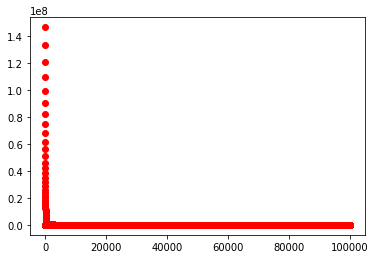

[[   89.22635652]
 [  667.20904906]
 [  319.04025413]
 [ -142.42885884]
 [  491.54530181]
 [-1413.50971747]
 [  185.76296727]
 [-1392.91979644]
 [  438.02612117]
 [ -816.42985688]
 [ -137.96610719]
 [   78.49226305]
 [  -41.19722306]]


In [111]:
miniBatchEpochs = 100000

i = 0
custo0 = 10
custo1 = 1
batchSize = 64
start_idx = 0;
indices = np.arange(trainSetParams.shape[0])
np.random.shuffle(indices)
excerpt = indices[start_idx:start_idx + batchSize]
trainSetParamsMiniBatch = trainSetParams[excerpt]
trainSetTargetMiniBatch = trainSetTarget[excerpt]


while i < miniBatchEpochs :
    custo0 = custo1
    agaDeTheta = np.matmul (trainSetParamsMiniBatch, thetaMiniBatch)
    preSomatorio = agaDeTheta - trainSetTargetMiniBatch
    somatorio = preSomatorio * trainSetParamsMiniBatch
    somaTheta = np.sum(somatorio, axis=0)
    somaTheta = somaTheta.reshape(somaTheta.shape[0], -1)
    somaTheta = somaTheta / (trainSetParamsMiniBatch.shape[0])
    somaTheta = somaTheta * alpha
    thetaMiniBatch = thetaMiniBatch - somaTheta
    i = i + 1
    custo1 = costFunction(trainSetParamsMiniBatch, thetaMiniBatch, trainSetTargetMiniBatch)
    xToPlotMiniBatch = np.append(xToPlotMiniBatch,i)
    yToPlotMiniBatch = np.append(yToPlotMiniBatch,custo1)
    print (i, custo1/custo0, custo1)

    start_idx += 1;
    start_idx %= trainSetParams.shape[0]


results = np.matmul (trainSetParams, thetaMiniBatch)


plt.plot(xToPlotMiniBatch, yToPlotMiniBatch, 'ro')
plt.show()

print(thetaMiniBatch)

# Stochastic implementation

# Print validation results

In [113]:
# costBatch = costFunction(validationSetParams, thetaBatch, validationSetTarget)
# print("Batch validation cost: " + costBatch)

costMiniBatch = costFunction(validationSetParams, thetaMiniBatch, validationSetTarget)
print(costMiniBatch)
# print("MiniBatch validation cost: " + costMiniBatch)

# costStoch = costFunction(validationSetParams, thetaStoch, validationSetTarget)
# print("Stoch validation cost: " + costStoch)

[922579.73001962]


# Use test data *momento_de_tensão.jpg*